# EDA, Data Cleaning

## EDA, Data Cleaning with no outlier removal

In [1]:
import dtale
import pandas as pd
df = pd.read_csv('dataset_00_with_header.csv')
#d = dtale.show(df)
#d.open_browser()

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
df.head()

x001  x002  x003  x004   x005  x006  x007  x008  x009  x010  ...  x296  \
0  1540332   NaN   NaN   NaN    8.0     1     0     1     0     0  ...     0   
1   823066   4.0   3.0   3.0    4.0     0     2     2     0     0  ...  5206   
2  1089795   NaN   NaN   NaN   96.0     1     0     0     0     1  ...     0   
3  1147758  63.0  14.0  38.0  258.0     0     0     0     1     2  ...     0   
4  1229670  34.0  25.0  29.0   34.0     1     0     0     0     3  ...     0   

     x297  x298  x299  x300  x301  x302  x303  x304    y  
0     NaN     0     0     0     0   NaN     0   NaN  706  
1  0.9339     1     1     1     0   NaN     0   NaN  558  
2     NaN     0     0     0     0   NaN     0   NaN  577  
3     NaN     1     1     1     0   NaN     0   NaN  526  
4     NaN     0     0     0     0   NaN     0   NaN  496  

[5 rows x 305 columns]

In [4]:
pd.options.display.max_columns=None
pd.options.display.max_rows=None

### Split into train and test

In [5]:
from sklearn.model_selection import train_test_split
df , df_test = train_test_split(df, train_size=0.75, random_state=42)

In [6]:
df_test.to_csv('test.csv',index=False)

### Check duplicates

In [7]:
df[df.duplicated()]

Empty DataFrame
Columns: [x001, x002, x003, x004, x005, x006, x007, x008, x009, x010, x011, x012, x013, x014, x015, x016, x017, x018, x019, x020, x021, x022, x023, x024, x025, x026, x027, x028, x029, x030, x031, x032, x033, x034, x035, x036, x037, x038, x039, x040, x041, x042, x043, x044, x045, x046, x047, x048, x049, x050, x051, x052, x053, x054, x055, x056, x057, x058, x059, x060, x061, x062, x063, x064, x065, x066, x067, x068, x069, x070, x071, x072, x073, x074, x075, x076, x077, x078, x079, x080, x081, x082, x083, x084, x085, x086, x087, x088, x089, x090, x091, x092, x093, x094, x095, x096, x097, x098, x099, x100, ...]
Index: []

### Clean features with low variance

In [8]:
df.nunique().sort_values()

x096        1
x067        1
x095        1
x094        1
x263        2
x262        2
x147        2
x180        2
x083        2
x299        2
x298        2
x093        2
x092        2
x060        2
x091        2
x090        2
x089        2
x088        2
x087        2
x086        2
x161        2
x085        2
x154        2
x284        2
x084        2
x283        2
x282        2
x300        2
x026        2
x261        2
x260        2
x301        2
x006        2
x249        2
x248        2
x247        2
x246        2
x027        2
x244        2
x269        2
x270        2
x245        2
x082        2
x025        2
x271        2
x252        4
x077        4
x037        5
x078        5
x023        6
x068        6
x302        7
x022        7
x155        7
x050        7
x148        7
x253        8
x162        8
x287        8
x052        8
x051        8
x079        8
x053        9
x049        9
x107       10
x156       10
x038       11
x054       11
x229       11
x163       11
x048       11
x047  

In [9]:
print(df.shape)
# get number of unique values for each column
counts = df.nunique()
# record columns to delete
to_del = [i for i,v in counts.items() if v == 1]
print(to_del)
# drop useless columns
df.drop(to_del, axis=1, inplace=True)
print(df.shape)

(75000, 305)
['x067', 'x094', 'x095', 'x096']
(75000, 301)


(75000, 300) (75000,)
>Threshold=0.00, Features=300
>Threshold=0.05, Features=282
>Threshold=0.10, Features=268
>Threshold=0.15, Features=259
>Threshold=0.20, Features=240
>Threshold=0.25, Features=221
>Threshold=0.30, Features=217
>Threshold=0.35, Features=214
>Threshold=0.40, Features=210
>Threshold=0.45, Features=206
>Threshold=0.50, Features=201


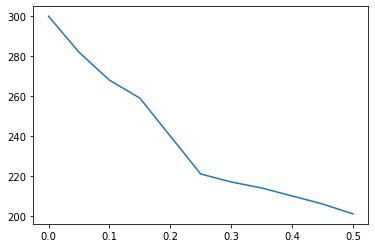

In [10]:
from numpy import arange
from pandas import read_csv
from sklearn.feature_selection import VarianceThreshold


data = df.values
cols = df.columns
X = data[:, :-1]
y = data[:, -1]
print(X.shape, y.shape)
# define thresholds to check
thresholds = arange(0.0, 0.55, 0.05)
# apply transform with each threshold
results = list()
for t in thresholds:
	# define the transform
	transform = VarianceThreshold(threshold=t)
	# transform the input data
	X_sel = transform.fit_transform(X)
	# determine the number of input features
	n_features = X_sel.shape[1]
	print('>Threshold=%.2f, Features=%d' % (t, n_features))
	# store the result
	results.append(n_features)
# plot the threshold vs the number of selected features
plt.plot(thresholds, results)
plt.show()

In [11]:
data = df.values
cols = df.columns
X = data[:, :-1]
y = data[:, -1]
transform = VarianceThreshold(threshold=0.25)
# transform the input data
X_sel = transform.fit_transform(X)
# determine the number of input features
n_features = X_sel.shape[1]
print('>Threshold=%.2f, Features=%d' % (t, n_features))

>Threshold=0.50, Features=221


In [12]:
comb = zip(list(cols),list(transform.get_support()))
df = pd.DataFrame(X_sel, columns=[x for x,y in comb if y])
df = pd.concat([df,pd.DataFrame(y)],axis=1)
df=df.rename(columns={0:'y'})
df.head()

x001   x002   x003   x004   x005  x007  x008  x009  x010  x011  x012  \
0  1280590.0   71.0   20.0   50.0  347.0   0.0   0.0   1.0   0.0   1.0   2.0   
1  1164267.0    NaN    NaN    NaN  115.0   0.0   0.0   0.0   0.0   0.0   0.0   
2  1346906.0  124.0  124.0  124.0  128.0   0.0   0.0   0.0   0.0   4.0   4.0   
3  1555326.0   33.0    5.0   16.0   41.0   1.0   2.0   3.0   3.0   1.0   0.0   
4  1366681.0    NaN    NaN    NaN   35.0   0.0   0.0   1.0   1.0   0.0   0.0   

   x013  x014  x015  x016  x017  x018  x019  x020  x021  x022  x023  x024  \
0   0.0   2.0   6.0   3.0   3.0   3.0   2.0   5.0   2.0   2.0   1.0   1.0   
1   0.0   2.0   2.0   0.0   2.0   1.0   0.0   0.0   0.0   0.0   0.0   2.0   
2   6.0   7.0  21.0   1.0  20.0   4.0   1.0   7.0   1.0   1.0   1.0  12.0   
3   0.0   0.0   9.0   4.0   5.0   4.0   3.0   5.0   2.0   2.0   1.0   4.0   
4   0.0   0.0   2.0   0.0   2.0   2.0   0.0   2.0   0.0   2.0   0.0   0.0   

   x028  x029  x030  x031  x032  x033  x034  x035  x036  x038  x039  x040  \
0   0.0   1.0   1.0   3.0   1.0   1.0   2.0   2.0   3.0   1.0   2.0   2.0   
1   0.0   2.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   7.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   2.0   5.0   2.0   0.0   0.0   2.0   2.0   2.0   0.0   2.0   2.0   
4   0.0   0.0   1.0   3.0   0.0   0.0   0.0   0.0   3.0   0.0   0.0   0.0   

      x042     x043     x044    x045  x046  x047  x054  x055  x056  x059  \
0   5000.0   3884.0   5300.0   500.0   1.0   1.0   0.0   0.0   0.0   0.0   
1      0.0      0.0      NaN     NaN   0.0   0.0   0.0   0.0   0.0   5.0   
2  10000.0  10000.0  10500.0     0.0   0.0   0.0   0.0   0.0   0.0  10.0   
3  50000.0  49330.0  25000.0  3000.0   2.0   0.0   0.0   0.0   0.0   0.0   
4      0.0      0.0    300.0   201.0   0.0   0.0   0.0   0.0   1.0   1.0   

   x062  x063  x064  x065  x066  x071  x072  x073  x074     x075  x076  x081  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   
1   0.0   1.0   3.0   3.0   0.0   0.0   0.0   5.0   0.0   7927.0   0.0   0.0   
2   1.0   1.0   2.0  10.0   0.0   0.0   0.0   8.0   0.0  11498.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   
4   0.0   0.0   1.0   1.0   0.0   0.0   0.0   1.0   0.0    525.0   0.0   0.0   

   x097  x098  x099  x103  x104  x105  x106  x109  x110  x111  x112  x113  \
0   0.0   NaN   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   NaN   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   NaN   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   NaN   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4   0.0   NaN   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   x114  x115  x116  x117  x118  x119  x120  x121  x123  x124  x125  x126  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   x127  x128  x129  x130  x131  x132  x133  x134  x135  x136  x137  x138  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   x139  x140  x141  x142  x143  x144  x145  x146  x148  x149  x150  x151  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   NaN   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   NaN   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0

### Drop features with high number of missing values

In [13]:
df_null = pd.DataFrame((df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False))
df_null

0
x242  93.317333
x098  80.620000
x155  79.076000
x255  76.934667
x256  76.934667
x257  76.934667
x302  73.042667
x253  66.428000
x162  66.386667
x266  66.365333
x267  66.365333
x265  66.365333
x275  56.105333
x289  49.665333
x288  49.665333
x290  49.665333
x148  41.786667
x239  36.721333
x238  36.721333
x237  36.721333
x287  24.762667
x003  21.396000
x002  21.396000
x004  21.389333
x235  20.042667
x044  19.636000
x045  19.636000
x234  19.060000
x272   7.185333
x005   6.113333
x117   0.000000
x116   0.000000
x112   0.000000
x114   0.000000
x115   0.000000
x113   0.000000
y      0.000000
x111   0.000000
x110   0.000000
x109   0.000000
x106   0.000000
x119   0.000000
x105   0.000000
x104   0.000000
x103   0.000000
x099   0.000000
x097   0.000000
x081   0.000000
x076   0.000000
x118   0.000000
x129   0.000000
x120   0.000000
x133   0.000000
x142   0.000000
x141   0.000000
x140   0.000000
x139   0.000000
x138   0.000000
x137   0.000000
x136   0.000000
x135   0.000000
x134   0.000000
x132   0.000000
x121   0.000000
x131   0.000000
x130   0.000000
x074   0.000000
x128   0.000000
x127   0.000000
x126   0.000000
x125   0.000000
x124   0.000000
x123   0.000000
x075   0.000000
x047   0.000000
x073   0.000000
x017   0.000000
x029   0.000000
x028   0.000000
x024   0.000000
x023   0.000000
x022   0.000000
x021   0.000000
x020   0.000000
x019   0.000000
x018   0.000000
x016   0.000000
x031   0.000000
x015   0.000000
x014   0.000000
x013   0.000000
x012   0.000000
x011   0.000000
x010   0.000000
x009   0.000000
x008   0.000000
x007   0.000000
x030   0.000000
x032   0.000000
x072   0.000000
x054   0.000000
x071   0.000000
x066   0.000000
x065   0.000000
x064   0.000000
x063   0.000000
x062   0.000000
x059   0.000000
x056   0.000000
x055   0.000000
x144   0.000000
x033   0.000000
x046   0.000000
x043   0.000000
x042   0.000000
x040   0.000000
x039   0.000000
x038   0.000000
x036   0.000000
x035   0.000000
x034   0.000000
x143   0.000000
x159   0.000000
x145   0.000000
x232   0.000000
x230   0.000000
x229   0.000000
x228   0.000000
x227   0.000000
x226   0.000000
x225   0.000000
x224   0.000000
x221   0.000000
x220   0.000000
x219   0.000000
x218   0.000000
x217   0.000000
x216   0.000000
x215   0.000000
x214   0.000000
x213   0.000000
x212   0.000000
x211   0.000000
x210   0.000000
x209   0.000000
x208   0.000000
x231   0.000000
x233   0.000000
x206   0.000000
x236   0.000000
x296   0.000000
x294   0.000000
x292   0.000000
x291   0.000000
x286   0.000000
x285   0.000000
x281   0.000000
x280   0.000000
x279   0.000000
x278   0.000000
x277   0.000000
x276   0.000000
x274   0.000000
x273   0.000000
x264   0.000000
x258   0.000000
x251   0.000000
x250   0.000000
x243   0.000000
x241   0.000000
x240   0.000000
x207   0.000000
x205   0.000000
x146   0.000000
x179   0.000000
x177   0.000000
x174   0.000000
x173   0.000000
x172   0.000000
x171   0.000000
x170   0.000000
x169   0.000000
x168   0.000000
x167   0.000000
x166   0.000000
x165   0.000000
x164   0.000000
x160   0.000000
x303   0.000000
x158   0.000000
x157   0.000000
x153   0.000000
x152   0.000000
x151   0.000000
x150   0.000000
x149   0.000000
x178   0.000000
x181   0.000000
x204   0.000000
x182   0.000000
x203   0.000000
x202   0.000000
x201   0.000000
x200   0.000000
x199   0.000000
x198   0.000000
x197   0.000000
x196   0.000000
x195   0.000000
x194   0.000000
x193   0.000000
x192   0.000000
x191   0.000000
x190   0.000000
x189   0.000000
x188   0.000000
x187   0.000000
x186   0.000000
x185   0.000000
x184   0.000000
x183   0.000000
x001   0.000000

In [14]:
df.describe()

x001          x002          x003          x004          x005  \
count  7.500000e+04  58953.000000  58953.000000  58958.000000  70415.000000   
mean   1.218538e+06    125.342459     25.342612     65.154873    178.123212   
std    2.723928e+05    115.536587     48.554688     63.314983    124.466592   
min    5.170000e+02      0.000000      0.000000      0.000000      0.000000   
25%    9.751522e+05     32.000000      3.000000     19.000000     87.000000   
50%    1.234986e+06     99.000000      8.000000     47.000000    150.000000   
75%    1.445469e+06    180.000000     24.000000     92.000000    246.000000   
max    1.677188e+06    718.000000    700.000000    700.000000    827.000000   

               x007          x008          x009          x010          x011  \
count  75000.000000  75000.000000  75000.000000  75000.000000  75000.000000   
mean       0.697320      1.390133      1.197360      1.024800      1.837293   
std        1.380916      2.257183      2.048716      1.706102      2.693866   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      1.000000      0.000000      0.000000      1.000000   
75%        1.000000      2.000000      2.000000      1.000000      3.000000   
max       44.000000     56.000000     81.000000     33.000000     44.000000   

               x012          x013          x014          x015          x016  \
count  75000.000000  75000.000000  75000.000000  75000.000000  75000.000000   
mean       1.608760      1.585453      4.287867     12.931667      4.084013   
std        2.582814      2.628894      5.431145     11.933500      4.603623   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      4.000000      1.000000   
50%        1.000000      0.000000      2.000000     10.000000      3.000000   
75%        2.000000      2.000000      7.000000     19.000000      6.000000   
max       44.000000     42.000000     68.000000    189.000000     87.000000   

               x017          x018          x019          x020          x021  \
count  75000.000000  75000.000000  75000.000000  75000.000000  75000.000000   
mean       8.847653      3.987773      2.147827      6.794040      2.281707   
std        9.242401      2.361512      1.748520      7.831186      3.153474   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.000000      2.000000      1.000000      1.000000      0.000000   
50%        6.000000      4.000000      2.000000      4.000000      1.000000   
75%       13.000000      6.000000      3.000000     10.000000      3.000000   
max      162.000000     15.000000     11.000000    159.000000     84.000000   

               x022          x023          x024          x028          x029  \
count  75000.000000  75000.000000  75000.000000  75000.000000  75000.000000   
mean       1.730787      1.086080      4.729467      0.798547      1.482440   
std        1.120729      1.011964      7.135483      1.569899      2.043791   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.000000      0.000000      1.000000      0.000000      0.000000   
50%        2.000000      1.000000      2.000000      0.000000      1.000000   
75%        3.000000      2.000000      6.000000      1.000000      2.000000   
max        6.000000      5.000000    125.000000     47.000000     46.000000   

               x030          x031          x032          x033          x034  \
count  75000.000000  75000.000000  75000.000000  75000.000000  75000.000000   
mean       4.041920      5.370560      0.265093      0.816560      1.712733   
std        4.788204      7.768629      0.879380      1.833698      3.136843   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.000000      1.000000      0.000000      0.00000

In [15]:
del_col = list(df_null[df_null[0] > 75].index)

In [16]:
df=df.drop(columns=del_col,axis=1)
df.shape

(75000, 216)

### Determine imputation strategy and perform imputation

>mean -55.095 (0.755)
>median -54.761 (0.497)
>most_frequent -54.094 (0.497)
>constant -54.303 (0.472)


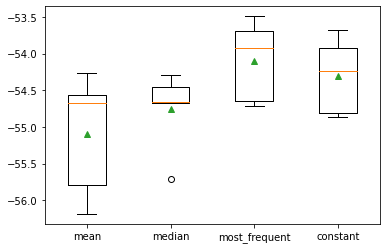

In [17]:
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

data = df.values
ix = [i for i in range(data.shape[1]) if i != data.shape[1]-1]
X, y = data[:, ix], data[:, data.shape[1]-1]
# evaluate each strategy on the dataset
results = list()
strategies = ['mean', 'median', 'most_frequent', 'constant']
for s in strategies:
	# create the modeling pipeline
	pipeline = Pipeline(steps=[('i', SimpleImputer(strategy=s)), ('m', LinearRegression())])
	# evaluate the model
	cv = KFold(n_splits=5)
	scores = cross_val_score(pipeline, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
	# store results
	results.append(scores)
	print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=strategies, showmeans=True)
plt.show()

In [18]:
df_copy = df.copy()
X = df_copy.drop('y',axis=1)
y = df_copy.pop('y')
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(X)
Xtrans = imputer.transform(X)

In [19]:
## save the train dataset proprocessed reviews to a file
import pickle
with open('imputer.pkl', 'wb') as f:
    pickle.dump(imputer, f)

In [20]:
df_concat  = pd.concat([pd.DataFrame(Xtrans),pd.DataFrame(y)],axis=1)
df_concat.columns = df.columns
df = df_concat.copy()
df.head()

x001   x002   x003   x004   x005  x007  x008  x009  x010  x011  x012  \
0  1280590.0   71.0   20.0   50.0  347.0   0.0   0.0   1.0   0.0   1.0   2.0   
1  1164267.0    4.0    2.0    4.0  115.0   0.0   0.0   0.0   0.0   0.0   0.0   
2  1346906.0  124.0  124.0  124.0  128.0   0.0   0.0   0.0   0.0   4.0   4.0   
3  1555326.0   33.0    5.0   16.0   41.0   1.0   2.0   3.0   3.0   1.0   0.0   
4  1366681.0    4.0    2.0    4.0   35.0   0.0   0.0   1.0   1.0   0.0   0.0   

   x013  x014  x015  x016  x017  x018  x019  x020  x021  x022  x023  x024  \
0   0.0   2.0   6.0   3.0   3.0   3.0   2.0   5.0   2.0   2.0   1.0   1.0   
1   0.0   2.0   2.0   0.0   2.0   1.0   0.0   0.0   0.0   0.0   0.0   2.0   
2   6.0   7.0  21.0   1.0  20.0   4.0   1.0   7.0   1.0   1.0   1.0  12.0   
3   0.0   0.0   9.0   4.0   5.0   4.0   3.0   5.0   2.0   2.0   1.0   4.0   
4   0.0   0.0   2.0   0.0   2.0   2.0   0.0   2.0   0.0   2.0   0.0   0.0   

   x028  x029  x030  x031  x032  x033  x034  x035  x036  x038  x039  x040  \
0   0.0   1.0   1.0   3.0   1.0   1.0   2.0   2.0   3.0   1.0   2.0   2.0   
1   0.0   2.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   7.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   2.0   5.0   2.0   0.0   0.0   2.0   2.0   2.0   0.0   2.0   2.0   
4   0.0   0.0   1.0   3.0   0.0   0.0   0.0   0.0   3.0   0.0   0.0   0.0   

      x042     x043     x044    x045  x046  x047  x054  x055  x056  x059  \
0   5000.0   3884.0   5300.0   500.0   1.0   1.0   0.0   0.0   0.0   0.0   
1      0.0      0.0    300.0   300.0   0.0   0.0   0.0   0.0   0.0   5.0   
2  10000.0  10000.0  10500.0     0.0   0.0   0.0   0.0   0.0   0.0  10.0   
3  50000.0  49330.0  25000.0  3000.0   2.0   0.0   0.0   0.0   0.0   0.0   
4      0.0      0.0    300.0   201.0   0.0   0.0   0.0   0.0   1.0   1.0   

   x062  x063  x064  x065  x066  x071  x072  x073  x074     x075  x076  x081  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   
1   0.0   1.0   3.0   3.0   0.0   0.0   0.0   5.0   0.0   7927.0   0.0   0.0   
2   1.0   1.0   2.0  10.0   0.0   0.0   0.0   8.0   0.0  11498.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   
4   0.0   0.0   1.0   1.0   0.0   0.0   0.0   1.0   0.0    525.0   0.0   0.0   

   x097  x099  x103  x104  x105  x106  x109  x110  x111  x112  x113  x114  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   x115  x116  x117  x118  x119  x120  x121  x123  x124  x125  x126  x127  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   x128  x129  x130  x131  x132  x133  x134  x135  x136  x137  x138  x139  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   x140  x141  x142  x143  x144  x145  x146  x148  x149  x150  x151  x152  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0

In [21]:
(df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False)

y       0.0
x113    0.0
x125    0.0
x124    0.0
x123    0.0
x121    0.0
x120    0.0
x119    0.0
x118    0.0
x117    0.0
x116    0.0
x115    0.0
x114    0.0
x112    0.0
x303    0.0
x111    0.0
x110    0.0
x109    0.0
x106    0.0
x105    0.0
x104    0.0
x103    0.0
x099    0.0
x097    0.0
x081    0.0
x076    0.0
x126    0.0
x127    0.0
x128    0.0
x129    0.0
x153    0.0
x152    0.0
x151    0.0
x150    0.0
x149    0.0
x148    0.0
x146    0.0
x145    0.0
x144    0.0
x143    0.0
x142    0.0
x141    0.0
x140    0.0
x139    0.0
x138    0.0
x137    0.0
x136    0.0
x135    0.0
x134    0.0
x133    0.0
x132    0.0
x131    0.0
x130    0.0
x075    0.0
x074    0.0
x073    0.0
x030    0.0
x028    0.0
x024    0.0
x023    0.0
x022    0.0
x021    0.0
x020    0.0
x019    0.0
x018    0.0
x017    0.0
x016    0.0
x015    0.0
x014    0.0
x013    0.0
x012    0.0
x011    0.0
x010    0.0
x009    0.0
x008    0.0
x007    0.0
x005    0.0
x004    0.0
x003    0.0
x002    0.0
x029    0.0
x031    0.0
x072    0.0
x032

### Outlier analysis and handling

In [24]:
df_copy = df.copy()
X = df_copy.drop('y',axis=1)
y = df_copy.pop('y')

In [25]:
# identify outliers with interquartile range
from numpy.random import seed
from numpy.random import randn
from numpy import percentile
%matplotlib inline
import matplotlib.pyplot as plt
# calculate interquartile range
result=[]
for col in list(X.columns):
    print(col)
    data = X[col]
    q25, q75 = percentile(data, 25), percentile(data, 75)
    iqr = q75 - q25
    print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers
    outliers = X[(X[col] < lower) | (X[col] > upper)]
    print('Identified outliers: %d' % len(outliers))
    result.append(len(outliers))
    # remove outliers
    #df_copy = df_copy[(df_copy[col] >= lower) & (df_copy[col] <= upper)]
    #print('Non-outlier observations: %d' % len(df_copy)

x001
Percentiles: 25th=975152.250, 75th=1445469.000, IQR=470316.750
Identified outliers: 283
x002
Percentiles: 25th=5.000, 75th=151.000, IQR=146.000
Identified outliers: 2488
x003
Percentiles: 25th=2.000, 75th=17.000, IQR=15.000
Identified outliers: 9772
x004
Percentiles: 25th=4.000, 75th=77.000, IQR=73.000
Identified outliers: 2965
x005
Percentiles: 25th=94.000, 75th=237.000, IQR=143.000
Identified outliers: 2690
x007
Percentiles: 25th=0.000, 75th=1.000, IQR=1.000
Identified outliers: 5509
x008
Percentiles: 25th=0.000, 75th=2.000, IQR=2.000
Identified outliers: 3611
x009
Percentiles: 25th=0.000, 75th=2.000, IQR=2.000
Identified outliers: 2737
x010
Percentiles: 25th=0.000, 75th=1.000, IQR=1.000
Identified outliers: 9839
x011
Percentiles: 25th=0.000, 75th=3.000, IQR=3.000
Identified outliers: 3062
x012
Percentiles: 25th=0.000, 75th=2.000, IQR=2.000
Identified outliers: 5366
x013
Percentiles: 25th=0.000, 75th=2.000, IQR=2.000
Identified outliers: 5535
x014
Percentiles: 25th=0.000, 75th=7

Percentiles: 25th=1.000, 75th=1.000, IQR=0.000
Identified outliers: 4676
x164
Percentiles: 25th=0.000, 75th=0.000, IQR=0.000
Identified outliers: 3305
x165
Percentiles: 25th=0.000, 75th=0.000, IQR=0.000
Identified outliers: 3880
x166
Percentiles: 25th=0.000, 75th=0.000, IQR=0.000
Identified outliers: 4079
x167
Percentiles: 25th=0.000, 75th=0.000, IQR=0.000
Identified outliers: 4146
x168
Percentiles: 25th=0.000, 75th=1.000, IQR=1.000
Identified outliers: 7792
x169
Percentiles: 25th=0.000, 75th=0.000, IQR=0.000
Identified outliers: 5347
x170
Percentiles: 25th=0.000, 75th=0.000, IQR=0.000
Identified outliers: 8768
x171
Percentiles: 25th=0.000, 75th=0.000, IQR=0.000
Identified outliers: 13396
x172
Percentiles: 25th=0.000, 75th=0.000, IQR=0.000
Identified outliers: 16930
x173
Percentiles: 25th=0.000, 75th=1.000, IQR=1.000
Identified outliers: 6304
x174
Percentiles: 25th=0.000, 75th=0.000, IQR=0.000
Identified outliers: 12922
x177
Percentiles: 25th=0.000, 75th=0.000, IQR=0.000
Identified out

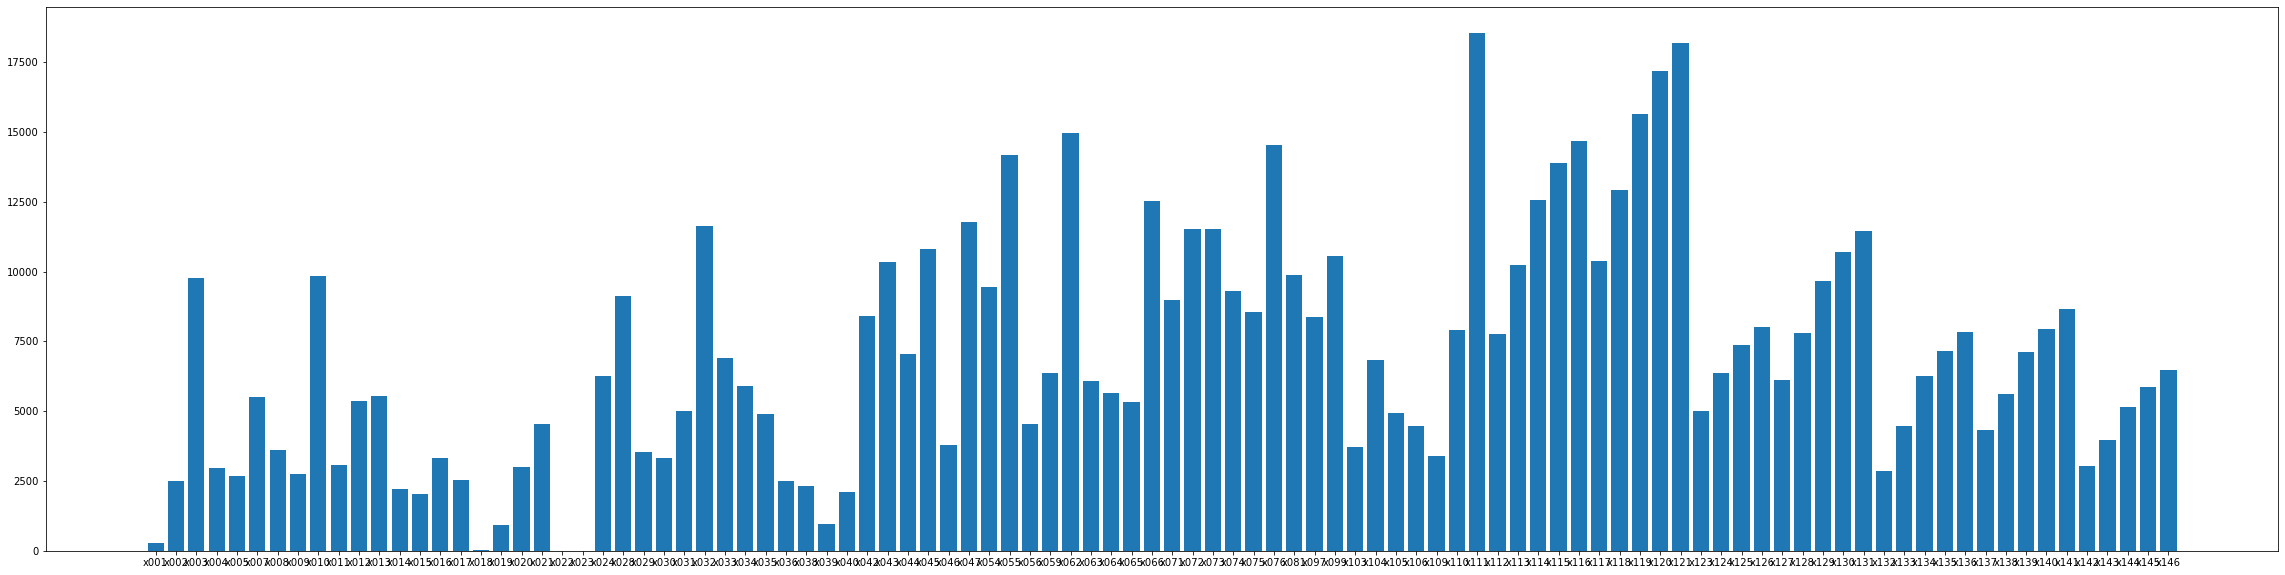

In [27]:
## Before
fig = plt.figure(figsize=(40,10))
plt.bar(X.columns[0:100],result[0:100])
plt.show()

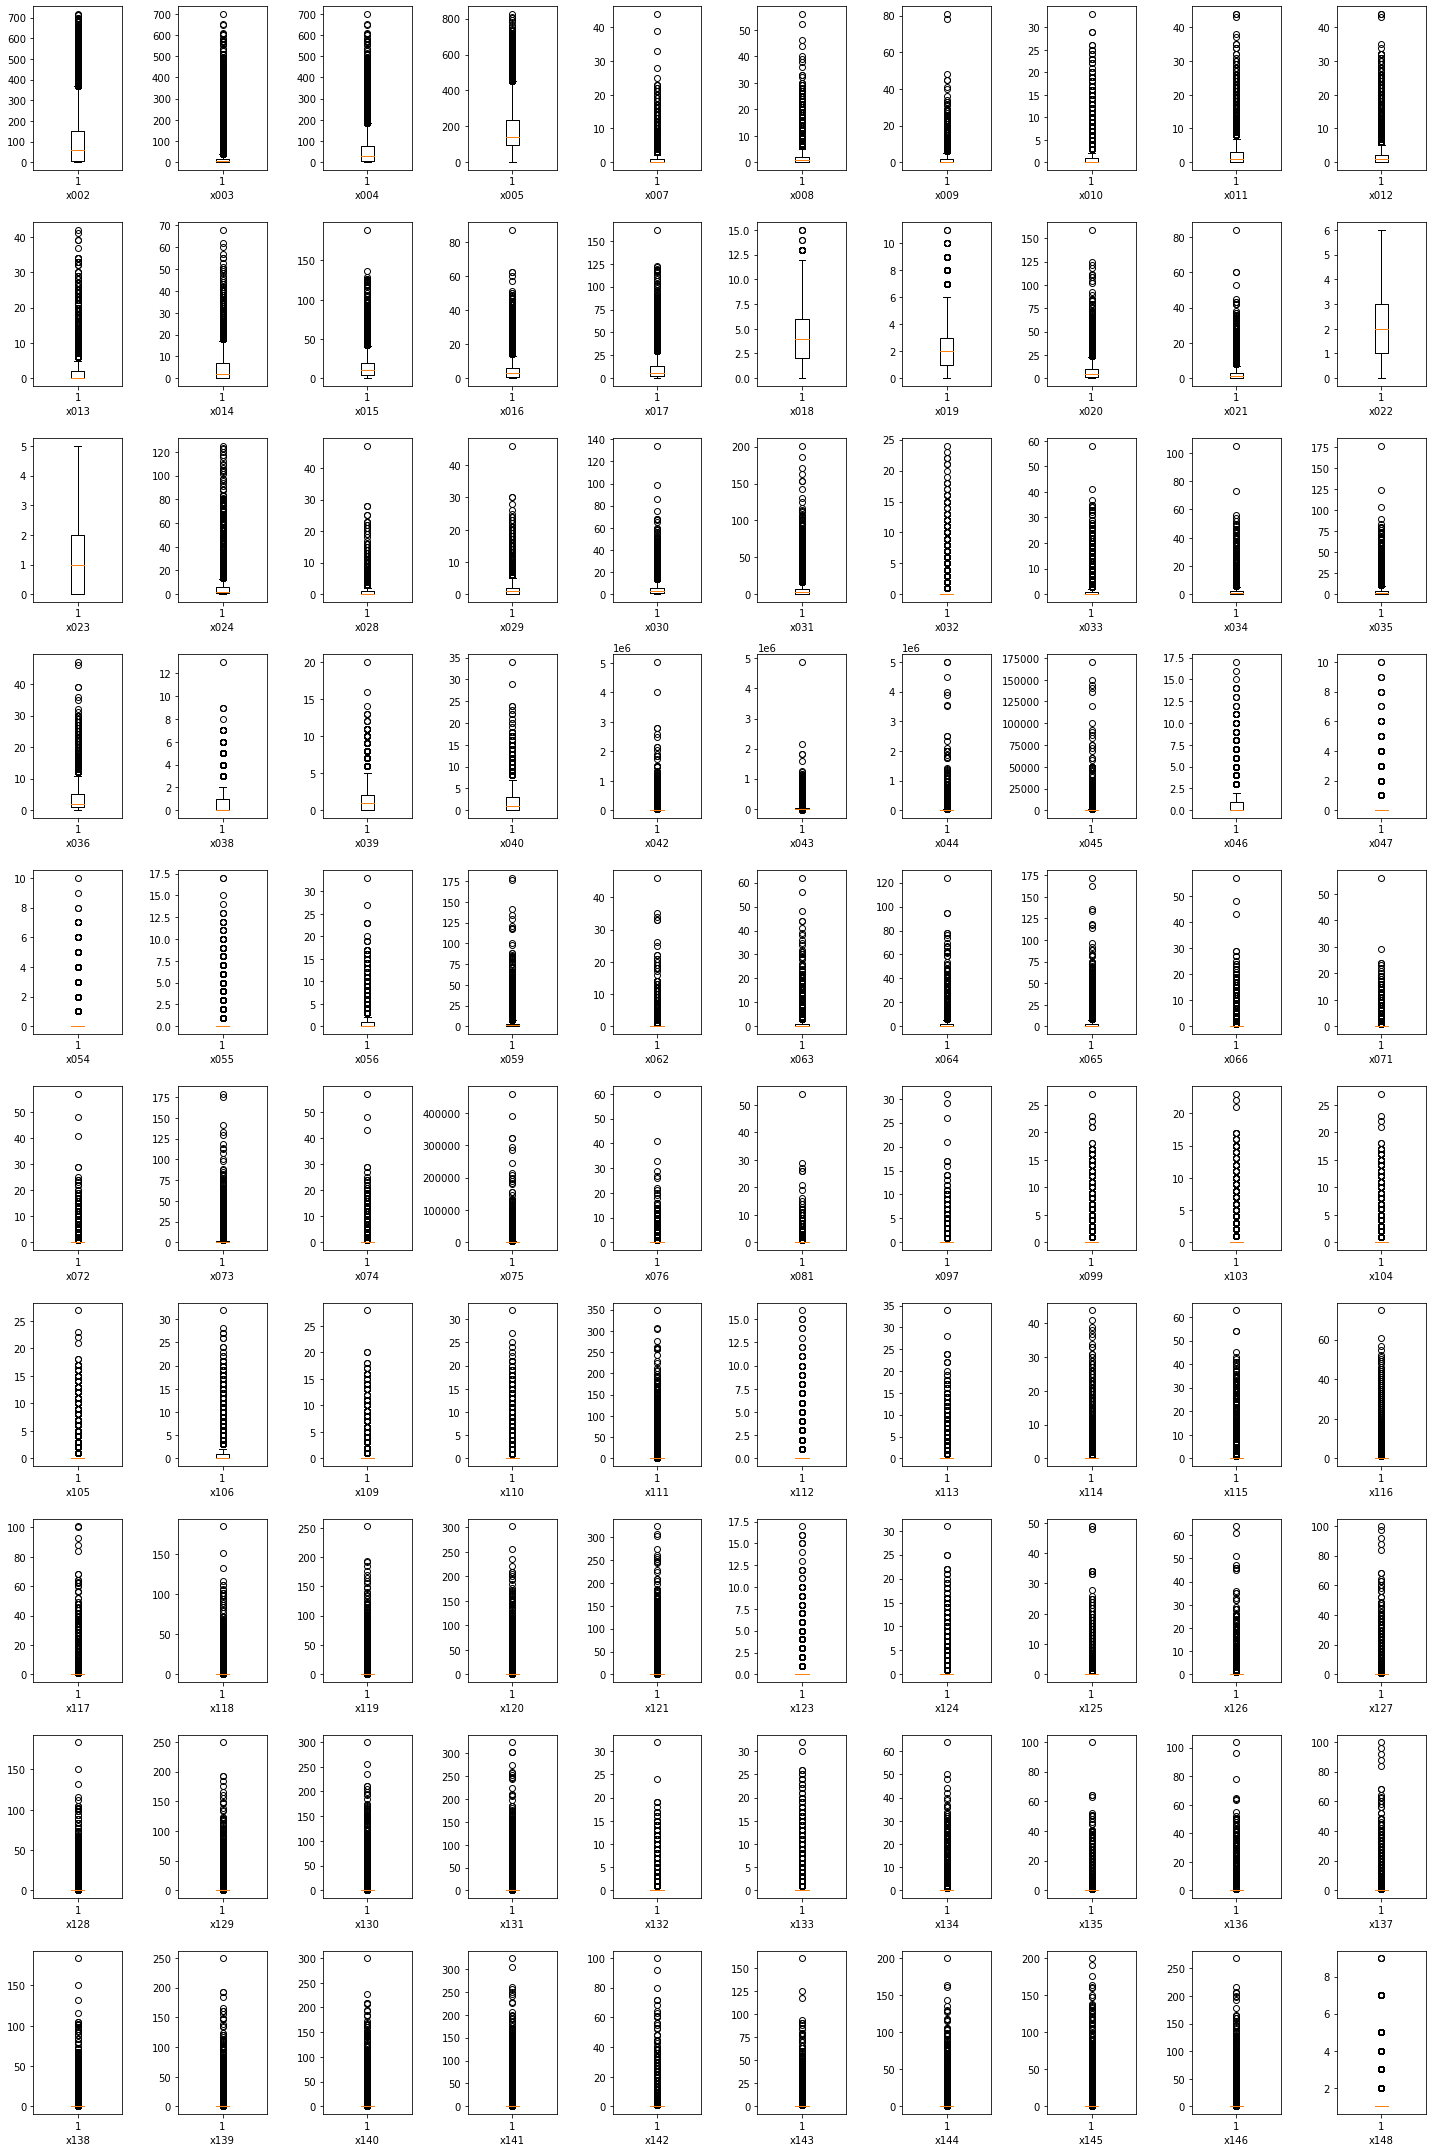

In [41]:
col = df.columns
plt.figure(figsize=(20,30))
for i in range (1, 101):
    ax=plt.subplot(10, 10, i)
    plt.boxplot(df[col[i]])
    ax.set_xlabel(col[i])
plt.tight_layout()

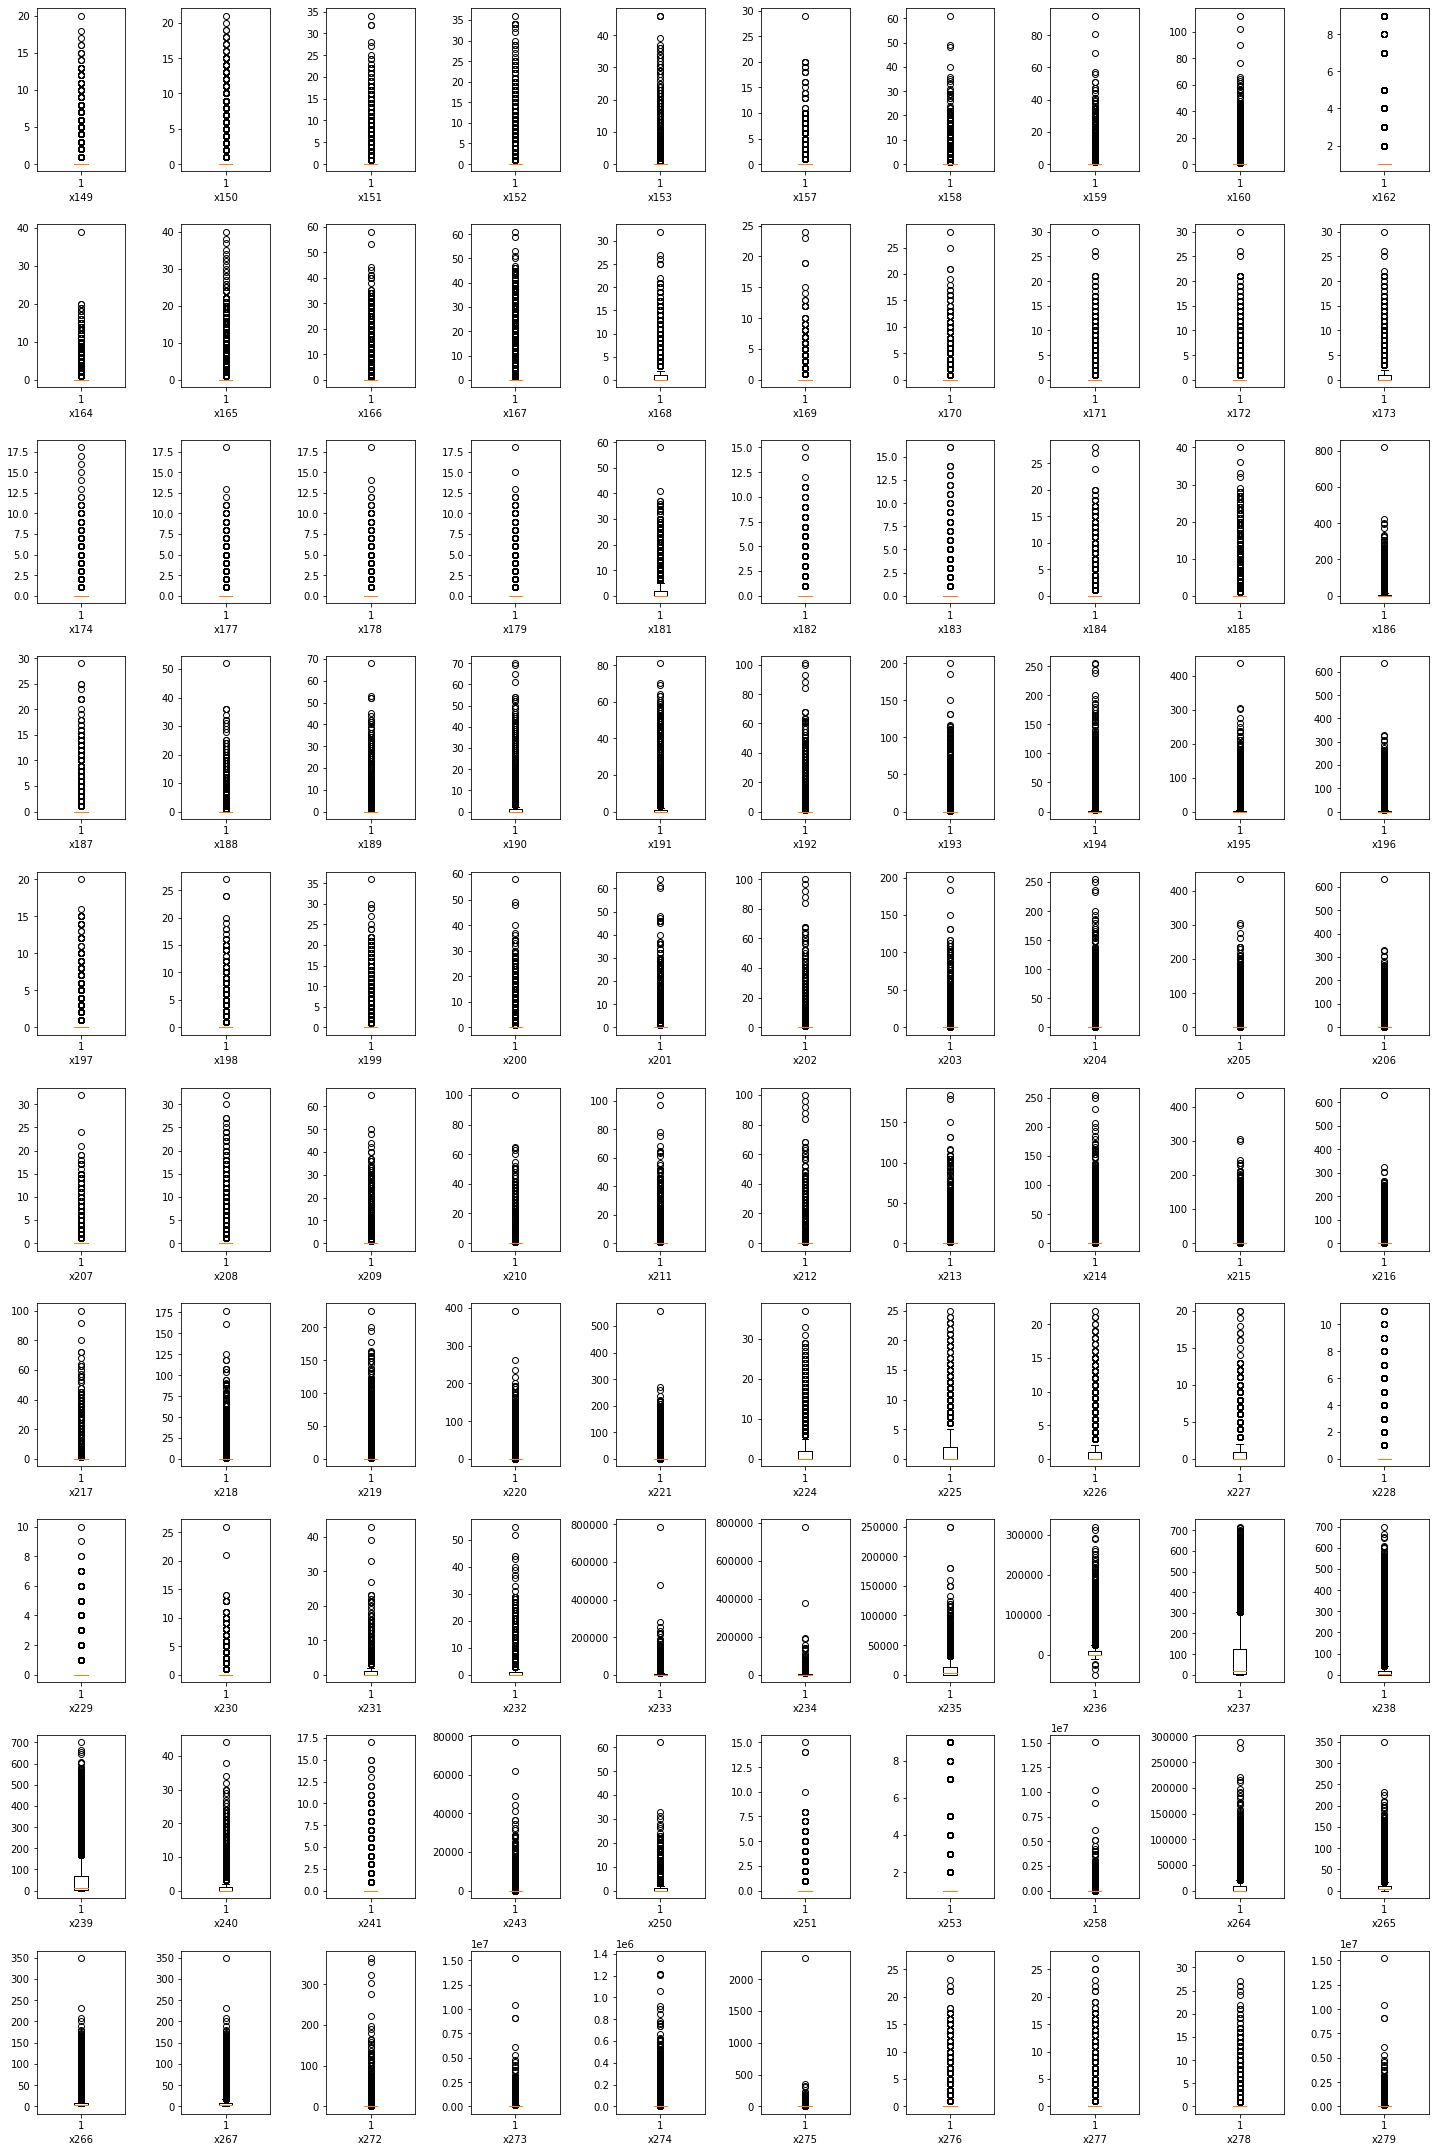

In [42]:
col = df.columns
plt.figure(figsize=(20,30))
for i in range (1, 101):
    ax=plt.subplot(10, 10, i)
    plt.boxplot(df[col[i+100]])
    ax.set_xlabel(col[i+100])
plt.tight_layout()

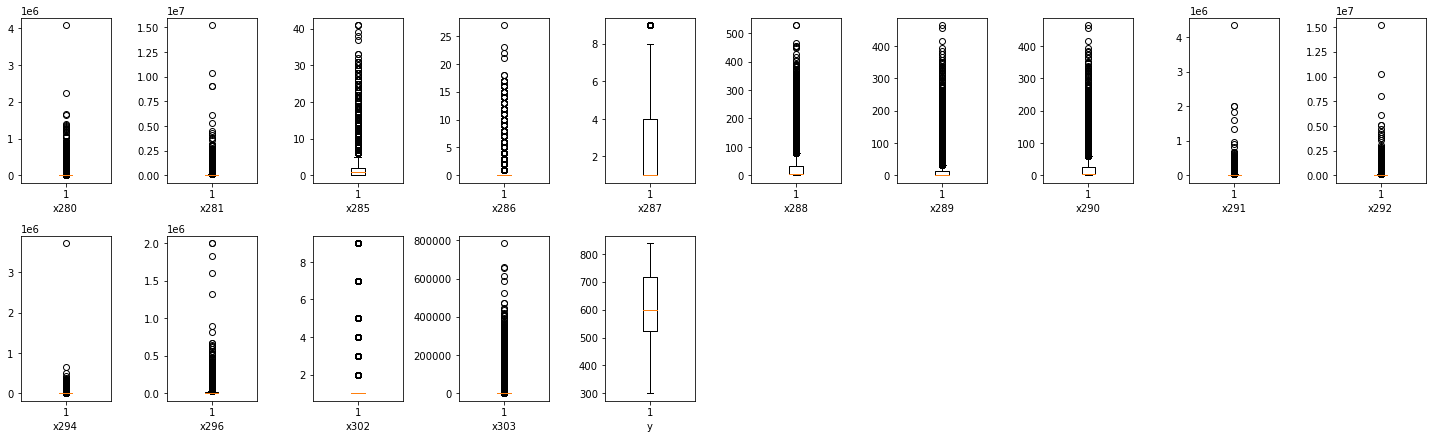

In [43]:
col = df.columns
plt.figure(figsize=(20,30))
for i in range (1, 16):
    ax=plt.subplot(10, 10, i)
    plt.boxplot(df[col[i+200]])
    ax.set_xlabel(col[i+200])
plt.tight_layout()

In [ ]:
col = df.columns
plt.figure(figsize=(20,30))
for i in range (1, 101):
    ax=plt.subplot(10, 10, i)
    plt.boxplot(df[col[i]])
    ax.set_xlabel(col[i])
plt.tight_layout()

col = df.columns
plt.figure(figsize=(20,30))
for i in range (1, 101):
    ax=plt.subplot(10, 10, i)
    plt.boxplot(df[col[i+100]])
    ax.set_xlabel(col[i+100])
plt.tight_layout()

col = df.columns
plt.figure(figsize=(20,30))
for i in range (1, 16):
    ax=plt.subplot(10, 10, i)
    plt.boxplot(df[col[i+200]])
    ax.set_xlabel(col[i+200])
plt.tight_layout()

In [257]:
X.describe()

x001          x002          x003          x004          x005  \
count  7.500000e+04  75000.000000  75000.000000  75000.000000  75000.000000   
mean   1.218538e+06     99.380027     20.348227     52.074253    174.508813   
std    2.723928e+05    113.881109     44.099516     61.483106    121.430969   
min    5.170000e+02      0.000000      0.000000      0.000000      0.000000   
25%    9.751522e+05      5.000000      2.000000      4.000000     94.000000   
50%    1.234986e+06     57.000000      4.000000     30.000000    141.000000   
75%    1.445469e+06    151.000000     17.000000     77.000000    237.000000   
max    1.677188e+06    718.000000    700.000000    700.000000    827.000000   

               x007          x008          x009          x010          x011  \
count  75000.000000  75000.000000  75000.000000  75000.000000  75000.000000   
mean       0.697320      1.390133      1.197360      1.024800      1.837293   
std        1.380916      2.257183      2.048716      1.706102      2.693866   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      1.000000      0.000000      0.000000      1.000000   
75%        1.000000      2.000000      2.000000      1.000000      3.000000   
max       44.000000     56.000000     81.000000     33.000000     44.000000   

               x012          x013          x014          x015          x016  \
count  75000.000000  75000.000000  75000.000000  75000.000000  75000.000000   
mean       1.608760      1.585453      4.287867     12.931667      4.084013   
std        2.582814      2.628894      5.431145     11.933500      4.603623   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      4.000000      1.000000   
50%        1.000000      0.000000      2.000000     10.000000      3.000000   
75%        2.000000      2.000000      7.000000     19.000000      6.000000   
max       44.000000     42.000000     68.000000    189.000000     87.000000   

               x017          x018          x019          x020          x021  \
count  75000.000000  75000.000000  75000.000000  75000.000000  75000.000000   
mean       8.847653      3.987773      2.147827      6.794040      2.281707   
std        9.242401      2.361512      1.748520      7.831186      3.153474   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.000000      2.000000      1.000000      1.000000      0.000000   
50%        6.000000      4.000000      2.000000      4.000000      1.000000   
75%       13.000000      6.000000      3.000000     10.000000      3.000000   
max      162.000000     15.000000     11.000000    159.000000     84.000000   

               x022          x023          x024          x028          x029  \
count  75000.000000  75000.000000  75000.000000  75000.000000  75000.000000   
mean       1.730787      1.086080      4.729467      0.798547      1.482440   
std        1.120729      1.011964      7.135483      1.569899      2.043791   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.000000      0.000000      1.000000      0.000000      0.000000   
50%        2.000000      1.000000      2.000000      0.000000      1.000000   
75%        3.000000      2.000000      6.000000      1.000000      2.000000   
max        6.000000      5.000000    125.000000     47.000000     46.000000   

               x030          x031          x032          x033          x034  \
count  75000.000000  75000.000000  75000.000000  75000.000000  75000.000000   
mean       4.041920      5.370560      0.265093      0.816560      1.712733   
std        4.788204      7.768629      0.879380      1.833698      3.136843   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.000000      1.000000      0.000000      0.00000

### In this option, no outlier has been removed

In [22]:
df.to_csv('train_clean_withOutl.csv',index=False)

In [23]:
## save the train dataset proprocessed reviews to a file
import pickle
with open('train_cols.pkl', 'wb') as f:
    pickle.dump(list(df.columns), f)

## EDA, Data Cleaning with no 10,90 percentile capping of outlier

In [1]:
import dtale
import pandas as pd
df = pd.read_csv('dataset_00_with_header.csv')
#d = dtale.show(df)
#d.open_browser()

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
df.head()

x001  x002  x003  x004   x005  x006  x007  x008  x009  x010  ...  x296  \
0  1540332   NaN   NaN   NaN    8.0     1     0     1     0     0  ...     0   
1   823066   4.0   3.0   3.0    4.0     0     2     2     0     0  ...  5206   
2  1089795   NaN   NaN   NaN   96.0     1     0     0     0     1  ...     0   
3  1147758  63.0  14.0  38.0  258.0     0     0     0     1     2  ...     0   
4  1229670  34.0  25.0  29.0   34.0     1     0     0     0     3  ...     0   

     x297  x298  x299  x300  x301  x302  x303  x304    y  
0     NaN     0     0     0     0   NaN     0   NaN  706  
1  0.9339     1     1     1     0   NaN     0   NaN  558  
2     NaN     0     0     0     0   NaN     0   NaN  577  
3     NaN     1     1     1     0   NaN     0   NaN  526  
4     NaN     0     0     0     0   NaN     0   NaN  496  

[5 rows x 305 columns]

In [4]:
pd.options.display.max_columns=None
pd.options.display.max_rows=None

In [5]:
from sklearn.model_selection import train_test_split
df , df_test = train_test_split(df, train_size=0.75, random_state=42)

In [6]:
df_test.to_csv('test.csv',index=False)

In [7]:
df[df.duplicated()]

Empty DataFrame
Columns: [x001, x002, x003, x004, x005, x006, x007, x008, x009, x010, x011, x012, x013, x014, x015, x016, x017, x018, x019, x020, x021, x022, x023, x024, x025, x026, x027, x028, x029, x030, x031, x032, x033, x034, x035, x036, x037, x038, x039, x040, x041, x042, x043, x044, x045, x046, x047, x048, x049, x050, x051, x052, x053, x054, x055, x056, x057, x058, x059, x060, x061, x062, x063, x064, x065, x066, x067, x068, x069, x070, x071, x072, x073, x074, x075, x076, x077, x078, x079, x080, x081, x082, x083, x084, x085, x086, x087, x088, x089, x090, x091, x092, x093, x094, x095, x096, x097, x098, x099, x100, ...]
Index: []

In [28]:
df.nunique().sort_values()

x096        1
x067        1
x095        1
x094        1
x263        2
x262        2
x147        2
x180        2
x083        2
x299        2
x298        2
x093        2
x092        2
x060        2
x091        2
x090        2
x089        2
x088        2
x087        2
x086        2
x161        2
x085        2
x154        2
x284        2
x084        2
x283        2
x282        2
x300        2
x026        2
x261        2
x260        2
x301        2
x006        2
x249        2
x248        2
x247        2
x246        2
x027        2
x244        2
x269        2
x270        2
x245        2
x082        2
x025        2
x271        2
x252        4
x077        4
x037        5
x078        5
x023        6
x068        6
x302        7
x022        7
x155        7
x050        7
x148        7
x253        8
x162        8
x287        8
x052        8
x051        8
x079        8
x053        9
x049        9
x107       10
x156       10
x038       11
x054       11
x229       11
x163       11
x048       11
x047  

In [29]:
print(df.shape)
# get number of unique values for each column
counts = df.nunique()
# record columns to delete
to_del = [i for i,v in counts.items() if v == 1]
print(to_del)
# drop useless columns
df.drop(to_del, axis=1, inplace=True)
print(df.shape)

(75000, 305)
['x067', 'x094', 'x095', 'x096']
(75000, 301)


(75000, 300) (75000,)
>Threshold=0.00, Features=300
>Threshold=0.05, Features=282
>Threshold=0.10, Features=268
>Threshold=0.15, Features=259
>Threshold=0.20, Features=240
>Threshold=0.25, Features=221
>Threshold=0.30, Features=217
>Threshold=0.35, Features=214
>Threshold=0.40, Features=210
>Threshold=0.45, Features=206
>Threshold=0.50, Features=201


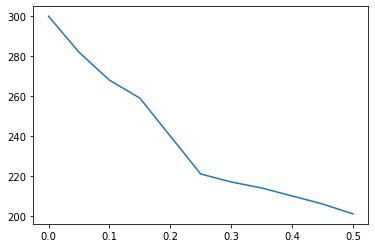

In [30]:
from numpy import arange
from pandas import read_csv
from sklearn.feature_selection import VarianceThreshold


data = df.values
cols = df.columns
X = data[:, :-1]
y = data[:, -1]
print(X.shape, y.shape)
# define thresholds to check
thresholds = arange(0.0, 0.55, 0.05)
# apply transform with each threshold
results = list()
for t in thresholds:
	# define the transform
	transform = VarianceThreshold(threshold=t)
	# transform the input data
	X_sel = transform.fit_transform(X)
	# determine the number of input features
	n_features = X_sel.shape[1]
	print('>Threshold=%.2f, Features=%d' % (t, n_features))
	# store the result
	results.append(n_features)
# plot the threshold vs the number of selected features
plt.plot(thresholds, results)
plt.show()

In [31]:
data = df.values
cols = df.columns
X = data[:, :-1]
y = data[:, -1]
transform = VarianceThreshold(threshold=0.25)
# transform the input data
X_sel = transform.fit_transform(X)
# determine the number of input features
n_features = X_sel.shape[1]
print('>Threshold=%.2f, Features=%d' % (t, n_features))

>Threshold=0.50, Features=221


In [32]:
comb = zip(list(cols),list(transform.get_support()))
df = pd.DataFrame(X_sel, columns=[x for x,y in comb if y])
df = pd.concat([df,pd.DataFrame(y)],axis=1)
df=df.rename(columns={0:'y'})
df.head()

x001   x002   x003   x004   x005  x007  x008  x009  x010  x011  x012  \
0  1280590.0   71.0   20.0   50.0  347.0   0.0   0.0   1.0   0.0   1.0   2.0   
1  1164267.0    NaN    NaN    NaN  115.0   0.0   0.0   0.0   0.0   0.0   0.0   
2  1346906.0  124.0  124.0  124.0  128.0   0.0   0.0   0.0   0.0   4.0   4.0   
3  1555326.0   33.0    5.0   16.0   41.0   1.0   2.0   3.0   3.0   1.0   0.0   
4  1366681.0    NaN    NaN    NaN   35.0   0.0   0.0   1.0   1.0   0.0   0.0   

   x013  x014  x015  x016  x017  x018  x019  x020  x021  x022  x023  x024  \
0   0.0   2.0   6.0   3.0   3.0   3.0   2.0   5.0   2.0   2.0   1.0   1.0   
1   0.0   2.0   2.0   0.0   2.0   1.0   0.0   0.0   0.0   0.0   0.0   2.0   
2   6.0   7.0  21.0   1.0  20.0   4.0   1.0   7.0   1.0   1.0   1.0  12.0   
3   0.0   0.0   9.0   4.0   5.0   4.0   3.0   5.0   2.0   2.0   1.0   4.0   
4   0.0   0.0   2.0   0.0   2.0   2.0   0.0   2.0   0.0   2.0   0.0   0.0   

   x028  x029  x030  x031  x032  x033  x034  x035  x036  x038  x039  x040  \
0   0.0   1.0   1.0   3.0   1.0   1.0   2.0   2.0   3.0   1.0   2.0   2.0   
1   0.0   2.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   7.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   2.0   5.0   2.0   0.0   0.0   2.0   2.0   2.0   0.0   2.0   2.0   
4   0.0   0.0   1.0   3.0   0.0   0.0   0.0   0.0   3.0   0.0   0.0   0.0   

      x042     x043     x044    x045  x046  x047  x054  x055  x056  x059  \
0   5000.0   3884.0   5300.0   500.0   1.0   1.0   0.0   0.0   0.0   0.0   
1      0.0      0.0      NaN     NaN   0.0   0.0   0.0   0.0   0.0   5.0   
2  10000.0  10000.0  10500.0     0.0   0.0   0.0   0.0   0.0   0.0  10.0   
3  50000.0  49330.0  25000.0  3000.0   2.0   0.0   0.0   0.0   0.0   0.0   
4      0.0      0.0    300.0   201.0   0.0   0.0   0.0   0.0   1.0   1.0   

   x062  x063  x064  x065  x066  x071  x072  x073  x074     x075  x076  x081  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   
1   0.0   1.0   3.0   3.0   0.0   0.0   0.0   5.0   0.0   7927.0   0.0   0.0   
2   1.0   1.0   2.0  10.0   0.0   0.0   0.0   8.0   0.0  11498.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   
4   0.0   0.0   1.0   1.0   0.0   0.0   0.0   1.0   0.0    525.0   0.0   0.0   

   x097  x098  x099  x103  x104  x105  x106  x109  x110  x111  x112  x113  \
0   0.0   NaN   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   NaN   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   NaN   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   NaN   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4   0.0   NaN   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   x114  x115  x116  x117  x118  x119  x120  x121  x123  x124  x125  x126  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   x127  x128  x129  x130  x131  x132  x133  x134  x135  x136  x137  x138  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   x139  x140  x141  x142  x143  x144  x145  x146  x148  x149  x150  x151  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   NaN   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   NaN   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0

In [33]:
df_null = pd.DataFrame((df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False))
df_null

0
x242  93.317333
x098  80.620000
x155  79.076000
x255  76.934667
x256  76.934667
x257  76.934667
x302  73.042667
x253  66.428000
x162  66.386667
x266  66.365333
x267  66.365333
x265  66.365333
x275  56.105333
x289  49.665333
x288  49.665333
x290  49.665333
x148  41.786667
x239  36.721333
x238  36.721333
x237  36.721333
x287  24.762667
x003  21.396000
x002  21.396000
x004  21.389333
x235  20.042667
x044  19.636000
x045  19.636000
x234  19.060000
x272   7.185333
x005   6.113333
x117   0.000000
x116   0.000000
x112   0.000000
x114   0.000000
x115   0.000000
x113   0.000000
y      0.000000
x111   0.000000
x110   0.000000
x109   0.000000
x106   0.000000
x119   0.000000
x105   0.000000
x104   0.000000
x103   0.000000
x099   0.000000
x097   0.000000
x081   0.000000
x076   0.000000
x118   0.000000
x129   0.000000
x120   0.000000
x133   0.000000
x142   0.000000
x141   0.000000
x140   0.000000
x139   0.000000
x138   0.000000
x137   0.000000
x136   0.000000
x135   0.000000
x134   0.000000
x132   0.000000
x121   0.000000
x131   0.000000
x130   0.000000
x074   0.000000
x128   0.000000
x127   0.000000
x126   0.000000
x125   0.000000
x124   0.000000
x123   0.000000
x075   0.000000
x047   0.000000
x073   0.000000
x017   0.000000
x029   0.000000
x028   0.000000
x024   0.000000
x023   0.000000
x022   0.000000
x021   0.000000
x020   0.000000
x019   0.000000
x018   0.000000
x016   0.000000
x031   0.000000
x015   0.000000
x014   0.000000
x013   0.000000
x012   0.000000
x011   0.000000
x010   0.000000
x009   0.000000
x008   0.000000
x007   0.000000
x030   0.000000
x032   0.000000
x072   0.000000
x054   0.000000
x071   0.000000
x066   0.000000
x065   0.000000
x064   0.000000
x063   0.000000
x062   0.000000
x059   0.000000
x056   0.000000
x055   0.000000
x144   0.000000
x033   0.000000
x046   0.000000
x043   0.000000
x042   0.000000
x040   0.000000
x039   0.000000
x038   0.000000
x036   0.000000
x035   0.000000
x034   0.000000
x143   0.000000
x159   0.000000
x145   0.000000
x232   0.000000
x230   0.000000
x229   0.000000
x228   0.000000
x227   0.000000
x226   0.000000
x225   0.000000
x224   0.000000
x221   0.000000
x220   0.000000
x219   0.000000
x218   0.000000
x217   0.000000
x216   0.000000
x215   0.000000
x214   0.000000
x213   0.000000
x212   0.000000
x211   0.000000
x210   0.000000
x209   0.000000
x208   0.000000
x231   0.000000
x233   0.000000
x206   0.000000
x236   0.000000
x296   0.000000
x294   0.000000
x292   0.000000
x291   0.000000
x286   0.000000
x285   0.000000
x281   0.000000
x280   0.000000
x279   0.000000
x278   0.000000
x277   0.000000
x276   0.000000
x274   0.000000
x273   0.000000
x264   0.000000
x258   0.000000
x251   0.000000
x250   0.000000
x243   0.000000
x241   0.000000
x240   0.000000
x207   0.000000
x205   0.000000
x146   0.000000
x179   0.000000
x177   0.000000
x174   0.000000
x173   0.000000
x172   0.000000
x171   0.000000
x170   0.000000
x169   0.000000
x168   0.000000
x167   0.000000
x166   0.000000
x165   0.000000
x164   0.000000
x160   0.000000
x303   0.000000
x158   0.000000
x157   0.000000
x153   0.000000
x152   0.000000
x151   0.000000
x150   0.000000
x149   0.000000
x178   0.000000
x181   0.000000
x204   0.000000
x182   0.000000
x203   0.000000
x202   0.000000
x201   0.000000
x200   0.000000
x199   0.000000
x198   0.000000
x197   0.000000
x196   0.000000
x195   0.000000
x194   0.000000
x193   0.000000
x192   0.000000
x191   0.000000
x190   0.000000
x189   0.000000
x188   0.000000
x187   0.000000
x186   0.000000
x185   0.000000
x184   0.000000
x183   0.000000
x001   0.000000

In [34]:
df.describe()

x001          x002          x003          x004          x005  \
count  7.500000e+04  58953.000000  58953.000000  58958.000000  70415.000000   
mean   1.218538e+06    125.342459     25.342612     65.154873    178.123212   
std    2.723928e+05    115.536587     48.554688     63.314983    124.466592   
min    5.170000e+02      0.000000      0.000000      0.000000      0.000000   
25%    9.751522e+05     32.000000      3.000000     19.000000     87.000000   
50%    1.234986e+06     99.000000      8.000000     47.000000    150.000000   
75%    1.445469e+06    180.000000     24.000000     92.000000    246.000000   
max    1.677188e+06    718.000000    700.000000    700.000000    827.000000   

               x007          x008          x009          x010          x011  \
count  75000.000000  75000.000000  75000.000000  75000.000000  75000.000000   
mean       0.697320      1.390133      1.197360      1.024800      1.837293   
std        1.380916      2.257183      2.048716      1.706102      2.693866   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      1.000000      0.000000      0.000000      1.000000   
75%        1.000000      2.000000      2.000000      1.000000      3.000000   
max       44.000000     56.000000     81.000000     33.000000     44.000000   

               x012          x013          x014          x015          x016  \
count  75000.000000  75000.000000  75000.000000  75000.000000  75000.000000   
mean       1.608760      1.585453      4.287867     12.931667      4.084013   
std        2.582814      2.628894      5.431145     11.933500      4.603623   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      4.000000      1.000000   
50%        1.000000      0.000000      2.000000     10.000000      3.000000   
75%        2.000000      2.000000      7.000000     19.000000      6.000000   
max       44.000000     42.000000     68.000000    189.000000     87.000000   

               x017          x018          x019          x020          x021  \
count  75000.000000  75000.000000  75000.000000  75000.000000  75000.000000   
mean       8.847653      3.987773      2.147827      6.794040      2.281707   
std        9.242401      2.361512      1.748520      7.831186      3.153474   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.000000      2.000000      1.000000      1.000000      0.000000   
50%        6.000000      4.000000      2.000000      4.000000      1.000000   
75%       13.000000      6.000000      3.000000     10.000000      3.000000   
max      162.000000     15.000000     11.000000    159.000000     84.000000   

               x022          x023          x024          x028          x029  \
count  75000.000000  75000.000000  75000.000000  75000.000000  75000.000000   
mean       1.730787      1.086080      4.729467      0.798547      1.482440   
std        1.120729      1.011964      7.135483      1.569899      2.043791   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.000000      0.000000      1.000000      0.000000      0.000000   
50%        2.000000      1.000000      2.000000      0.000000      1.000000   
75%        3.000000      2.000000      6.000000      1.000000      2.000000   
max        6.000000      5.000000    125.000000     47.000000     46.000000   

               x030          x031          x032          x033          x034  \
count  75000.000000  75000.000000  75000.000000  75000.000000  75000.000000   
mean       4.041920      5.370560      0.265093      0.816560      1.712733   
std        4.788204      7.768629      0.879380      1.833698      3.136843   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.000000      1.000000      0.000000      0.00000

In [35]:
del_col = list(df_null[df_null[0] > 75].index)

In [36]:
df=df.drop(columns=del_col,axis=1)
df.shape

(75000, 210)

>mean -55.095 (0.564)
>median -55.010 (0.451)
>most_frequent -54.493 (0.591)
>constant -54.549 (0.481)


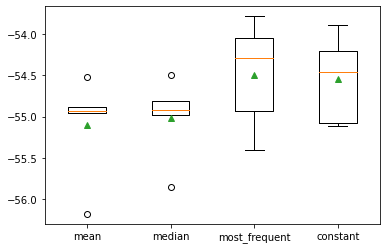

In [37]:
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

data = df.values
ix = [i for i in range(data.shape[1]) if i != data.shape[1]-1]
X, y = data[:, ix], data[:, data.shape[1]-1]
# evaluate each strategy on the dataset
results = list()
strategies = ['mean', 'median', 'most_frequent', 'constant']
for s in strategies:
	# create the modeling pipeline
	pipeline = Pipeline(steps=[('i', SimpleImputer(strategy=s)), ('m', LinearRegression())])
	# evaluate the model
	cv = KFold(n_splits=5)
	scores = cross_val_score(pipeline, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
	# store results
	results.append(scores)
	print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=strategies, showmeans=True)
plt.show()

In [18]:
df_copy = df.copy()
X = df_copy.drop('y',axis=1)
y = df_copy.pop('y')
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(X)
Xtrans = imputer.transform(X)

In [19]:
## save the train dataset proprocessed reviews to a file
import pickle
with open('imputer_60.pkl', 'wb') as f:
    pickle.dump(imputer, f)

In [252]:
df_concat  = pd.concat([pd.DataFrame(Xtrans),pd.DataFrame(y)],axis=1)
df_concat.columns = df.columns
df = df_concat.copy()
df.head()

x001   x002   x003   x004   x005  x007  x008  x009  x010  x011  x012  \
0  1280590.0   71.0   20.0   50.0  347.0   0.0   0.0   1.0   0.0   1.0   2.0   
1  1164267.0    4.0    2.0    4.0  115.0   0.0   0.0   0.0   0.0   0.0   0.0   
2  1346906.0  124.0  124.0  124.0  128.0   0.0   0.0   0.0   0.0   4.0   4.0   
3  1555326.0   33.0    5.0   16.0   41.0   1.0   2.0   3.0   3.0   1.0   0.0   
4  1366681.0    4.0    2.0    4.0   35.0   0.0   0.0   1.0   1.0   0.0   0.0   

   x013  x014  x015  x016  x017  x018  x019  x020  x021  x022  x023  x024  \
0   0.0   2.0   6.0   3.0   3.0   3.0   2.0   5.0   2.0   2.0   1.0   1.0   
1   0.0   2.0   2.0   0.0   2.0   1.0   0.0   0.0   0.0   0.0   0.0   2.0   
2   6.0   7.0  21.0   1.0  20.0   4.0   1.0   7.0   1.0   1.0   1.0  12.0   
3   0.0   0.0   9.0   4.0   5.0   4.0   3.0   5.0   2.0   2.0   1.0   4.0   
4   0.0   0.0   2.0   0.0   2.0   2.0   0.0   2.0   0.0   2.0   0.0   0.0   

   x028  x029  x030  x031  x032  x033  x034  x035  x036  x038  x039  x040  \
0   0.0   1.0   1.0   3.0   1.0   1.0   2.0   2.0   3.0   1.0   2.0   2.0   
1   0.0   2.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   7.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   2.0   5.0   2.0   0.0   0.0   2.0   2.0   2.0   0.0   2.0   2.0   
4   0.0   0.0   1.0   3.0   0.0   0.0   0.0   0.0   3.0   0.0   0.0   0.0   

      x042     x043     x044    x045  x046  x047  x054  x055  x056  x059  \
0   5000.0   3884.0   5300.0   500.0   1.0   1.0   0.0   0.0   0.0   0.0   
1      0.0      0.0    300.0   300.0   0.0   0.0   0.0   0.0   0.0   5.0   
2  10000.0  10000.0  10500.0     0.0   0.0   0.0   0.0   0.0   0.0  10.0   
3  50000.0  49330.0  25000.0  3000.0   2.0   0.0   0.0   0.0   0.0   0.0   
4      0.0      0.0    300.0   201.0   0.0   0.0   0.0   0.0   1.0   1.0   

   x062  x063  x064  x065  x066  x071  x072  x073  x074     x075  x076  x081  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   
1   0.0   1.0   3.0   3.0   0.0   0.0   0.0   5.0   0.0   7927.0   0.0   0.0   
2   1.0   1.0   2.0  10.0   0.0   0.0   0.0   8.0   0.0  11498.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   
4   0.0   0.0   1.0   1.0   0.0   0.0   0.0   1.0   0.0    525.0   0.0   0.0   

   x097  x099  x103  x104  x105  x106  x109  x110  x111  x112  x113  x114  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   x115  x116  x117  x118  x119  x120  x121  x123  x124  x125  x126  x127  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   x128  x129  x130  x131  x132  x133  x134  x135  x136  x137  x138  x139  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   x140  x141  x142  x143  x144  x145  x146  x148  x149  x150  x151  x152  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0

In [253]:
(df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False)

y       0.0
x113    0.0
x125    0.0
x124    0.0
x123    0.0
x121    0.0
x120    0.0
x119    0.0
x118    0.0
x117    0.0
x116    0.0
x115    0.0
x114    0.0
x112    0.0
x303    0.0
x111    0.0
x110    0.0
x109    0.0
x106    0.0
x105    0.0
x104    0.0
x103    0.0
x099    0.0
x097    0.0
x081    0.0
x076    0.0
x126    0.0
x127    0.0
x128    0.0
x129    0.0
x153    0.0
x152    0.0
x151    0.0
x150    0.0
x149    0.0
x148    0.0
x146    0.0
x145    0.0
x144    0.0
x143    0.0
x142    0.0
x141    0.0
x140    0.0
x139    0.0
x138    0.0
x137    0.0
x136    0.0
x135    0.0
x134    0.0
x133    0.0
x132    0.0
x131    0.0
x130    0.0
x075    0.0
x074    0.0
x073    0.0
x030    0.0
x028    0.0
x024    0.0
x023    0.0
x022    0.0
x021    0.0
x020    0.0
x019    0.0
x018    0.0
x017    0.0
x016    0.0
x015    0.0
x014    0.0
x013    0.0
x012    0.0
x011    0.0
x010    0.0
x009    0.0
x008    0.0
x007    0.0
x005    0.0
x004    0.0
x003    0.0
x002    0.0
x029    0.0
x031    0.0
x072    0.0
x032

In [254]:
df_copy = df.copy()
X = df_copy.drop('y',axis=1)
y = df_copy.pop('y')

In [255]:
# identify outliers with interquartile range
from numpy.random import seed
from numpy.random import randn
from numpy import percentile
%matplotlib inline
import matplotlib.pyplot as plt
# calculate interquartile range
result=[]
for col in list(X.columns):
    print(col)
    data = X[col]
    q25, q75 = percentile(data, 25), percentile(data, 75)
    iqr = q75 - q25
    print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers
    outliers = X[(X[col] < lower) | (X[col] > upper)]
    print('Identified outliers: %d' % len(outliers))
    result.append(len(outliers))
    # remove outliers
    #df_copy = df_copy[(df_copy[col] >= lower) & (df_copy[col] <= upper)]
    #print('Non-outlier observations: %d' % len(df_copy)

x001
Percentiles: 25th=975152.250, 75th=1445469.000, IQR=470316.750
Identified outliers: 283
x002
Percentiles: 25th=5.000, 75th=151.000, IQR=146.000
Identified outliers: 2488
x003
Percentiles: 25th=2.000, 75th=17.000, IQR=15.000
Identified outliers: 9772
x004
Percentiles: 25th=4.000, 75th=77.000, IQR=73.000
Identified outliers: 2965
x005
Percentiles: 25th=94.000, 75th=237.000, IQR=143.000
Identified outliers: 2690
x007
Percentiles: 25th=0.000, 75th=1.000, IQR=1.000
Identified outliers: 5509
x008
Percentiles: 25th=0.000, 75th=2.000, IQR=2.000
Identified outliers: 3611
x009
Percentiles: 25th=0.000, 75th=2.000, IQR=2.000
Identified outliers: 2737
x010
Percentiles: 25th=0.000, 75th=1.000, IQR=1.000
Identified outliers: 9839
x011
Percentiles: 25th=0.000, 75th=3.000, IQR=3.000
Identified outliers: 3062
x012
Percentiles: 25th=0.000, 75th=2.000, IQR=2.000
Identified outliers: 5366
x013
Percentiles: 25th=0.000, 75th=2.000, IQR=2.000
Identified outliers: 5535
x014
Percentiles: 25th=0.000, 75th=7

Percentiles: 25th=0.000, 75th=0.000, IQR=0.000
Identified outliers: 3305
x165
Percentiles: 25th=0.000, 75th=0.000, IQR=0.000
Identified outliers: 3880
x166
Percentiles: 25th=0.000, 75th=0.000, IQR=0.000
Identified outliers: 4079
x167
Percentiles: 25th=0.000, 75th=0.000, IQR=0.000
Identified outliers: 4146
x168
Percentiles: 25th=0.000, 75th=1.000, IQR=1.000
Identified outliers: 7792
x169
Percentiles: 25th=0.000, 75th=0.000, IQR=0.000
Identified outliers: 5347
x170
Percentiles: 25th=0.000, 75th=0.000, IQR=0.000
Identified outliers: 8768
x171
Percentiles: 25th=0.000, 75th=0.000, IQR=0.000
Identified outliers: 13396
x172
Percentiles: 25th=0.000, 75th=0.000, IQR=0.000
Identified outliers: 16930
x173
Percentiles: 25th=0.000, 75th=1.000, IQR=1.000
Identified outliers: 6304
x174
Percentiles: 25th=0.000, 75th=0.000, IQR=0.000
Identified outliers: 12922
x177
Percentiles: 25th=0.000, 75th=0.000, IQR=0.000
Identified outliers: 6649
x178
Percentiles: 25th=0.000, 75th=0.000, IQR=0.000
Identified out

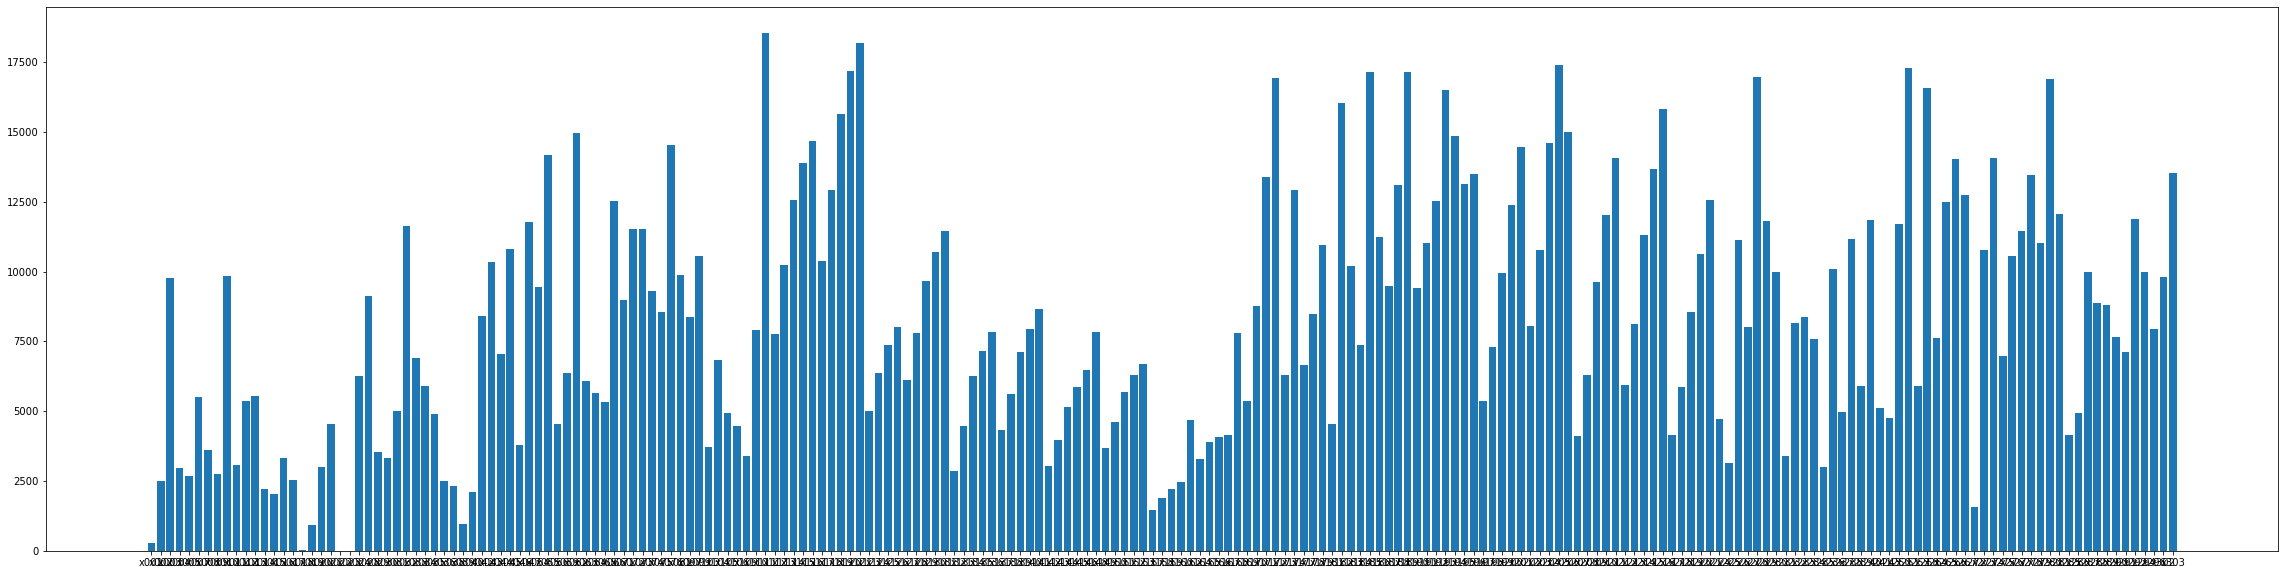

In [256]:
## Before
fig = plt.figure(figsize=(40,10))
plt.bar(X.columns,result)
plt.show()

In [257]:
X.describe()

x001          x002          x003          x004          x005  \
count  7.500000e+04  75000.000000  75000.000000  75000.000000  75000.000000   
mean   1.218538e+06     99.380027     20.348227     52.074253    174.508813   
std    2.723928e+05    113.881109     44.099516     61.483106    121.430969   
min    5.170000e+02      0.000000      0.000000      0.000000      0.000000   
25%    9.751522e+05      5.000000      2.000000      4.000000     94.000000   
50%    1.234986e+06     57.000000      4.000000     30.000000    141.000000   
75%    1.445469e+06    151.000000     17.000000     77.000000    237.000000   
max    1.677188e+06    718.000000    700.000000    700.000000    827.000000   

               x007          x008          x009          x010          x011  \
count  75000.000000  75000.000000  75000.000000  75000.000000  75000.000000   
mean       0.697320      1.390133      1.197360      1.024800      1.837293   
std        1.380916      2.257183      2.048716      1.706102      2.693866   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      1.000000      0.000000      0.000000      1.000000   
75%        1.000000      2.000000      2.000000      1.000000      3.000000   
max       44.000000     56.000000     81.000000     33.000000     44.000000   

               x012          x013          x014          x015          x016  \
count  75000.000000  75000.000000  75000.000000  75000.000000  75000.000000   
mean       1.608760      1.585453      4.287867     12.931667      4.084013   
std        2.582814      2.628894      5.431145     11.933500      4.603623   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      4.000000      1.000000   
50%        1.000000      0.000000      2.000000     10.000000      3.000000   
75%        2.000000      2.000000      7.000000     19.000000      6.000000   
max       44.000000     42.000000     68.000000    189.000000     87.000000   

               x017          x018          x019          x020          x021  \
count  75000.000000  75000.000000  75000.000000  75000.000000  75000.000000   
mean       8.847653      3.987773      2.147827      6.794040      2.281707   
std        9.242401      2.361512      1.748520      7.831186      3.153474   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.000000      2.000000      1.000000      1.000000      0.000000   
50%        6.000000      4.000000      2.000000      4.000000      1.000000   
75%       13.000000      6.000000      3.000000     10.000000      3.000000   
max      162.000000     15.000000     11.000000    159.000000     84.000000   

               x022          x023          x024          x028          x029  \
count  75000.000000  75000.000000  75000.000000  75000.000000  75000.000000   
mean       1.730787      1.086080      4.729467      0.798547      1.482440   
std        1.120729      1.011964      7.135483      1.569899      2.043791   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.000000      0.000000      1.000000      0.000000      0.000000   
50%        2.000000      1.000000      2.000000      0.000000      1.000000   
75%        3.000000      2.000000      6.000000      1.000000      2.000000   
max        6.000000      5.000000    125.000000     47.000000     46.000000   

               x030          x031          x032          x033          x034  \
count  75000.000000  75000.000000  75000.000000  75000.000000  75000.000000   
mean       4.041920      5.370560      0.265093      0.816560      1.712733   
std        4.788204      7.768629      0.879380      1.833698      3.136843   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.000000      1.000000      0.000000      0.00000

In [258]:
for col in list(X.columns):
    p = np.percentile(X[col],[10,90])
    X[col] = X[col].apply(lambda x: p[0] if x < p[0] else p[1] if x > p[1] else x )

In [259]:
X.describe()

x001          x002          x003          x004          x005  \
count  7.500000e+04  75000.000000  75000.000000  75000.000000  75000.000000   
mean   1.220599e+06     89.785213     13.114467     45.824387    167.352787   
std    2.460949e+05     89.994090     16.860295     43.846148     97.945611   
min    8.521308e+05      4.000000      1.000000      4.000000     39.000000   
25%    9.751522e+05      5.000000      2.000000      4.000000     94.000000   
50%    1.234986e+06     57.000000      4.000000     30.000000    141.000000   
75%    1.445469e+06    151.000000     17.000000     77.000000    237.000000   
max    1.563413e+06    264.000000     53.000000    130.000000    348.000000   

               x007          x008          x009          x010          x011  \
count  75000.000000  75000.000000  75000.000000  75000.000000  75000.000000   
mean       0.520000      1.139013      0.920160      0.830333      1.532880   
std        0.752246      1.368827      1.114003      1.072064      1.748744   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      1.000000      0.000000      0.000000      1.000000   
75%        1.000000      2.000000      2.000000      1.000000      3.000000   
max        2.000000      4.000000      3.000000      3.000000      5.000000   

               x012          x013          x014          x015          x016  \
count  75000.000000  75000.000000  75000.000000  75000.000000  75000.000000   
mean       1.345013      1.311067      3.835893     11.896627      3.630520   
std        1.691970      1.718572      4.225674      9.007312      3.296012   
min        0.000000      0.000000      0.000000      1.000000      0.000000   
25%        0.000000      0.000000      0.000000      4.000000      1.000000   
50%        1.000000      0.000000      2.000000     10.000000      3.000000   
75%        2.000000      2.000000      7.000000     19.000000      6.000000   
max        5.000000      5.000000     12.000000     28.000000     10.000000   

               x017          x018          x019          x020          x021  \
count  75000.000000  75000.000000  75000.000000  75000.000000  75000.000000   
mean       8.009733      3.922907      2.091213      6.045427      1.936360   
std        6.828903      2.026479      1.621907      5.684888      2.070116   
min        0.000000      1.000000      0.000000      0.000000      0.000000   
25%        2.000000      2.000000      1.000000      1.000000      0.000000   
50%        6.000000      4.000000      2.000000      4.000000      1.000000   
75%       13.000000      6.000000      3.000000     10.000000      3.000000   
max       21.000000      7.000000      5.000000     17.000000      6.000000   

               x022          x023          x024          x028          x029  \
count  75000.000000  75000.000000  75000.000000  75000.000000  75000.000000   
mean       1.698693      0.987413      3.791227      0.644213      1.269733   
std        1.066547      0.852219      3.951865      1.060976      1.414474   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.000000      0.000000      1.000000      0.000000      0.000000   
50%        2.000000      1.000000      2.000000      0.000000      1.000000   
75%        3.000000      2.000000      6.000000      1.000000      2.000000   
max        3.000000      2.000000     12.000000      3.000000      4.000000   

               x030          x031          x032          x033          x034  \
count  75000.000000  75000.000000  75000.000000  75000.000000  75000.000000   
mean       3.570520      4.367373      0.155027      0.524493      1.323893   
std        3.385377      4.263430      0.361933      0.766478      1.666992   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.000000      1.000000      0.000000      0.00000

In [260]:
# identify outliers with interquartile range
from numpy.random import seed
from numpy.random import randn
from numpy import percentile
%matplotlib inline
import matplotlib.pyplot as plt
# calculate interquartile range
result=[]
for col in list(X.columns):
    print(col)
    data = X[col]
    q25, q75 = percentile(data, 25), percentile(data, 75)
    iqr = q75 - q25
    print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers
    outliers = X[(X[col] < lower) | (X[col] > upper)]
    print('Identified outliers: %d' % len(outliers))
    result.append(len(outliers))
    # remove outliers
    #df_copy = df_copy[(df_copy[col] >= lower) & (df_copy[col] <= upper)]
    #print('Non-outlier observations: %d' % len(df_copy)

x001
Percentiles: 25th=975152.250, 75th=1445469.000, IQR=470316.750
Identified outliers: 0
x002
Percentiles: 25th=5.000, 75th=151.000, IQR=146.000
Identified outliers: 0
x003
Percentiles: 25th=2.000, 75th=17.000, IQR=15.000
Identified outliers: 9772
x004
Percentiles: 25th=4.000, 75th=77.000, IQR=73.000
Identified outliers: 0
x005
Percentiles: 25th=94.000, 75th=237.000, IQR=143.000
Identified outliers: 0
x007
Percentiles: 25th=0.000, 75th=1.000, IQR=1.000
Identified outliers: 0
x008
Percentiles: 25th=0.000, 75th=2.000, IQR=2.000
Identified outliers: 0
x009
Percentiles: 25th=0.000, 75th=2.000, IQR=2.000
Identified outliers: 0
x010
Percentiles: 25th=0.000, 75th=1.000, IQR=1.000
Identified outliers: 9839
x011
Percentiles: 25th=0.000, 75th=3.000, IQR=3.000
Identified outliers: 0
x012
Percentiles: 25th=0.000, 75th=2.000, IQR=2.000
Identified outliers: 0
x013
Percentiles: 25th=0.000, 75th=2.000, IQR=2.000
Identified outliers: 0
x014
Percentiles: 25th=0.000, 75th=7.000, IQR=7.000
Identified ou

Percentiles: 25th=0.000, 75th=0.000, IQR=0.000
Identified outliers: 13396
x172
Percentiles: 25th=0.000, 75th=0.000, IQR=0.000
Identified outliers: 16930
x173
Percentiles: 25th=0.000, 75th=1.000, IQR=1.000
Identified outliers: 0
x174
Percentiles: 25th=0.000, 75th=0.000, IQR=0.000
Identified outliers: 12922
x177
Percentiles: 25th=0.000, 75th=0.000, IQR=0.000
Identified outliers: 0
x178
Percentiles: 25th=0.000, 75th=0.000, IQR=0.000
Identified outliers: 8464
x179
Percentiles: 25th=0.000, 75th=0.000, IQR=0.000
Identified outliers: 10962
x181
Percentiles: 25th=0.000, 75th=2.000, IQR=2.000
Identified outliers: 0
x182
Percentiles: 25th=0.000, 75th=0.000, IQR=0.000
Identified outliers: 16032
x183
Percentiles: 25th=0.000, 75th=0.000, IQR=0.000
Identified outliers: 10211
x184
Percentiles: 25th=0.000, 75th=0.000, IQR=0.000
Identified outliers: 0
x185
Percentiles: 25th=0.000, 75th=0.000, IQR=0.000
Identified outliers: 17139
x186
Percentiles: 25th=0.000, 75th=6.000, IQR=6.000
Identified outliers: 1

In [261]:
##After

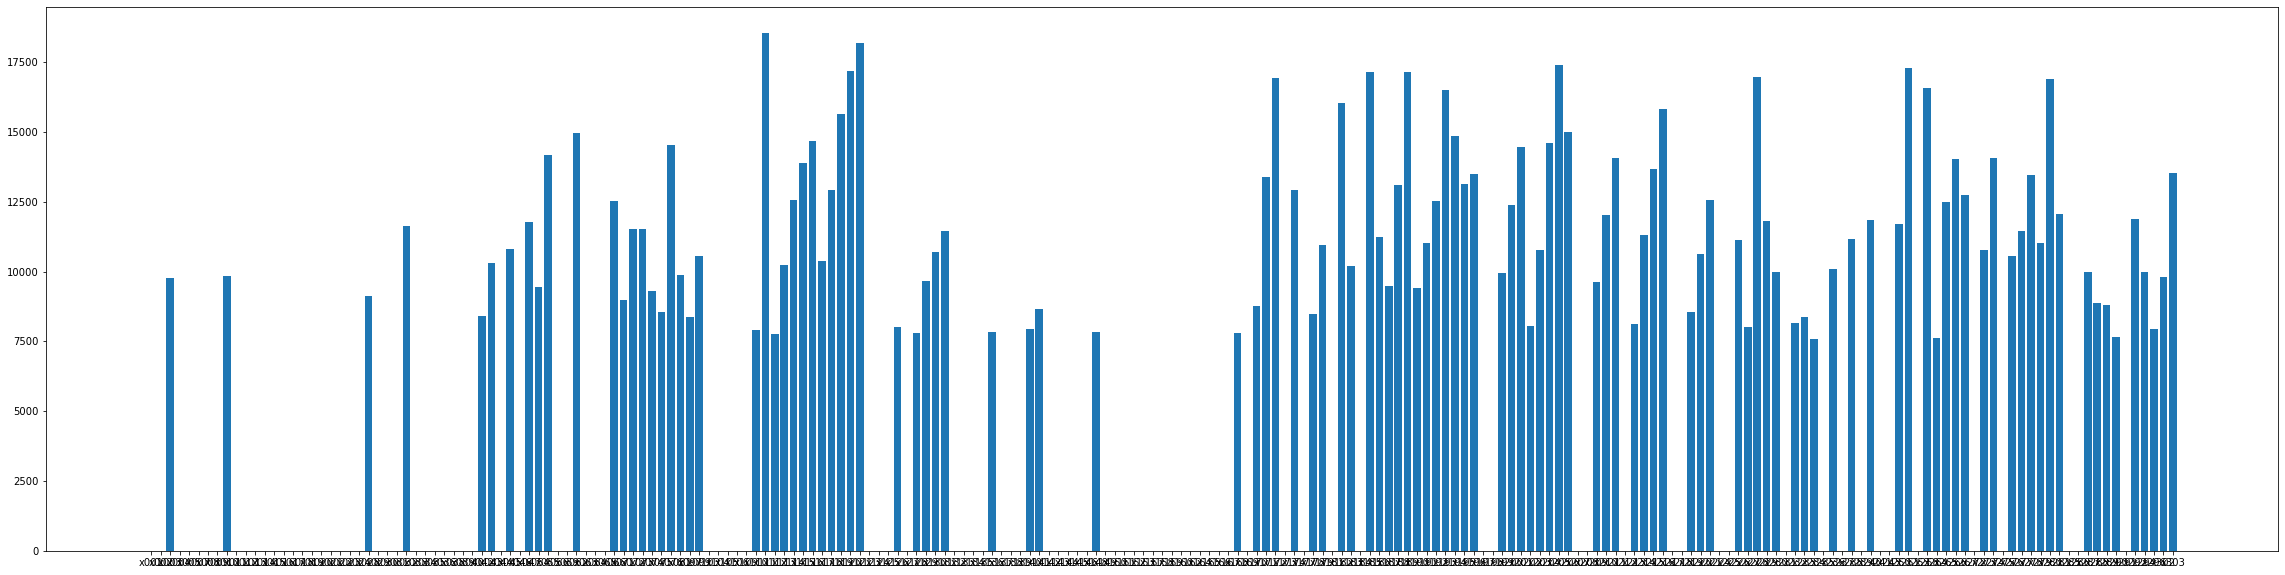

In [262]:
fig = plt.figure(figsize=(40,10))
plt.bar(X.columns,result)
plt.show()

In [263]:
df_concat  = pd.concat([pd.DataFrame(X),pd.DataFrame(y)],axis=1)
df_concat.columns = df.columns
df = df_concat.copy()
df.head()

x001   x002  x003   x004   x005  x007  x008  x009  x010  x011  x012  \
0  1280590.0   71.0  20.0   50.0  347.0   0.0   0.0   1.0   0.0   1.0   2.0   
1  1164267.0    4.0   2.0    4.0  115.0   0.0   0.0   0.0   0.0   0.0   0.0   
2  1346906.0  124.0  53.0  124.0  128.0   0.0   0.0   0.0   0.0   4.0   4.0   
3  1555326.0   33.0   5.0   16.0   41.0   1.0   2.0   3.0   3.0   1.0   0.0   
4  1366681.0    4.0   2.0    4.0   39.0   0.0   0.0   1.0   1.0   0.0   0.0   

   x013  x014  x015  x016  x017  x018  x019  x020  x021  x022  x023  x024  \
0   0.0   2.0   6.0   3.0   3.0   3.0   2.0   5.0   2.0   2.0   1.0   1.0   
1   0.0   2.0   2.0   0.0   2.0   1.0   0.0   0.0   0.0   0.0   0.0   2.0   
2   5.0   7.0  21.0   1.0  20.0   4.0   1.0   7.0   1.0   1.0   1.0  12.0   
3   0.0   0.0   9.0   4.0   5.0   4.0   3.0   5.0   2.0   2.0   1.0   4.0   
4   0.0   0.0   2.0   0.0   2.0   2.0   0.0   2.0   0.0   2.0   0.0   0.0   

   x028  x029  x030  x031  x032  x033  x034  x035  x036  x038  x039  x040  \
0   0.0   1.0   1.0   3.0   1.0   1.0   2.0   2.0   3.0   1.0   2.0   2.0   
1   0.0   2.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   7.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   2.0   5.0   2.0   0.0   0.0   2.0   2.0   2.0   0.0   2.0   2.0   
4   0.0   0.0   1.0   3.0   0.0   0.0   0.0   0.0   3.0   0.0   0.0   0.0   

      x042     x043     x044    x045  x046  x047  x054  x055  x056  x059  \
0   5000.0   3884.0   5300.0   500.0   1.0   1.0   0.0   0.0   0.0   0.0   
1      0.0      0.0    300.0   300.0   0.0   0.0   0.0   0.0   0.0   5.0   
2  10000.0  10000.0  10500.0   100.0   0.0   0.0   0.0   0.0   0.0   7.0   
3  50000.0  35249.1  25000.0  1150.0   2.0   0.0   0.0   0.0   0.0   0.0   
4      0.0      0.0    300.0   201.0   0.0   0.0   0.0   0.0   1.0   1.0   

   x062  x063  x064  x065  x066  x071  x072  x073  x074    x075  x076  x081  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0     0.0   0.0   0.0   
1   0.0   1.0   3.0   3.0   0.0   0.0   0.0   4.0   0.0  5278.0   0.0   0.0   
2   1.0   1.0   2.0   6.0   0.0   0.0   0.0   4.0   0.0  5278.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0     0.0   0.0   0.0   
4   0.0   0.0   1.0   1.0   0.0   0.0   0.0   1.0   0.0   525.0   0.0   0.0   

   x097  x099  x103  x104  x105  x106  x109  x110  x111  x112  x113  x114  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   x115  x116  x117  x118  x119  x120  x121  x123  x124  x125  x126  x127  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   x128  x129  x130  x131  x132  x133  x134  x135  x136  x137  x138  x139  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   x140  x141  x142  x143  x144  x145  x146  x148  x149  x150  x151  x152  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0

In [264]:
df.to_csv('train_clean_60null.csv',index=False)

In [265]:
## save the train dataset proprocessed reviews to a file
import pickle
with open('train_cols_60null.pkl', 'wb') as f:
    pickle.dump(list(df.columns), f)

## EDA, Data cleaning with Isolation forest outlier handling

In [1]:
import dtale
import pandas as pd
df = pd.read_csv('dataset_00_with_header.csv')
#d = dtale.show(df)
#d.open_browser()

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
df.head()

x001  x002  x003  x004   x005  x006  x007  x008  x009  x010  ...  x296  \
0  1540332   NaN   NaN   NaN    8.0     1     0     1     0     0  ...     0   
1   823066   4.0   3.0   3.0    4.0     0     2     2     0     0  ...  5206   
2  1089795   NaN   NaN   NaN   96.0     1     0     0     0     1  ...     0   
3  1147758  63.0  14.0  38.0  258.0     0     0     0     1     2  ...     0   
4  1229670  34.0  25.0  29.0   34.0     1     0     0     0     3  ...     0   

     x297  x298  x299  x300  x301  x302  x303  x304    y  
0     NaN     0     0     0     0   NaN     0   NaN  706  
1  0.9339     1     1     1     0   NaN     0   NaN  558  
2     NaN     0     0     0     0   NaN     0   NaN  577  
3     NaN     1     1     1     0   NaN     0   NaN  526  
4     NaN     0     0     0     0   NaN     0   NaN  496  

[5 rows x 305 columns]

In [4]:
pd.options.display.max_columns=None
pd.options.display.max_rows=None

In [5]:
from sklearn.model_selection import train_test_split
df , df_test = train_test_split(df, train_size=0.75, random_state=42)

In [6]:
df_test.to_csv('test.csv',index=False)

In [7]:
df[df.duplicated()]

Empty DataFrame
Columns: [x001, x002, x003, x004, x005, x006, x007, x008, x009, x010, x011, x012, x013, x014, x015, x016, x017, x018, x019, x020, x021, x022, x023, x024, x025, x026, x027, x028, x029, x030, x031, x032, x033, x034, x035, x036, x037, x038, x039, x040, x041, x042, x043, x044, x045, x046, x047, x048, x049, x050, x051, x052, x053, x054, x055, x056, x057, x058, x059, x060, x061, x062, x063, x064, x065, x066, x067, x068, x069, x070, x071, x072, x073, x074, x075, x076, x077, x078, x079, x080, x081, x082, x083, x084, x085, x086, x087, x088, x089, x090, x091, x092, x093, x094, x095, x096, x097, x098, x099, x100, ...]
Index: []

In [8]:
df.nunique().sort_values()

x096        1
x067        1
x095        1
x094        1
x263        2
x262        2
x147        2
x180        2
x083        2
x299        2
x298        2
x093        2
x092        2
x060        2
x091        2
x090        2
x089        2
x088        2
x087        2
x086        2
x161        2
x085        2
x154        2
x284        2
x084        2
x283        2
x282        2
x300        2
x026        2
x261        2
x260        2
x301        2
x006        2
x249        2
x248        2
x247        2
x246        2
x027        2
x244        2
x269        2
x270        2
x245        2
x082        2
x025        2
x271        2
x252        4
x077        4
x037        5
x078        5
x023        6
x068        6
x302        7
x022        7
x155        7
x050        7
x148        7
x253        8
x162        8
x287        8
x052        8
x051        8
x079        8
x053        9
x049        9
x107       10
x156       10
x038       11
x054       11
x229       11
x163       11
x048       11
x047  

In [9]:
print(df.shape)
# get number of unique values for each column
counts = df.nunique()
# record columns to delete
to_del = [i for i,v in counts.items() if v == 1]
print(to_del)
# drop useless columns
df.drop(to_del, axis=1, inplace=True)
print(df.shape)

(75000, 305)
['x067', 'x094', 'x095', 'x096']
(75000, 301)


(75000, 300) (75000,)
>Threshold=0.00, Features=300
>Threshold=0.05, Features=282
>Threshold=0.10, Features=268
>Threshold=0.15, Features=259
>Threshold=0.20, Features=240
>Threshold=0.25, Features=221
>Threshold=0.30, Features=217
>Threshold=0.35, Features=214
>Threshold=0.40, Features=210
>Threshold=0.45, Features=206
>Threshold=0.50, Features=201


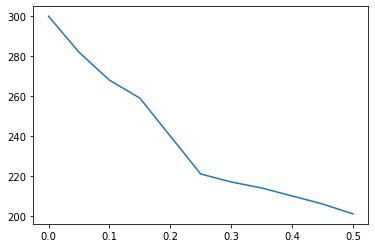

In [10]:
from numpy import arange
from pandas import read_csv
from sklearn.feature_selection import VarianceThreshold


data = df.values
cols = df.columns
X = data[:, :-1]
y = data[:, -1]
print(X.shape, y.shape)
# define thresholds to check
thresholds = arange(0.0, 0.55, 0.05)
# apply transform with each threshold
results = list()
for t in thresholds:
	# define the transform
	transform = VarianceThreshold(threshold=t)
	# transform the input data
	X_sel = transform.fit_transform(X)
	# determine the number of input features
	n_features = X_sel.shape[1]
	print('>Threshold=%.2f, Features=%d' % (t, n_features))
	# store the result
	results.append(n_features)
# plot the threshold vs the number of selected features
plt.plot(thresholds, results)
plt.show()

In [11]:
data = df.values
cols = df.columns
X = data[:, :-1]
y = data[:, -1]
transform = VarianceThreshold(threshold=0.25)
# transform the input data
X_sel = transform.fit_transform(X)
# determine the number of input features
n_features = X_sel.shape[1]
print('>Threshold=%.2f, Features=%d' % (t, n_features))

>Threshold=0.50, Features=221


In [12]:
comb = zip(list(cols),list(transform.get_support()))
df = pd.DataFrame(X_sel, columns=[x for x,y in comb if y])
df = pd.concat([df,pd.DataFrame(y)],axis=1)
df=df.rename(columns={0:'y'})
df.head()

x001   x002   x003   x004   x005  x007  x008  x009  x010  x011  x012  \
0  1280590.0   71.0   20.0   50.0  347.0   0.0   0.0   1.0   0.0   1.0   2.0   
1  1164267.0    NaN    NaN    NaN  115.0   0.0   0.0   0.0   0.0   0.0   0.0   
2  1346906.0  124.0  124.0  124.0  128.0   0.0   0.0   0.0   0.0   4.0   4.0   
3  1555326.0   33.0    5.0   16.0   41.0   1.0   2.0   3.0   3.0   1.0   0.0   
4  1366681.0    NaN    NaN    NaN   35.0   0.0   0.0   1.0   1.0   0.0   0.0   

   x013  x014  x015  x016  x017  x018  x019  x020  x021  x022  x023  x024  \
0   0.0   2.0   6.0   3.0   3.0   3.0   2.0   5.0   2.0   2.0   1.0   1.0   
1   0.0   2.0   2.0   0.0   2.0   1.0   0.0   0.0   0.0   0.0   0.0   2.0   
2   6.0   7.0  21.0   1.0  20.0   4.0   1.0   7.0   1.0   1.0   1.0  12.0   
3   0.0   0.0   9.0   4.0   5.0   4.0   3.0   5.0   2.0   2.0   1.0   4.0   
4   0.0   0.0   2.0   0.0   2.0   2.0   0.0   2.0   0.0   2.0   0.0   0.0   

   x028  x029  x030  x031  x032  x033  x034  x035  x036  x038  x039  x040  \
0   0.0   1.0   1.0   3.0   1.0   1.0   2.0   2.0   3.0   1.0   2.0   2.0   
1   0.0   2.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   7.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   2.0   5.0   2.0   0.0   0.0   2.0   2.0   2.0   0.0   2.0   2.0   
4   0.0   0.0   1.0   3.0   0.0   0.0   0.0   0.0   3.0   0.0   0.0   0.0   

      x042     x043     x044    x045  x046  x047  x054  x055  x056  x059  \
0   5000.0   3884.0   5300.0   500.0   1.0   1.0   0.0   0.0   0.0   0.0   
1      0.0      0.0      NaN     NaN   0.0   0.0   0.0   0.0   0.0   5.0   
2  10000.0  10000.0  10500.0     0.0   0.0   0.0   0.0   0.0   0.0  10.0   
3  50000.0  49330.0  25000.0  3000.0   2.0   0.0   0.0   0.0   0.0   0.0   
4      0.0      0.0    300.0   201.0   0.0   0.0   0.0   0.0   1.0   1.0   

   x062  x063  x064  x065  x066  x071  x072  x073  x074     x075  x076  x081  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   
1   0.0   1.0   3.0   3.0   0.0   0.0   0.0   5.0   0.0   7927.0   0.0   0.0   
2   1.0   1.0   2.0  10.0   0.0   0.0   0.0   8.0   0.0  11498.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   
4   0.0   0.0   1.0   1.0   0.0   0.0   0.0   1.0   0.0    525.0   0.0   0.0   

   x097  x098  x099  x103  x104  x105  x106  x109  x110  x111  x112  x113  \
0   0.0   NaN   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   NaN   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   NaN   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   NaN   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4   0.0   NaN   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   x114  x115  x116  x117  x118  x119  x120  x121  x123  x124  x125  x126  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   x127  x128  x129  x130  x131  x132  x133  x134  x135  x136  x137  x138  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   x139  x140  x141  x142  x143  x144  x145  x146  x148  x149  x150  x151  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   NaN   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   NaN   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0

In [13]:
df_null = pd.DataFrame((df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False))
df_null

0
x242  93.317333
x098  80.620000
x155  79.076000
x255  76.934667
x256  76.934667
x257  76.934667
x302  73.042667
x253  66.428000
x162  66.386667
x266  66.365333
x267  66.365333
x265  66.365333
x275  56.105333
x289  49.665333
x288  49.665333
x290  49.665333
x148  41.786667
x239  36.721333
x238  36.721333
x237  36.721333
x287  24.762667
x003  21.396000
x002  21.396000
x004  21.389333
x235  20.042667
x044  19.636000
x045  19.636000
x234  19.060000
x272   7.185333
x005   6.113333
x117   0.000000
x116   0.000000
x112   0.000000
x114   0.000000
x115   0.000000
x113   0.000000
y      0.000000
x111   0.000000
x110   0.000000
x109   0.000000
x106   0.000000
x119   0.000000
x105   0.000000
x104   0.000000
x103   0.000000
x099   0.000000
x097   0.000000
x081   0.000000
x076   0.000000
x118   0.000000
x129   0.000000
x120   0.000000
x133   0.000000
x142   0.000000
x141   0.000000
x140   0.000000
x139   0.000000
x138   0.000000
x137   0.000000
x136   0.000000
x135   0.000000
x134   0.000000
x132   0.000000
x121   0.000000
x131   0.000000
x130   0.000000
x074   0.000000
x128   0.000000
x127   0.000000
x126   0.000000
x125   0.000000
x124   0.000000
x123   0.000000
x075   0.000000
x047   0.000000
x073   0.000000
x017   0.000000
x029   0.000000
x028   0.000000
x024   0.000000
x023   0.000000
x022   0.000000
x021   0.000000
x020   0.000000
x019   0.000000
x018   0.000000
x016   0.000000
x031   0.000000
x015   0.000000
x014   0.000000
x013   0.000000
x012   0.000000
x011   0.000000
x010   0.000000
x009   0.000000
x008   0.000000
x007   0.000000
x030   0.000000
x032   0.000000
x072   0.000000
x054   0.000000
x071   0.000000
x066   0.000000
x065   0.000000
x064   0.000000
x063   0.000000
x062   0.000000
x059   0.000000
x056   0.000000
x055   0.000000
x144   0.000000
x033   0.000000
x046   0.000000
x043   0.000000
x042   0.000000
x040   0.000000
x039   0.000000
x038   0.000000
x036   0.000000
x035   0.000000
x034   0.000000
x143   0.000000
x159   0.000000
x145   0.000000
x232   0.000000
x230   0.000000
x229   0.000000
x228   0.000000
x227   0.000000
x226   0.000000
x225   0.000000
x224   0.000000
x221   0.000000
x220   0.000000
x219   0.000000
x218   0.000000
x217   0.000000
x216   0.000000
x215   0.000000
x214   0.000000
x213   0.000000
x212   0.000000
x211   0.000000
x210   0.000000
x209   0.000000
x208   0.000000
x231   0.000000
x233   0.000000
x206   0.000000
x236   0.000000
x296   0.000000
x294   0.000000
x292   0.000000
x291   0.000000
x286   0.000000
x285   0.000000
x281   0.000000
x280   0.000000
x279   0.000000
x278   0.000000
x277   0.000000
x276   0.000000
x274   0.000000
x273   0.000000
x264   0.000000
x258   0.000000
x251   0.000000
x250   0.000000
x243   0.000000
x241   0.000000
x240   0.000000
x207   0.000000
x205   0.000000
x146   0.000000
x179   0.000000
x177   0.000000
x174   0.000000
x173   0.000000
x172   0.000000
x171   0.000000
x170   0.000000
x169   0.000000
x168   0.000000
x167   0.000000
x166   0.000000
x165   0.000000
x164   0.000000
x160   0.000000
x303   0.000000
x158   0.000000
x157   0.000000
x153   0.000000
x152   0.000000
x151   0.000000
x150   0.000000
x149   0.000000
x178   0.000000
x181   0.000000
x204   0.000000
x182   0.000000
x203   0.000000
x202   0.000000
x201   0.000000
x200   0.000000
x199   0.000000
x198   0.000000
x197   0.000000
x196   0.000000
x195   0.000000
x194   0.000000
x193   0.000000
x192   0.000000
x191   0.000000
x190   0.000000
x189   0.000000
x188   0.000000
x187   0.000000
x186   0.000000
x185   0.000000
x184   0.000000
x183   0.000000
x001   0.000000

In [14]:
df.describe()

x001          x002          x003          x004          x005  \
count  7.500000e+04  58953.000000  58953.000000  58958.000000  70415.000000   
mean   1.218538e+06    125.342459     25.342612     65.154873    178.123212   
std    2.723928e+05    115.536587     48.554688     63.314983    124.466592   
min    5.170000e+02      0.000000      0.000000      0.000000      0.000000   
25%    9.751522e+05     32.000000      3.000000     19.000000     87.000000   
50%    1.234986e+06     99.000000      8.000000     47.000000    150.000000   
75%    1.445469e+06    180.000000     24.000000     92.000000    246.000000   
max    1.677188e+06    718.000000    700.000000    700.000000    827.000000   

               x007          x008          x009          x010          x011  \
count  75000.000000  75000.000000  75000.000000  75000.000000  75000.000000   
mean       0.697320      1.390133      1.197360      1.024800      1.837293   
std        1.380916      2.257183      2.048716      1.706102      2.693866   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      1.000000      0.000000      0.000000      1.000000   
75%        1.000000      2.000000      2.000000      1.000000      3.000000   
max       44.000000     56.000000     81.000000     33.000000     44.000000   

               x012          x013          x014          x015          x016  \
count  75000.000000  75000.000000  75000.000000  75000.000000  75000.000000   
mean       1.608760      1.585453      4.287867     12.931667      4.084013   
std        2.582814      2.628894      5.431145     11.933500      4.603623   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      4.000000      1.000000   
50%        1.000000      0.000000      2.000000     10.000000      3.000000   
75%        2.000000      2.000000      7.000000     19.000000      6.000000   
max       44.000000     42.000000     68.000000    189.000000     87.000000   

               x017          x018          x019          x020          x021  \
count  75000.000000  75000.000000  75000.000000  75000.000000  75000.000000   
mean       8.847653      3.987773      2.147827      6.794040      2.281707   
std        9.242401      2.361512      1.748520      7.831186      3.153474   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.000000      2.000000      1.000000      1.000000      0.000000   
50%        6.000000      4.000000      2.000000      4.000000      1.000000   
75%       13.000000      6.000000      3.000000     10.000000      3.000000   
max      162.000000     15.000000     11.000000    159.000000     84.000000   

               x022          x023          x024          x028          x029  \
count  75000.000000  75000.000000  75000.000000  75000.000000  75000.000000   
mean       1.730787      1.086080      4.729467      0.798547      1.482440   
std        1.120729      1.011964      7.135483      1.569899      2.043791   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.000000      0.000000      1.000000      0.000000      0.000000   
50%        2.000000      1.000000      2.000000      0.000000      1.000000   
75%        3.000000      2.000000      6.000000      1.000000      2.000000   
max        6.000000      5.000000    125.000000     47.000000     46.000000   

               x030          x031          x032          x033          x034  \
count  75000.000000  75000.000000  75000.000000  75000.000000  75000.000000   
mean       4.041920      5.370560      0.265093      0.816560      1.712733   
std        4.788204      7.768629      0.879380      1.833698      3.136843   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.000000      1.000000      0.000000      0.00000

In [15]:
del_col = list(df_null[df_null[0] > 75].index)

In [16]:
df=df.drop(columns=del_col,axis=1)
df.shape

(75000, 216)

>mean -55.095 (0.755)
>median -54.761 (0.497)
>most_frequent -54.094 (0.497)
>constant -54.303 (0.472)


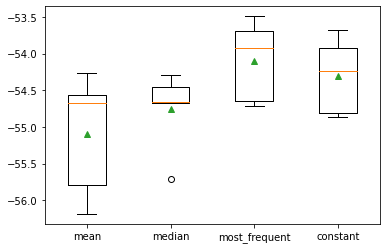

In [17]:
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

data = df.values
ix = [i for i in range(data.shape[1]) if i != data.shape[1]-1]
X, y = data[:, ix], data[:, data.shape[1]-1]
# evaluate each strategy on the dataset
results = list()
strategies = ['mean', 'median', 'most_frequent', 'constant']
for s in strategies:
	# create the modeling pipeline
	pipeline = Pipeline(steps=[('i', SimpleImputer(strategy=s)), ('m', LinearRegression())])
	# evaluate the model
	cv = KFold(n_splits=5)
	scores = cross_val_score(pipeline, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
	# store results
	results.append(scores)
	print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=strategies, showmeans=True)
plt.show()

In [18]:
df_copy = df.copy()
X = df_copy.drop('y',axis=1)
y = df_copy.pop('y')
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(X)
Xtrans = imputer.transform(X)

In [19]:
## save the train dataset proprocessed reviews to a file
import pickle
with open('imputer.pkl', 'wb') as f:
    pickle.dump(imputer, f)

In [20]:
df_concat  = pd.concat([pd.DataFrame(Xtrans),pd.DataFrame(y)],axis=1)
df_concat.columns = df.columns
df = df_concat.copy()
df.head()

x001   x002   x003   x004   x005  x007  x008  x009  x010  x011  x012  \
0  1280590.0   71.0   20.0   50.0  347.0   0.0   0.0   1.0   0.0   1.0   2.0   
1  1164267.0    4.0    2.0    4.0  115.0   0.0   0.0   0.0   0.0   0.0   0.0   
2  1346906.0  124.0  124.0  124.0  128.0   0.0   0.0   0.0   0.0   4.0   4.0   
3  1555326.0   33.0    5.0   16.0   41.0   1.0   2.0   3.0   3.0   1.0   0.0   
4  1366681.0    4.0    2.0    4.0   35.0   0.0   0.0   1.0   1.0   0.0   0.0   

   x013  x014  x015  x016  x017  x018  x019  x020  x021  x022  x023  x024  \
0   0.0   2.0   6.0   3.0   3.0   3.0   2.0   5.0   2.0   2.0   1.0   1.0   
1   0.0   2.0   2.0   0.0   2.0   1.0   0.0   0.0   0.0   0.0   0.0   2.0   
2   6.0   7.0  21.0   1.0  20.0   4.0   1.0   7.0   1.0   1.0   1.0  12.0   
3   0.0   0.0   9.0   4.0   5.0   4.0   3.0   5.0   2.0   2.0   1.0   4.0   
4   0.0   0.0   2.0   0.0   2.0   2.0   0.0   2.0   0.0   2.0   0.0   0.0   

   x028  x029  x030  x031  x032  x033  x034  x035  x036  x038  x039  x040  \
0   0.0   1.0   1.0   3.0   1.0   1.0   2.0   2.0   3.0   1.0   2.0   2.0   
1   0.0   2.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   7.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   2.0   5.0   2.0   0.0   0.0   2.0   2.0   2.0   0.0   2.0   2.0   
4   0.0   0.0   1.0   3.0   0.0   0.0   0.0   0.0   3.0   0.0   0.0   0.0   

      x042     x043     x044    x045  x046  x047  x054  x055  x056  x059  \
0   5000.0   3884.0   5300.0   500.0   1.0   1.0   0.0   0.0   0.0   0.0   
1      0.0      0.0    300.0   300.0   0.0   0.0   0.0   0.0   0.0   5.0   
2  10000.0  10000.0  10500.0     0.0   0.0   0.0   0.0   0.0   0.0  10.0   
3  50000.0  49330.0  25000.0  3000.0   2.0   0.0   0.0   0.0   0.0   0.0   
4      0.0      0.0    300.0   201.0   0.0   0.0   0.0   0.0   1.0   1.0   

   x062  x063  x064  x065  x066  x071  x072  x073  x074     x075  x076  x081  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   
1   0.0   1.0   3.0   3.0   0.0   0.0   0.0   5.0   0.0   7927.0   0.0   0.0   
2   1.0   1.0   2.0  10.0   0.0   0.0   0.0   8.0   0.0  11498.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   
4   0.0   0.0   1.0   1.0   0.0   0.0   0.0   1.0   0.0    525.0   0.0   0.0   

   x097  x099  x103  x104  x105  x106  x109  x110  x111  x112  x113  x114  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   x115  x116  x117  x118  x119  x120  x121  x123  x124  x125  x126  x127  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   x128  x129  x130  x131  x132  x133  x134  x135  x136  x137  x138  x139  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   x140  x141  x142  x143  x144  x145  x146  x148  x149  x150  x151  x152  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0

In [21]:
(df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False)

y       0.0
x113    0.0
x125    0.0
x124    0.0
x123    0.0
x121    0.0
x120    0.0
x119    0.0
x118    0.0
x117    0.0
x116    0.0
x115    0.0
x114    0.0
x112    0.0
x303    0.0
x111    0.0
x110    0.0
x109    0.0
x106    0.0
x105    0.0
x104    0.0
x103    0.0
x099    0.0
x097    0.0
x081    0.0
x076    0.0
x126    0.0
x127    0.0
x128    0.0
x129    0.0
x153    0.0
x152    0.0
x151    0.0
x150    0.0
x149    0.0
x148    0.0
x146    0.0
x145    0.0
x144    0.0
x143    0.0
x142    0.0
x141    0.0
x140    0.0
x139    0.0
x138    0.0
x137    0.0
x136    0.0
x135    0.0
x134    0.0
x133    0.0
x132    0.0
x131    0.0
x130    0.0
x075    0.0
x074    0.0
x073    0.0
x030    0.0
x028    0.0
x024    0.0
x023    0.0
x022    0.0
x021    0.0
x020    0.0
x019    0.0
x018    0.0
x017    0.0
x016    0.0
x015    0.0
x014    0.0
x013    0.0
x012    0.0
x011    0.0
x010    0.0
x009    0.0
x008    0.0
x007    0.0
x005    0.0
x004    0.0
x003    0.0
x002    0.0
x029    0.0
x031    0.0
x072    0.0
x032

In [33]:
df_copy = df.copy()
X = df_copy.drop('y',axis=1)
y = df_copy.pop('y')
X = X.to_numpy()
y= y.to_numpy()

In [41]:
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X)
# select all rows that are not outliers
mask = yhat != -1

In [35]:
X = X[mask, :]

In [36]:
y = y[mask]

In [37]:
df_concat  = pd.concat([pd.DataFrame(X),pd.DataFrame(y)],axis=1)
df_concat.columns = df.columns
df = df_concat.copy()
df.head()

x001  x002  x003  x004   x005  x007  x008  x009  x010  x011  x012  \
0  1280590.0  71.0  20.0  50.0  347.0   0.0   0.0   1.0   0.0   1.0   2.0   
1  1164267.0   4.0   2.0   4.0  115.0   0.0   0.0   0.0   0.0   0.0   0.0   
2  1555326.0  33.0   5.0  16.0   41.0   1.0   2.0   3.0   3.0   1.0   0.0   
3  1366681.0   4.0   2.0   4.0   35.0   0.0   0.0   1.0   1.0   0.0   0.0   
4  1298507.0   5.0   5.0   5.0   32.0   1.0   1.0   1.0   1.0   0.0   0.0   

   x013  x014  x015  x016  x017  x018  x019  x020  x021  x022  x023  x024  \
0   0.0   2.0   6.0   3.0   3.0   3.0   2.0   5.0   2.0   2.0   1.0   1.0   
1   0.0   2.0   2.0   0.0   2.0   1.0   0.0   0.0   0.0   0.0   0.0   2.0   
2   0.0   0.0   9.0   4.0   5.0   4.0   3.0   5.0   2.0   2.0   1.0   4.0   
3   0.0   0.0   2.0   0.0   2.0   2.0   0.0   2.0   0.0   2.0   0.0   0.0   
4   0.0   0.0   3.0   1.0   2.0   2.0   1.0   2.0   0.0   1.0   0.0   1.0   

   x028  x029  x030  x031  x032  x033  x034  x035  x036  x038  x039  x040  \
0   0.0   1.0   1.0   3.0   1.0   1.0   2.0   2.0   3.0   1.0   2.0   2.0   
1   0.0   2.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   2.0   5.0   2.0   0.0   0.0   2.0   2.0   2.0   0.0   2.0   2.0   
3   0.0   0.0   1.0   3.0   0.0   0.0   0.0   0.0   3.0   0.0   0.0   0.0   
4   0.0   1.0   2.0  14.0   0.0   0.0   2.0  11.0   8.0   0.0   2.0   5.0   

      x042     x043     x044    x045  x046  x047  x054  x055  x056  x059  \
0   5000.0   3884.0   5300.0   500.0   1.0   1.0   0.0   0.0   0.0   0.0   
1      0.0      0.0    300.0   300.0   0.0   0.0   0.0   0.0   0.0   5.0   
2  50000.0  49330.0  25000.0  3000.0   2.0   0.0   0.0   0.0   0.0   0.0   
3      0.0      0.0    300.0   201.0   0.0   0.0   0.0   0.0   1.0   1.0   
4      0.0      0.0    300.0   100.0   0.0   0.0   0.0   0.0   0.0   4.0   

   x062  x063  x064  x065  x066  x071  x072  x073  x074    x075  x076  x081  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0     0.0   0.0   0.0   
1   0.0   1.0   3.0   3.0   0.0   0.0   0.0   5.0   0.0  7927.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0     0.0   0.0   0.0   
3   0.0   0.0   1.0   1.0   0.0   0.0   0.0   1.0   0.0   525.0   0.0   0.0   
4   1.0   3.0   4.0   4.0   1.0   1.0   1.0   3.0   1.0  2262.0   0.0   0.0   

   x097  x099  x103  x104  x105  x106  x109  x110  x111  x112  x113  x114  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   x115  x116  x117  x118  x119  x120  x121  x123  x124  x125  x126  x127  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   x128  x129  x130  x131  x132  x133  x134  x135  x136  x137  x138  x139  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   x140  x141  x142  x143  x144  x145  x146  x148  x149  x150  x151  x152  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0

In [39]:
df.to_csv('train_clean_iso.csv',index=False)

In [40]:
## save the train dataset proprocessed reviews to a file
import pickle
with open('train_cols.pkl', 'wb') as f:
    pickle.dump(list(df.columns), f)

## Data Visualization of Train and Test data

In [10]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

### Visualization of Train data

In [11]:
df = pd.read_csv('train_clean_withOutl.csv')

In [12]:
df_copy = df.copy()
X = df_copy.drop('y',axis=1)
y = df_copy.pop('y')

In [13]:
pca = PCA(n_components=2)
pca.fit(X)
Xtrans = pca.transform(X)

In [14]:
pca.explained_variance_ratio_

array([0.61103291, 0.30392583])

In [15]:
import numpy as np
rows=np.random.randint(1,Xtrans.shape[0],75000)
rows.shape

(75000,)

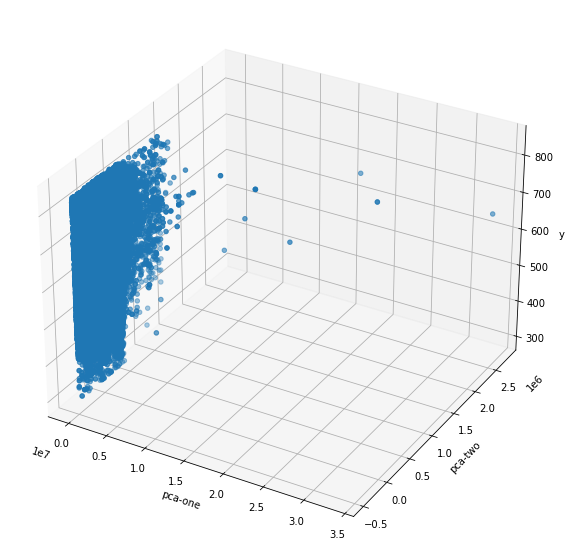

In [16]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=Xtrans[rows,0], 
    ys=Xtrans[rows,1], 
    zs=y[rows]
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('y')
plt.show()

<AxesSubplot:ylabel='y'>

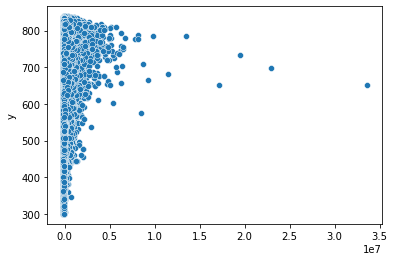

In [17]:
sns.scatterplot(x=Xtrans[:,0],y=y)

<AxesSubplot:ylabel='y'>

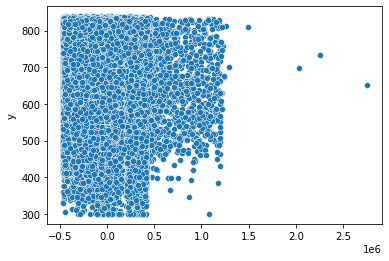

In [18]:
sns.scatterplot(x=Xtrans[:,1],y=y)

### Visualization of Test data

In [19]:
df = pd.read_csv('test_clean.csv')

In [20]:
df_copy = df.copy()
X = df_copy.drop('y',axis=1)
y = df_copy.pop('y')

In [21]:
pca = PCA(n_components=2)
pca.fit(X)
Xtrans = pca.transform(X)

In [22]:
pca.explained_variance_ratio_

array([0.56382705, 0.31142479])

In [23]:
import numpy as np
rows=np.random.randint(1,Xtrans.shape[0],75000)
rows.shape

(75000,)

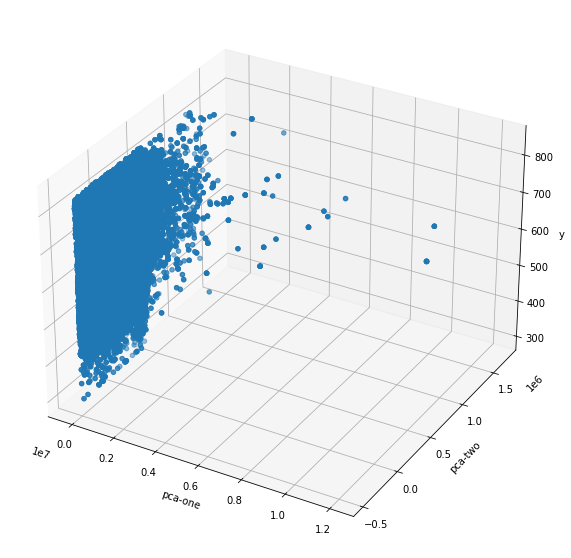

In [24]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=Xtrans[rows,0], 
    ys=Xtrans[rows,1], 
    zs=y[rows]
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('y')
plt.show()

<AxesSubplot:ylabel='y'>

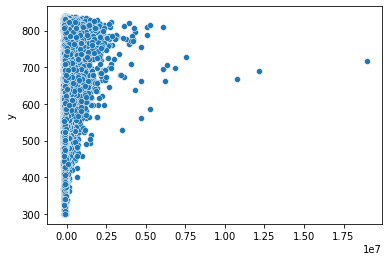

In [25]:
sns.scatterplot(x=Xtrans[:,0],y=y)

<AxesSubplot:ylabel='y'>

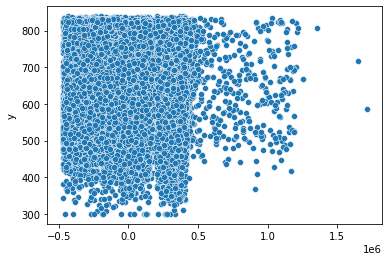

In [26]:
sns.scatterplot(x=Xtrans[:,1],y=y)

## Data Visualization - Correlation

### Dataset after ISO outlier treatment

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import pandas as pd

In [2]:
df = pd.read_csv('train_clean_iso.csv')

In [3]:
df_copy = df.copy()
X = df_copy.drop('y',axis=1)
y = df_copy.pop('y')

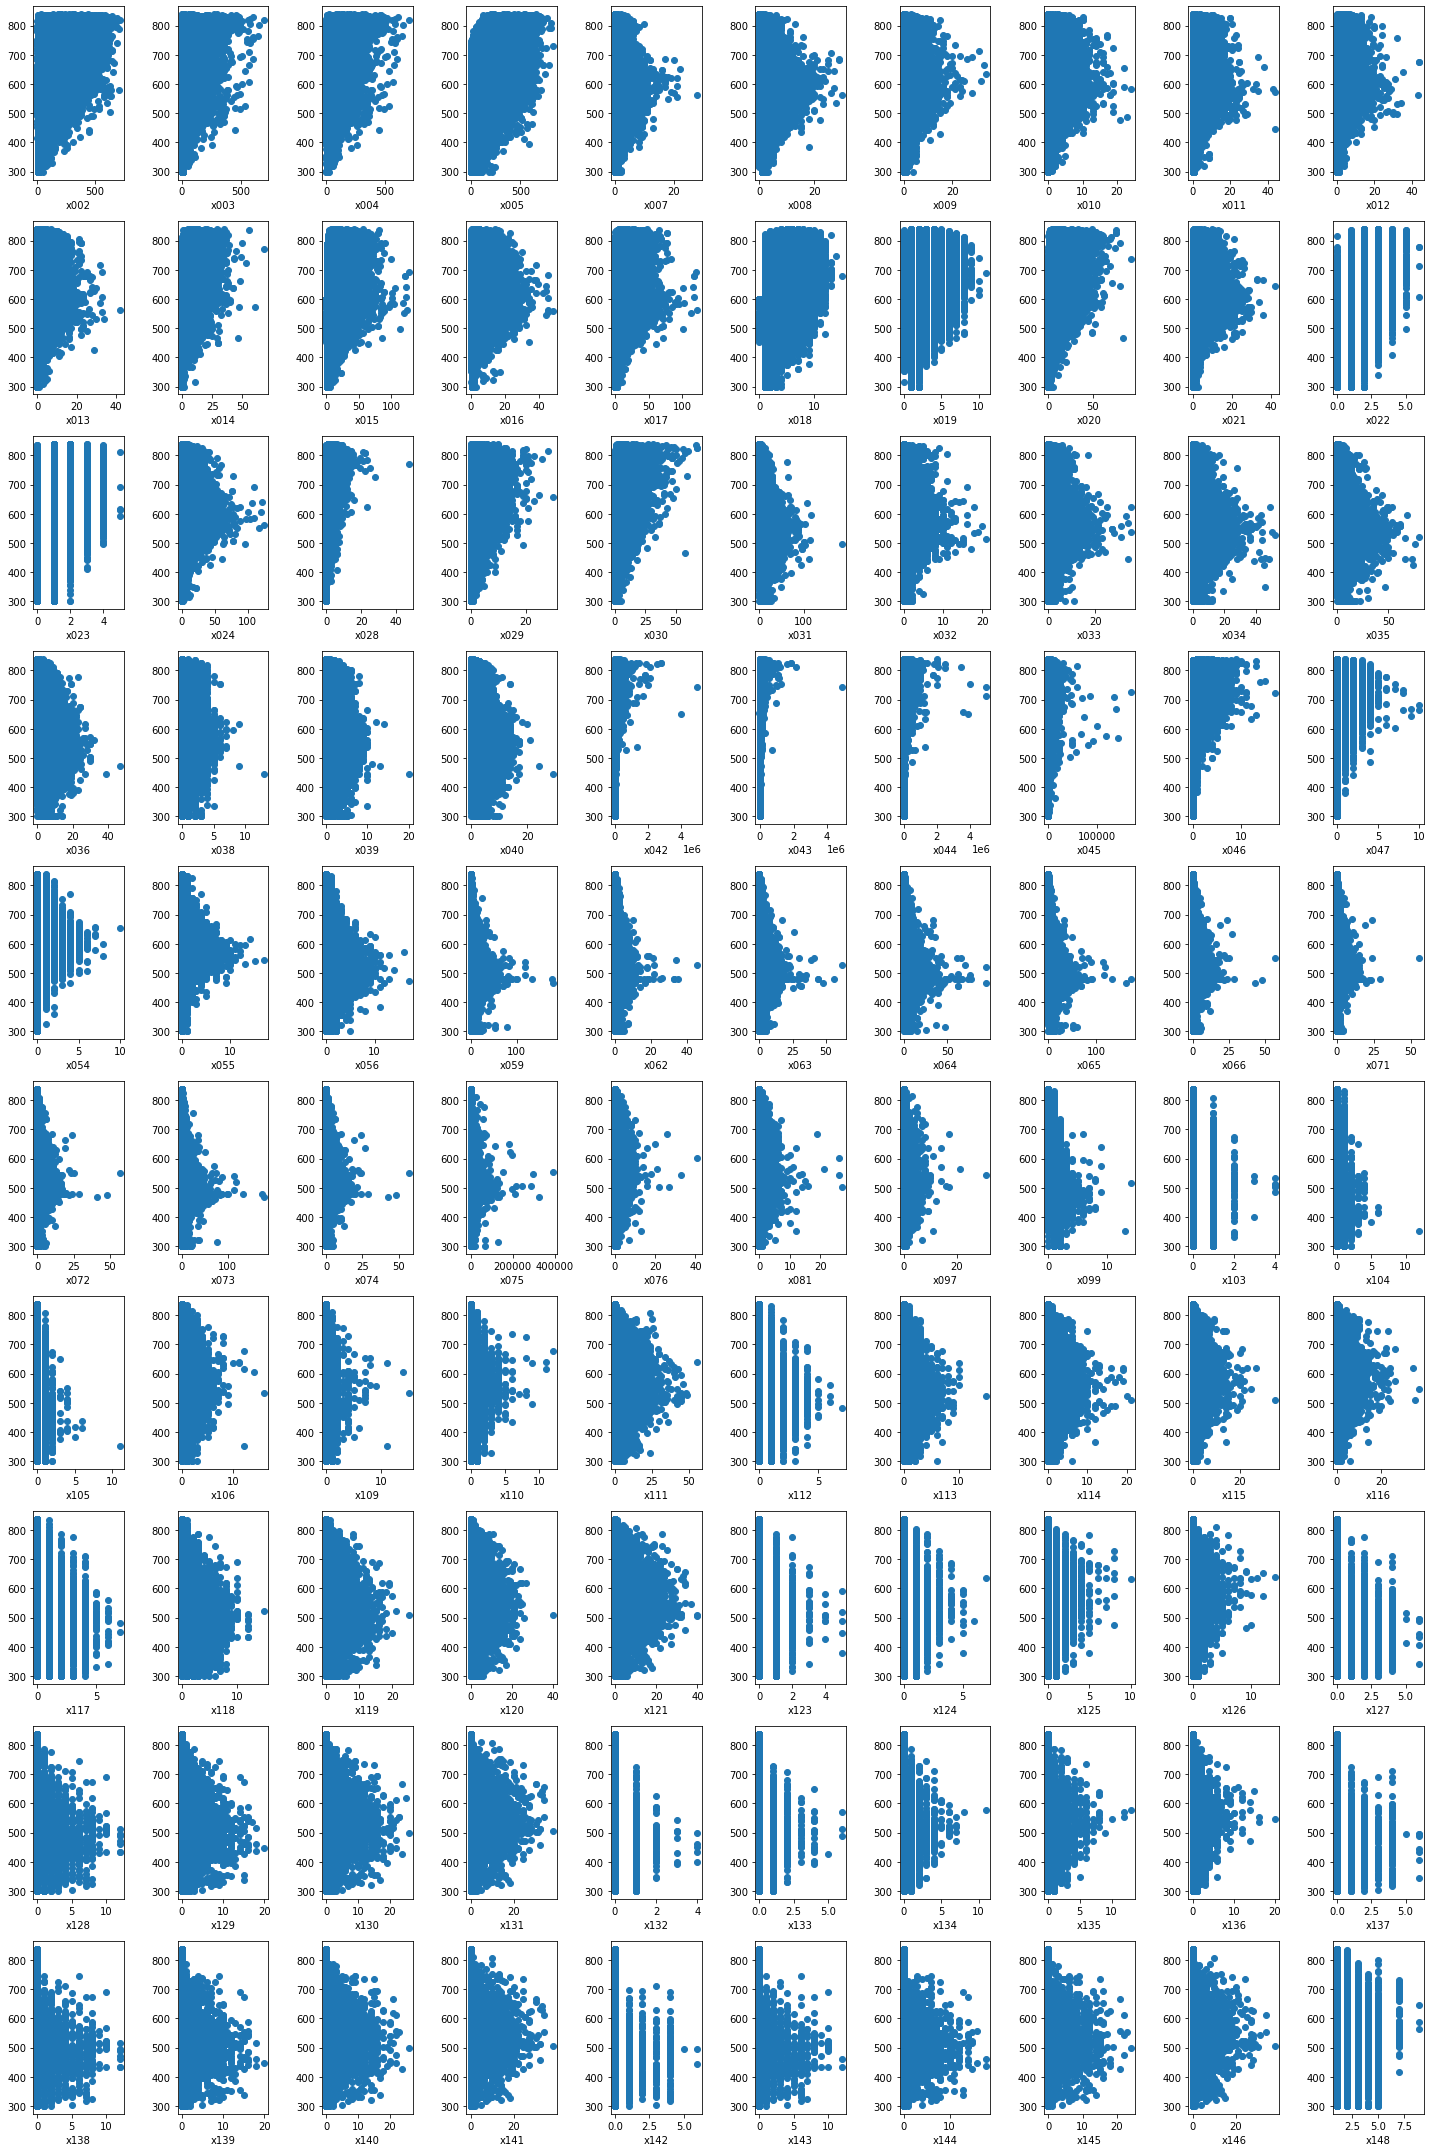

In [4]:
col = df.columns
plt.figure(figsize=(20,30))
for i in range (1, 101):
    ax=plt.subplot(10, 10, i)
    plt.scatter(df[col[i]],df['y'])
    ax.set_xlabel(col[i])
plt.tight_layout()

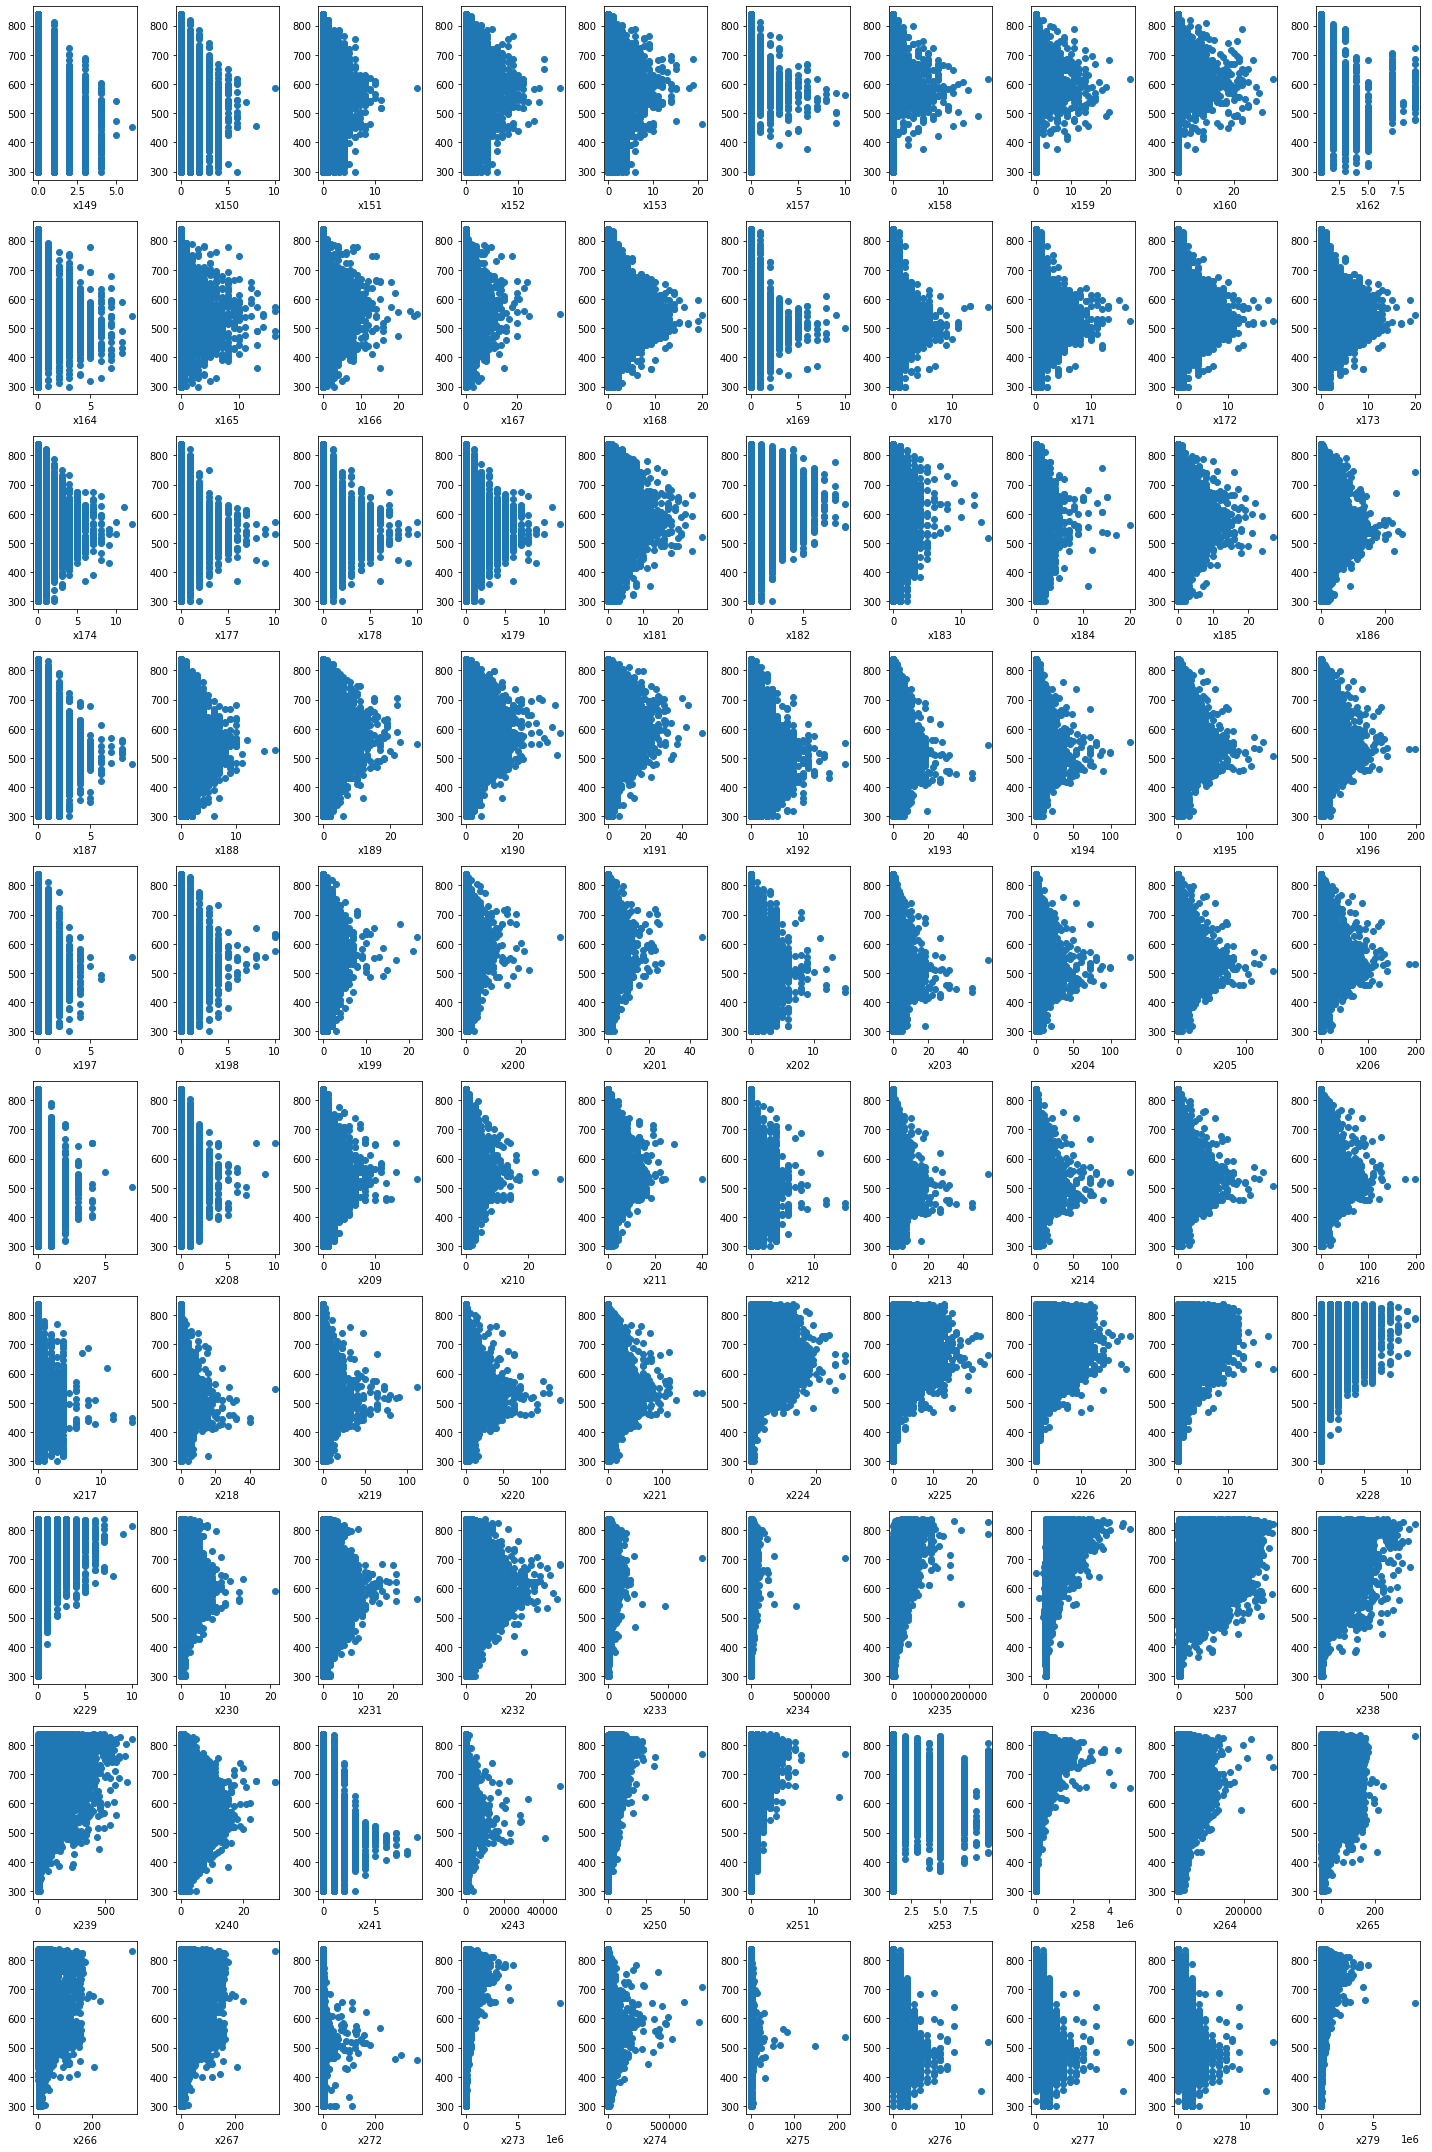

In [5]:
col = df.columns
plt.figure(figsize=(20,30))
for i in range (1, 101):
    ax=plt.subplot(10, 10, i)
    plt.scatter(df[col[i+100]],df['y'])
    ax.set_xlabel(col[i+100])
plt.tight_layout()

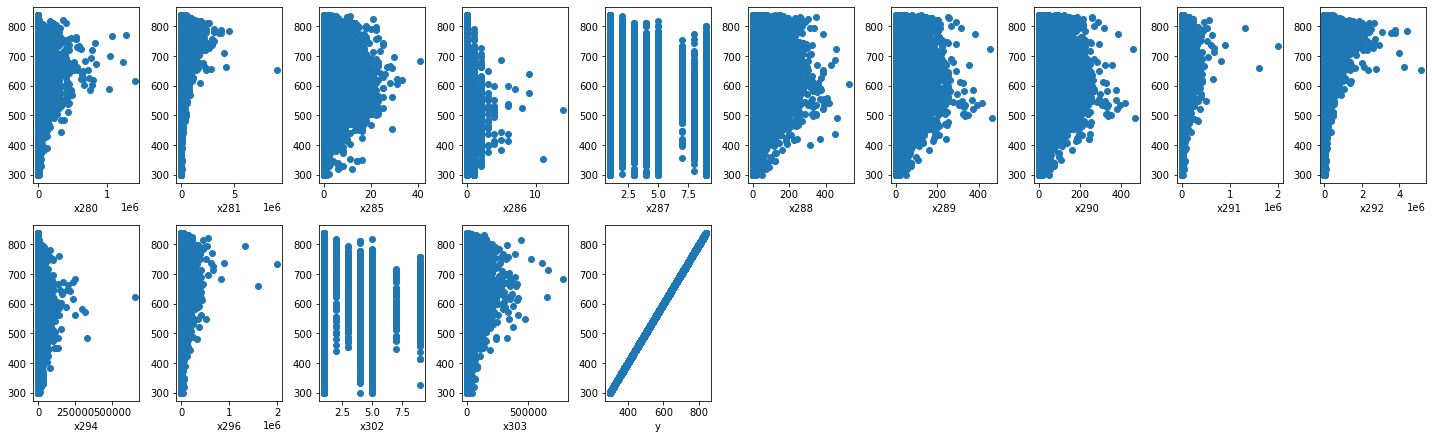

In [6]:
col = df.columns
plt.figure(figsize=(20,30))
for i in range (1, 16):
    ax=plt.subplot(10, 10, i)
    plt.scatter(df[col[i+200]],df['y'])
    ax.set_xlabel(col[i+200])
plt.tight_layout()

### Dataset after (10,90) percentile capping outlier treatment

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import pandas as pd

In [62]:
df = pd.read_csv('train_clean.csv')

In [63]:
df_copy = df.copy()
X = df_copy.drop('y',axis=1)
y = df_copy.pop('y')

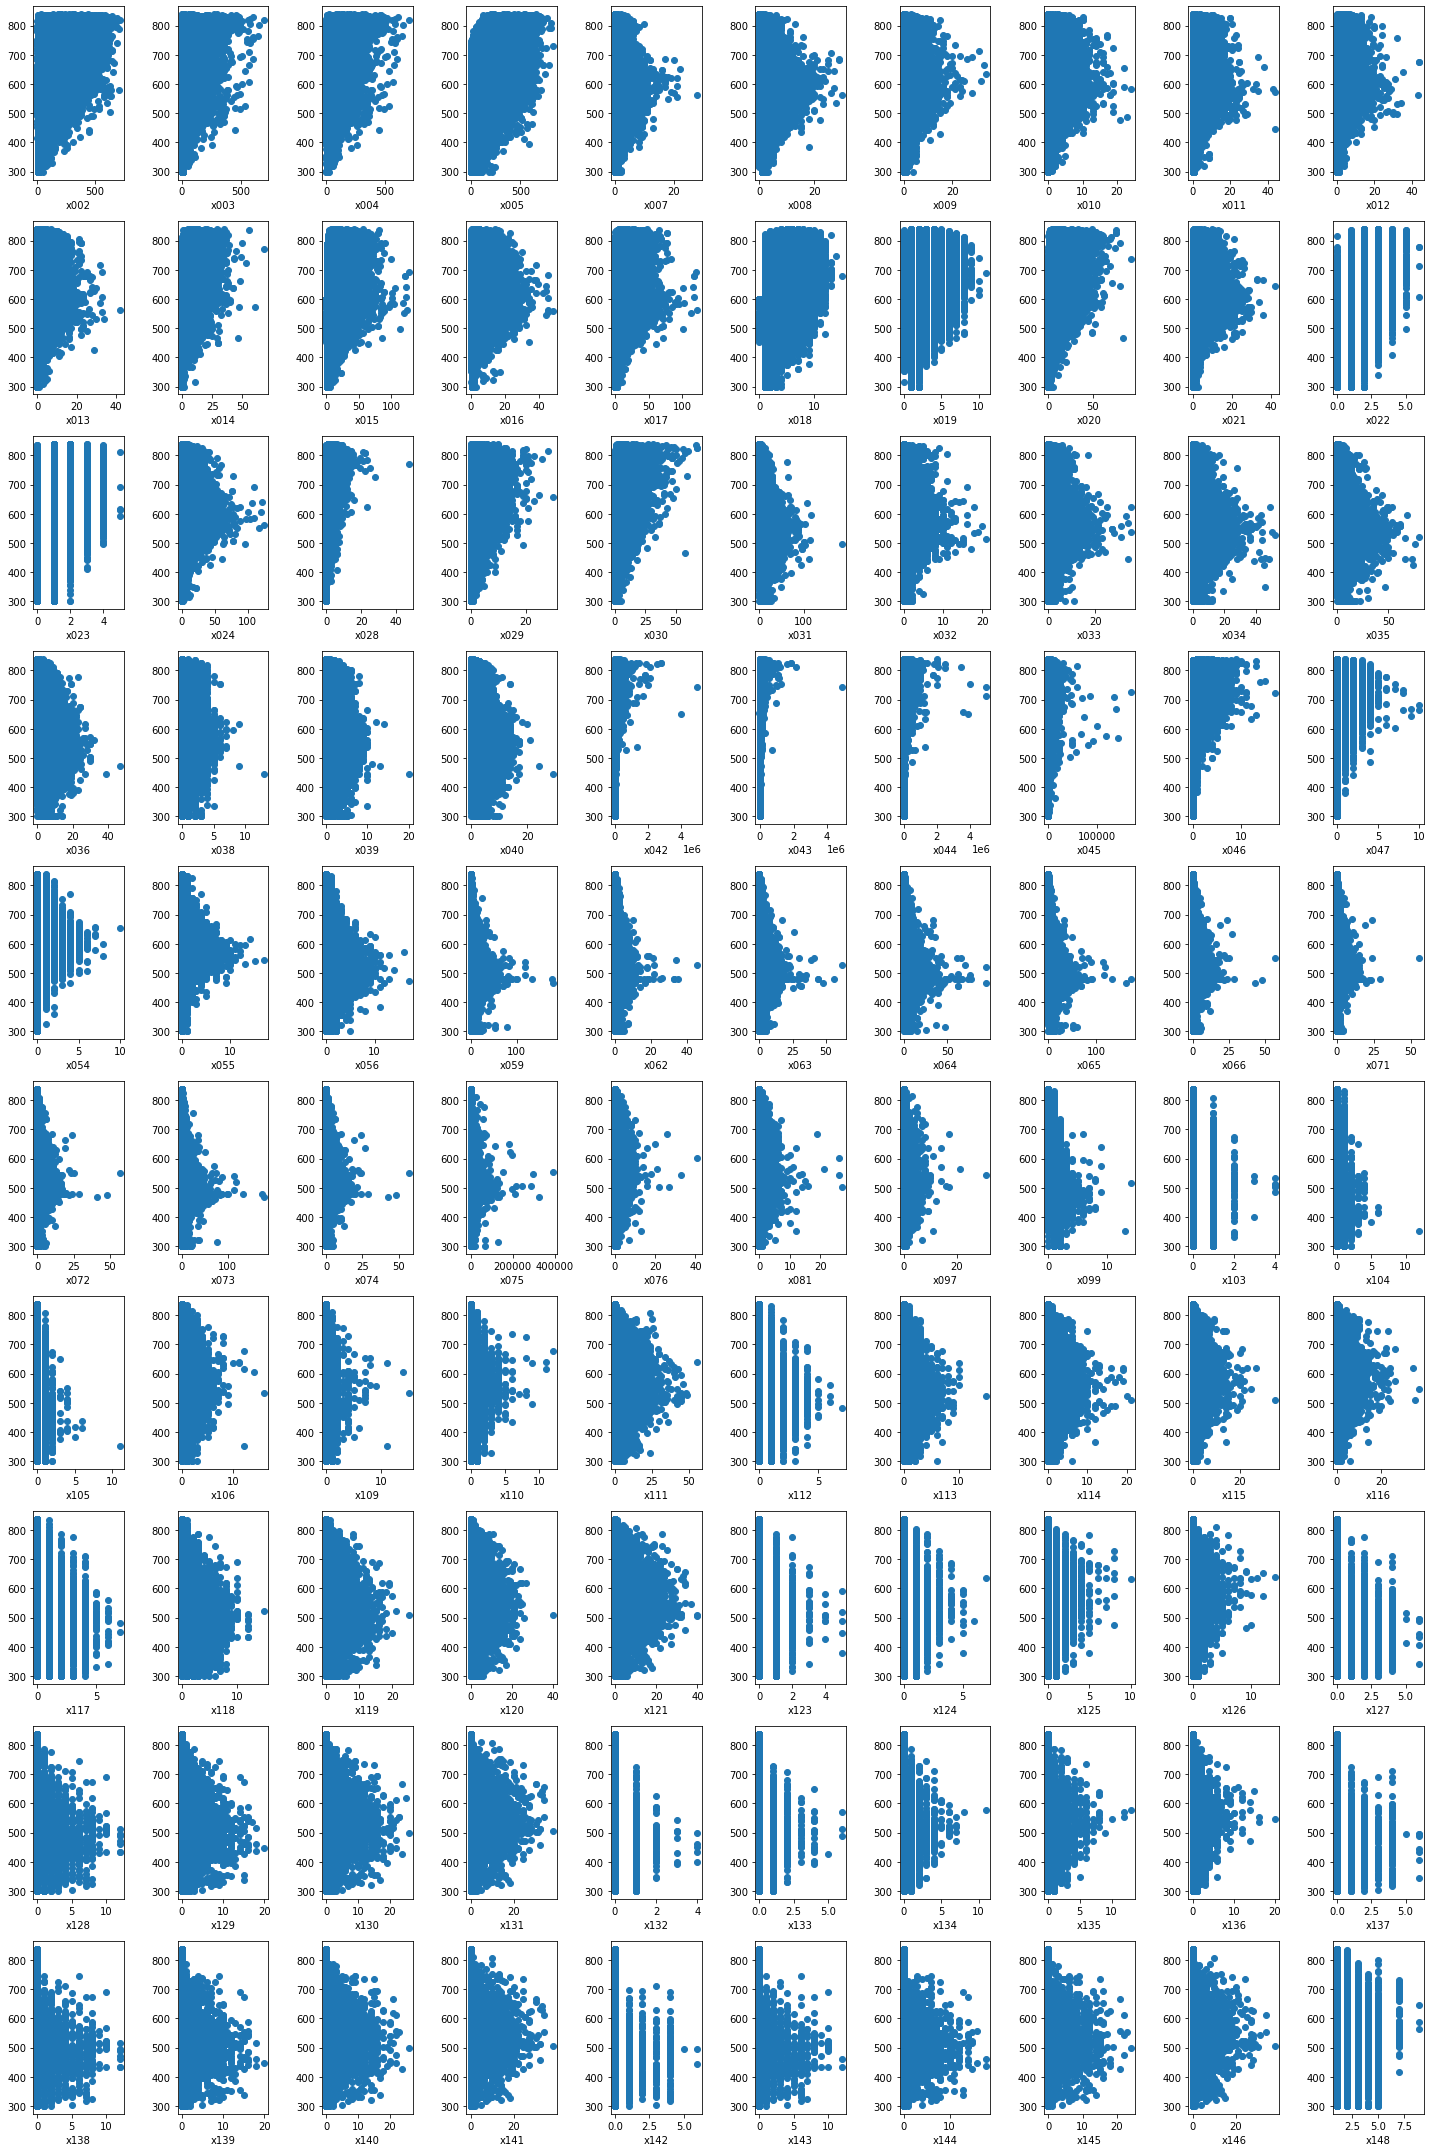

In [7]:
col = df.columns
plt.figure(figsize=(20,30))
for i in range (1, 101):
    ax=plt.subplot(10, 10, i)
    plt.scatter(df[col[i]],df['y'])
    ax.set_xlabel(col[i])
plt.tight_layout()

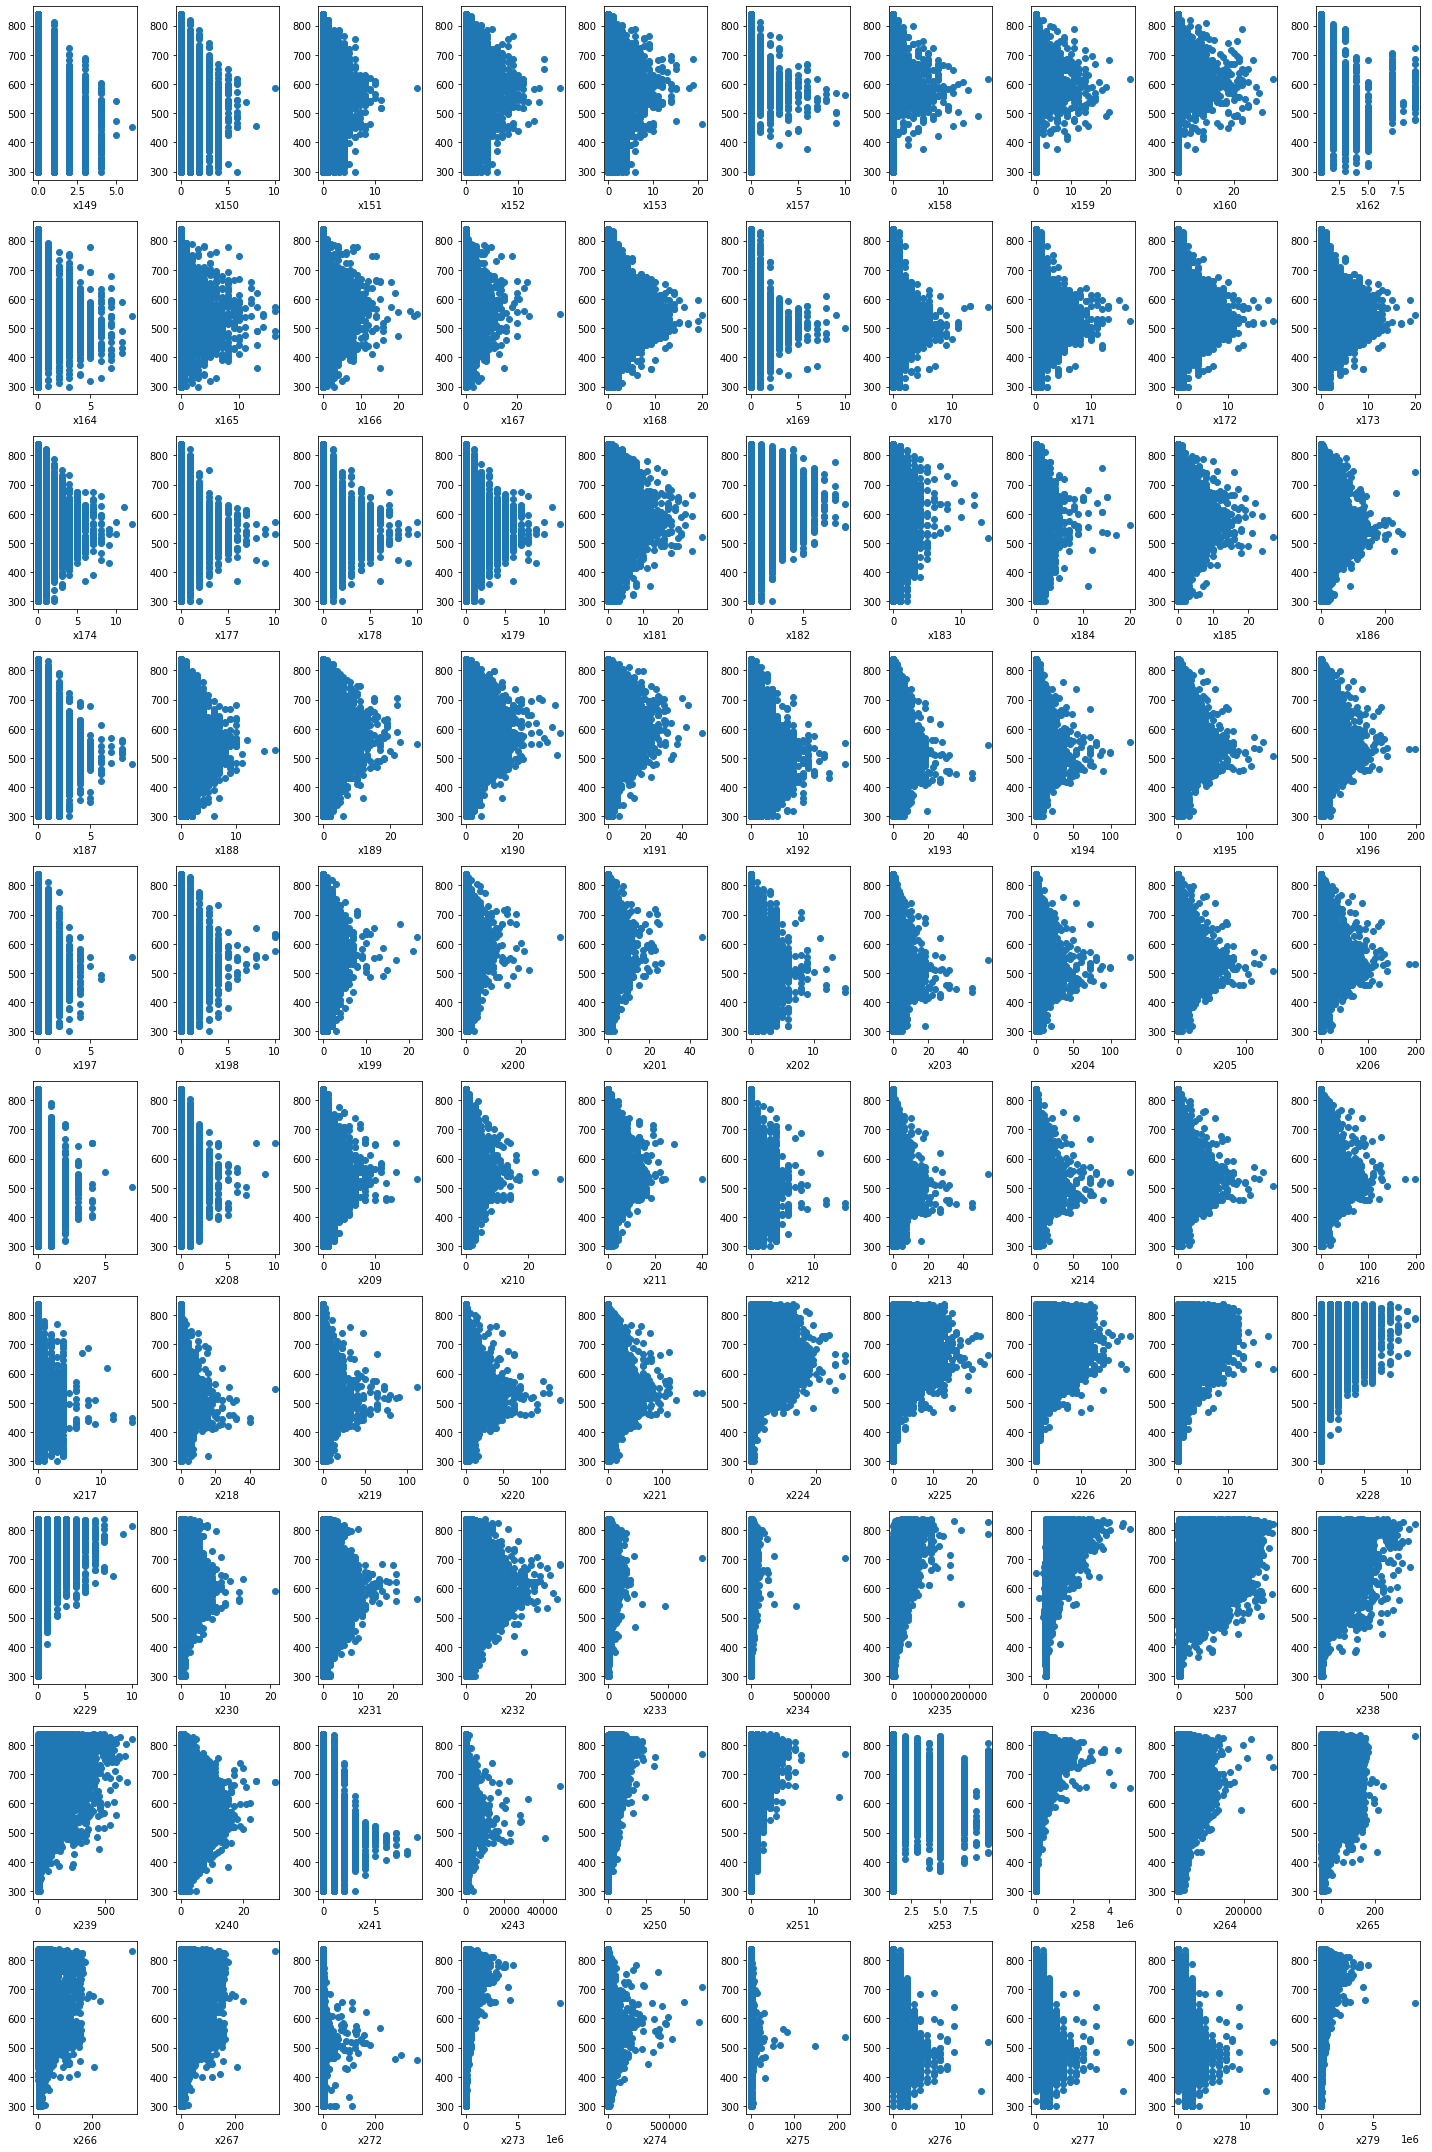

In [8]:
col = df.columns
plt.figure(figsize=(20,30))
for i in range (1, 101):
    ax=plt.subplot(10, 10, i)
    plt.scatter(df[col[i+100]],df['y'])
    ax.set_xlabel(col[i+100])
plt.tight_layout()

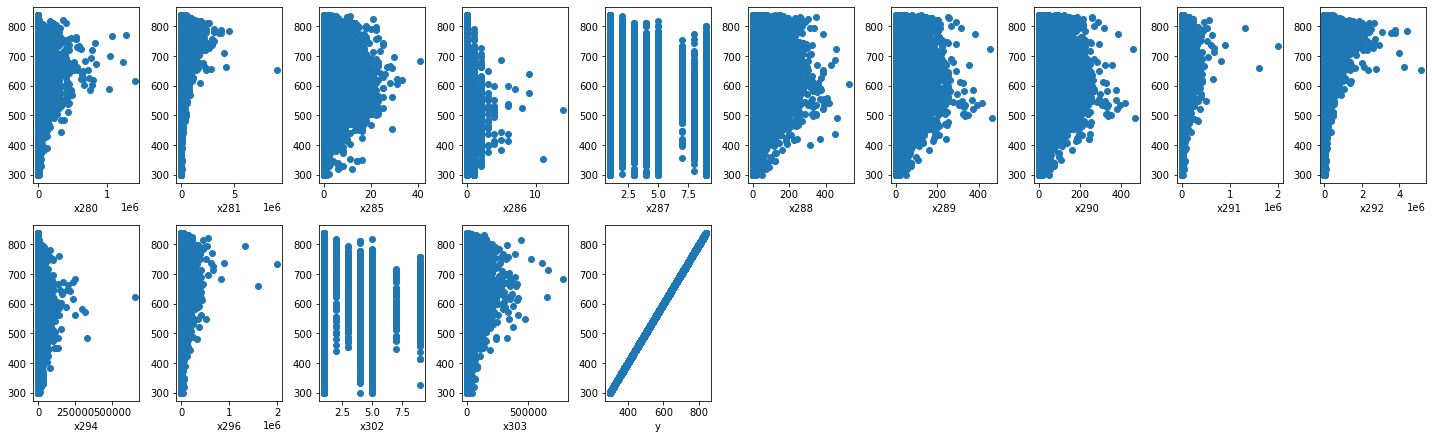

In [9]:
col = df.columns
plt.figure(figsize=(20,30))
for i in range (1, 16):
    ax=plt.subplot(10, 10, i)
    plt.scatter(df[col[i+200]],df['y'])
    ax.set_xlabel(col[i+200])
plt.tight_layout()

### Dataset With outlier

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import pandas as pd

In [49]:
df = pd.read_csv('train_clean_withOutl.csv')

In [50]:
df_copy = df.copy()
X = df_copy.drop('y',axis=1)
y = df_copy.pop('y')

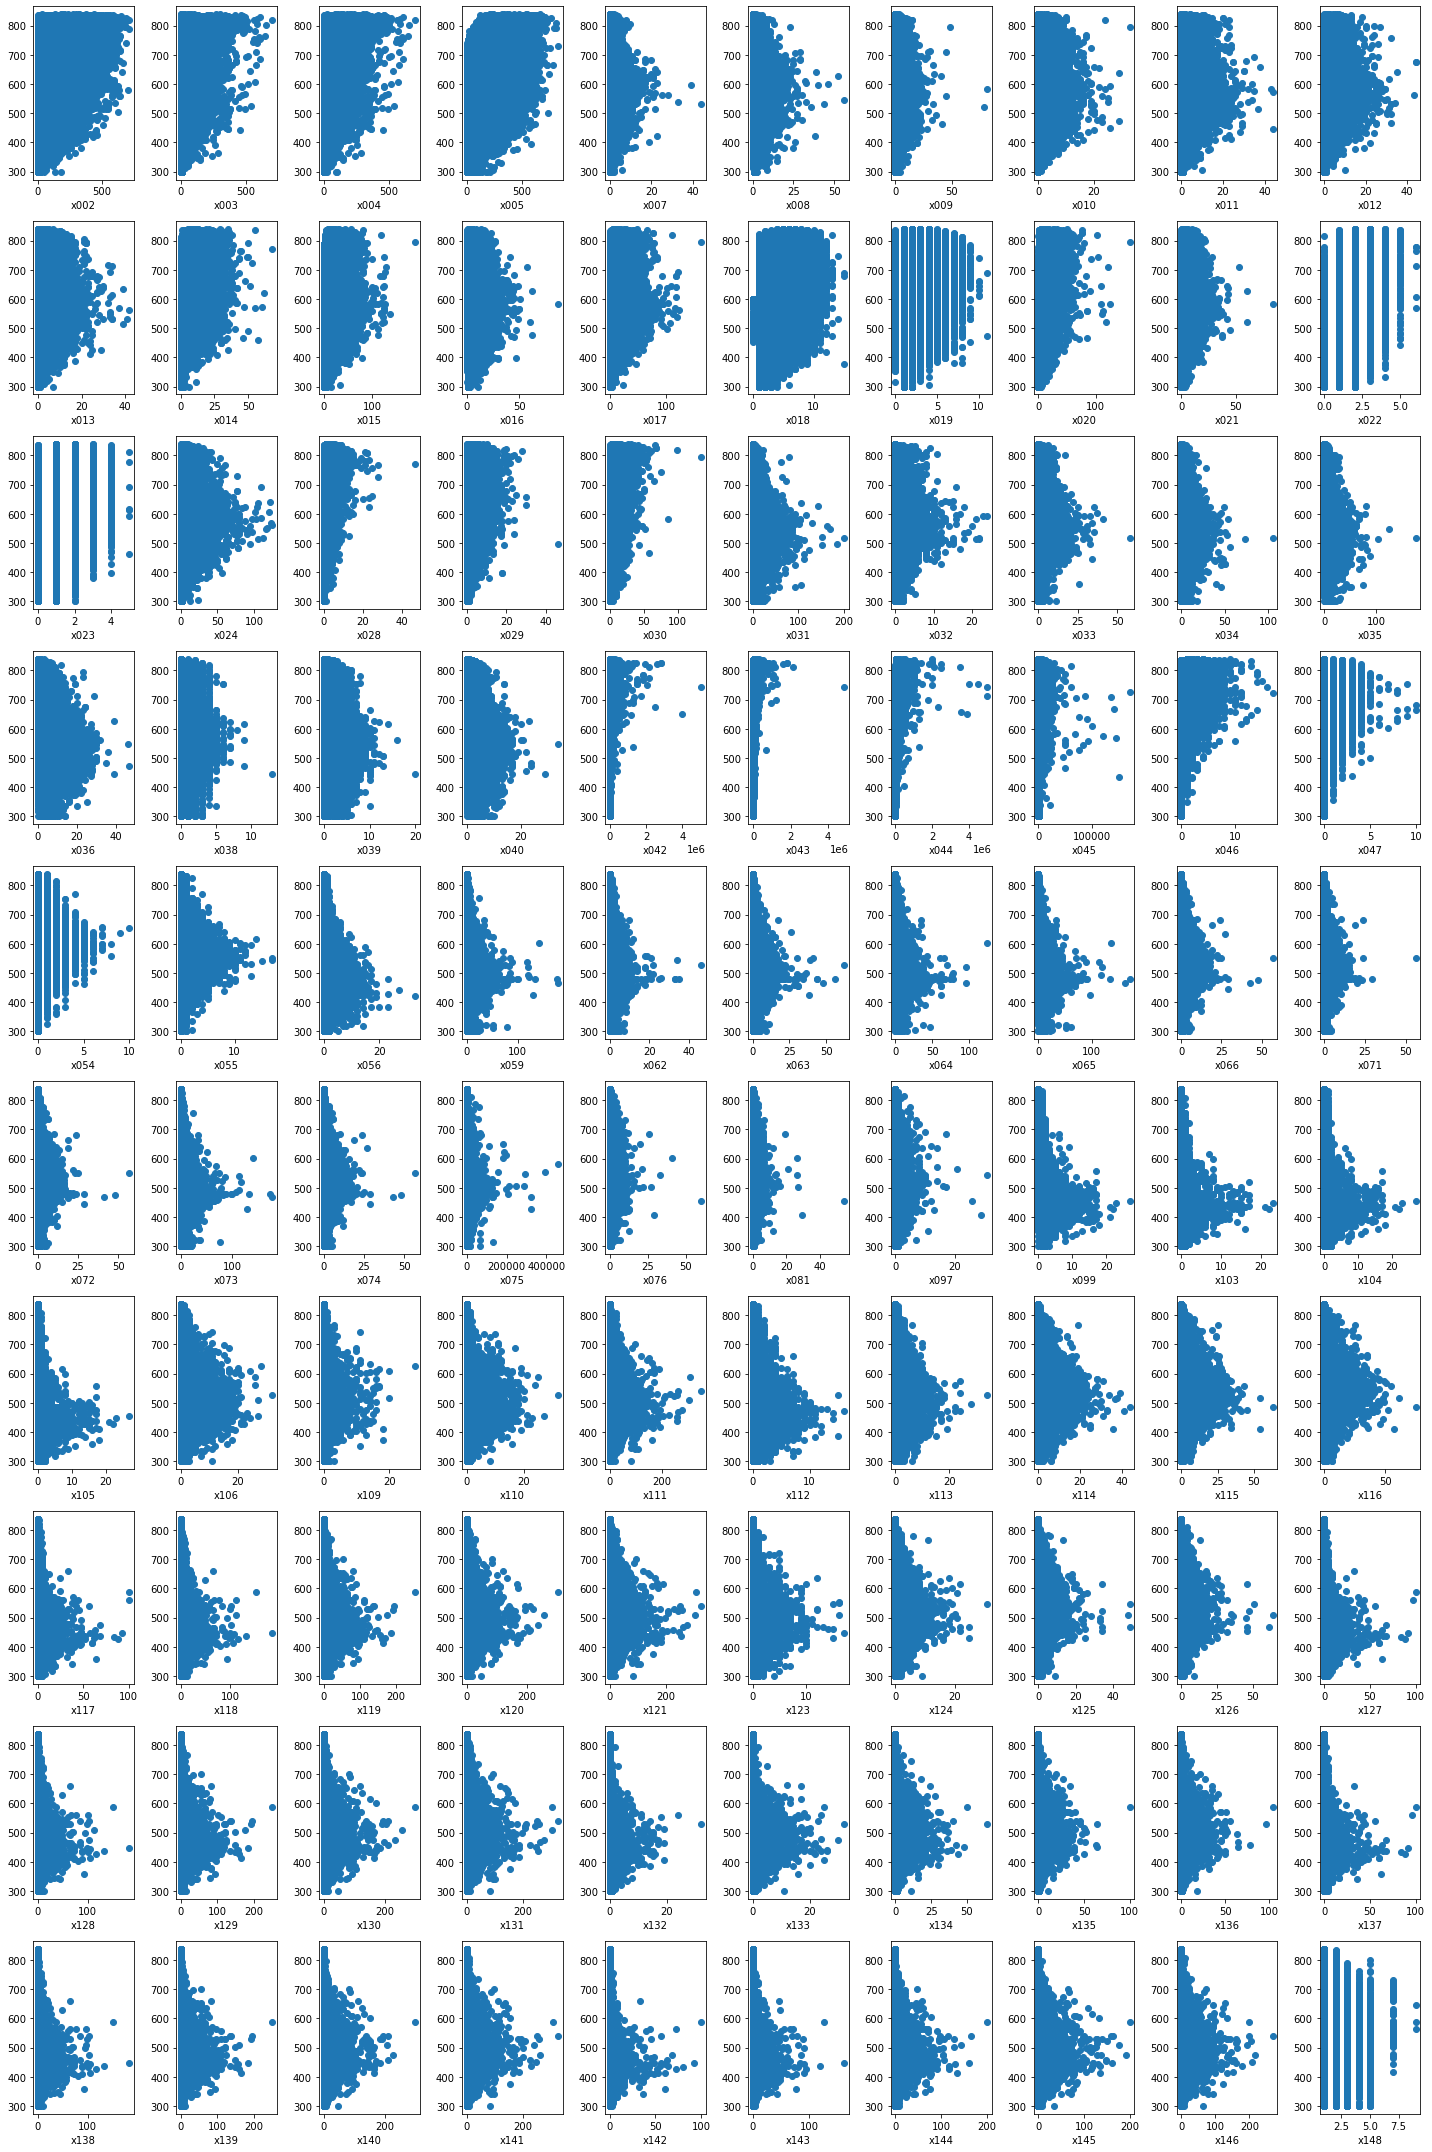

In [36]:
col = df.columns
plt.figure(figsize=(20,30))
for i in range (1, 101):
    ax=plt.subplot(10, 10, i)
    plt.scatter(df[col[i]],df['y'])
    ax.set_xlabel(col[i])
plt.tight_layout()

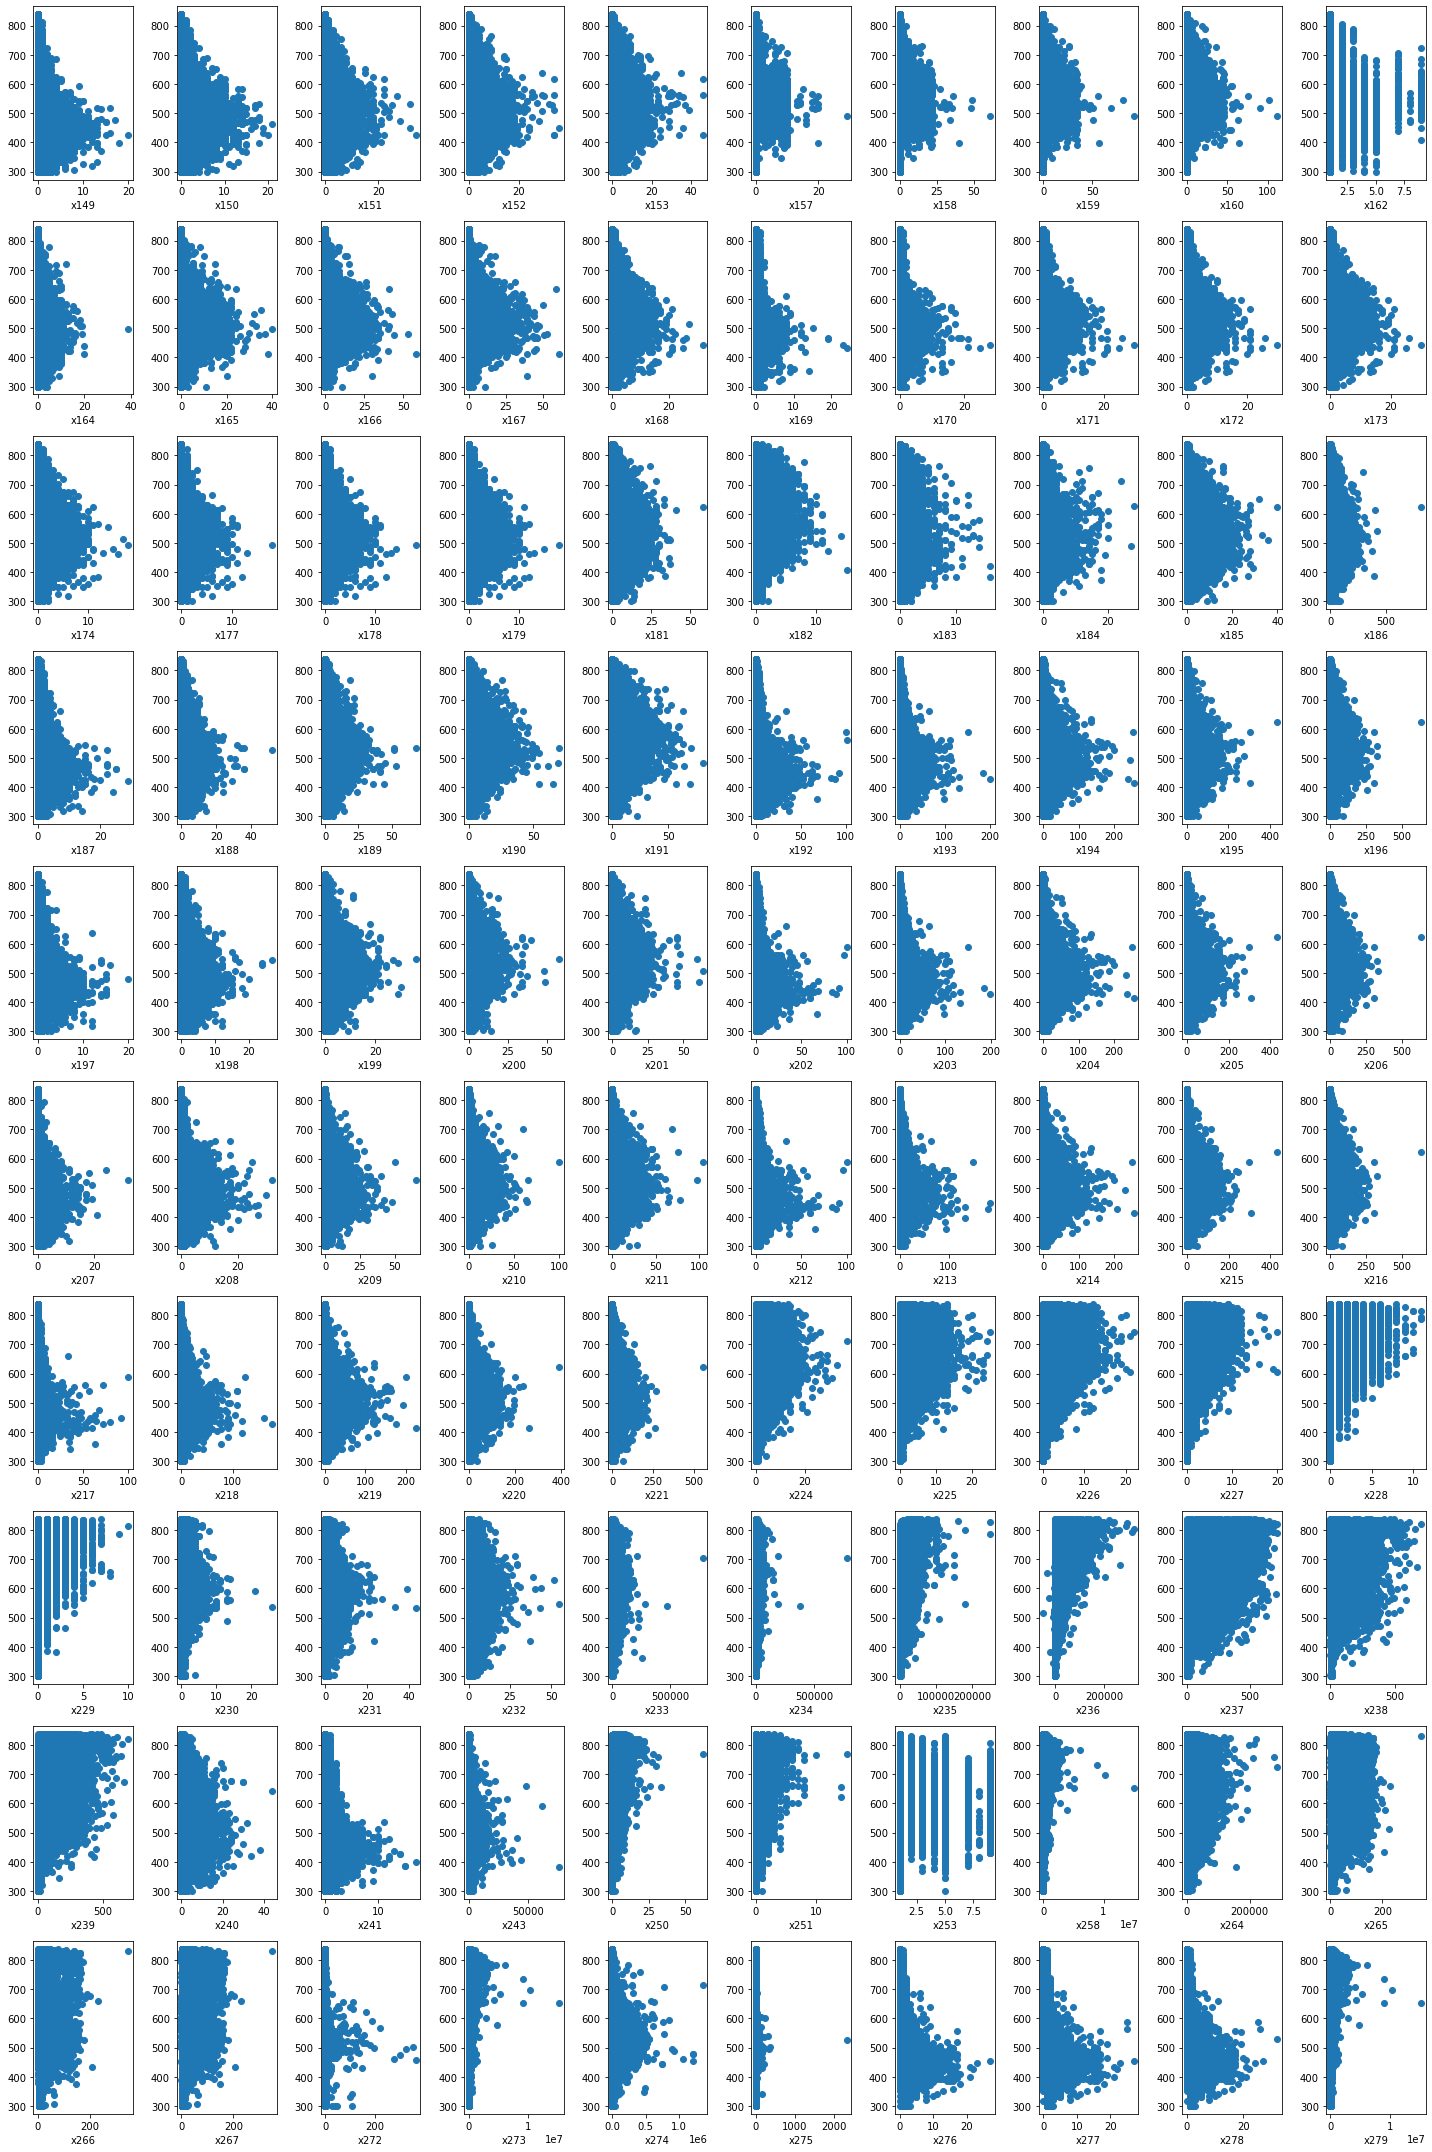

In [38]:
col = df.columns
plt.figure(figsize=(20,30))
for i in range (1, 101):
    ax=plt.subplot(10, 10, i)
    plt.scatter(df[col[i+100]],df['y'])
    ax.set_xlabel(col[i+100])
plt.tight_layout()

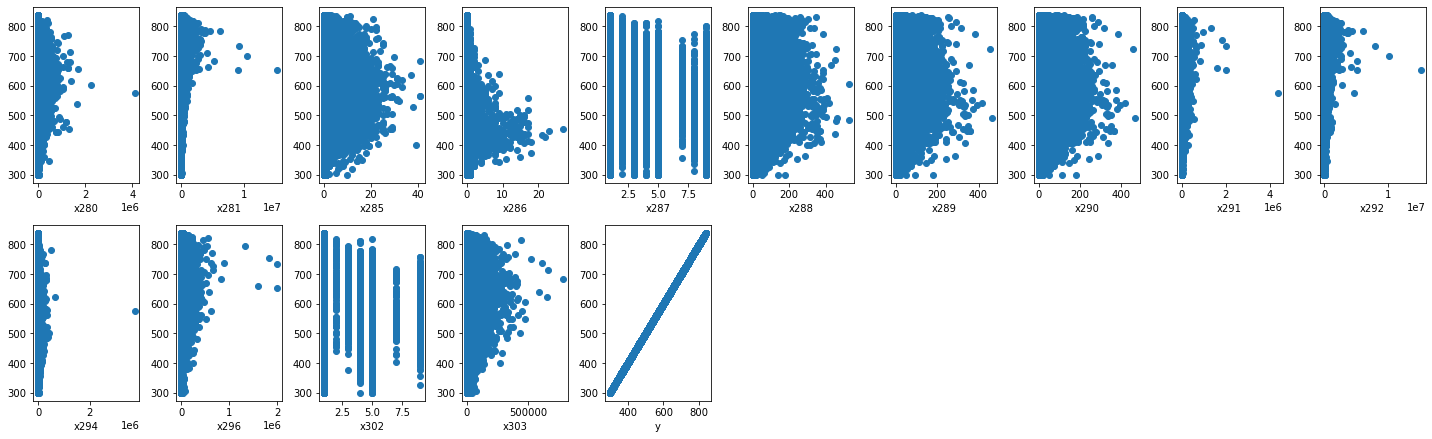

In [40]:
col = df.columns
plt.figure(figsize=(20,30))
for i in range (1, 16):
    ax=plt.subplot(10, 10, i)
    plt.scatter(df[col[i+200]],df['y'])
    ax.set_xlabel(col[i+200])
plt.tight_layout()

## Feature Selection - KBest

### Dataset with ISO outlier treatment

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import pandas as pd

In [2]:
df = pd.read_csv('train_clean_iso.csv')

In [3]:
df_copy = df.copy()
X = df_copy.drop('y',axis=1)
y = df_copy.pop('y')

>50 -52.080 (0.114)
>100 -44.593 (0.072)
>150 -43.561 (0.109)
>200 -43.353 (0.107)
>215 -43.353 (0.107)


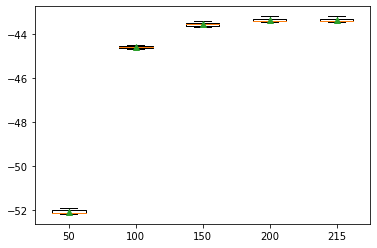

In [34]:
num_features = [50,100,150,200,215]
# enumerate each number of features
results = list()
for k in num_features:
	# create pipeline
	model = LinearRegression()
	fs = SelectKBest(score_func=mutual_info_regression, k=k)
	pipeline = Pipeline(steps=[('sel',fs), ('lr', model)])
	# evaluate the model
	cv = KFold(n_splits=3, shuffle=True,random_state=1)
	scores = cross_val_score(pipeline, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
	results.append(scores)
	# summarize the results
	print('>%d %.3f (%.3f)' % (k, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=num_features, showmeans=True)
plt.show()

>60 -56.922 (0.349)
>70 -54.418 (0.417)
>80 -53.666 (0.358)
>90 -51.735 (0.293)


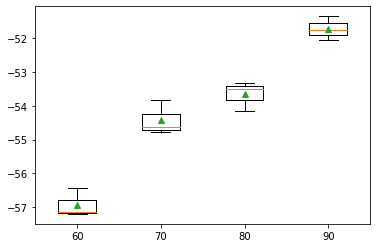

In [52]:
num_features = [60,70,80,90]
# enumerate each number of features
results = list()
for k in num_features:
	# create pipeline
	model = LinearRegression()
	fs = SelectKBest(score_func=mutual_info_regression, k=k)
	pipeline = Pipeline(steps=[('sel',fs), ('lr', model)])
	# evaluate the model
	cv = KFold(n_splits=3, shuffle=True,random_state=1)
	scores = cross_val_score(pipeline, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
	results.append(scores)
	# summarize the results
	print('>%d %.3f (%.3f)' % (k, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=num_features, showmeans=True)
plt.show()

In [53]:
# configure to select all features
fs = SelectKBest(score_func=mutual_info_regression, k=100)
# learn relationship from training data
fs.fit(X, y)
# transform train input data
Xtrans = fs.transform(X)

In [54]:
comb = zip(list(df.columns),list(fs.get_support()))
cols = [x for x,y in comb if y]
cols.append('y')
cols

['x002',
 'x003',
 'x004',
 'x005',
 'x008',
 'x011',
 'x012',
 'x013',
 'x014',
 'x015',
 'x016',
 'x017',
 'x018',
 'x019',
 'x020',
 'x021',
 'x022',
 'x023',
 'x024',
 'x028',
 'x029',
 'x030',
 'x031',
 'x035',
 'x036',
 'x040',
 'x042',
 'x043',
 'x044',
 'x045',
 'x046',
 'x047',
 'x055',
 'x056',
 'x059',
 'x062',
 'x063',
 'x064',
 'x065',
 'x066',
 'x072',
 'x073',
 'x075',
 'x099',
 'x118',
 'x119',
 'x120',
 'x168',
 'x170',
 'x171',
 'x172',
 'x173',
 'x174',
 'x179',
 'x181',
 'x185',
 'x186',
 'x192',
 'x193',
 'x194',
 'x195',
 'x196',
 'x205',
 'x206',
 'x224',
 'x225',
 'x226',
 'x227',
 'x228',
 'x229',
 'x232',
 'x233',
 'x234',
 'x235',
 'x236',
 'x237',
 'x238',
 'x239',
 'x240',
 'x250',
 'x251',
 'x258',
 'x272',
 'x273',
 'x274',
 'x275',
 'x276',
 'x277',
 'x278',
 'x279',
 'x280',
 'x281',
 'x285',
 'x287',
 'x288',
 'x289',
 'x290',
 'x291',
 'x292',
 'x296',
 'y']

In [55]:
df_concat  = pd.concat([pd.DataFrame(Xtrans),pd.DataFrame(y)],axis=1)
df_concat.columns = cols
df = df_concat.copy()
df.head()

x002  x003  x004   x005  x008  x011  x012  x013  x014  x015  ...     x281  \
0  71.0  20.0  50.0  347.0   0.0   1.0   2.0   0.0   2.0   6.0  ...   9372.0   
1   4.0   2.0   4.0  115.0   0.0   0.0   0.0   0.0   2.0   2.0  ...      0.0   
2  33.0   5.0  16.0   41.0   2.0   1.0   0.0   0.0   0.0   9.0  ...  42641.0   
3   4.0   2.0   4.0   35.0   0.0   0.0   0.0   0.0   0.0   2.0  ...      0.0   
4   5.0   5.0   5.0   32.0   1.0   0.0   0.0   0.0   0.0   3.0  ...   3861.0   

   x285  x287  x288  x289  x290     x291     x292     x296      y  
0   1.0   1.0  59.0  59.0  59.0   8256.0   8256.0   8256.0  700.0  
1   0.0   9.0   3.0   2.0   3.0      0.0      0.0      0.0  505.0  
2   2.0   1.0  22.0   5.0  13.5  41971.0  41971.0  41971.0  755.0  
3   0.0   1.0   3.0   2.0   3.0      0.0      0.0      0.0  488.0  
4   1.0   1.0   5.0   5.0   5.0   3861.0   3861.0   3861.0  541.0  

[5 rows x 101 columns]

In [56]:
df.to_csv('train_fsel_iso.csv',index=False)

In [60]:
## save the train dataset proprocessed reviews to a file
import pickle
with open('train_fsel_cols_iso.pkl', 'wb') as f:
    pickle.dump(list(df.columns), f)

### Dataset with (10,90) percentile outlier handling

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import pandas as pd

In [62]:
df = pd.read_csv('train_clean.csv')

In [63]:
df_copy = df.copy()
X = df_copy.drop('y',axis=1)
y = df_copy.pop('y')

>50 -52.080 (0.114)
>100 -44.593 (0.072)
>150 -43.561 (0.109)
>200 -43.353 (0.107)
>215 -43.353 (0.107)


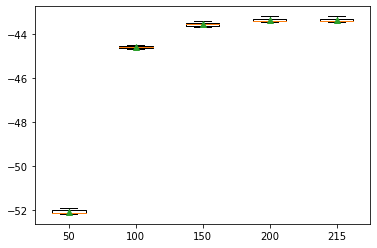

In [34]:
num_features = [50,100,150,200,215]
# enumerate each number of features
results = list()
for k in num_features:
	# create pipeline
	model = LinearRegression()
	fs = SelectKBest(score_func=mutual_info_regression, k=k)
	pipeline = Pipeline(steps=[('sel',fs), ('lr', model)])
	# evaluate the model
	cv = KFold(n_splits=3, shuffle=True,random_state=1)
	scores = cross_val_score(pipeline, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
	results.append(scores)
	# summarize the results
	print('>%d %.3f (%.3f)' % (k, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=num_features, showmeans=True)
plt.show()

>60 -56.922 (0.349)
>70 -54.418 (0.417)
>80 -53.666 (0.358)
>90 -51.735 (0.293)


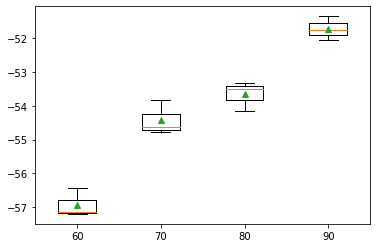

In [52]:
num_features = [60,70,80,90]
# enumerate each number of features
results = list()
for k in num_features:
	# create pipeline
	model = LinearRegression()
	fs = SelectKBest(score_func=mutual_info_regression, k=k)
	pipeline = Pipeline(steps=[('sel',fs), ('lr', model)])
	# evaluate the model
	cv = KFold(n_splits=3, shuffle=True,random_state=1)
	scores = cross_val_score(pipeline, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
	results.append(scores)
	# summarize the results
	print('>%d %.3f (%.3f)' % (k, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=num_features, showmeans=True)
plt.show()

In [64]:
# configure to select all features
fs = SelectKBest(score_func=mutual_info_regression, k=100)
# learn relationship from training data
fs.fit(X, y)
# transform train input data
Xtrans = fs.transform(X)

In [65]:
comb = zip(list(df.columns),list(fs.get_support()))
cols = [x for x,y in comb if y]
cols.append('y')
cols

['x002',
 'x003',
 'x004',
 'x005',
 'x013',
 'x014',
 'x015',
 'x016',
 'x017',
 'x018',
 'x019',
 'x020',
 'x021',
 'x022',
 'x023',
 'x024',
 'x028',
 'x030',
 'x031',
 'x036',
 'x042',
 'x043',
 'x044',
 'x045',
 'x046',
 'x047',
 'x056',
 'x059',
 'x062',
 'x063',
 'x064',
 'x065',
 'x073',
 'x075',
 'x099',
 'x106',
 'x111',
 'x117',
 'x118',
 'x119',
 'x120',
 'x121',
 'x128',
 'x129',
 'x130',
 'x131',
 'x168',
 'x170',
 'x171',
 'x172',
 'x173',
 'x174',
 'x181',
 'x185',
 'x186',
 'x192',
 'x193',
 'x194',
 'x195',
 'x196',
 'x202',
 'x203',
 'x204',
 'x205',
 'x206',
 'x210',
 'x211',
 'x214',
 'x215',
 'x216',
 'x224',
 'x225',
 'x226',
 'x227',
 'x228',
 'x229',
 'x233',
 'x234',
 'x235',
 'x236',
 'x237',
 'x238',
 'x239',
 'x240',
 'x250',
 'x251',
 'x258',
 'x272',
 'x273',
 'x274',
 'x275',
 'x276',
 'x277',
 'x278',
 'x279',
 'x280',
 'x281',
 'x287',
 'x292',
 'x296',
 'y']

In [66]:
df_concat  = pd.concat([pd.DataFrame(Xtrans),pd.DataFrame(y)],axis=1)
df_concat.columns = cols
df = df_concat.copy()
df.head()

x002  x003   x004   x005  x013  x014  x015  x016  x017  x018  ...  x276  \
0   71.0  20.0   50.0  347.0   0.0   2.0   6.0   3.0   3.0   3.0  ...   0.0   
1    4.0   2.0    4.0  115.0   0.0   2.0   2.0   0.0   2.0   1.0  ...   0.0   
2  124.0  53.0  124.0  128.0   5.0   7.0  21.0   1.0  20.0   4.0  ...   0.0   
3   33.0   5.0   16.0   41.0   0.0   0.0   9.0   4.0   5.0   4.0  ...   0.0   
4    4.0   2.0    4.0   39.0   0.0   0.0   2.0   0.0   2.0   2.0  ...   0.0   

   x277  x278     x279  x280     x281  x287     x292     x296      y  
0   0.0   0.0   9372.0   0.0   9372.0   1.0   8256.0   8256.0  700.0  
1   0.0   0.0      0.0   0.0      0.0   9.0      0.0      0.0  505.0  
2   0.0   0.0      0.0   0.0      0.0   5.0      0.0      0.0  618.0  
3   0.0   0.0  42641.0   0.0  42641.0   1.0  41971.0  34055.0  755.0  
4   0.0   0.0      0.0   0.0      0.0   1.0      0.0      0.0  488.0  

[5 rows x 101 columns]

In [67]:
df.to_csv('train_fsel.csv',index=False)

In [68]:
## save the train dataset proprocessed reviews to a file
import pickle
with open('train_fsel_cols.pkl', 'wb') as f:
    pickle.dump(list(df.columns), f)

### Dataset With outlier

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import pandas as pd

In [49]:
df = pd.read_csv('train_clean_withOutl.csv')

In [50]:
df_copy = df.copy()
X = df_copy.drop('y',axis=1)
y = df_copy.pop('y')

>50 -52.080 (0.114)
>100 -44.593 (0.072)
>150 -43.561 (0.109)
>200 -43.353 (0.107)
>215 -43.353 (0.107)


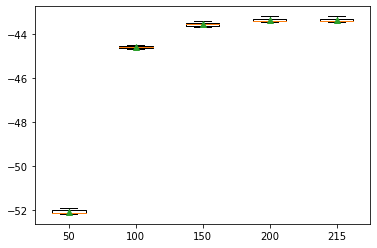

In [34]:
num_features = [50,100,150,200,215]
# enumerate each number of features
results = list()
for k in num_features:
	# create pipeline
	model = LinearRegression()
	fs = SelectKBest(score_func=mutual_info_regression, k=k)
	pipeline = Pipeline(steps=[('sel',fs), ('lr', model)])
	# evaluate the model
	cv = KFold(n_splits=3, shuffle=True,random_state=1)
	scores = cross_val_score(pipeline, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
	results.append(scores)
	# summarize the results
	print('>%d %.3f (%.3f)' % (k, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=num_features, showmeans=True)
plt.show()

>60 -56.922 (0.349)
>70 -54.418 (0.417)
>80 -53.666 (0.358)
>90 -51.735 (0.293)


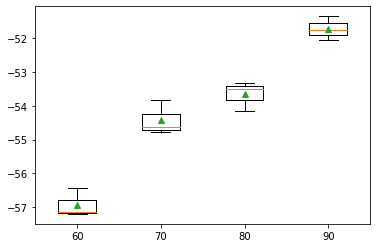

In [52]:
num_features = [60,70,80,90]
# enumerate each number of features
results = list()
for k in num_features:
	# create pipeline
	model = LinearRegression()
	fs = SelectKBest(score_func=mutual_info_regression, k=k)
	pipeline = Pipeline(steps=[('sel',fs), ('lr', model)])
	# evaluate the model
	cv = KFold(n_splits=3, shuffle=True,random_state=1)
	scores = cross_val_score(pipeline, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
	results.append(scores)
	# summarize the results
	print('>%d %.3f (%.3f)' % (k, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=num_features, showmeans=True)
plt.show()

In [53]:
# configure to select all features
fs = SelectKBest(score_func=mutual_info_regression, k=100)
# learn relationship from training data
fs.fit(X, y)
# transform train input data
Xtrans = fs.transform(X)

In [54]:
comb = zip(list(df.columns),list(fs.get_support()))
cols = [x for x,y in comb if y]
cols.append('y')
cols

['x002',
 'x003',
 'x004',
 'x005',
 'x008',
 'x011',
 'x012',
 'x013',
 'x014',
 'x015',
 'x016',
 'x017',
 'x018',
 'x019',
 'x020',
 'x021',
 'x022',
 'x023',
 'x024',
 'x028',
 'x029',
 'x030',
 'x031',
 'x035',
 'x036',
 'x040',
 'x042',
 'x043',
 'x044',
 'x045',
 'x046',
 'x047',
 'x055',
 'x056',
 'x059',
 'x062',
 'x063',
 'x064',
 'x065',
 'x066',
 'x072',
 'x073',
 'x075',
 'x099',
 'x118',
 'x119',
 'x120',
 'x168',
 'x170',
 'x171',
 'x172',
 'x173',
 'x174',
 'x179',
 'x181',
 'x185',
 'x186',
 'x192',
 'x193',
 'x194',
 'x195',
 'x196',
 'x205',
 'x206',
 'x224',
 'x225',
 'x226',
 'x227',
 'x228',
 'x229',
 'x232',
 'x233',
 'x234',
 'x235',
 'x236',
 'x237',
 'x238',
 'x239',
 'x240',
 'x250',
 'x251',
 'x258',
 'x272',
 'x273',
 'x274',
 'x275',
 'x276',
 'x277',
 'x278',
 'x279',
 'x280',
 'x281',
 'x285',
 'x287',
 'x288',
 'x289',
 'x290',
 'x291',
 'x292',
 'x296',
 'y']

In [55]:
df_concat  = pd.concat([pd.DataFrame(Xtrans),pd.DataFrame(y)],axis=1)
df_concat.columns = cols
df = df_concat.copy()
df.head()

x002  x003  x004   x005  x008  x011  x012  x013  x014  x015  ...     x281  \
0  71.0  20.0  50.0  347.0   0.0   1.0   2.0   0.0   2.0   6.0  ...   9372.0   
1   4.0   2.0   4.0  115.0   0.0   0.0   0.0   0.0   2.0   2.0  ...      0.0   
2  33.0   5.0  16.0   41.0   2.0   1.0   0.0   0.0   0.0   9.0  ...  42641.0   
3   4.0   2.0   4.0   35.0   0.0   0.0   0.0   0.0   0.0   2.0  ...      0.0   
4   5.0   5.0   5.0   32.0   1.0   0.0   0.0   0.0   0.0   3.0  ...   3861.0   

   x285  x287  x288  x289  x290     x291     x292     x296      y  
0   1.0   1.0  59.0  59.0  59.0   8256.0   8256.0   8256.0  700.0  
1   0.0   9.0   3.0   2.0   3.0      0.0      0.0      0.0  505.0  
2   2.0   1.0  22.0   5.0  13.5  41971.0  41971.0  41971.0  755.0  
3   0.0   1.0   3.0   2.0   3.0      0.0      0.0      0.0  488.0  
4   1.0   1.0   5.0   5.0   5.0   3861.0   3861.0   3861.0  541.0  

[5 rows x 101 columns]

In [56]:
df.to_csv('train_fsel_withOutl.csv',index=False)

In [60]:
## save the train dataset proprocessed reviews to a file
import pickle
with open('train_fsel_cols_withOutl.pkl', 'wb') as f:
    pickle.dump(list(df.columns), f)

# Model Building

## Lasso Regression Model Building, Validation and Tuning

In [16]:
def regression_metrics(p,y,y_pred,train_test):
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    from math import sqrt
    scores = mean_squared_error(y,y_pred)
    scores = sqrt(scores)
    print(train_test,'RMSE: %.3f'% (scores))
    scores = mean_absolute_error(y,y_pred)
    print(train_test,'MAE: %.3f'% (scores))
    scores = r2_score(y,y_pred)
    print(train_test,'R2: %.3f'% (scores))
    adj_rsquared = 1 - (1-r2_score(y, y_pred)) * (len(y)-1)/(len(y)-p-1)
    print(train_test, "Adjusted-R2 : " , adj_rsquared)
    print(train_test,'accuracy: %.3f'% (sum(abs(y-y_pred)<=3)/len(y)*100))

## Most frequent, ISO, Kbest(100)

In [17]:
import pandas as pd
from sklearn.linear_model import Lasso
from numpy import absolute
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from sklearn.linear_model import Lasso
from numpy import absolute
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from numpy import arange
from sklearn.preprocessing import QuantileTransformer
from sklearn.pipeline import Pipeline

In [18]:
df = pd.read_csv('train_fsel_iso.csv')

In [19]:
df_copy = df.copy()
X = df_copy.drop('y',axis=1)
y = df_copy.pop('y')

In [20]:
trans = QuantileTransformer(n_quantiles=100, output_distribution='normal')
Xtrans = trans.fit_transform(X)

In [21]:
import pickle
with open('train_fsel_iso_qtransX.pkl', 'wb') as f:
    pickle.dump(trans, f)

In [22]:
# define model
base_model = Lasso(alpha=0.001)
base_model.fit(Xtrans,y)
y_pred = base_model.predict(Xtrans)
regression_metrics(Xtrans.shape[1],y,y_pred,'Train') 

Train RMSE: 39.556
Train MAE: 30.663
Train R2: 0.886
Train Adjusted-R2 :  0.885342440674276
Train accuracy: 6.696


C:\Users\Sriram\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50259748.415125795, tolerance: 92250.25752962964
  model = cd_fast.enet_coordinate_descent(


In [23]:
# define the pipeline
trans = QuantileTransformer(n_quantiles=100, output_distribution='normal')
cv_model = Lasso(alpha=.001)
pipeline = Pipeline(steps=[('t', trans), ('m', cv_model)])
# define model evaluation method
cv = KFold(n_splits=3,shuffle=True,random_state=1)
# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Test RMSE: %.3f (%.3f)' % (mean(scores), std(scores)))

Test RMSE: 39.636 (0.019)


In [24]:
best_model = base_model
y_pred = best_model.predict(Xtrans)
regression_metrics(Xtrans.shape[1],y,y_pred,'Train') 

Train RMSE: 39.556
Train MAE: 30.663
Train R2: 0.886
Train Adjusted-R2 :  0.885342440674276
Train accuracy: 6.696


In [25]:
import pickle
with open('lasso_model_1.pkl', 'wb') as f:
    pickle.dump(best_model, f)

## Most frequent, WithOutl, Kbest(100)

In [26]:
import pandas as pd
from sklearn.linear_model import Lasso
from numpy import absolute
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import Lasso
from numpy import absolute
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from numpy import arange
from sklearn.preprocessing import QuantileTransformer
from sklearn.pipeline import Pipeline

In [27]:
df = pd.read_csv('train_fsel_withOutl.csv')

In [28]:
df_copy = df.copy()
X = df_copy.drop('y',axis=1)
y = df_copy.pop('y')

In [29]:
trans = QuantileTransformer(n_quantiles=100, output_distribution='normal')
Xtrans = trans.fit_transform(X)

In [30]:
import pickle
with open('train_fsel_withOutl_qtransX.pkl', 'wb') as f:
    pickle.dump(trans, f)

In [31]:
# define model
base_model = Lasso(alpha=0.01)
base_model.fit(Xtrans,y)
y_pred = base_model.predict(Xtrans)
regression_metrics(Xtrans.shape[1],y,y_pred,'Train') 

Train RMSE: 41.975
Train MAE: 32.742
Train R2: 0.874
Train Adjusted-R2 :  0.8740830057572978
Train accuracy: 6.340


C:\Users\Sriram\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39935931.14334509, tolerance: 105086.4866325
  model = cd_fast.enet_coordinate_descent(


In [32]:
# define the pipeline
trans = QuantileTransformer(n_quantiles=100, output_distribution='normal')
cv_model = Lasso(alpha=0.01)
pipeline = Pipeline(steps=[('t', trans), ('m', cv_model)])
# define model evaluation method
cv = KFold(n_splits=3,shuffle=True,random_state=1)
# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Test RMSE: %.3f (%.3f)' % (mean(scores), std(scores)))

Test RMSE: 42.043 (0.346)


In [33]:
best_model = base_model
y_pred = best_model.predict(Xtrans)
regression_metrics(Xtrans.shape[1],y,y_pred,'Train') 

Train RMSE: 41.975
Train MAE: 32.742
Train R2: 0.874
Train Adjusted-R2 :  0.8740830057572978
Train accuracy: 6.340


In [34]:
## save the train dataset proprocessed reviews to a file
import pickle
with open('lasso_model_2.pkl', 'wb') as f:
    pickle.dump(best_model, f)

## Most frequent, (10,90) outlier, Kbest(100)

In [69]:
import pandas as pd
from sklearn.linear_model import Lasso
from numpy import absolute
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import Lasso
from numpy import absolute
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from numpy import arange
from sklearn.preprocessing import QuantileTransformer
from sklearn.pipeline import Pipeline

In [70]:
df = pd.read_csv('train_fsel.csv')

In [71]:
df_copy = df.copy()
X = df_copy.drop('y',axis=1)
y = df_copy.pop('y')

In [72]:
trans = QuantileTransformer(n_quantiles=100, output_distribution='normal')
Xtrans = trans.fit_transform(X)

In [73]:
import pickle
with open('train_fsel_qtransX1.pkl', 'wb') as f:
    pickle.dump(trans, f)

In [39]:
# define model
base_model = Lasso(alpha=0.01)
base_model.fit(Xtrans,y)
y_pred = base_model.predict(Xtrans)
regression_metrics(Xtrans.shape[1],y,y_pred,'Train') 

Train RMSE: 42.817
Train MAE: 33.610
Train R2: 0.869
Train Adjusted-R2 :  0.8689837326200615
Train accuracy: 5.684


C:\Users\Sriram\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22413555.99575062, tolerance: 105086.4866325
  model = cd_fast.enet_coordinate_descent(


In [40]:
# define the pipeline
trans = QuantileTransformer(n_quantiles=100, output_distribution='normal')
cv_model = Lasso(alpha=0.01)
pipeline = Pipeline(steps=[('t', trans), ('m', cv_model)])
# define model evaluation method
cv = KFold(n_splits=3,shuffle=True,random_state=1)
# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Test RMSE: %.3f (%.3f)' % (mean(scores), std(scores)))

Test RMSE: 42.891 (0.270)


In [41]:
best_model = base_model
y_pred = best_model.predict(Xtrans)
regression_metrics(Xtrans.shape[1],y,y_pred,'Train') 

Train RMSE: 42.817
Train MAE: 33.610
Train R2: 0.869
Train Adjusted-R2 :  0.8689837326200615
Train accuracy: 5.684


In [42]:
## save the train dataset proprocessed reviews to a file
import pickle
with open('lasso_model_3.pkl', 'wb') as f:
    pickle.dump(best_model, f)

## Most frequent, ISO,  All features

In [43]:
import pandas as pd
from sklearn.linear_model import Lasso
from numpy import absolute
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from math import sqrt
from sklearn.linear_model import Lasso
from numpy import absolute
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from numpy import arange
from sklearn.preprocessing import QuantileTransformer, PowerTransformer, RobustScaler
from sklearn.pipeline import Pipeline

In [44]:
df = pd.read_csv('train_clean_iso.csv')

In [45]:
df_copy = df.copy()
X = df_copy.drop('y',axis=1)
y = df_copy.pop('y')

In [46]:
trans = QuantileTransformer(n_quantiles=100, output_distribution='normal')
Xtrans = trans.fit_transform(X)

In [47]:
import pickle
with open('train_clean_iso_qtransX.pkl', 'wb') as f:
    pickle.dump(trans, f)

In [48]:
# define model
base_model = Lasso(alpha=0.01)
base_model.fit(Xtrans,y)
y_pred = base_model.predict(Xtrans)
regression_metrics(Xtrans.shape[1],y,y_pred,'Train') 

Train RMSE: 38.092
Train MAE: 29.413
Train R2: 0.894
Train Adjusted-R2 :  0.8934926617484075
Train accuracy: 7.181


C:\Users\Sriram\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29189138.0902688, tolerance: 92250.25752962964
  model = cd_fast.enet_coordinate_descent(


In [49]:
# define the pipeline
trans = QuantileTransformer(n_quantiles=100, output_distribution='normal')
cv_model = Lasso(alpha=.01)
pipeline = Pipeline(steps=[('t', trans), ('m', cv_model)])
# define model evaluation method
cv = KFold(n_splits=3,shuffle=True,random_state=1)
# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Test RMSE: %.3f (%.3f)' % (mean(scores), std(scores)))

Test RMSE: 38.247 (0.104)


In [50]:
best_model = base_model
y_pred = best_model.predict(Xtrans)
regression_metrics(Xtrans.shape[1],y,y_pred,'Train') 

Train RMSE: 38.092
Train MAE: 29.413
Train R2: 0.894
Train Adjusted-R2 :  0.8934926617484075
Train accuracy: 7.181


In [51]:
## save the train dataset proprocessed reviews to a file
import pickle
with open('lasso_model_7.pkl', 'wb') as f:
    pickle.dump(best_model, f)

## Most frequent, WithOutl,  All features

In [52]:
import pandas as pd
from sklearn.linear_model import Lasso
from numpy import absolute
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import Lasso
from numpy import absolute
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from numpy import arange
from sklearn.preprocessing import QuantileTransformer
from sklearn.pipeline import Pipeline

In [53]:
df = pd.read_csv('train_clean_withOutl.csv')

In [54]:
df_copy = df.copy()
X = df_copy.drop('y',axis=1)
y = df_copy.pop('y')

In [55]:
trans = QuantileTransformer(n_quantiles=100, output_distribution='normal')
Xtrans = trans.fit_transform(X)

In [56]:
import pickle
with open('train_clean_withOutl_qtransX.pkl', 'wb') as f:
    pickle.dump(trans, f)

In [57]:
# define model
base_model = Lasso(alpha=0.01)
base_model.fit(Xtrans,y)
y_pred = base_model.predict(Xtrans)
regression_metrics(Xtrans.shape[1],y,y_pred,'Train') 

Train RMSE: 38.723
Train MAE: 29.990
Train R2: 0.893
Train Adjusted-R2 :  0.8926763274187905
Train accuracy: 7.027


C:\Users\Sriram\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28995143.520371486, tolerance: 105086.4866325
  model = cd_fast.enet_coordinate_descent(


In [58]:
# define the pipeline
trans = QuantileTransformer(n_quantiles=100, output_distribution='normal')
cv_model = Lasso(alpha=0.01)
pipeline = Pipeline(steps=[('t', trans), ('m', cv_model)])
# define model evaluation method
cv = KFold(n_splits=3,shuffle=True,random_state=1)
# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Test RMSE: %.3f (%.3f)' % (mean(scores), std(scores)))

Test RMSE: 38.871 (0.302)


In [59]:
best_model = base_model
y_pred = best_model.predict(Xtrans)
regression_metrics(Xtrans.shape[1],y,y_pred,'Train') 

Train RMSE: 38.723
Train MAE: 29.990
Train R2: 0.893
Train Adjusted-R2 :  0.8926763274187905
Train accuracy: 7.027


In [60]:
## save the train dataset proprocessed reviews to a file
import pickle
with open('lasso_model_12.pkl', 'wb') as f:
    pickle.dump(best_model, f)

## Most frequent, (10,90) percentile outlier handling,  All features

In [74]:
import pandas as pd
from sklearn.linear_model import Lasso
from numpy import absolute
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import Lasso
from numpy import absolute
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from numpy import arange
from sklearn.preprocessing import QuantileTransformer
from sklearn.pipeline import Pipeline

In [75]:
df = pd.read_csv('train_clean.csv')

In [76]:
df_copy = df.copy()
X = df_copy.drop('y',axis=1)
y = df_copy.pop('y')

In [77]:
trans = QuantileTransformer(n_quantiles=100, output_distribution='normal')
Xtrans = trans.fit_transform(X)

In [78]:
import pickle
with open('train_clean_qtransX1.pkl', 'wb') as f:
    pickle.dump(trans, f)

In [65]:
# define model
base_model = Lasso(alpha=0.01)
base_model.fit(Xtrans,y)
y_pred = base_model.predict(Xtrans)
regression_metrics(Xtrans.shape[1],y,y_pred,'Train') 

Train RMSE: 40.357
Train MAE: 31.561
Train R2: 0.884
Train Adjusted-R2 :  0.8834255500863484
Train accuracy: 5.972


C:\Users\Sriram\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19933914.773526654, tolerance: 105086.4866325
  model = cd_fast.enet_coordinate_descent(


In [66]:
# define the pipeline
trans = QuantileTransformer(n_quantiles=100, output_distribution='normal')
cv_model = Lasso(alpha=0.01)
pipeline = Pipeline(steps=[('t', trans), ('m', cv_model)])
# define model evaluation method
cv = KFold(n_splits=3,shuffle=True,random_state=1)
# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Test RMSE: %.3f (%.3f)' % (mean(scores), std(scores)))

Test RMSE: 40.492 (0.224)


In [67]:
best_model = base_model
y_pred = best_model.predict(Xtrans)
regression_metrics(Xtrans.shape[1],y,y_pred,'Train') 

Train RMSE: 40.357
Train MAE: 31.561
Train R2: 0.884
Train Adjusted-R2 :  0.8834255500863484
Train accuracy: 5.972


In [68]:
## save the train dataset proprocessed reviews to a file
import pickle
with open('lasso_model_13.pkl', 'wb') as f:
    pickle.dump(best_model, f)

##  Random Forest Model building, Validation and Tuning

In [1]:
def regression_metrics(p,y,y_pred,train_test):
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    from math import sqrt
    scores = mean_squared_error(y,y_pred)
    scores = sqrt(scores)
    print(train_test,'RMSE: %.3f'% (scores))
    scores = mean_absolute_error(y,y_pred)
    print(train_test,'MAE: %.3f'% (scores))
    scores = r2_score(y,y_pred)
    print(train_test,'R2: %.3f'% (scores))
    adj_rsquared = 1 - (1-r2_score(y, y_pred)) * (len(y)-1)/(len(y)-p-1)
    print(train_test, "Adjusted-R2 : " , adj_rsquared)
    print(train_test,'accuracy: %.3f'% (sum(abs(y-y_pred)<=3)/len(y)*100))

### Most frequent Imputation, With Outliers, KBest(100)

In [6]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from numpy import absolute
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from sklearn.linear_model import Lasso
from numpy import absolute
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from numpy import arange

In [16]:
df = pd.read_csv('train_fsel_withOutl.csv')

In [17]:
df_copy = df.copy()
X = df_copy.drop('y',axis=1)
y = df_copy.pop('y')

In [25]:
# define model
base_model = RandomForestRegressor()
base_model.fit(X,y)
y_pred = base_model.predict(X)
scores = mean_squared_error(y,y_pred)
scores = sqrt(scores)
print('Train RMSE: %.3f'% (scores))

Train RMSE: 11.665


In [26]:
# define model
cv_model = RandomForestRegressor()
# define model evaluation method
cv = KFold(n_splits=3,shuffle=True,random_state=1)
# evaluate model
scores = cross_val_score(cv_model, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Test RMSE: %.3f (%.3f)' % (mean(scores), std(scores)))

Test RMSE: 31.605 (0.171)


In [27]:
cv_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [28]:
# define model
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold

hyp_model = RandomForestRegressor()
# define model evaluation method
cv = KFold(n_splits=3, shuffle=True,random_state=1)
# define grid
grid = dict()
## Experiment 4
'''grid = {
  'max_samples' : arange(0.1, 0.6, 0.1),
  'max_depth' : arange(2,20,2),
  'max_features' : ['auto','sqrt','log2'],
  'n_estimators' : [100,200]
 } '''

## Experiment 5,11,15,19
'''grid = {
  'max_samples' : arange(0.1, 0.6, 0.1),
  'max_depth' : arange(2,20,2),
  'max_features' : ['auto','sqrt','log2'],
  'n_estimators' : arange(100,500,100)
 }'''
  

## Experiment 24
grid = {
  'max_samples' : arange(0.1, 0.6, 0.1),
  'max_depth' : arange(2,20,2),
  'max_features' : ['auto','sqrt','log2'],
  'n_estimators' : arange(100,500,100)
 }
  

# define search
search = RandomizedSearchCV(hyp_model, grid, n_iter=10, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('Test RMSE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)
hyp_model = results.best_estimator_
hyp_model.fit(X,y)
y_pred = hyp_model.predict(X)
scores = mean_squared_error(y,y_pred)
scores = sqrt(scores)
print('Train RMSE: %.3f'% (scores))

Test RMSE: -33.334
Config: {'n_estimators': 400, 'max_samples': 0.2, 'max_features': 'auto', 'max_depth': 12}
Train RMSE: 29.435


In [33]:
## save the train dataset proprocessed reviews to a file
best_model = hyp_model
import pickle
with open('rf_model_24.pkl', 'wb') as f:
    pickle.dump(best_model, f)

In [18]:
import pickle
with open('rf_model_24.pkl', 'rb') as f:
    best_model = pickle.load(f)

In [19]:
y_pred = best_model.predict(X)
regression_metrics(X.shape[1],y,y_pred,'Train') 

Train RMSE: 29.435
Train MAE: 21.761
Train R2: 0.938
Train Adjusted-R2 :  0.938080440316952
Train accuracy: 11.581


### Most frequent Imputation, ISO Outlier treatment, KBest(100)

In [20]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from numpy import absolute
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import Lasso
from numpy import absolute
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from numpy import arange

In [21]:
df = pd.read_csv('train_fsel_iso.csv')

In [22]:
df_copy = df.copy()
X = df_copy.drop('y',axis=1)
y = df_copy.pop('y')

In [37]:
# define model
base_model = RandomForestRegressor()
base_model.fit(X,y)
y_pred = base_model.predict(X)
scores = mean_squared_error(y,y_pred)
scores = sqrt(scores)
print('Train RMSE: %.3f'% (scores))

Train RMSE: 11.265


In [38]:
# define model
cv_model = RandomForestRegressor()
# define model evaluation method
cv = KFold(n_splits=3,shuffle=True,random_state=1)
# evaluate model
scores = cross_val_score(cv_model, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Test RMSE: %.3f (%.3f)' % (mean(scores), std(scores)))

Test RMSE: 30.649 (0.213)


In [39]:
cv_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [40]:
# define model
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold

hyp_model = RandomForestRegressor()
# define model evaluation method
cv = KFold(n_splits=3, shuffle=True,random_state=1)
# define grid
grid = dict()
## Experiment 4
'''grid = {
  'max_samples' : arange(0.1, 0.6, 0.1),
  'max_depth' : arange(2,20,2),
  'max_features' : ['auto','sqrt','log2'],
  'n_estimators' : [100,200]
 } '''

## Experiment 5,11,15,19
grid = {
  'max_samples' : arange(0.1, 0.6, 0.1),
  'max_depth' : arange(2,20,2),
  'max_features' : ['auto','sqrt','log2'],
  'n_estimators' : arange(100,500,100)
 }
  

## Experiment 24
'''grid = {
  'max_samples' : arange(0.1, 0.6, 0.1),
  'max_depth' : arange(2,20,2),
  'max_features' : ['auto','sqrt','log2'],
  'n_estimators' : arange(100,500,100)
 }'''
  

# define search
search = RandomizedSearchCV(hyp_model, grid, n_iter=10, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('Test RMSE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)
hyp_model = results.best_estimator_
hyp_model.fit(X,y)
y_pred = hyp_model.predict(X)
scores = mean_squared_error(y,y_pred)
scores = sqrt(scores)
print('Train RMSE: %.3f'% (scores))

Test RMSE: -31.983
Config: {'n_estimators': 300, 'max_samples': 0.2, 'max_features': 'auto', 'max_depth': 14}
Train RMSE: 26.968


In [33]:
## save the train dataset proprocessed reviews to a file
best_model = hyp_model
import pickle
with open('rf_model_19.pkl', 'wb') as f:
    pickle.dump(best_model, f)

In [23]:
import pickle
with open('rf_model_19.pkl', 'rb') as f:
    best_model = pickle.load(f)

In [25]:
y_pred = best_model.predict(X)
regression_metrics(X.shape[1],y,y_pred,'Train') 

Train RMSE: 26.968
Train MAE: 19.674
Train R2: 0.947
Train Adjusted-R2 :  0.9467069421896274
Train accuracy: 13.132


### Most frequent Imputation, (10,90) percentile outlier treatment, KBest(100)

In [26]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from numpy import absolute
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import Lasso
from numpy import absolute
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from numpy import arange

In [27]:
df = pd.read_csv('train_fsel.csv')

In [28]:
df_copy = df.copy()
X = df_copy.drop('y',axis=1)
y = df_copy.pop('y')

In [47]:
# define model
base_model = RandomForestRegressor()
base_model.fit(X,y)
y_pred = base_model.predict(X)
scores = mean_squared_error(y,y_pred)
scores = sqrt(scores)
print('Train RMSE: %.3f'% (scores))

Train RMSE: 11.919


In [48]:
# define model
cv_model = RandomForestRegressor()
# define model evaluation method
cv = KFold(n_splits=3,shuffle=True,random_state=1)
# evaluate model
scores = cross_val_score(cv_model, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Test RMSE: %.3f (%.3f)' % (mean(scores), std(scores)))

Test RMSE: 32.281 (0.160)


In [49]:
cv_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [50]:
# define model
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold

hyp_model = RandomForestRegressor()
# define model evaluation method
cv = KFold(n_splits=3, shuffle=True,random_state=1)
# define grid
grid = dict()
## Experiment 4
'''grid = {
  'max_samples' : arange(0.1, 0.6, 0.1),
  'max_depth' : arange(2,20,2),
  'max_features' : ['auto','sqrt','log2'],
  'n_estimators' : [100,200]
 } '''

## Experiment 5,11,15,19
grid = {
  'max_samples' : arange(0.1, 0.6, 0.1),
  'max_depth' : arange(2,20,2),
  'max_features' : ['auto','sqrt','log2'],
  'n_estimators' : arange(100,500,100)
 }
  

## Experiment 24
'''grid = {
  'max_samples' : arange(0.1, 0.6, 0.1),
  'max_depth' : arange(2,20,2),
  'max_features' : ['auto','sqrt','log2'],
  'n_estimators' : arange(100,500,100)
 }'''
  

# define search
search = RandomizedSearchCV(hyp_model, grid, n_iter=10, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('Test RMSE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)
hyp_model = results.best_estimator_
hyp_model.fit(X,y)
y_pred = hyp_model.predict(X)
scores = mean_squared_error(y,y_pred)
scores = sqrt(scores)
print('Train RMSE: %.3f'% (scores))

Test RMSE: -33.897
Config: {'n_estimators': 200, 'max_samples': 0.2, 'max_features': 'sqrt', 'max_depth': 16}
Train RMSE: 28.514


In [33]:
## save the train dataset proprocessed reviews to a file
best_model = hyp_model
import pickle
with open('rf_model_11.pkl', 'wb') as f:
    pickle.dump(best_model, f)

In [29]:
import pickle
with open('rf_model_11.pkl', 'rb') as f:
    best_model = pickle.load(f)

In [30]:
y_pred = best_model.predict(X)
regression_metrics(X.shape[1],y,y_pred,'Train') 

Train RMSE: 28.514
Train MAE: 21.310
Train R2: 0.942
Train Adjusted-R2 :  0.9418964849267121
Train accuracy: 10.933


### Most frequent Imputation,With Outliers, All features

In [31]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from numpy import absolute
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import Lasso
from numpy import absolute
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from numpy import arange

In [32]:
df = pd.read_csv('train_clean_withOutl.csv')

In [33]:
df_copy = df.copy()
X = df_copy.drop('y',axis=1)
y = df_copy.pop('y')

In [133]:
# define model
base_model = RandomForestRegressor()
base_model.fit(X,y)
y_pred = base_model.predict(X)
scores = mean_squared_error(y,y_pred)
scores = sqrt(scores)
print('Train RMSE: %.3f'% (scores))

Train RMSE: 11.275


In [134]:
# define model
cv_model = RandomForestRegressor()
# define model evaluation method
cv = KFold(n_splits=3,shuffle=True,random_state=1)
# evaluate model
scores = cross_val_score(cv_model, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Test RMSE: %.3f (%.3f)' % (mean(scores), std(scores)))

Test RMSE: 30.616 (0.148)


In [135]:
cv_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [136]:
# define model
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold

hyp_model = RandomForestRegressor()
# define model evaluation method
cv = KFold(n_splits=3, shuffle=True,random_state=1)
# define grid
grid = dict()
## Experiment 4
'''grid = {
  'max_samples' : arange(0.1, 0.6, 0.1),
  'max_depth' : arange(2,20,2),
  'max_features' : ['auto','sqrt','log2'],
  'n_estimators' : [100,200]
 } '''

## Experiment 5,11,15,19,24
'''grid = {
  'max_samples' : arange(0.1, 0.6, 0.1),
  'max_depth' : arange(2,20,2),
  'max_features' : ['auto','sqrt','log2'],
  'n_estimators' : arange(100,500,100)
 }'''
  

## Experiment 26,
grid = {
  'max_samples' : arange(0.1, 0.6, 0.1),
  'max_depth' : arange(2,15,2),
  'max_features' : ['auto','sqrt','log2'],
  'n_estimators' : arange(100,500,100)
 }
  

# define search
search = RandomizedSearchCV(hyp_model, grid, n_iter=10, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('Test RMSE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)
hyp_model = results.best_estimator_
hyp_model.fit(X,y)
y_pred = hyp_model.predict(X)
scores = mean_squared_error(y,y_pred)
scores = sqrt(scores)
print('Train RMSE: %.3f'% (scores))

Test RMSE: -32.688
Config: {'n_estimators': 300, 'max_samples': 0.2, 'max_features': 'auto', 'max_depth': 12}
Train RMSE: 28.813


In [33]:
## save the train dataset proprocessed reviews to a file
best_model = hyp_model
import pickle
with open('rf_model_26.pkl', 'wb') as f:
    pickle.dump(best_model, f)

In [34]:
import pickle
with open('rf_model_26.pkl', 'rb') as f:
    best_model = pickle.load(f)

In [35]:
y_pred = best_model.predict(X)
regression_metrics(X.shape[1],y,y_pred,'Train') 

Train RMSE: 28.813
Train MAE: 21.285
Train R2: 0.941
Train Adjusted-R2 :  0.9405811635578903
Train accuracy: 11.536


### Most frequent Imputation,ISO Outlier treatment, All features

In [36]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from numpy import absolute
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import Lasso
from numpy import absolute
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from numpy import arange

In [37]:
df = pd.read_csv('train_clean_iso.csv')

In [38]:
df_copy = df.copy()
X = df_copy.drop('y',axis=1)
y = df_copy.pop('y')

In [143]:
# define model
base_model = RandomForestRegressor()
base_model.fit(X,y)
y_pred = base_model.predict(X)
scores = mean_squared_error(y,y_pred)
scores = sqrt(scores)
print('Train RMSE: %.3f'% (scores))

Train RMSE: 11.040


In [144]:
# define model
cv_model = RandomForestRegressor()
# define model evaluation method
cv = KFold(n_splits=3,shuffle=True,random_state=1)
# evaluate model
scores = cross_val_score(cv_model, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Test RMSE: %.3f (%.3f)' % (mean(scores), std(scores)))

Test RMSE: 29.968 (0.191)


In [145]:
cv_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [146]:
# define model
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold

hyp_model = RandomForestRegressor()
# define model evaluation method
cv = KFold(n_splits=3, shuffle=True,random_state=1)
# define grid
grid = dict()
## Experiment 4
'''grid = {
  'max_samples' : arange(0.1, 0.6, 0.1),
  'max_depth' : arange(2,20,2),
  'max_features' : ['auto','sqrt','log2'],
  'n_estimators' : [100,200]
 } '''

## Experiment 5,11,15,19
'''grid = {
  'max_samples' : arange(0.1, 0.6, 0.1),
  'max_depth' : arange(2,20,2),
  'max_features' : ['auto','sqrt','log2'],
  'n_estimators' : arange(100,500,100)
 }'''
  
## Experiment 26,15
grid = {
  'max_samples' : arange(0.1, 0.6, 0.1),
  'max_depth' : arange(2,15,2),
  'max_features' : ['auto','sqrt','log2'],
  'n_estimators' : arange(100,500,100)
 }
  

# define search
search = RandomizedSearchCV(hyp_model, grid, n_iter=10, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('Test RMSE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)
hyp_model = results.best_estimator_
hyp_model.fit(X,y)
y_pred = hyp_model.predict(X)
scores = mean_squared_error(y,y_pred)
scores = sqrt(scores)
print('Train RMSE: %.3f'% (scores))

Test RMSE: -31.174
Config: {'n_estimators': 100, 'max_samples': 0.30000000000000004, 'max_features': 'auto', 'max_depth': 14}
Train RMSE: 24.982


In [33]:
## save the train dataset proprocessed reviews to a file
best_model = hyp_model
import pickle
with open('rf_model_15.pkl', 'wb') as f:
    pickle.dump(best_model, f)

In [39]:
import pickle
with open('rf_model_15.pkl', 'rb') as f:
    best_model = pickle.load(f)

In [40]:
y_pred = best_model.predict(X)
regression_metrics(X.shape[1],y,y_pred,'Train') 

Train RMSE: 24.982
Train MAE: 18.268
Train R2: 0.954
Train Adjusted-R2 :  0.9541883992517322
Train accuracy: 13.576


### Most frequent Imputation,(10,90) percetile outlier treamtment, All features

In [41]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from numpy import absolute
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import Lasso
from numpy import absolute
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from numpy import arange

In [42]:
df = pd.read_csv('train_clean.csv')

In [43]:
df_copy = df.copy()
X = df_copy.drop('y',axis=1)
y = df_copy.pop('y')

In [153]:
# define model
base_model = RandomForestRegressor()
base_model.fit(X,y)
y_pred = base_model.predict(X)
scores = mean_squared_error(y,y_pred)
scores = sqrt(scores)
print('Train RMSE: %.3f'% (scores))

Train RMSE: 11.499


In [154]:
# define model
cv_model = RandomForestRegressor()
# define model evaluation method
cv = KFold(n_splits=3,shuffle=True,random_state=1)
# evaluate model
scores = cross_val_score(cv_model, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Test RMSE: %.3f (%.3f)' % (mean(scores), std(scores)))

Test RMSE: 31.279 (0.155)


In [155]:
cv_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [156]:
# define model
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold

hyp_model = RandomForestRegressor()
# define model evaluation method
cv = KFold(n_splits=3, shuffle=True,random_state=1)
# define grid
grid = dict()
## Experiment 4
'''grid = {
  'max_samples' : arange(0.1, 0.6, 0.1),
  'max_depth' : arange(2,20,2),
  'max_features' : ['auto','sqrt','log2'],
  'n_estimators' : [100,200]
 } '''

## Experiment 5,11,15,19
'''grid = {
  'max_samples' : arange(0.1, 0.6, 0.1),
  'max_depth' : arange(2,20,2),
  'max_features' : ['auto','sqrt','log2'],
  'n_estimators' : arange(100,500,100)
 }'''
  

## Experiment 26,15,5
grid = {
  'max_samples' : arange(0.1, 0.6, 0.1),
  'max_depth' : arange(2,15,2),
  'max_features' : ['auto','sqrt','log2'],
  'n_estimators' : arange(100,500,100)
 }
  

# define search
search = RandomizedSearchCV(hyp_model, grid, n_iter=10, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('Test RMSE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)
hyp_model = results.best_estimator_
hyp_model.fit(X,y)
y_pred = hyp_model.predict(X)
scores = mean_squared_error(y,y_pred)
scores = sqrt(scores)
print('Train RMSE: %.3f'% (scores))

Test RMSE: -32.585
Config: {'n_estimators': 200, 'max_samples': 0.2, 'max_features': 'auto', 'max_depth': 14}
Train RMSE: 27.381


In [33]:
## save the train dataset proprocessed reviews to a file
best_model = hyp_model
import pickle
with open('rf_model_5.pkl', 'wb') as f:
    pickle.dump(best_model, f)

In [44]:
import pickle
with open('rf_model_5.pkl', 'rb') as f:
    best_model = pickle.load(f)

In [45]:
y_pred = best_model.predict(X)
regression_metrics(X.shape[1],y,y_pred,'Train') 

Train RMSE: 27.381
Train MAE: 20.095
Train R2: 0.946
Train Adjusted-R2 :  0.9463395225000467
Train accuracy: 12.555


### KNN Imputation,(10,90) percetile outlier treamtment, KBest(100)

In [46]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from numpy import absolute
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import Lasso
from numpy import absolute
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from numpy import arange

In [47]:
df = pd.read_csv('train_fsel_knn.csv')

In [48]:
df_copy = df.copy()
X = df_copy.drop('y',axis=1)
y = df_copy.pop('y')

In [87]:
# define model
base_model = RandomForestRegressor()
base_model.fit(X,y)
y_pred = base_model.predict(X)
scores = mean_squared_error(y,y_pred)
scores = sqrt(scores)
print('Train RMSE: %.3f'% (scores))

Train RMSE: 11.523


In [88]:
# define model
cv_model = RandomForestRegressor()
# define model evaluation method
cv = KFold(n_splits=3,shuffle=True,random_state=1)
# evaluate model
scores = cross_val_score(cv_model, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Test RMSE: %.3f (%.3f)' % (mean(scores), std(scores)))

Test RMSE: 31.372 (0.099)


In [89]:
cv_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [90]:
# define model
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold

hyp_model = RandomForestRegressor()
# define model evaluation method
cv = KFold(n_splits=3, shuffle=True,random_state=1)
# define grid
grid = dict()
## Experiment 4
'''grid = {
  'max_samples' : arange(0.1, 0.6, 0.1),
  'max_depth' : arange(2,20,2),
  'max_features' : ['auto','sqrt','log2'],
  'n_estimators' : [100,200]
 } '''

## Experiment 5,11,15,19
grid = {
  'max_samples' : arange(0.1, 0.6, 0.1),
  'max_depth' : arange(2,20,2),
  'max_features' : ['auto','sqrt','log2'],
  'n_estimators' : arange(100,500,100)
 }
  

## Experiment 24
'''grid = {
  'max_samples' : arange(0.1, 0.6, 0.1),
  'max_depth' : arange(2,20,2),
  'max_features' : ['auto','sqrt','log2'],
  'n_estimators' : arange(100,500,100)
 }'''
  

# define search
search = RandomizedSearchCV(hyp_model, grid, n_iter=10, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('Test RMSE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)
hyp_model = results.best_estimator_
hyp_model.fit(X,y)
y_pred = hyp_model.predict(X)
scores = mean_squared_error(y,y_pred)
scores = sqrt(scores)
print('Train RMSE: %.3f'% (scores))

Test RMSE: -32.262
Config: {'n_estimators': 300, 'max_samples': 0.30000000000000004, 'max_features': 'sqrt', 'max_depth': 18}
Train RMSE: 24.299


In [33]:
## save the train dataset proprocessed reviews to a file
best_model = hyp_model
import pickle
with open('rf_model_27.pkl', 'wb') as f:
    pickle.dump(best_model, f)

In [49]:
import pickle
with open('rf_model_27.pkl', 'rb') as f:
    best_model = pickle.load(f)

In [50]:
y_pred = best_model.predict(X)
regression_metrics(X.shape[1],y,y_pred,'Train') 

Train RMSE: 24.299
Train MAE: 17.956
Train R2: 0.957
Train Adjusted-R2 :  0.9566682357639084
Train accuracy: 13.053


### Most frequent imputation, ISO outlier treatment, PCA

In [51]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from numpy import absolute
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import Lasso
from numpy import absolute
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from numpy import arange

In [52]:
df = pd.read_csv('train_pca.csv')

In [53]:
df_copy = df.copy()
X = df_copy.drop('y',axis=1)
y = df_copy.pop('y')

In [97]:
# define model
base_model = RandomForestRegressor()
base_model.fit(X,y)
y_pred = base_model.predict(X)
scores = mean_squared_error(y,y_pred)
scores = sqrt(scores)
print('Train RMSE: %.3f'% (scores))

Train RMSE: 26.636


In [98]:
# define model
cv_model = RandomForestRegressor()
# define model evaluation method
cv = KFold(n_splits=3,shuffle=True,random_state=1)
# evaluate model
scores = cross_val_score(cv_model, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Test RMSE: %.3f (%.3f)' % (mean(scores), std(scores)))

Test RMSE: 71.631 (0.135)


In [99]:
cv_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [100]:
# define model
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold

hyp_model = RandomForestRegressor()
# define model evaluation method
cv = KFold(n_splits=3, shuffle=True,random_state=1)
# define grid
grid = dict()
## Experiment 4
'''grid = {
  'max_samples' : arange(0.1, 0.6, 0.1),
  'max_depth' : arange(2,20,2),
  'max_features' : ['auto','sqrt','log2'],
  'n_estimators' : [100,200]
 } '''

## Experiment 5,11,15,19
grid = {
  'max_samples' : arange(0.1, 0.6, 0.1),
  'max_depth' : arange(2,20,2),
  'max_features' : ['auto','sqrt','log2'],
  'n_estimators' : arange(100,500,100)
 }
  

## Experiment 24
'''grid = {
  'max_samples' : arange(0.1, 0.6, 0.1),
  'max_depth' : arange(2,20,2),
  'max_features' : ['auto','sqrt','log2'],
  'n_estimators' : arange(100,500,100)
 }'''
  

# define search
search = RandomizedSearchCV(hyp_model, grid, n_iter=10, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('Test RMSE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)
hyp_model = results.best_estimator_
hyp_model.fit(X,y)
y_pred = hyp_model.predict(X)
scores = mean_squared_error(y,y_pred)
scores = sqrt(scores)
print('Train RMSE: %.3f'% (scores))

Test RMSE: -69.389
Config: {'n_estimators': 100, 'max_samples': 0.30000000000000004, 'max_features': 'auto', 'max_depth': 14}
Train RMSE: 60.259


In [33]:
## save the train dataset proprocessed reviews to a file
best_model = hyp_model
import pickle
with open('rf_model_8.pkl', 'wb') as f:
    pickle.dump(best_model, f)

In [54]:
import pickle
with open('rf_model_8.pkl', 'rb') as f:
    best_model = pickle.load(f)

In [55]:
y_pred = best_model.predict(X)
regression_metrics(X.shape[1],y,y_pred,'Train') 

Train RMSE: 60.259
Train MAE: 46.804
Train R2: 0.734
Train Adjusted-R2 :  0.7342983901008574
Train accuracy: 4.545


##  XGBoost Model building, Validation and Tuning

In [1]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import os
os.chdir("/content/gdrive/MyDrive/WalletHub")

In [1]:
def regression_metrics(p,y,y_pred,train_test):
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    from math import sqrt
    scores = mean_squared_error(y,y_pred)
    scores = sqrt(scores)
    print(train_test,'RMSE: %.3f'% (scores))
    scores = mean_absolute_error(y,y_pred)
    print(train_test,'MAE: %.3f'% (scores))
    scores = r2_score(y,y_pred)
    print(train_test,'R2: %.3f'% (scores))
    adj_rsquared = 1 - (1-r2_score(y, y_pred)) * (len(y)-1)/(len(y)-p-1)
    print(train_test, "Adjusted-R2 : " , adj_rsquared)
    print(train_test,'accuracy: %.3f'% (sum(abs(y-y_pred)<=3)/len(y)*100))

### Most frequent imputation, With Outlier, KBest(100) feature selection**

In [ ]:
import pandas as pd
from xgboost import XGBRegressor
from numpy import absolute
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from sklearn.linear_model import Lasso
from numpy import absolute
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from numpy import arange

In [ ]:
df = pd.read_csv('train_fsel_withOutl.csv')

In [ ]:
df_copy = df.copy()
X = df_copy.drop('y',axis=1)
y = df_copy.pop('y')

In [ ]:
# define model
base_model = XGBRegressor(tree_method='gpu_hist')
base_model.fit(X,y)
y_pred = base_model.predict(X)
scores = mean_squared_error(y,y_pred)
scores = sqrt(scores)
print('Train RMSE: %.3f'% (scores))

[17:24:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 34.560


In [ ]:
# define model
cv_model = XGBRegressor(tree_method='gpu_hist')
# define model evaluation method
cv = KFold(n_splits=3,shuffle=True,random_state=1)
# evaluate model
scores = cross_val_score(cv_model, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Test RMSE: %.3f (%.3f)' % (mean(scores), std(scores)))

Test RMSE: 34.921 (0.144)


In [ ]:
cv_model.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'tree_method': 'gpu_hist',
 'verbosity': 1}

In [ ]:
# define model
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold

hyp_model = XGBRegressor(tree_method='gpu_hist')
# define model evaluation method
cv = KFold(n_splits=3, shuffle=True,random_state=1)
# define grid
grid = dict()
## Experiment ?
'''grid = {
  'subsample' : arange(0.1, 0.6, 0.1),
  'max_depth' : arange(2,20,2),
  'colsample_bytree' : arange(0.1, 1.1, 0.1),
  'n_estimators' : [100,200],
  'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 1.0]
 } '''

## Experiment 9,10
'''grid = {
  'subsample' : arange(0.1, 0.6, 0.1),
  'max_depth' : arange(2,20,2),
  'colsample_bytree' : arange(0.1, 0.8, 0.1),
  'n_estimators' : arange(100,500,100),
  'learning_rate' : [0.001, 0.01, 0.1]
 }'''


## Experiment 16,18,20,23
grid = {
  'subsample' : arange(0.1, 0.6, 0.1),
  'max_depth' : arange(2,8,1),
  'colsample_bytree' : arange(0.1, 0.8, 0.1),
  'n_estimators' : arange(100,500,100),
  'learning_rate' : [0.001, 0.01, 0.1]
 }
  

# define search
search = RandomizedSearchCV(hyp_model, grid, n_iter=10, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('Test RMSE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)
hyp_model = results.best_estimator_
hyp_model.fit(X,y)
y_pred = hyp_model.predict(X)
scores = mean_squared_error(y,y_pred)
scores = sqrt(scores)
print('Train RMSE: %.3f'% (scores))

[17:25:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Test RMSE: -30.427
Config: {'subsample': 0.4, 'n_estimators': 400, 'max_depth': 4, 'learning_rate': 0.1, 'colsample_bytree': 0.5}
[17:25:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 28.575


In [ ]:
## save the train dataset proprocessed reviews to a file
best_model = hyp_model
best_model.save_model("xg_model_23.pkl")

In [ ]:
best_model = XGBRegressor()
best_model.load_model("xg_model_23.pkl")

[06:54:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
y_pred = best_model.predict(X)
regression_metrics(X.shape[1],y,y_pred,'Train') 

Train RMSE: 28.575
Train MAE: 20.908
Train R2: 0.942
Train Adjusted-R2 :  0.9416480246762323
Train accuracy: 12.021


## Most frequent imputation, ISO Outlier handling,KBest(100) feature selection**

In [ ]:
import pandas as pd
from xgboost import XGBRegressor
from numpy import absolute
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from sklearn.linear_model import Lasso
from numpy import absolute
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from numpy import arange

In [ ]:
df = pd.read_csv('train_fsel_iso.csv')

In [ ]:
df_copy = df.copy()
X = df_copy.drop('y',axis=1)
y = df_copy.pop('y')

In [ ]:
# define model
base_model = XGBRegressor(tree_method='gpu_hist')
base_model.fit(X,y)
y_pred = base_model.predict(X)
scores = mean_squared_error(y,y_pred)
scores = sqrt(scores)
print('Train RMSE: %.3f'% (scores))

[03:43:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 33.326


In [ ]:
# define model
cv_model = XGBRegressor(tree_method='gpu_hist')
# define model evaluation method
cv = KFold(n_splits=3,shuffle=True,random_state=1)
# evaluate model
scores = cross_val_score(cv_model, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Test RMSE: %.3f (%.3f)' % (mean(scores), std(scores)))

Test RMSE: 33.783 (0.067)


In [ ]:
cv_model.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'tree_method': 'gpu_hist',
 'verbosity': 1}

In [ ]:
# define model
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold

hyp_model = XGBRegressor(tree_method='gpu_hist')
# define model evaluation method
cv = KFold(n_splits=3, shuffle=True,random_state=1)
# define grid
grid = dict()
## Experiment ?
'''grid = {
  'subsample' : arange(0.1, 0.6, 0.1),
  'max_depth' : arange(2,20,2),
  'colsample_bytree' : arange(0.1, 1.1, 0.1),
  'n_estimators' : [100,200],
  'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 1.0]
 } '''

## Experiment 9,10,16
'''grid = {
  'subsample' : arange(0.1, 0.6, 0.1),
  'max_depth' : arange(2,20,2),
  'colsample_bytree' : arange(0.1, 0.8, 0.1),
  'n_estimators' : arange(100,500,100),
  'learning_rate' : [0.001, 0.01, 0.1]
 }'''


## Experiment 18,20,23
grid = {
  'subsample' : arange(0.1, 0.6, 0.1),
  'max_depth' : arange(2,8,1),
  'colsample_bytree' : arange(0.1, 0.8, 0.1),
  'n_estimators' : arange(100,500,100),
  'learning_rate' : [0.001, 0.01, 0.1]
 }
  

# define search
search = RandomizedSearchCV(hyp_model, grid, n_iter=10, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('Test RMSE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)
hyp_model = results.best_estimator_
hyp_model.fit(X,y)
y_pred = hyp_model.predict(X)
scores = mean_squared_error(y,y_pred)
scores = sqrt(scores)
print('Train RMSE: %.3f'% (scores))

[03:44:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Test RMSE: -29.974
Config: {'subsample': 0.2, 'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 0.30000000000000004}
[03:44:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 25.861


In [ ]:
## save the train dataset proprocessed reviews to a file
best_model = hyp_model
best_model.save_model("xg_model_16.pkl")

In [ ]:
best_model = XGBRegressor()
best_model.load_model("xg_model_16.pkl")

[06:56:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
y_pred = best_model.predict(X)
regression_metrics(X.shape[1],y,y_pred,'Train') 

Train RMSE: 25.861
Train MAE: 18.868
Train R2: 0.951
Train Adjusted-R2 :  0.9509910971363489
Train accuracy: 13.566


## Most frequent imputation, (10,90) percentile capping of Outlier,KBest(100) feature selection**

In [ ]:
import pandas as pd
from xgboost import XGBRegressor
from numpy import absolute
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from sklearn.linear_model import Lasso
from numpy import absolute
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from numpy import arange

In [ ]:
df = pd.read_csv('train_fsel.csv')

In [ ]:
df_copy = df.copy()
X = df_copy.drop('y',axis=1)
y = df_copy.pop('y')

In [ ]:
# define model
base_model = XGBRegressor(tree_method='gpu_hist')
base_model.fit(X,y)
y_pred = base_model.predict(X)
scores = mean_squared_error(y,y_pred)
scores = sqrt(scores)
print('Train RMSE: %.3f'% (scores))

[07:26:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 35.122


In [ ]:
# define model
cv_model = XGBRegressor(tree_method='gpu_hist')
# define model evaluation method
cv = KFold(n_splits=3,shuffle=True,random_state=1)
# evaluate model
scores = cross_val_score(cv_model, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Test RMSE: %.3f (%.3f)' % (mean(scores), std(scores)))

Test RMSE: 35.442 (0.106)


In [ ]:
cv_model.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'tree_method': 'gpu_hist',
 'verbosity': 1}

In [ ]:
# define model
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold

hyp_model = XGBRegressor(tree_method='gpu_hist')
# define model evaluation method
cv = KFold(n_splits=3, shuffle=True,random_state=1)
# define grid
grid = dict()
## Experiment ?
'''grid = {
  'subsample' : arange(0.1, 0.6, 0.1),
  'max_depth' : arange(2,20,2),
  'colsample_bytree' : arange(0.1, 1.1, 0.1),
  'n_estimators' : [100,200],
  'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 1.0]
 } '''

## Experiment 9,10,16
'''grid = {
  'subsample' : arange(0.1, 0.6, 0.1),
  'max_depth' : arange(2,20,2),
  'colsample_bytree' : arange(0.1, 0.8, 0.1),
  'n_estimators' : arange(100,500,100),
  'learning_rate' : [0.001, 0.01, 0.1]
 }'''


## Experiment 18,20,23
grid = {
  'subsample' : arange(0.1, 0.6, 0.1),
  'max_depth' : arange(2,8,1),
  'colsample_bytree' : arange(0.1, 0.8, 0.1),
  'n_estimators' : arange(100,500,100),
  'learning_rate' : [0.001, 0.01, 0.1]
 }
  

# define search
search = RandomizedSearchCV(hyp_model, grid, n_iter=10, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('Test RMSE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)
hyp_model = results.best_estimator_
hyp_model.fit(X,y)
y_pred = hyp_model.predict(X)
scores = mean_squared_error(y,y_pred)
scores = sqrt(scores)
print('Train RMSE: %.3f'% (scores))

[07:27:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Test RMSE: -30.179
Config: {'subsample': 0.5, 'n_estimators': 400, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.5}
[07:27:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 26.613


In [ ]:
## save the train dataset proprocessed reviews to a file
best_model = hyp_model
best_model.save_model("xg_model_10.pkl")

In [ ]:
best_model = XGBRegressor()
best_model.load_model("xg_model_10.pkl")

[06:58:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
y_pred = best_model.predict(X)
regression_metrics(X.shape[1],y,y_pred,'Train') 

Train RMSE: 26.613
Train MAE: 19.510
Train R2: 0.949
Train Adjusted-R2 :  0.9493848929124854
Train accuracy: 12.780


## Most frequent imputation, With outlier,All features**

In [ ]:
import pandas as pd
from xgboost import XGBRegressor
from numpy import absolute
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from sklearn.linear_model import Lasso
from numpy import absolute
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from numpy import arange

In [ ]:
df = pd.read_csv('train_clean_withOutl.csv')

In [ ]:
df_copy = df.copy()
X = df_copy.drop('y',axis=1)
y = df_copy.pop('y')

In [ ]:
# define model
base_model = XGBRegressor(tree_method='gpu_hist')
base_model.fit(X,y)
y_pred = base_model.predict(X)
scores = mean_squared_error(y,y_pred)
scores = sqrt(scores)
print('Train RMSE: %.3f'% (scores))

[03:57:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 33.127


In [ ]:
# define model
cv_model = XGBRegressor(tree_method='gpu_hist')
# define model evaluation method
cv = KFold(n_splits=3,shuffle=True,random_state=1)
# evaluate model
scores = cross_val_score(cv_model, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Test RMSE: %.3f (%.3f)' % (mean(scores), std(scores)))

Test RMSE: 33.550 (0.161)


In [ ]:
cv_model.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'tree_method': 'gpu_hist',
 'verbosity': 1}

In [ ]:
# define model
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold

hyp_model = XGBRegressor(tree_method='gpu_hist')
# define model evaluation method
cv = KFold(n_splits=3, shuffle=True,random_state=1)
# define grid
grid = dict()
## Experiment ?
'''grid = {
  'subsample' : arange(0.1, 0.6, 0.1),
  'max_depth' : arange(2,20,2),
  'colsample_bytree' : arange(0.1, 1.1, 0.1),
  'n_estimators' : [100,200],
  'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 1.0]
 } '''

## Experiment 9,10,16
'''grid = {
  'subsample' : arange(0.1, 0.6, 0.1),
  'max_depth' : arange(2,20,2),
  'colsample_bytree' : arange(0.1, 0.8, 0.1),
  'n_estimators' : arange(100,500,100),
  'learning_rate' : [0.001, 0.01, 0.1]
 }'''


## Experiment 18,20,23,25
grid = {
  'subsample' : arange(0.1, 0.6, 0.1),
  'max_depth' : arange(2,8,1),
  'colsample_bytree' : arange(0.1, 0.8, 0.1),
  'n_estimators' : arange(100,300,100),
  'learning_rate' : [0.001, 0.01, 0.1]
 }
  

# define search
search = RandomizedSearchCV(hyp_model, grid, n_iter=10, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('Test RMSE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)
hyp_model = results.best_estimator_
hyp_model.fit(X,y)
y_pred = hyp_model.predict(X)
scores = mean_squared_error(y,y_pred)
scores = sqrt(scores)
print('Train RMSE: %.3f'% (scores))

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


[03:57:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Test RMSE: -29.162
Config: {'subsample': 0.30000000000000004, 'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 0.30000000000000004}
[03:57:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 25.925


In [ ]:
## save the train dataset proprocessed reviews to a file
best_model = hyp_model
best_model.save_model("xg_model_25.pkl")

In [ ]:
best_model = XGBRegressor()
best_model.load_model("xg_model_25.pkl")

[06:59:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
y_pred = best_model.predict(X)
regression_metrics(X.shape[1],y,y_pred,'Train') 

Train RMSE: 25.925
Train MAE: 18.924
Train R2: 0.952
Train Adjusted-R2 :  0.9518922480601083
Train accuracy: 13.057


## Most frequent imputation, ISO Outlier handling,All features**

In [ ]:
import pandas as pd
from xgboost import XGBRegressor
from numpy import absolute
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from sklearn.linear_model import Lasso
from numpy import absolute
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from numpy import arange

In [ ]:
df = pd.read_csv('train_clean_iso.csv')

In [ ]:
df_copy = df.copy()
X = df_copy.drop('y',axis=1)
y = df_copy.pop('y')

In [ ]:
# define model
base_model = XGBRegressor(tree_method='gpu_hist')
base_model.fit(X,y)
y_pred = base_model.predict(X)
scores = mean_squared_error(y,y_pred)
scores = sqrt(scores)
print('Train RMSE: %.3f'% (scores))

[03:57:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 32.540


In [ ]:
# define model
cv_model = XGBRegressor(tree_method='gpu_hist')
# define model evaluation method
cv = KFold(n_splits=3,shuffle=True,random_state=1)
# evaluate model
scores = cross_val_score(cv_model, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Test RMSE: %.3f (%.3f)' % (mean(scores), std(scores)))

Test RMSE: 32.987 (0.151)


In [ ]:
cv_model.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'tree_method': 'gpu_hist',
 'verbosity': 1}

In [ ]:
# define model
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold

hyp_model = XGBRegressor(tree_method='gpu_hist')
# define model evaluation method
cv = KFold(n_splits=3, shuffle=True,random_state=1)
# define grid
grid = dict()
## Experiment ?
'''grid = {
  'subsample' : arange(0.1, 0.6, 0.1),
  'max_depth' : arange(2,20,2),
  'colsample_bytree' : arange(0.1, 1.1, 0.1),
  'n_estimators' : [100,200],
  'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 1.0]
 } '''

## Experiment 9,10
'''grid = {
  'subsample' : arange(0.1, 0.6, 0.1),
  'max_depth' : arange(2,20,2),
  'colsample_bytree' : arange(0.1, 0.8, 0.1),
  'n_estimators' : arange(100,500,100),
  'learning_rate' : [0.001, 0.01, 0.1]
 }'''


## Experiment 16,18,20,23
grid = {
  'subsample' : arange(0.1, 0.6, 0.1),
  'max_depth' : arange(2,8,1),
  'colsample_bytree' : arange(0.1, 0.8, 0.1),
  'n_estimators' : arange(100,300,100),
  'learning_rate' : [0.001, 0.01, 0.1]
 }
  

# define search
search = RandomizedSearchCV(hyp_model, grid, n_iter=10, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('Test RMSE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)
hyp_model = results.best_estimator_
hyp_model.fit(X,y)
y_pred = hyp_model.predict(X)
scores = mean_squared_error(y,y_pred)
scores = sqrt(scores)
print('Train RMSE: %.3f'% (scores))

[03:58:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Test RMSE: -28.672
Config: {'subsample': 0.4, 'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 0.2}
[03:58:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 25.321


In [ ]:
## save the train dataset proprocessed reviews to a file
best_model = hyp_model
best_model.save_model("xg_model_18.pkl")

In [ ]:
best_model = XGBRegressor()
best_model.load_model("xg_model_18.pkl")

[07:00:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
y_pred = best_model.predict(X)
regression_metrics(X.shape[1],y,y_pred,'Train') 

Train RMSE: 25.321
Train MAE: 18.382
Train R2: 0.953
Train Adjusted-R2 :  0.9529371258947985
Train accuracy: 13.560


### Most frequent imputation, (10,90) percentile capping of Outlier,All Features**

In [ ]:
import pandas as pd
from xgboost import XGBRegressor
from numpy import absolute
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from sklearn.linear_model import Lasso
from numpy import absolute
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from numpy import arange

In [ ]:
df = pd.read_csv('train_clean.csv')

In [ ]:
df_copy = df.copy()
X = df_copy.drop('y',axis=1)
y = df_copy.pop('y')

In [ ]:
# define model
base_model = XGBRegressor(tree_method='gpu_hist')
base_model.fit(X,y)
y_pred = base_model.predict(X)
scores = mean_squared_error(y,y_pred)
scores = sqrt(scores)
print('Train RMSE: %.3f'% (scores))

[11:29:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 33.569


In [ ]:
# define model
cv_model = XGBRegressor(tree_method='gpu_hist')
# define model evaluation method
cv = KFold(n_splits=3,shuffle=True,random_state=1)
# evaluate model
scores = cross_val_score(cv_model, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Test RMSE: %.3f (%.3f)' % (mean(scores), std(scores)))

Test RMSE: 34.062 (0.075)


In [ ]:
cv_model.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'tree_method': 'gpu_hist',
 'verbosity': 1}

In [ ]:
# define model
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold

hyp_model = XGBRegressor(tree_method='gpu_hist')
# define model evaluation method
cv = KFold(n_splits=3, shuffle=True,random_state=1)
# define grid
grid = dict()
## Experiment ?
'''grid = {
  'subsample' : arange(0.1, 0.6, 0.1),
  'max_depth' : arange(2,20,2),
  'colsample_bytree' : arange(0.1, 1.1, 0.1),
  'n_estimators' : [100,200],
  'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 1.0]
 } '''

## Experiment 9,10
'''grid = {
  'subsample' : arange(0.1, 0.6, 0.1),
  'max_depth' : arange(2,20,2),
  'colsample_bytree' : arange(0.1, 0.8, 0.1),
  'n_estimators' : arange(100,500,100),
  'learning_rate' : [0.001, 0.01, 0.1]
 }'''


## Experiment 16,18,20,23
grid = {
  'subsample' : arange(0.1, 0.6, 0.1),
  'max_depth' : arange(2,8,1),
  'colsample_bytree' : arange(0.1, 0.8, 0.1),
  'n_estimators' : arange(100,500,100),
  'learning_rate' : [0.001, 0.01, 0.1]
 }
  

# define search
search = RandomizedSearchCV(hyp_model, grid, n_iter=10, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('Test RMSE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)
hyp_model = results.best_estimator_
hyp_model.fit(X,y)
y_pred = hyp_model.predict(X)
scores = mean_squared_error(y,y_pred)
scores = sqrt(scores)
print('Train RMSE: %.3f'% (scores))

[11:30:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Test RMSE: -29.998
Config: {'subsample': 0.2, 'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 0.30000000000000004}
[11:30:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 26.546


In [ ]:
## save the train dataset proprocessed reviews to a file
best_model = hyp_model
best_model.save_model("xg_model_9.pkl")

In [ ]:
best_model = XGBRegressor()
best_model.load_model("xg_model_9.pkl")

[07:01:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
y_pred = best_model.predict(X)
regression_metrics(X.shape[1],y,y_pred,'Train') 

Train RMSE: 26.546
Train MAE: 19.480
Train R2: 0.950
Train Adjusted-R2 :  0.9495622844548242
Train accuracy: 12.843


### KNN Imputation,ISO Outlier treatment, Kbest(100) feature selection**

In [ ]:
import pandas as pd
from xgboost import XGBRegressor
from numpy import absolute
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from sklearn.linear_model import Lasso
from numpy import absolute
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from numpy import arange

In [ ]:
df = pd.read_csv('train_fsel_knn.csv')

In [ ]:
df_copy = df.copy()
X = df_copy.drop('y',axis=1)
y = df_copy.pop('y')

In [ ]:
# define model
base_model = XGBRegressor(tree_method='gpu_hist')
base_model.fit(X,y)
y_pred = base_model.predict(X)
scores = mean_squared_error(y,y_pred)
scores = sqrt(scores)
print('Train RMSE: %.3f'% (scores))

[17:34:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 33.461


In [ ]:
# define model
cv_model = XGBRegressor(tree_method='gpu_hist')
# define model evaluation method
cv = KFold(n_splits=3,shuffle=True,random_state=1)
# evaluate model
scores = cross_val_score(cv_model, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Test RMSE: %.3f (%.3f)' % (mean(scores), std(scores)))

Test RMSE: 33.874 (0.154)


In [ ]:
cv_model.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'tree_method': 'gpu_hist',
 'verbosity': 1}

In [ ]:
# define model
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold

hyp_model = XGBRegressor(tree_method='gpu_hist')
# define model evaluation method
cv = KFold(n_splits=3, shuffle=True,random_state=1)
# define grid
grid = dict()
## Experiment ?
'''grid = {
  'subsample' : arange(0.1, 0.6, 0.1),
  'max_depth' : arange(2,20,2),
  'colsample_bytree' : arange(0.1, 1.1, 0.1),
  'n_estimators' : [100,200],
  'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 1.0]
 } '''

## Experiment 9,10
'''grid = {
  'subsample' : arange(0.1, 0.6, 0.1),
  'max_depth' : arange(2,20,2),
  'colsample_bytree' : arange(0.1, 0.8, 0.1),
  'n_estimators' : arange(100,500,100),
  'learning_rate' : [0.001, 0.01, 0.1]
 }'''


## Experiment 16,18,20,23
grid = {
  'subsample' : arange(0.1, 0.6, 0.1),
  'max_depth' : arange(2,8,1),
  'colsample_bytree' : arange(0.1, 0.8, 0.1),
  'n_estimators' : arange(100,500,100),
  'learning_rate' : [0.001, 0.01, 0.1]
 }
  

# define search
search = RandomizedSearchCV(hyp_model, grid, n_iter=10, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('Test RMSE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)
hyp_model = results.best_estimator_
hyp_model.fit(X,y)
y_pred = hyp_model.predict(X)
scores = mean_squared_error(y,y_pred)
scores = sqrt(scores)
print('Train RMSE: %.3f'% (scores))

[17:35:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Test RMSE: -30.882
Config: {'subsample': 0.30000000000000004, 'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.1, 'colsample_bytree': 0.4}
[17:35:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 29.777


In [ ]:
## save the train dataset proprocessed reviews to a file
best_model = hyp_model
best_model.save_model("xg_model_20.pkl")

In [ ]:
best_model = XGBRegressor()
best_model.load_model("xg_model_20.pkl")

[07:01:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
y_pred = best_model.predict(X)
regression_metrics(X.shape[1],y,y_pred,'Train') 

Train RMSE: 29.777
Train MAE: 21.779
Train R2: 0.935
Train Adjusted-R2 :  0.9349279241067541
Train accuracy: 11.301


### Most frequent imputation, IQR cutoff capping of Outlier,All Features**

In [ ]:
import pandas as pd
from xgboost import XGBRegressor
from numpy import absolute
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from sklearn.linear_model import Lasso
from numpy import absolute
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from numpy import arange

In [ ]:
df = pd.read_csv('train_clean_2575.csv')

In [ ]:
df_copy = df.copy()
X = df_copy.drop('y',axis=1)
y = df_copy.pop('y')

In [ ]:
# define model
base_model = XGBRegressor(tree_method='gpu_hist')
base_model.fit(X,y)
y_pred = base_model.predict(X)
scores = mean_squared_error(y,y_pred)
scores = sqrt(scores)
print('Train RMSE: %.3f'% (scores))

[08:51:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 35.952


In [ ]:
# define model
cv_model = XGBRegressor(tree_method='gpu_hist')
# define model evaluation method
cv = KFold(n_splits=3,shuffle=True,random_state=1)
# evaluate model
scores = cross_val_score(cv_model, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Test RMSE: %.3f (%.3f)' % (mean(scores), std(scores)))

Test RMSE: 36.559 (0.032)


In [ ]:
cv_model.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'tree_method': 'gpu_hist',
 'verbosity': 1}

In [ ]:
# define model
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold

hyp_model = XGBRegressor(tree_method='gpu_hist')
# define model evaluation method
cv = KFold(n_splits=3, shuffle=True,random_state=1)
# define grid
grid = dict()
## Experiment ?
'''grid = {
  'subsample' : arange(0.1, 0.6, 0.1),
  'max_depth' : arange(2,20,2),
  'colsample_bytree' : arange(0.1, 1.1, 0.1),
  'n_estimators' : [100,200],
  'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 1.0]
 } '''

## Experiment 9,10
'''grid = {
  'subsample' : arange(0.1, 0.6, 0.1),
  'max_depth' : arange(2,20,2),
  'colsample_bytree' : arange(0.1, 0.8, 0.1),
  'n_estimators' : arange(100,500,100),
  'learning_rate' : [0.001, 0.01, 0.1]
 }'''


## Experiment 16,18,20,23
grid = {
  'subsample' : arange(0.1, 0.6, 0.1),
  'max_depth' : arange(2,8,1),
  'colsample_bytree' : arange(0.1, 0.8, 0.1),
  'n_estimators' : arange(100,500,100),
  'learning_rate' : [0.001, 0.01, 0.1]
 }
  

# define search
search = RandomizedSearchCV(hyp_model, grid, n_iter=30, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('Test RMSE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)
hyp_model = results.best_estimator_
hyp_model.fit(X,y)
y_pred = hyp_model.predict(X)
scores = mean_squared_error(y,y_pred)
scores = sqrt(scores)
print('Train RMSE: %.3f'% (scores))

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


[08:59:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Test RMSE: -32.511
Config: {'subsample': 0.2, 'n_estimators': 400, 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 0.6}
[08:59:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 26.143


In [ ]:
## save the train dataset proprocessed reviews to a file
best_model = hyp_model
best_model.save_model("xg_model_32.pkl")

In [ ]:
best_model = XGBRegressor()
best_model.load_model("xg_model_32.pkl")

[07:02:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
y_pred = best_model.predict(X)
regression_metrics(X.shape[1],y,y_pred,'Train') 

Train RMSE: 22.159
Train MAE: 16.412
Train R2: 0.965
Train Adjusted-R2 :  0.9648540479934623
Train accuracy: 14.396


### Most frequent imputation, With outlier,All features, Hyperparameter tuning 30 iter**

In [ ]:
import pandas as pd
from xgboost import XGBRegressor
from numpy import absolute
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from sklearn.linear_model import Lasso
from numpy import absolute
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from numpy import arange

In [ ]:
df = pd.read_csv('train_clean_withOutl.csv')

In [ ]:
df_copy = df.copy()
X = df_copy.drop('y',axis=1)
y = df_copy.pop('y')

In [ ]:
# define model
base_model = XGBRegressor(tree_method='gpu_hist')
base_model.fit(X,y)
y_pred = base_model.predict(X)
scores = mean_squared_error(y,y_pred)
scores = sqrt(scores)
print('Train RMSE: %.3f'% (scores))

[11:29:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 33.127


In [ ]:
# define model
cv_model = XGBRegressor(tree_method='gpu_hist')
# define model evaluation method
cv = KFold(n_splits=3,shuffle=True,random_state=1)
# evaluate model
scores = cross_val_score(cv_model, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Test RMSE: %.3f (%.3f)' % (mean(scores), std(scores)))

Test RMSE: 33.550 (0.161)


In [ ]:
cv_model.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'tree_method': 'gpu_hist',
 'verbosity': 1}

In [ ]:
# define model
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold

hyp_model = XGBRegressor(tree_method='gpu_hist')
# define model evaluation method
cv = KFold(n_splits=3, shuffle=True,random_state=1)
# define grid
grid = dict()
## Experiment ?
'''grid = {
  'subsample' : arange(0.1, 0.6, 0.1),
  'max_depth' : arange(2,20,2),
  'colsample_bytree' : arange(0.1, 1.1, 0.1),
  'n_estimators' : [100,200],
  'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 1.0]
 } '''

## Experiment 9,10,16
'''grid = {
  'subsample' : arange(0.1, 0.6, 0.1),
  'max_depth' : arange(2,20,2),
  'colsample_bytree' : arange(0.1, 0.8, 0.1),
  'n_estimators' : arange(100,500,100),
  'learning_rate' : [0.001, 0.01, 0.1]
 }'''


## Experiment 18,20,23,25
grid = {
  'subsample' : arange(0.1, 0.6, 0.1),
  'max_depth' : arange(2,8,1),
  'colsample_bytree' : arange(0.1, 0.8, 0.1),
  'n_estimators' : arange(100,300,100),
  'learning_rate' : [0.001, 0.01, 0.1]
 }
  

# define search
search = RandomizedSearchCV(hyp_model, grid, n_iter=30, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('Test RMSE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)
hyp_model = results.best_estimator_
hyp_model.fit(X,y)
y_pred = hyp_model.predict(X)
scores = mean_squared_error(y,y_pred)
scores = sqrt(scores)
print('Train RMSE: %.3f'% (scores))

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


[11:32:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Test RMSE: -29.662
Config: {'subsample': 0.4, 'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 0.2}
[11:32:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 26.389


In [ ]:
## save the train dataset proprocessed reviews to a file
best_model = hyp_model
best_model.save_model("xg_model_35.pkl")

In [ ]:
best_model = XGBRegressor()
best_model.load_model("xg_model_35.pkl")

[07:03:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
y_pred = best_model.predict(X)
regression_metrics(X.shape[1],y,y_pred,'Train') 

Train RMSE: 26.389
Train MAE: 19.252
Train R2: 0.950
Train Adjusted-R2 :  0.9501559675951837
Train accuracy: 12.891


### Most frequent Imputation,With Outlier, All features, Depth-3-20000 trees**

In [2]:
import pandas as pd
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from numpy import absolute
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from sklearn.linear_model import Lasso
from numpy import absolute
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from numpy import arange
%matplotlib inline
import matplotlib.pyplot as plt
from xgboost import XGBRegressor

In [3]:
df = pd.read_csv('train_clean_withOutl.csv')
df_test = pd.read_csv('test_clean.csv')

In [16]:
X_train = df.drop('y',axis=1)
y_train = df['y']

In [17]:
X_test = df_test.drop('y',axis=1)
y_test = df_test['y']

In [18]:
# ensure that the target variable is a 2d array
y_train = y_train.to_numpy().reshape((len(y_train),1))
y_test = y_test.to_numpy().reshape((len(y_test),1))

In [ ]:
my_model = XGBRegressor(n_estimators=20000, learning_rate=0.05, njobs=-1,tree_method='gpu_hist')
my_model.fit(X_train, y_train, early_stopping_rounds=500, eval_set = [(X_train, y_train), (X_test, y_test)], verbose=True)


Streaming output truncated to the last 5000 lines.
[9693]	validation_0-rmse:21.78	validation_1-rmse:26.7458
[9694]	validation_0-rmse:21.7796	validation_1-rmse:26.7459
[9695]	validation_0-rmse:21.7791	validation_1-rmse:26.7458
[9696]	validation_0-rmse:21.7781	validation_1-rmse:26.746
[9697]	validation_0-rmse:21.7776	validation_1-rmse:26.7459
[9698]	validation_0-rmse:21.7773	validation_1-rmse:26.7459
[9699]	validation_0-rmse:21.7768	validation_1-rmse:26.7461
[9700]	validation_0-rmse:21.7765	validation_1-rmse:26.7461
[9701]	validation_0-rmse:21.7759	validation_1-rmse:26.7461
[9702]	validation_0-rmse:21.7755	validation_1-rmse:26.7464
[9703]	validation_0-rmse:21.7749	validation_1-rmse:26.7465
[9704]	validation_0-rmse:21.7746	validation_1-rmse:26.7466
[9705]	validation_0-rmse:21.7743	validation_1-rmse:26.7463
[9706]	validation_0-rmse:21.7739	validation_1-rmse:26.7463
[9707]	validation_0-rmse:21.7734	validation_1-rmse:26.7462
[9708]	validation_0-rmse:21.7731	validation_1-rmse:26.7464
[9709]	v

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=20000,
             n_jobs=1, njobs=-1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, tree_method='gpu_hist',
             verbosity=1)

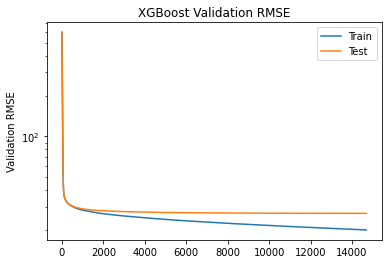

In [ ]:
# retrieve performance metrics
results = my_model.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Test')
ax.legend()
plt.yscale('log')
plt.ylabel('Validation RMSE')
plt.title('XGBoost Validation RMSE')
plt.show()

In [ ]:
## save the train dataset proprocessed reviews to a file
best_model = hyp_model
best_model.save_model("xg_model_33.pkl")

In [13]:
best_model = XGBRegressor()
best_model.load_model("xg_model_33.pkl")

[07:32:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
y_pred_train = best_model.predict(X_train)
regression_metrics(X_train.shape[1],y_train,y_pred_train,'Train')

Train RMSE: 18.570
Train MAE: 13.165
Train R2: 0.975
Train Adjusted-R2 :  0.9753178609775484


### Most frequent Imputation,With Outlier, All features without removal for missing value %**

In [3]:
import pandas as pd
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from numpy import absolute
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from sklearn.linear_model import Lasso
from numpy import absolute
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from numpy import arange
%matplotlib inline
import matplotlib.pyplot as plt
from xgboost import XGBRegressor

In [4]:
df = pd.read_csv('train_clean_withOutl_allcol.csv')
df_test = pd.read_csv('test_clean_allcol.csv')

In [5]:
X_train = df.drop('y',axis=1)
y_train = df['y']

In [6]:
X_test = df_test.drop('y',axis=1)
y_test = df_test['y']

In [7]:
# ensure that the target variable is a 2d array
y_train = y_train.to_numpy().reshape((len(y_train),1))
y_test = y_test.to_numpy().reshape((len(y_test),1))

In [ ]:
my_model = XGBRegressor(n_estimators=20000, learning_rate=0.05, njobs=-1,tree_method='gpu_hist')
my_model.fit(X_train, y_train, early_stopping_rounds=500, eval_set = [(X_train, y_train), (X_test, y_test)], verbose=True)


[10:41:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:598.722	validation_1-rmse:600.295
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 500 rounds.
[1]	validation_0-rmse:569.099	validation_1-rmse:572.022
[2]	validation_0-rmse:540.971	validation_1-rmse:543.878
[3]	validation_0-rmse:514.235	validation_1-rmse:517.817
[4]	validation_0-rmse:488.867	validation_1-rmse:493.843
[5]	validation_0-rmse:464.757	validation_1-rmse:468.883
[6]	validation_0-rmse:441.88	validation_1-rmse:446.007
[7]	validation_0-rmse:420.139	validation_1-rmse:425.059
[8]	validation_0-rmse:399.507	validation_1-rmse:403.638
[9]	validation_0-rmse:379.919	validation_1-rmse:384.066
[10]	validation_0-rmse:361.315	validation_1-rmse:364.901
[11]	validation_0-rmse:343.646	validation_1-rmse:348.715
[12]	validation_0-rmse:326.855	validatio

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=20000,
             n_jobs=1, njobs=-1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, tree_method='gpu_hist',
             verbosity=1)

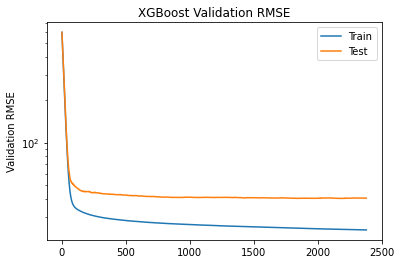

In [ ]:
# retrieve performance metrics
results = my_model.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Test')
ax.legend()
plt.yscale('log')
plt.ylabel('Validation RMSE')
plt.title('XGBoost Validation RMSE')
plt.show()

In [ ]:
## save the train dataset proprocessed reviews to a file
best_model = hyp_model
best_model.save_model("xg_model_34.pkl")

In [8]:
best_model = XGBRegressor()
best_model.load_model("xg_model_34.pkl")

[07:36:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
y_pred_train = best_model.predict(X_train)
regression_metrics(X_train.shape[1],y_train,y_pred_train,'Train')

Train RMSE: 24.151
Train MAE: 17.431
Train R2: 0.958
Train Adjusted-R2 :  0.9582016575123884


## Neural Network Model building, Validation and Tuning

In [1]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [2]:
import os
os.chdir("/content/gdrive/MyDrive/WalletHub")

In [3]:
def regression_metrics(p,y,y_pred,train_test):
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    from math import sqrt
    scores = mean_squared_error(y,y_pred)
    scores = sqrt(scores)
    print(train_test,'RMSE: %.3f'% (scores))
    scores = mean_absolute_error(y,y_pred)
    print(train_test,'MAE: %.3f'% (scores))
    scores = r2_score(y,y_pred)
    print(train_test,'R2: %.3f'% (scores))
    adj_rsquared = 1 - (1-r2_score(y, y_pred)) * (len(y)-1)/(len(y)-p-1)
    print(train_test, "Adjusted-R2 : " , adj_rsquared)
    print(train_test,'accuracy: %.3f'% (sum(abs(y-y_pred)<=3)/len(y)*100))

**Most frequent Imputation,With Outlier, Kbest(100), Power Transform**

In [4]:
import pandas as pd
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from numpy import absolute
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from sklearn.linear_model import Lasso
from numpy import absolute
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from numpy import arange
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer

In [19]:
df = pd.read_csv('train_fsel_withOutl.csv')
df_test = pd.read_csv('test_fsel_withOutl.csv')

In [20]:
X_train = df.drop('y',axis=1)
y_train = df['y']

In [21]:
X_test = df_test.drop('y',axis=1)
y_test = df_test['y']

In [22]:
# ensure that the target variable is a 2d array
y_train = y_train.to_numpy().reshape((len(y_train),1))
y_test = y_test.to_numpy().reshape((len(y_test),1))

In [23]:
pt1 = PowerTransformer()
pt1.fit(X_train)
X_train = pt1.transform(X_train)
X_test = pt1.transform(X_test)
pt2 = PowerTransformer()
pt2.fit(y_train)
y_train = pt2.transform(y_train)
y_test = pt2.transform(y_test)

In [ ]:
## save the transformation to a pickle file
import pickle
with open('train_fsel_withOutl_ptransX.pkl', 'wb') as f:
    pickle.dump(pt1, f)
## save the transformation to a pickle file
import pickle
with open('train_fsel_withOutl_ptransY.pkl', 'wb') as f:
    pickle.dump(pt2, f)

In [ ]:
# determine the number of input features
n_features = X_train.shape[1]

In [ ]:
# define model
from keras.layers import Dense , Dropout, BatchNormalization
model = Sequential()
model.add(Dense(64, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1))
# compile the model
model.compile(optimizer='adam', loss='mse')

In [ ]:
# simple early stopping
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('mlp_model_22.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [ ]:
# fit the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_test,y_test),callbacks=[es,mc])

Epoch 1/100
2344/2344 [==============================] - 10s 3ms/step - loss: 0.1722 - val_loss: 0.1015

Epoch 00001: val_loss improved from inf to 0.10154, saving model to mlp_model_22.h5
Epoch 2/100
2344/2344 [==============================] - 7s 3ms/step - loss: 0.1090 - val_loss: 0.0871

Epoch 00002: val_loss improved from 0.10154 to 0.08709, saving model to mlp_model_22.h5
Epoch 3/100
2344/2344 [==============================] - 7s 3ms/step - loss: 0.0989 - val_loss: 0.0881

Epoch 00003: val_loss did not improve from 0.08709
Epoch 4/100
2344/2344 [==============================] - 7s 3ms/step - loss: 0.0944 - val_loss: 0.0836

Epoch 00004: val_loss improved from 0.08709 to 0.08361, saving model to mlp_model_22.h5
Epoch 5/100
2344/2344 [==============================] - 7s 3ms/step - loss: 0.0908 - val_loss: 0.0875

Epoch 00005: val_loss did not improve from 0.08361
Epoch 6/100
2344/2344 [==============================] - 7s 3ms/step - loss: 0.0881 - val_loss: 0.0794

Epoch 00006: 

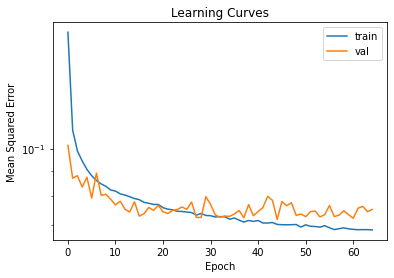

In [ ]:
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.yscale('log')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

In [24]:
# load the saved model
from keras.models import load_model
best_model = load_model('mlp_model_22.h5')
y_pred_train = best_model.predict(X_train)
y_train = pt2.inverse_transform(y_train)
y_pred_train = pt2.inverse_transform(y_pred_train)
regression_metrics(X_train.shape[1],y_train,y_pred_train,'Train')
y_pred_test = best_model.predict(X_test)
y_test = pt2.inverse_transform(y_test)
y_pred_test = pt2.inverse_transform(y_pred_test)
regression_metrics(X_test.shape[1],y_test,y_pred_test,'Test')

Train RMSE: 42.423
Train MAE: 20.657
Train R2: 0.872
Train Adjusted-R2 :  0.8713830648788818
Train accuracy: 12.456
Test RMSE: 30.183
Test MAE: 21.887
Test R2: 0.935
Test Adjusted-R2 :  0.9351187127472949
Test accuracy: 11.536


**Most frequent Imputation,ISO Outlier treatment, Kbest(100), Power Transform**

In [25]:
import pandas as pd
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from numpy import absolute
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from sklearn.linear_model import Lasso
from numpy import absolute
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from numpy import arange
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer

In [26]:
df = pd.read_csv('train_fsel_iso.csv')
df_test = pd.read_csv('test_fsel_iso.csv')

In [27]:
X_train = df.drop('y',axis=1)
y_train = df['y']

In [28]:
X_test = df_test.drop('y',axis=1)
y_test = df_test['y']

In [29]:
# ensure that the target variable is a 2d array
y_train = y_train.to_numpy().reshape((len(y_train),1))
y_test = y_test.to_numpy().reshape((len(y_test),1))

In [30]:
pt1 = PowerTransformer()
pt1.fit(X_train)
X_train = pt1.transform(X_train)
X_test = pt1.transform(X_test)
pt2 = PowerTransformer()
pt2.fit(y_train)
y_train = pt2.transform(y_train)
y_test = pt2.transform(y_test)

In [ ]:
## save the transformation to a pickle file
import pickle
with open('train_fsel_iso_ptransX.pkl', 'wb') as f:
    pickle.dump(pt1, f)
## save the transformation to a pickle file
import pickle
with open('train_fsel_iso_ptransY.pkl', 'wb') as f:
    pickle.dump(pt2, f)

In [ ]:
# determine the number of input features
n_features = X_train.shape[1]

In [ ]:
# define model
from keras.layers import Dense , Dropout, BatchNormalization
model = Sequential()
model.add(Dense(64, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1))
# compile the model
model.compile(optimizer='adam', loss='mse')

In [ ]:
# simple early stopping
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('mlp_model_17.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [ ]:
# fit the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_test,y_test),callbacks=[es,mc])

Epoch 1/100
2110/2110 [==============================] - 7s 3ms/step - loss: 0.1857 - val_loss: 0.1108

Epoch 00001: val_loss improved from inf to 0.11082, saving model to mlp_model_17.h5
Epoch 2/100
2110/2110 [==============================] - 7s 3ms/step - loss: 0.1041 - val_loss: 0.0969

Epoch 00002: val_loss improved from 0.11082 to 0.09690, saving model to mlp_model_17.h5
Epoch 3/100
2110/2110 [==============================] - 7s 3ms/step - loss: 0.0933 - val_loss: 0.0872

Epoch 00003: val_loss improved from 0.09690 to 0.08723, saving model to mlp_model_17.h5
Epoch 4/100
2110/2110 [==============================] - 7s 3ms/step - loss: 0.0882 - val_loss: 0.0930

Epoch 00004: val_loss did not improve from 0.08723
Epoch 5/100
2110/2110 [==============================] - 7s 3ms/step - loss: 0.0846 - val_loss: 0.0839

Epoch 00005: val_loss improved from 0.08723 to 0.08392, saving model to mlp_model_17.h5
Epoch 6/100
2110/2110 [==============================] - 7s 3ms/step - loss: 0.08

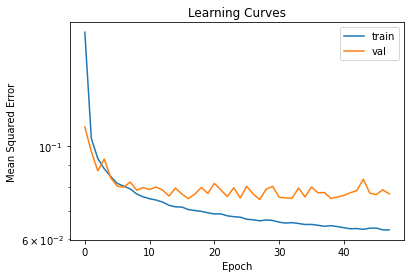

In [ ]:
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.yscale('log')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

In [31]:
# load the saved model
from keras.models import load_model
best_model = load_model('mlp_model_17.h5')
y_pred_train = best_model.predict(X_train)
y_train = pt2.inverse_transform(y_train)
y_pred_train = pt2.inverse_transform(y_pred_train)
regression_metrics(X_train.shape[1],y_train,y_pred_train,'Train')
y_pred_test = best_model.predict(X_test)
y_test = pt2.inverse_transform(y_test)
y_pred_test = pt2.inverse_transform(y_pred_test)
regression_metrics(X_test.shape[1],y_test,y_pred_test,'Test')

Train RMSE: 28.803
Train MAE: 19.961
Train R2: 0.939
Train Adjusted-R2 :  0.9392047012774487
Train accuracy: 11.671
Test RMSE: 30.350
Test MAE: 22.175
Test R2: 0.935
Test Adjusted-R2 :  0.93440064470184
Test accuracy: 10.880


**Most frequent Imputation,(10,90) percentile Outlier treatment, Kbest(100), Power Transform**

In [32]:
import pandas as pd
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from numpy import absolute
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from sklearn.linear_model import Lasso
from numpy import absolute
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from numpy import arange
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
from sklearn.pipeline import Pipeline

In [33]:
df = pd.read_csv('train_fsel.csv')
df_test = pd.read_csv('test_fsel.csv')

In [34]:
X_train = df.drop('y',axis=1)
y_train = df['y']

In [35]:
X_test = df_test.drop('y',axis=1)
y_test = df_test['y']

In [36]:
# ensure that the target variable is a 2d array
y_train = y_train.to_numpy().reshape((len(y_train),1))
y_test = y_test.to_numpy().reshape((len(y_test),1))

In [37]:
pt1 = QuantileTransformer()
pt1.fit(X_train)
X_train = pt1.transform(X_train)
X_test = pt1.transform(X_test)
pt2 = QuantileTransformer()
pt2.fit(y_train)
y_train = pt2.transform(y_train)
y_test = pt2.transform(y_test)

In [ ]:
## save the transformation to a pickle file
import pickle
with open('train_fsel_qtransX.pkl', 'wb') as f:
    pickle.dump(pt1, f)
## save the transformation to a pickle file
import pickle
with open('train_fsel_qtransY.pkl', 'wb') as f:
    pickle.dump(pt2, f)

In [ ]:
# determine the number of input features
n_features = X_train.shape[1]

In [ ]:
# define model
from keras.layers import Dense , Dropout, BatchNormalization
model = Sequential()
model.add(Dense(64, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1))
# compile the model
model.compile(optimizer='adam', loss='mse')

In [ ]:
# simple early stopping
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('mlp_model_28.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [ ]:
# fit the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_test,y_test),callbacks=[es,mc])

Epoch 1/100
2344/2344 [==============================] - 8s 3ms/step - loss: 0.0447 - val_loss: 0.0134

Epoch 00001: val_loss improved from inf to 0.01337, saving model to mlp_model_28.h5
Epoch 2/100
2344/2344 [==============================] - 7s 3ms/step - loss: 0.0117 - val_loss: 0.0092

Epoch 00002: val_loss improved from 0.01337 to 0.00917, saving model to mlp_model_28.h5
Epoch 3/100
2344/2344 [==============================] - 7s 3ms/step - loss: 0.0101 - val_loss: 0.0087

Epoch 00003: val_loss improved from 0.00917 to 0.00874, saving model to mlp_model_28.h5
Epoch 4/100
2344/2344 [==============================] - 7s 3ms/step - loss: 0.0091 - val_loss: 0.0094

Epoch 00004: val_loss did not improve from 0.00874
Epoch 5/100
2344/2344 [==============================] - 7s 3ms/step - loss: 0.0087 - val_loss: 0.0072

Epoch 00005: val_loss improved from 0.00874 to 0.00725, saving model to mlp_model_28.h5
Epoch 6/100
2344/2344 [==============================] - 7s 3ms/step - loss: 0.00

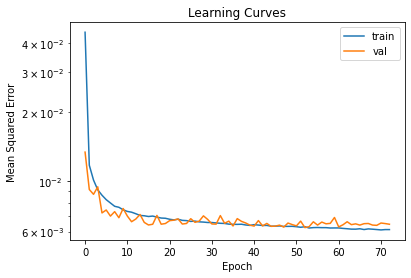

In [ ]:
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.yscale('log')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

In [38]:
# load the saved model
from keras.models import load_model
best_model = load_model('mlp_model_28.h5')
y_pred_train = best_model.predict(X_train)
y_train = pt2.inverse_transform(y_train)
y_pred_train = pt2.inverse_transform(y_pred_train)
regression_metrics(X_train.shape[1],y_train,y_pred_train,'Train')
y_pred_test = best_model.predict(X_test)
y_test = pt2.inverse_transform(y_test)
y_pred_test = pt2.inverse_transform(y_pred_test)
regression_metrics(X_test.shape[1],y_test,y_pred_test,'Test')

Train RMSE: 30.547
Train MAE: 22.010
Train R2: 0.933
Train Adjusted-R2 :  0.933315361887916
Train accuracy: 12.285
Test RMSE: 31.930
Test MAE: 23.102
Test R2: 0.928
Test Adjusted-R2 :  0.9273915697610302
Test accuracy: 11.436


**Most frequent Imputation,With Outlier, All features, Power Transform**

In [39]:
import pandas as pd
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from numpy import absolute
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from sklearn.linear_model import Lasso
from numpy import absolute
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from numpy import arange
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer

In [40]:
df = pd.read_csv('train_clean_withOutl.csv')
df_test = pd.read_csv('test_clean.csv')

In [41]:
X_train = df.drop('y',axis=1)
y_train = df['y']

In [42]:
X_test = df_test.drop('y',axis=1)
y_test = df_test['y']

In [43]:
# ensure that the target variable is a 2d array
y_train = y_train.to_numpy().reshape((len(y_train),1))
y_test = y_test.to_numpy().reshape((len(y_test),1))

In [44]:
pt1 = PowerTransformer()
pt1.fit(X_train)
X_train = pt1.transform(X_train)
X_test = pt1.transform(X_test)
pt2 = PowerTransformer()
pt2.fit(y_train)
y_train = pt2.transform(y_train)
y_test = pt2.transform(y_test)

In [ ]:
## save the transformation to a pickle file
import pickle
with open('train_clean_withOutl_ptransX.pkl', 'wb') as f:
    pickle.dump(pt1, f)
## save the transformation to a pickle file
import pickle
with open('train_clean_withOutl_ptransY.pkl', 'wb') as f:
    pickle.dump(pt2, f)

In [ ]:
# determine the number of input features
n_features = X_train.shape[1]

In [ ]:
# define model
from keras.layers import Dense , Dropout, BatchNormalization
model = Sequential()
model.add(Dense(64, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1))
# compile the model
model.compile(optimizer='adam', loss='mse')

In [ ]:
# simple early stopping
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('mlp_model_29.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [ ]:
# fit the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_test,y_test),callbacks=[es,mc])

Epoch 1/100
2344/2344 [==============================] - 6s 2ms/step - loss: 0.1425 - val_loss: 0.0872

Epoch 00001: val_loss improved from inf to 0.08723, saving model to mlp_model_29.h5
Epoch 2/100
2344/2344 [==============================] - 5s 2ms/step - loss: 0.0970 - val_loss: 0.0798

Epoch 00002: val_loss improved from 0.08723 to 0.07984, saving model to mlp_model_29.h5
Epoch 3/100
2344/2344 [==============================] - 5s 2ms/step - loss: 0.0888 - val_loss: 0.0729

Epoch 00003: val_loss improved from 0.07984 to 0.07290, saving model to mlp_model_29.h5
Epoch 4/100
2344/2344 [==============================] - 5s 2ms/step - loss: 0.0849 - val_loss: 0.0759

Epoch 00004: val_loss did not improve from 0.07290
Epoch 5/100
2344/2344 [==============================] - 5s 2ms/step - loss: 0.0825 - val_loss: 0.0716

Epoch 00005: val_loss improved from 0.07290 to 0.07164, saving model to mlp_model_29.h5
Epoch 6/100
2344/2344 [==============================] - 5s 2ms/step - loss: 0.07

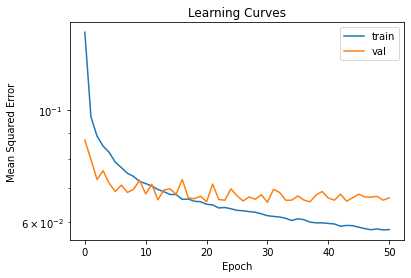

In [ ]:
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.yscale('log')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

In [45]:
# load the saved model
from keras.models import load_model
best_model = load_model('mlp_model_29.h5')
y_pred_train = best_model.predict(X_train)
y_train = pt2.inverse_transform(y_train)
y_pred_train = pt2.inverse_transform(y_pred_train)
regression_metrics(X_train.shape[1],y_train,y_pred_train,'Train')
y_pred_test = best_model.predict(X_test)
y_test = pt2.inverse_transform(y_test)
y_pred_test = pt2.inverse_transform(y_pred_test)
regression_metrics(X_test.shape[1],y_test,y_pred_test,'Test')

Train RMSE: 26.073
Train MAE: 18.668
Train R2: 0.951
Train Adjusted-R2 :  0.9513450177480229
Train accuracy: 13.520
Test RMSE: 28.888
Test MAE: 20.786
Test R2: 0.941
Test Adjusted-R2 :  0.9402896707655242
Test accuracy: 12.800


**Most frequent Imputation,ISO, All features, Power Transform**

In [46]:
import pandas as pd
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from numpy import absolute
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from sklearn.linear_model import Lasso
from numpy import absolute
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from numpy import arange
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer

In [47]:
df = pd.read_csv('train_clean_iso.csv')
df_test = pd.read_csv('test_clean.csv')

In [48]:
X_train = df.drop('y',axis=1)
y_train = df['y']

In [49]:
X_test = df_test.drop('y',axis=1)
y_test = df_test['y']

In [50]:
# ensure that the target variable is a 2d array
y_train = y_train.to_numpy().reshape((len(y_train),1))
y_test = y_test.to_numpy().reshape((len(y_test),1))

In [51]:
pt1 = PowerTransformer()
pt1.fit(X_train)
X_train = pt1.transform(X_train)
X_test = pt1.transform(X_test)
pt2 = PowerTransformer()
pt2.fit(y_train)
y_train = pt2.transform(y_train)
y_test = pt2.transform(y_test)

In [ ]:
## save the transformation to a pickle file
import pickle
with open('train_clean_iso_ptransX.pkl', 'wb') as f:
    pickle.dump(pt1, f)
## save the transformation to a pickle file
import pickle
with open('train_clean_iso_ptransY.pkl', 'wb') as f:
    pickle.dump(pt2, f)

In [ ]:
# determine the number of input features
n_features = X_train.shape[1]

In [ ]:
# define model
from keras.layers import Dense , Dropout, BatchNormalization
model = Sequential()
model.add(Dense(64, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1))
# compile the model
model.compile(optimizer='adam', loss='mse')

In [ ]:
# simple early stopping
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('mlp_model_30.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [ ]:
# fit the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_test,y_test),callbacks=[es,mc])

Epoch 1/100
2110/2110 [==============================] - 6s 2ms/step - loss: 0.1660 - val_loss: 0.1233

Epoch 00001: val_loss improved from inf to 0.12327, saving model to mlp_model_30.h5
Epoch 2/100
2110/2110 [==============================] - 5s 2ms/step - loss: 0.0981 - val_loss: 0.0876

Epoch 00002: val_loss improved from 0.12327 to 0.08762, saving model to mlp_model_30.h5
Epoch 3/100
2110/2110 [==============================] - 5s 2ms/step - loss: 0.0894 - val_loss: 0.0861

Epoch 00003: val_loss improved from 0.08762 to 0.08610, saving model to mlp_model_30.h5
Epoch 4/100
2110/2110 [==============================] - 5s 2ms/step - loss: 0.0831 - val_loss: 0.0814

Epoch 00004: val_loss improved from 0.08610 to 0.08135, saving model to mlp_model_30.h5
Epoch 5/100
2110/2110 [==============================] - 5s 2ms/step - loss: 0.0796 - val_loss: 0.0829

Epoch 00005: val_loss did not improve from 0.08135
Epoch 6/100
2110/2110 [==============================] - 5s 2ms/step - loss: 0.07

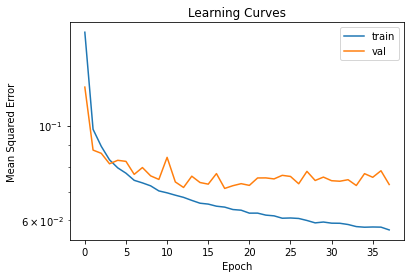

In [ ]:
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.yscale('log')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

In [52]:
# load the saved model
from keras.models import load_model
best_model = load_model('mlp_model_30.h5')
y_pred_train = best_model.predict(X_train)
y_train = pt2.inverse_transform(y_train)
y_pred_train = pt2.inverse_transform(y_pred_train)
regression_metrics(X_train.shape[1],y_train,y_pred_train,'Train')
y_pred_test = best_model.predict(X_test)
y_test = pt2.inverse_transform(y_test)
y_pred_test = pt2.inverse_transform(y_pred_test)
regression_metrics(X_test.shape[1],y_test,y_pred_test,'Test')

Train RMSE: 26.403
Train MAE: 19.283
Train R2: 0.949
Train Adjusted-R2 :  0.9488270556911251
Train accuracy: 11.812
Test RMSE: 29.654
Test MAE: 21.711
Test R2: 0.938
Test Adjusted-R2 :  0.9370831089001274
Test accuracy: 11.092


**Most frequent Imputation,(10,90) percentile outlier, All features, Power Transform**

In [53]:
import pandas as pd
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from numpy import absolute
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from sklearn.linear_model import Lasso
from numpy import absolute
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from numpy import arange
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer, RobustScaler, QuantileTransformer

In [54]:
df = pd.read_csv('train_clean.csv')
df_test = pd.read_csv('test_clean.csv')

In [55]:
X_train = df.drop('y',axis=1)
y_train = df['y']

In [56]:
X_test = df_test.drop('y',axis=1)
y_test = df_test['y']

In [57]:
# ensure that the target variable is a 2d array
y_train = y_train.to_numpy().reshape((len(y_train),1))
y_test = y_test.to_numpy().reshape((len(y_test),1))

In [58]:
pt1 =QuantileTransformer()
pt1.fit(X_train)
X_train = pt1.transform(X_train)
X_test = pt1.transform(X_test)
pt2 = QuantileTransformer()
pt2.fit(y_train)
y_train = pt2.transform(y_train)
y_test = pt2.transform(y_test)

In [ ]:
## save the transformation to a pickle file
import pickle
with open('train_clean_qtransX.pkl', 'wb') as f:
    pickle.dump(pt1, f)
## save the transformation to a pickle file
import pickle
with open('train_clean_qtransY.pkl', 'wb') as f:
    pickle.dump(pt2, f)

In [ ]:
# determine the number of input features
n_features = X_train.shape[1]

In [ ]:
# define model
from keras.layers import Dense , Dropout, BatchNormalization
model = Sequential()
model.add(Dense(64, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1))
# compile the model
model.compile(optimizer='adam', loss='mse')

In [ ]:
# simple early stopping
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('mlp_model_31.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [ ]:
# fit the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_test,y_test),callbacks=[es,mc])

Epoch 1/100
2344/2344 [==============================] - 8s 3ms/step - loss: 0.0449 - val_loss: 0.0140

Epoch 00001: val_loss improved from inf to 0.01397, saving model to mlp_model_31.h5
Epoch 2/100
2344/2344 [==============================] - 7s 3ms/step - loss: 0.0108 - val_loss: 0.0096

Epoch 00002: val_loss improved from 0.01397 to 0.00963, saving model to mlp_model_31.h5
Epoch 3/100
2344/2344 [==============================] - 7s 3ms/step - loss: 0.0088 - val_loss: 0.0092

Epoch 00003: val_loss improved from 0.00963 to 0.00920, saving model to mlp_model_31.h5
Epoch 4/100
2344/2344 [==============================] - 7s 3ms/step - loss: 0.0081 - val_loss: 0.0079

Epoch 00004: val_loss improved from 0.00920 to 0.00794, saving model to mlp_model_31.h5
Epoch 5/100
2344/2344 [==============================] - 7s 3ms/step - loss: 0.0076 - val_loss: 0.0072

Epoch 00005: val_loss improved from 0.00794 to 0.00723, saving model to mlp_model_31.h5
Epoch 6/100
2344/2344 [=====================

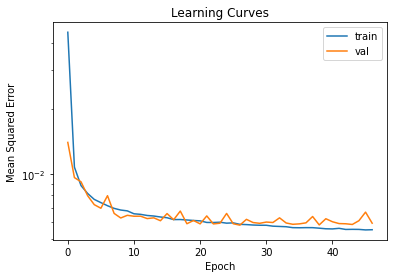

In [ ]:
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.yscale('log')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

In [59]:
# load the saved model
from keras.models import load_model
best_model = load_model('mlp_model_31.h5')
y_pred_train = best_model.predict(X_train)
y_train = pt2.inverse_transform(y_train)
y_pred_train = pt2.inverse_transform(y_pred_train)
regression_metrics(X_train.shape[1],y_train,y_pred_train,'Train')
y_pred_test = best_model.predict(X_test)
y_test = pt2.inverse_transform(y_test)
y_pred_test = pt2.inverse_transform(y_pred_test)
regression_metrics(X_test.shape[1],y_test,y_pred_test,'Test')

Train RMSE: 30.131
Train MAE: 21.138
Train R2: 0.935
Train Adjusted-R2 :  0.9350171816139228
Train accuracy: 13.752
Test RMSE: 30.596
Test MAE: 21.902
Test R2: 0.934
Test Adjusted-R2 :  0.9330227411111836
Test accuracy: 12.956


**KNN Imputation,ISO outlier, KBest(100), Power Transform**

In [60]:
import pandas as pd
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from numpy import absolute
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from sklearn.linear_model import Lasso
from numpy import absolute
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from numpy import arange
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer

In [61]:
df = pd.read_csv('train_fsel_knn.csv')
df_test = pd.read_csv('test_fsel_knn.csv')

In [62]:
X_train = df.drop('y',axis=1)
y_train = df['y']

In [63]:
X_test = df_test.drop('y',axis=1)
y_test = df_test['y']

In [64]:
# ensure that the target variable is a 2d array
y_train = y_train.to_numpy().reshape((len(y_train),1))
y_test = y_test.to_numpy().reshape((len(y_test),1))

In [65]:
pt1 = PowerTransformer()
pt1.fit(X_train)
X_train = pt1.transform(X_train)
X_test = pt1.transform(X_test)
pt2 = PowerTransformer()
pt2.fit(y_train)
y_train = pt2.transform(y_train)
y_test = pt2.transform(y_test)

In [ ]:
## save the transformation to a pickle file
import pickle
with open('train_fsel_knn_ptransX.pkl', 'wb') as f:
    pickle.dump(pt1, f)
## save the transformation to a pickle file
import pickle
with open('train_fsel_knn_ptranY.pkl', 'wb') as f:
    pickle.dump(pt2, f)

In [ ]:
# determine the number of input features
n_features = X_train.shape[1]

In [ ]:
# define model
from keras.layers import Dense , Dropout, BatchNormalization
model = Sequential()
model.add(Dense(64, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1))
# compile the model
model.compile(optimizer='adam', loss='mse')

In [ ]:
# simple early stopping
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('mlp_model_21.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [ ]:
# fit the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_test,y_test),callbacks=[es,mc])

Epoch 1/100
2110/2110 [==============================] - 5s 2ms/step - loss: 0.1899 - val_loss: 0.1067

Epoch 00001: val_loss improved from inf to 0.10672, saving model to mlp_model_21.h5
Epoch 2/100
2110/2110 [==============================] - 5s 2ms/step - loss: 0.1059 - val_loss: 0.1007

Epoch 00002: val_loss improved from 0.10672 to 0.10069, saving model to mlp_model_21.h5
Epoch 3/100
2110/2110 [==============================] - 5s 2ms/step - loss: 0.0945 - val_loss: 0.0960

Epoch 00003: val_loss improved from 0.10069 to 0.09602, saving model to mlp_model_21.h5
Epoch 4/100
2110/2110 [==============================] - 5s 2ms/step - loss: 0.0873 - val_loss: 0.0867

Epoch 00004: val_loss improved from 0.09602 to 0.08672, saving model to mlp_model_21.h5
Epoch 5/100
2110/2110 [==============================] - 5s 2ms/step - loss: 0.0851 - val_loss: 0.0879

Epoch 00005: val_loss did not improve from 0.08672
Epoch 6/100
2110/2110 [==============================] - 5s 2ms/step - loss: 0.08

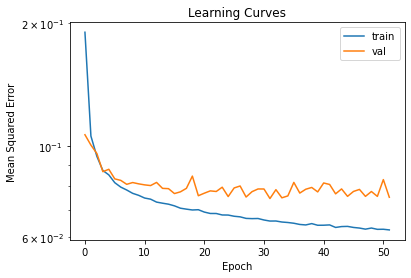

In [ ]:
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.yscale('log')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

In [66]:
# load the saved model
from keras.models import load_model
best_model = load_model('mlp_model_21.h5')
y_pred_train = best_model.predict(X_train)
y_train = pt2.inverse_transform(y_train)
y_pred_train = pt2.inverse_transform(y_pred_train)
regression_metrics(X_train.shape[1],y_train,y_pred_train,'Train')
y_pred_test = best_model.predict(X_test)
y_test = pt2.inverse_transform(y_test)
y_pred_test = pt2.inverse_transform(y_pred_test)
regression_metrics(X_test.shape[1],y_test,y_pred_test,'Test')

Train RMSE: 28.383
Train MAE: 20.107
Train R2: 0.941
Train Adjusted-R2 :  0.9408748233185193
Train accuracy: 10.945
Test RMSE: 30.321
Test MAE: 22.379
Test R2: 0.935
Test Adjusted-R2 :  0.9345256493012952
Test accuracy: 10.256


**Most frequent Imputation,With Outlier, All features, Power Transform, 7 layers**

In [67]:
import pandas as pd
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from numpy import absolute
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from sklearn.linear_model import Lasso
from numpy import absolute
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from numpy import arange
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer

In [68]:
df = pd.read_csv('train_clean_withOutl.csv')
df_test = pd.read_csv('test_clean.csv')

In [69]:
X_train = df.drop('y',axis=1)
y_train = df['y']

In [70]:
X_test = df_test.drop('y',axis=1)
y_test = df_test['y']

In [71]:
# ensure that the target variable is a 2d array
y_train = y_train.to_numpy().reshape((len(y_train),1))
y_test = y_test.to_numpy().reshape((len(y_test),1))

In [72]:
pt1 = PowerTransformer()
pt1.fit(X_train)
X_train = pt1.transform(X_train)
X_test = pt1.transform(X_test)
pt2 = PowerTransformer()
pt2.fit(y_train)
y_train = pt2.transform(y_train)
y_test = pt2.transform(y_test)

In [ ]:
## save the transformation to a pickle file
import pickle
with open('train_clean_withOutl_ptransX.pkl', 'wb') as f:
    pickle.dump(pt1, f)
## save the transformation to a pickle file
import pickle
with open('train_clean_withOutl_ptransY.pkl', 'wb') as f:
    pickle.dump(pt2, f)

In [ ]:
# determine the number of input features
n_features = X_train.shape[1]

In [ ]:
# define model
from keras.layers import Dense , Dropout, BatchNormalization
model = Sequential()
model.add(Dense(128, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1))
# compile the model
model.compile(optimizer='adam', loss='mse')

In [ ]:
# simple early stopping
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('mlp_model_36.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [ ]:
# fit the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_test,y_test),callbacks=[es,mc])

Epoch 1/100
2344/2344 [==============================] - 11s 4ms/step - loss: 0.1711 - val_loss: 0.0901

Epoch 00001: val_loss improved from inf to 0.09011, saving model to mlp_model_36.h5
Epoch 2/100
2344/2344 [==============================] - 9s 4ms/step - loss: 0.1031 - val_loss: 0.0843

Epoch 00002: val_loss improved from 0.09011 to 0.08429, saving model to mlp_model_36.h5
Epoch 3/100
2344/2344 [==============================] - 9s 4ms/step - loss: 0.0930 - val_loss: 0.0833

Epoch 00003: val_loss improved from 0.08429 to 0.08330, saving model to mlp_model_36.h5
Epoch 4/100
2344/2344 [==============================] - 9s 4ms/step - loss: 0.0869 - val_loss: 0.0735

Epoch 00004: val_loss improved from 0.08330 to 0.07350, saving model to mlp_model_36.h5
Epoch 5/100
2344/2344 [==============================] - 9s 4ms/step - loss: 0.0831 - val_loss: 0.0724

Epoch 00005: val_loss improved from 0.07350 to 0.07236, saving model to mlp_model_36.h5
Epoch 6/100
2344/2344 [====================

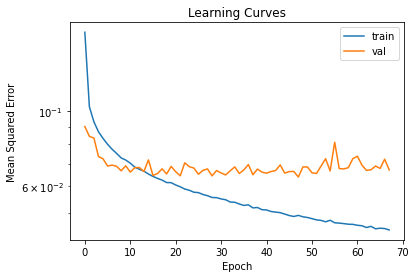

In [ ]:
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.yscale('log')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

In [73]:
# load the saved model
from keras.models import load_model
best_model = load_model('mlp_model_36.h5')
y_pred_train = best_model.predict(X_train)
y_train = pt2.inverse_transform(y_train)
y_pred_train = pt2.inverse_transform(y_pred_train)
regression_metrics(X_train.shape[1],y_train,y_pred_train,'Train')
y_pred_test = best_model.predict(X_test)
y_test = pt2.inverse_transform(y_test)
y_pred_test = pt2.inverse_transform(y_pred_test)
regression_metrics(X_test.shape[1],y_test,y_pred_test,'Test')

Train RMSE: 23.499
Train MAE: 16.836
Train R2: 0.961
Train Adjusted-R2 :  0.9604769392436027
Train accuracy: 13.360
Test RMSE: 28.350
Test MAE: 20.420
Test R2: 0.943
Test Adjusted-R2 :  0.9424956031842807
Test accuracy: 11.888


# Model Evaluation - on Test dataset

## Model Evaluation - Lasso Regression

In [17]:
def regression_metrics(p,y,y_pred,train_test):
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    from math import sqrt
    scores = mean_squared_error(y,y_pred)
    scores = sqrt(scores)
    print(train_test,'RMSE: %.3f'% (scores))
    scores = mean_absolute_error(y,y_pred)
    print(train_test,'MAE: %.3f'% (scores))
    scores = r2_score(y,y_pred)
    print(train_test,'R2: %.3f'% (scores))
    adj_rsquared = 1 - (1-r2_score(y, y_pred)) * (len(y)-1)/(len(y)-p-1)
    print(train_test, "Adjusted-R2 : " , adj_rsquared)
    print(train_test,'accuracy: %.3f'% (sum(abs(y-y_pred)<=3)/len(y)*100))

### Most Frequent, WIthOutliers, Kbest(100)

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [19]:
import pandas as pd
df_test = pd.read_csv('test.csv')

In [20]:

import pickle
with open('imputer.pkl', 'rb') as f:
    imputer = pickle.load(f)

In [21]:
with open('train_cols.pkl', 'rb') as f:
    train_cols = pickle.load(f)

In [22]:
with open('train_fsel_cols_withOutl.pkl', 'rb') as f:
    train_fsel_cols_withOutl = pickle.load(f)

In [23]:
with open('lasso_model_2.pkl', 'rb') as f:
    lasso_model = pickle.load(f)

In [24]:
with open('train_fsel_withOutl_qtransX.pkl', 'rb') as f:
    train_ptransX = pickle.load(f)

In [25]:
df_test = df_test[train_cols]

In [26]:
df_test_copy = df_test.copy()
X = df_test_copy.drop('y',axis=1)
y = df_test_copy.pop('y')

In [27]:
Xtrans = imputer.transform(X)

In [28]:
df_test_concat  = pd.concat([pd.DataFrame(Xtrans),pd.DataFrame(y)],axis=1)
df_test_concat.columns = df_test.columns
df_test = df_test_concat.copy()
df_test.head()

x001  x002  x003  x004   x005  x007  x008  x009  x010  x011  ...  \
0  1190584.0  29.0   6.0  17.0  122.0   0.0   2.0   0.0   1.0   0.0  ...   
1  1175513.0  72.0  72.0  72.0   72.0   0.0   0.0   0.0   0.0   3.0  ...   
2  1173853.0   4.0   2.0   4.0   78.0   0.0   0.0   0.0   0.0   0.0  ...   
3  1426240.0   4.0   2.0   4.0  119.0   0.0   0.0   0.0   0.0   0.0  ...   
4  1470255.0  31.0  31.0  31.0   31.0   0.0   0.0   1.0   1.0   0.0  ...   

   x288  x289  x290    x291    x292    x294    x296  x302    x303    y  
0  29.0   6.0  17.5  9951.0  9951.0     0.0  9951.0   1.0     0.0  625  
1  72.0  72.0  72.0  4380.0  4380.0  4380.0     0.0   5.0  4380.0  501  
2   3.0   2.0   3.0     0.0     0.0     0.0     0.0   1.0     0.0  660  
3   3.0   2.0   3.0     0.0     0.0     0.0     0.0   1.0     0.0  512  
4  31.0  31.0  31.0     0.0     0.0     0.0     0.0   1.0     0.0  527  

[5 rows x 216 columns]

In [29]:
df_test = df_test[train_fsel_cols_withOutl]

In [30]:
df_test_copy = df_test.copy()
X = df_test_copy.drop('y',axis=1)
y = df_test_copy.pop('y')

In [31]:
X= train_ptransX.transform(X)

In [32]:
best_model = lasso_model
y_pred = best_model.predict(X)
regression_metrics(X.shape[1],y,y_pred,'Test') 

Test RMSE: 41.825
Test MAE: 32.609
Test R2: 0.876
Test Adjusted-R2 :  0.875418370990046
Test accuracy: 6.292


### Most Frequent, ISO outlier handling, Kbest(100)

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [34]:
import pandas as pd
df_test = pd.read_csv('test.csv')

In [35]:

import pickle
with open('imputer.pkl', 'rb') as f:
    imputer = pickle.load(f)

In [36]:
with open('train_cols.pkl', 'rb') as f:
    train_cols = pickle.load(f)

In [37]:
with open('train_fsel_cols_iso.pkl', 'rb') as f:
    train_fsel_cols_iso = pickle.load(f)

In [38]:
with open('lasso_model_1.pkl', 'rb') as f:
    lasso_model = pickle.load(f)

In [39]:
with open('train_fsel_iso_qtransX.pkl', 'rb') as f:
    train_ptransX = pickle.load(f)

In [40]:
df_test = df_test[train_cols]

In [41]:
df_test_copy = df_test.copy()
X = df_test_copy.drop('y',axis=1)
y = df_test_copy.pop('y')

In [42]:
Xtrans = imputer.transform(X)

In [43]:
df_test_concat  = pd.concat([pd.DataFrame(Xtrans),pd.DataFrame(y)],axis=1)
df_test_concat.columns = df_test.columns
df_test = df_test_concat.copy()
df_test.head()

x001  x002  x003  x004   x005  x007  x008  x009  x010  x011  ...  \
0  1190584.0  29.0   6.0  17.0  122.0   0.0   2.0   0.0   1.0   0.0  ...   
1  1175513.0  72.0  72.0  72.0   72.0   0.0   0.0   0.0   0.0   3.0  ...   
2  1173853.0   4.0   2.0   4.0   78.0   0.0   0.0   0.0   0.0   0.0  ...   
3  1426240.0   4.0   2.0   4.0  119.0   0.0   0.0   0.0   0.0   0.0  ...   
4  1470255.0  31.0  31.0  31.0   31.0   0.0   0.0   1.0   1.0   0.0  ...   

   x288  x289  x290    x291    x292    x294    x296  x302    x303    y  
0  29.0   6.0  17.5  9951.0  9951.0     0.0  9951.0   1.0     0.0  625  
1  72.0  72.0  72.0  4380.0  4380.0  4380.0     0.0   5.0  4380.0  501  
2   3.0   2.0   3.0     0.0     0.0     0.0     0.0   1.0     0.0  660  
3   3.0   2.0   3.0     0.0     0.0     0.0     0.0   1.0     0.0  512  
4  31.0  31.0  31.0     0.0     0.0     0.0     0.0   1.0     0.0  527  

[5 rows x 216 columns]

In [44]:
df_test = df_test[train_fsel_cols_iso]

In [45]:
df_test_copy = df_test.copy()
X = df_test_copy.drop('y',axis=1)
y = df_test_copy.pop('y')

In [46]:
X= train_ptransX.transform(X)

In [47]:
best_model = lasso_model
y_pred = best_model.predict(X)
regression_metrics(X.shape[1],y,y_pred,'Test') 

Test RMSE: 40.269
Test MAE: 31.200
Test R2: 0.885
Test Adjusted-R2 :  0.8845134848569305
Test accuracy: 6.708


### Most Frequent, (10,90) percentile outlier handling, Kbest(100)

In [102]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [103]:
import pandas as pd
df_test = pd.read_csv('test.csv')

In [104]:

import pickle
with open('imputer.pkl', 'rb') as f:
    imputer = pickle.load(f)

In [105]:
with open('train_cols.pkl', 'rb') as f:
    train_cols = pickle.load(f)

In [106]:
with open('train_fsel_cols.pkl', 'rb') as f:
    train_fsel_cols = pickle.load(f)

In [107]:
with open('lasso_model_3.pkl', 'rb') as f:
    lasso_model = pickle.load(f)

In [108]:
with open('train_fsel_qtransX1.pkl', 'rb') as f:
    train_ptransX = pickle.load(f)

In [109]:
df_test = df_test[train_cols]

In [110]:
df_test_copy = df_test.copy()
X = df_test_copy.drop('y',axis=1)
y = df_test_copy.pop('y')

In [111]:
Xtrans = imputer.transform(X)

In [112]:
df_test_concat  = pd.concat([pd.DataFrame(Xtrans),pd.DataFrame(y)],axis=1)
df_test_concat.columns = df_test.columns
df_test = df_test_concat.copy()
df_test.head()

x001  x002  x003  x004   x005  x007  x008  x009  x010  x011  ...  \
0  1190584.0  29.0   6.0  17.0  122.0   0.0   2.0   0.0   1.0   0.0  ...   
1  1175513.0  72.0  72.0  72.0   72.0   0.0   0.0   0.0   0.0   3.0  ...   
2  1173853.0   4.0   2.0   4.0   78.0   0.0   0.0   0.0   0.0   0.0  ...   
3  1426240.0   4.0   2.0   4.0  119.0   0.0   0.0   0.0   0.0   0.0  ...   
4  1470255.0  31.0  31.0  31.0   31.0   0.0   0.0   1.0   1.0   0.0  ...   

   x288  x289  x290    x291    x292    x294    x296  x302    x303    y  
0  29.0   6.0  17.5  9951.0  9951.0     0.0  9951.0   1.0     0.0  625  
1  72.0  72.0  72.0  4380.0  4380.0  4380.0     0.0   5.0  4380.0  501  
2   3.0   2.0   3.0     0.0     0.0     0.0     0.0   1.0     0.0  660  
3   3.0   2.0   3.0     0.0     0.0     0.0     0.0   1.0     0.0  512  
4  31.0  31.0  31.0     0.0     0.0     0.0     0.0   1.0     0.0  527  

[5 rows x 216 columns]

In [113]:
df_test = df_test[train_fsel_cols]

In [114]:
df_test_copy = df_test.copy()
X = df_test_copy.drop('y',axis=1)
y = df_test_copy.pop('y')

In [115]:
X= train_ptransX.transform(X)

In [116]:
best_model = lasso_model
y_pred = best_model.predict(X)
regression_metrics(X.shape[1],y,y_pred,'Test') 

Test RMSE: 42.647
Test MAE: 33.395
Test R2: 0.871
Test Adjusted-R2 :  0.8704736276142178
Test accuracy: 5.720


### Most Frequent, WIthOutliers, All Features

In [63]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [64]:
import pandas as pd
df_test = pd.read_csv('test.csv')

In [65]:

import pickle
with open('imputer.pkl', 'rb') as f:
    imputer = pickle.load(f)

In [66]:
with open('train_cols.pkl', 'rb') as f:
    train_cols = pickle.load(f)

In [67]:
with open('lasso_model_12.pkl', 'rb') as f:
    lasso_model = pickle.load(f)

In [68]:
with open('train_clean_iso_qtransX.pkl', 'rb') as f:
    train_ptransX = pickle.load(f)

In [69]:
df_test = df_test[train_cols]

In [70]:
df_test_copy = df_test.copy()
X = df_test_copy.drop('y',axis=1)
y = df_test_copy.pop('y')

In [71]:
Xtrans = imputer.transform(X)

In [72]:
df_test_concat  = pd.concat([pd.DataFrame(Xtrans),pd.DataFrame(y)],axis=1)
df_test_concat.columns = df_test.columns
df_test = df_test_concat.copy()
df_test.head()

x001  x002  x003  x004   x005  x007  x008  x009  x010  x011  ...  \
0  1190584.0  29.0   6.0  17.0  122.0   0.0   2.0   0.0   1.0   0.0  ...   
1  1175513.0  72.0  72.0  72.0   72.0   0.0   0.0   0.0   0.0   3.0  ...   
2  1173853.0   4.0   2.0   4.0   78.0   0.0   0.0   0.0   0.0   0.0  ...   
3  1426240.0   4.0   2.0   4.0  119.0   0.0   0.0   0.0   0.0   0.0  ...   
4  1470255.0  31.0  31.0  31.0   31.0   0.0   0.0   1.0   1.0   0.0  ...   

   x288  x289  x290    x291    x292    x294    x296  x302    x303    y  
0  29.0   6.0  17.5  9951.0  9951.0     0.0  9951.0   1.0     0.0  625  
1  72.0  72.0  72.0  4380.0  4380.0  4380.0     0.0   5.0  4380.0  501  
2   3.0   2.0   3.0     0.0     0.0     0.0     0.0   1.0     0.0  660  
3   3.0   2.0   3.0     0.0     0.0     0.0     0.0   1.0     0.0  512  
4  31.0  31.0  31.0     0.0     0.0     0.0     0.0   1.0     0.0  527  

[5 rows x 216 columns]

In [73]:
df_test_copy = df_test.copy()
X = df_test_copy.drop('y',axis=1)
y = df_test_copy.pop('y')

In [74]:
X= train_ptransX.transform(X)

In [75]:
best_model = lasso_model
y_pred = best_model.predict(X)
regression_metrics(X.shape[1],y,y_pred,'Test') 

Test RMSE: 38.646
Test MAE: 30.078
Test R2: 0.894
Test Adjusted-R2 :  0.8931421815100273
Test accuracy: 6.852


### Most Frequent, ISO outlier handling, All features

In [76]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [77]:
import pandas as pd
df_test = pd.read_csv('test.csv')

In [78]:

import pickle
with open('imputer.pkl', 'rb') as f:
    imputer = pickle.load(f)

In [79]:
with open('train_cols.pkl', 'rb') as f:
    train_cols = pickle.load(f)

In [80]:
with open('lasso_model_7.pkl', 'rb') as f:
    lasso_model = pickle.load(f)

In [81]:
with open('train_clean_withOutl_qtransX.pkl', 'rb') as f:
    train_ptransX = pickle.load(f)

In [82]:
df_test = df_test[train_cols]

In [83]:
df_test_copy = df_test.copy()
X = df_test_copy.drop('y',axis=1)
y = df_test_copy.pop('y')

In [84]:
Xtrans = imputer.transform(X)

In [85]:
df_test_concat  = pd.concat([pd.DataFrame(Xtrans),pd.DataFrame(y)],axis=1)
df_test_concat.columns = df_test.columns
df_test = df_test_concat.copy()
df_test.head()

x001  x002  x003  x004   x005  x007  x008  x009  x010  x011  ...  \
0  1190584.0  29.0   6.0  17.0  122.0   0.0   2.0   0.0   1.0   0.0  ...   
1  1175513.0  72.0  72.0  72.0   72.0   0.0   0.0   0.0   0.0   3.0  ...   
2  1173853.0   4.0   2.0   4.0   78.0   0.0   0.0   0.0   0.0   0.0  ...   
3  1426240.0   4.0   2.0   4.0  119.0   0.0   0.0   0.0   0.0   0.0  ...   
4  1470255.0  31.0  31.0  31.0   31.0   0.0   0.0   1.0   1.0   0.0  ...   

   x288  x289  x290    x291    x292    x294    x296  x302    x303    y  
0  29.0   6.0  17.5  9951.0  9951.0     0.0  9951.0   1.0     0.0  625  
1  72.0  72.0  72.0  4380.0  4380.0  4380.0     0.0   5.0  4380.0  501  
2   3.0   2.0   3.0     0.0     0.0     0.0     0.0   1.0     0.0  660  
3   3.0   2.0   3.0     0.0     0.0     0.0     0.0   1.0     0.0  512  
4  31.0  31.0  31.0     0.0     0.0     0.0     0.0   1.0     0.0  527  

[5 rows x 216 columns]

In [86]:
df_test_copy = df_test.copy()
X = df_test_copy.drop('y',axis=1)
y = df_test_copy.pop('y')

In [87]:
X= train_ptransX.transform(X)

In [88]:
best_model = lasso_model
y_pred = best_model.predict(X)
regression_metrics(X.shape[1],y,y_pred,'Test') 

Test RMSE: 38.648
Test MAE: 29.674
Test R2: 0.894
Test Adjusted-R2 :  0.8931287950177961
Test accuracy: 7.080


### Most Frequent, (10,90) percentile outlier handling, All features

In [117]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [118]:
import pandas as pd
df_test = pd.read_csv('test.csv')

In [119]:

import pickle
with open('imputer.pkl', 'rb') as f:
    imputer = pickle.load(f)

In [120]:
with open('train_cols.pkl', 'rb') as f:
    train_cols = pickle.load(f)

In [121]:
with open('lasso_model_13.pkl', 'rb') as f:
    lasso_model = pickle.load(f)

In [122]:
with open('train_clean_qtransX1.pkl', 'rb') as f:
    train_ptransX = pickle.load(f)

In [123]:
df_test = df_test[train_cols]

In [124]:
df_test_copy = df_test.copy()
X = df_test_copy.drop('y',axis=1)
y = df_test_copy.pop('y')

In [125]:
Xtrans = imputer.transform(X)

In [126]:
df_test_concat  = pd.concat([pd.DataFrame(Xtrans),pd.DataFrame(y)],axis=1)
df_test_concat.columns = df_test.columns
df_test = df_test_concat.copy()
df_test.head()

x001  x002  x003  x004   x005  x007  x008  x009  x010  x011  ...  \
0  1190584.0  29.0   6.0  17.0  122.0   0.0   2.0   0.0   1.0   0.0  ...   
1  1175513.0  72.0  72.0  72.0   72.0   0.0   0.0   0.0   0.0   3.0  ...   
2  1173853.0   4.0   2.0   4.0   78.0   0.0   0.0   0.0   0.0   0.0  ...   
3  1426240.0   4.0   2.0   4.0  119.0   0.0   0.0   0.0   0.0   0.0  ...   
4  1470255.0  31.0  31.0  31.0   31.0   0.0   0.0   1.0   1.0   0.0  ...   

   x288  x289  x290    x291    x292    x294    x296  x302    x303    y  
0  29.0   6.0  17.5  9951.0  9951.0     0.0  9951.0   1.0     0.0  625  
1  72.0  72.0  72.0  4380.0  4380.0  4380.0     0.0   5.0  4380.0  501  
2   3.0   2.0   3.0     0.0     0.0     0.0     0.0   1.0     0.0  660  
3   3.0   2.0   3.0     0.0     0.0     0.0     0.0   1.0     0.0  512  
4  31.0  31.0  31.0     0.0     0.0     0.0     0.0   1.0     0.0  527  

[5 rows x 216 columns]

In [127]:
df_test_copy = df_test.copy()
X = df_test_copy.drop('y',axis=1)
y = df_test_copy.pop('y')

In [128]:
X= train_ptransX.transform(X)

In [129]:
best_model = lasso_model
y_pred = best_model.predict(X)
regression_metrics(X.shape[1],y,y_pred,'Test') 

Test RMSE: 40.058
Test MAE: 31.215
Test R2: 0.886
Test Adjusted-R2 :  0.8851907297727515
Test accuracy: 6.016


## Model Evaluation - Lasso Regression

In [17]:
def regression_metrics(p,y,y_pred,train_test):
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    from math import sqrt
    scores = mean_squared_error(y,y_pred)
    scores = sqrt(scores)
    print(train_test,'RMSE: %.3f'% (scores))
    scores = mean_absolute_error(y,y_pred)
    print(train_test,'MAE: %.3f'% (scores))
    scores = r2_score(y,y_pred)
    print(train_test,'R2: %.3f'% (scores))
    adj_rsquared = 1 - (1-r2_score(y, y_pred)) * (len(y)-1)/(len(y)-p-1)
    print(train_test, "Adjusted-R2 : " , adj_rsquared)
    print(train_test,'accuracy: %.3f'% (sum(abs(y-y_pred)<=3)/len(y)*100))

### Most Frequent, WIthOutliers, Kbest(100)

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [19]:
import pandas as pd
df_test = pd.read_csv('test.csv')

In [20]:

import pickle
with open('imputer.pkl', 'rb') as f:
    imputer = pickle.load(f)

In [21]:
with open('train_cols.pkl', 'rb') as f:
    train_cols = pickle.load(f)

In [22]:
with open('train_fsel_cols_withOutl.pkl', 'rb') as f:
    train_fsel_cols_withOutl = pickle.load(f)

In [23]:
with open('lasso_model_2.pkl', 'rb') as f:
    lasso_model = pickle.load(f)

In [24]:
with open('train_fsel_withOutl_qtransX.pkl', 'rb') as f:
    train_ptransX = pickle.load(f)

In [25]:
df_test = df_test[train_cols]

In [26]:
df_test_copy = df_test.copy()
X = df_test_copy.drop('y',axis=1)
y = df_test_copy.pop('y')

In [27]:
Xtrans = imputer.transform(X)

In [28]:
df_test_concat  = pd.concat([pd.DataFrame(Xtrans),pd.DataFrame(y)],axis=1)
df_test_concat.columns = df_test.columns
df_test = df_test_concat.copy()
df_test.head()

x001  x002  x003  x004   x005  x007  x008  x009  x010  x011  ...  \
0  1190584.0  29.0   6.0  17.0  122.0   0.0   2.0   0.0   1.0   0.0  ...   
1  1175513.0  72.0  72.0  72.0   72.0   0.0   0.0   0.0   0.0   3.0  ...   
2  1173853.0   4.0   2.0   4.0   78.0   0.0   0.0   0.0   0.0   0.0  ...   
3  1426240.0   4.0   2.0   4.0  119.0   0.0   0.0   0.0   0.0   0.0  ...   
4  1470255.0  31.0  31.0  31.0   31.0   0.0   0.0   1.0   1.0   0.0  ...   

   x288  x289  x290    x291    x292    x294    x296  x302    x303    y  
0  29.0   6.0  17.5  9951.0  9951.0     0.0  9951.0   1.0     0.0  625  
1  72.0  72.0  72.0  4380.0  4380.0  4380.0     0.0   5.0  4380.0  501  
2   3.0   2.0   3.0     0.0     0.0     0.0     0.0   1.0     0.0  660  
3   3.0   2.0   3.0     0.0     0.0     0.0     0.0   1.0     0.0  512  
4  31.0  31.0  31.0     0.0     0.0     0.0     0.0   1.0     0.0  527  

[5 rows x 216 columns]

In [29]:
df_test = df_test[train_fsel_cols_withOutl]

In [30]:
df_test_copy = df_test.copy()
X = df_test_copy.drop('y',axis=1)
y = df_test_copy.pop('y')

In [31]:
X= train_ptransX.transform(X)

In [32]:
best_model = lasso_model
y_pred = best_model.predict(X)
regression_metrics(X.shape[1],y,y_pred,'Test') 

Test RMSE: 41.825
Test MAE: 32.609
Test R2: 0.876
Test Adjusted-R2 :  0.875418370990046
Test accuracy: 6.292


### Most Frequent, ISO outlier handling, Kbest(100)

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [34]:
import pandas as pd
df_test = pd.read_csv('test.csv')

In [35]:

import pickle
with open('imputer.pkl', 'rb') as f:
    imputer = pickle.load(f)

In [36]:
with open('train_cols.pkl', 'rb') as f:
    train_cols = pickle.load(f)

In [37]:
with open('train_fsel_cols_iso.pkl', 'rb') as f:
    train_fsel_cols_iso = pickle.load(f)

In [38]:
with open('lasso_model_1.pkl', 'rb') as f:
    lasso_model = pickle.load(f)

In [39]:
with open('train_fsel_iso_qtransX.pkl', 'rb') as f:
    train_ptransX = pickle.load(f)

In [40]:
df_test = df_test[train_cols]

In [41]:
df_test_copy = df_test.copy()
X = df_test_copy.drop('y',axis=1)
y = df_test_copy.pop('y')

In [42]:
Xtrans = imputer.transform(X)

In [43]:
df_test_concat  = pd.concat([pd.DataFrame(Xtrans),pd.DataFrame(y)],axis=1)
df_test_concat.columns = df_test.columns
df_test = df_test_concat.copy()
df_test.head()

x001  x002  x003  x004   x005  x007  x008  x009  x010  x011  ...  \
0  1190584.0  29.0   6.0  17.0  122.0   0.0   2.0   0.0   1.0   0.0  ...   
1  1175513.0  72.0  72.0  72.0   72.0   0.0   0.0   0.0   0.0   3.0  ...   
2  1173853.0   4.0   2.0   4.0   78.0   0.0   0.0   0.0   0.0   0.0  ...   
3  1426240.0   4.0   2.0   4.0  119.0   0.0   0.0   0.0   0.0   0.0  ...   
4  1470255.0  31.0  31.0  31.0   31.0   0.0   0.0   1.0   1.0   0.0  ...   

   x288  x289  x290    x291    x292    x294    x296  x302    x303    y  
0  29.0   6.0  17.5  9951.0  9951.0     0.0  9951.0   1.0     0.0  625  
1  72.0  72.0  72.0  4380.0  4380.0  4380.0     0.0   5.0  4380.0  501  
2   3.0   2.0   3.0     0.0     0.0     0.0     0.0   1.0     0.0  660  
3   3.0   2.0   3.0     0.0     0.0     0.0     0.0   1.0     0.0  512  
4  31.0  31.0  31.0     0.0     0.0     0.0     0.0   1.0     0.0  527  

[5 rows x 216 columns]

In [44]:
df_test = df_test[train_fsel_cols_iso]

In [45]:
df_test_copy = df_test.copy()
X = df_test_copy.drop('y',axis=1)
y = df_test_copy.pop('y')

In [46]:
X= train_ptransX.transform(X)

In [47]:
best_model = lasso_model
y_pred = best_model.predict(X)
regression_metrics(X.shape[1],y,y_pred,'Test') 

Test RMSE: 40.269
Test MAE: 31.200
Test R2: 0.885
Test Adjusted-R2 :  0.8845134848569305
Test accuracy: 6.708


### Most Frequent, (10,90) percentile outlier handling, Kbest(100)

In [102]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [103]:
import pandas as pd
df_test = pd.read_csv('test.csv')

In [104]:

import pickle
with open('imputer.pkl', 'rb') as f:
    imputer = pickle.load(f)

In [105]:
with open('train_cols.pkl', 'rb') as f:
    train_cols = pickle.load(f)

In [106]:
with open('train_fsel_cols.pkl', 'rb') as f:
    train_fsel_cols = pickle.load(f)

In [107]:
with open('lasso_model_3.pkl', 'rb') as f:
    lasso_model = pickle.load(f)

In [108]:
with open('train_fsel_qtransX1.pkl', 'rb') as f:
    train_ptransX = pickle.load(f)

In [109]:
df_test = df_test[train_cols]

In [110]:
df_test_copy = df_test.copy()
X = df_test_copy.drop('y',axis=1)
y = df_test_copy.pop('y')

In [111]:
Xtrans = imputer.transform(X)

In [112]:
df_test_concat  = pd.concat([pd.DataFrame(Xtrans),pd.DataFrame(y)],axis=1)
df_test_concat.columns = df_test.columns
df_test = df_test_concat.copy()
df_test.head()

x001  x002  x003  x004   x005  x007  x008  x009  x010  x011  ...  \
0  1190584.0  29.0   6.0  17.0  122.0   0.0   2.0   0.0   1.0   0.0  ...   
1  1175513.0  72.0  72.0  72.0   72.0   0.0   0.0   0.0   0.0   3.0  ...   
2  1173853.0   4.0   2.0   4.0   78.0   0.0   0.0   0.0   0.0   0.0  ...   
3  1426240.0   4.0   2.0   4.0  119.0   0.0   0.0   0.0   0.0   0.0  ...   
4  1470255.0  31.0  31.0  31.0   31.0   0.0   0.0   1.0   1.0   0.0  ...   

   x288  x289  x290    x291    x292    x294    x296  x302    x303    y  
0  29.0   6.0  17.5  9951.0  9951.0     0.0  9951.0   1.0     0.0  625  
1  72.0  72.0  72.0  4380.0  4380.0  4380.0     0.0   5.0  4380.0  501  
2   3.0   2.0   3.0     0.0     0.0     0.0     0.0   1.0     0.0  660  
3   3.0   2.0   3.0     0.0     0.0     0.0     0.0   1.0     0.0  512  
4  31.0  31.0  31.0     0.0     0.0     0.0     0.0   1.0     0.0  527  

[5 rows x 216 columns]

In [113]:
df_test = df_test[train_fsel_cols]

In [114]:
df_test_copy = df_test.copy()
X = df_test_copy.drop('y',axis=1)
y = df_test_copy.pop('y')

In [115]:
X= train_ptransX.transform(X)

In [116]:
best_model = lasso_model
y_pred = best_model.predict(X)
regression_metrics(X.shape[1],y,y_pred,'Test') 

Test RMSE: 42.647
Test MAE: 33.395
Test R2: 0.871
Test Adjusted-R2 :  0.8704736276142178
Test accuracy: 5.720


### Most Frequent, WIthOutliers, All Features

In [63]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [64]:
import pandas as pd
df_test = pd.read_csv('test.csv')

In [65]:

import pickle
with open('imputer.pkl', 'rb') as f:
    imputer = pickle.load(f)

In [66]:
with open('train_cols.pkl', 'rb') as f:
    train_cols = pickle.load(f)

In [67]:
with open('lasso_model_12.pkl', 'rb') as f:
    lasso_model = pickle.load(f)

In [68]:
with open('train_clean_iso_qtransX.pkl', 'rb') as f:
    train_ptransX = pickle.load(f)

In [69]:
df_test = df_test[train_cols]

In [70]:
df_test_copy = df_test.copy()
X = df_test_copy.drop('y',axis=1)
y = df_test_copy.pop('y')

In [71]:
Xtrans = imputer.transform(X)

In [72]:
df_test_concat  = pd.concat([pd.DataFrame(Xtrans),pd.DataFrame(y)],axis=1)
df_test_concat.columns = df_test.columns
df_test = df_test_concat.copy()
df_test.head()

x001  x002  x003  x004   x005  x007  x008  x009  x010  x011  ...  \
0  1190584.0  29.0   6.0  17.0  122.0   0.0   2.0   0.0   1.0   0.0  ...   
1  1175513.0  72.0  72.0  72.0   72.0   0.0   0.0   0.0   0.0   3.0  ...   
2  1173853.0   4.0   2.0   4.0   78.0   0.0   0.0   0.0   0.0   0.0  ...   
3  1426240.0   4.0   2.0   4.0  119.0   0.0   0.0   0.0   0.0   0.0  ...   
4  1470255.0  31.0  31.0  31.0   31.0   0.0   0.0   1.0   1.0   0.0  ...   

   x288  x289  x290    x291    x292    x294    x296  x302    x303    y  
0  29.0   6.0  17.5  9951.0  9951.0     0.0  9951.0   1.0     0.0  625  
1  72.0  72.0  72.0  4380.0  4380.0  4380.0     0.0   5.0  4380.0  501  
2   3.0   2.0   3.0     0.0     0.0     0.0     0.0   1.0     0.0  660  
3   3.0   2.0   3.0     0.0     0.0     0.0     0.0   1.0     0.0  512  
4  31.0  31.0  31.0     0.0     0.0     0.0     0.0   1.0     0.0  527  

[5 rows x 216 columns]

In [73]:
df_test_copy = df_test.copy()
X = df_test_copy.drop('y',axis=1)
y = df_test_copy.pop('y')

In [74]:
X= train_ptransX.transform(X)

In [75]:
best_model = lasso_model
y_pred = best_model.predict(X)
regression_metrics(X.shape[1],y,y_pred,'Test') 

Test RMSE: 38.646
Test MAE: 30.078
Test R2: 0.894
Test Adjusted-R2 :  0.8931421815100273
Test accuracy: 6.852


### Most Frequent, ISO outlier handling, All features

In [76]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [77]:
import pandas as pd
df_test = pd.read_csv('test.csv')

In [78]:

import pickle
with open('imputer.pkl', 'rb') as f:
    imputer = pickle.load(f)

In [79]:
with open('train_cols.pkl', 'rb') as f:
    train_cols = pickle.load(f)

In [80]:
with open('lasso_model_7.pkl', 'rb') as f:
    lasso_model = pickle.load(f)

In [81]:
with open('train_clean_withOutl_qtransX.pkl', 'rb') as f:
    train_ptransX = pickle.load(f)

In [82]:
df_test = df_test[train_cols]

In [83]:
df_test_copy = df_test.copy()
X = df_test_copy.drop('y',axis=1)
y = df_test_copy.pop('y')

In [84]:
Xtrans = imputer.transform(X)

In [85]:
df_test_concat  = pd.concat([pd.DataFrame(Xtrans),pd.DataFrame(y)],axis=1)
df_test_concat.columns = df_test.columns
df_test = df_test_concat.copy()
df_test.head()

x001  x002  x003  x004   x005  x007  x008  x009  x010  x011  ...  \
0  1190584.0  29.0   6.0  17.0  122.0   0.0   2.0   0.0   1.0   0.0  ...   
1  1175513.0  72.0  72.0  72.0   72.0   0.0   0.0   0.0   0.0   3.0  ...   
2  1173853.0   4.0   2.0   4.0   78.0   0.0   0.0   0.0   0.0   0.0  ...   
3  1426240.0   4.0   2.0   4.0  119.0   0.0   0.0   0.0   0.0   0.0  ...   
4  1470255.0  31.0  31.0  31.0   31.0   0.0   0.0   1.0   1.0   0.0  ...   

   x288  x289  x290    x291    x292    x294    x296  x302    x303    y  
0  29.0   6.0  17.5  9951.0  9951.0     0.0  9951.0   1.0     0.0  625  
1  72.0  72.0  72.0  4380.0  4380.0  4380.0     0.0   5.0  4380.0  501  
2   3.0   2.0   3.0     0.0     0.0     0.0     0.0   1.0     0.0  660  
3   3.0   2.0   3.0     0.0     0.0     0.0     0.0   1.0     0.0  512  
4  31.0  31.0  31.0     0.0     0.0     0.0     0.0   1.0     0.0  527  

[5 rows x 216 columns]

In [86]:
df_test_copy = df_test.copy()
X = df_test_copy.drop('y',axis=1)
y = df_test_copy.pop('y')

In [87]:
X= train_ptransX.transform(X)

In [88]:
best_model = lasso_model
y_pred = best_model.predict(X)
regression_metrics(X.shape[1],y,y_pred,'Test') 

Test RMSE: 38.648
Test MAE: 29.674
Test R2: 0.894
Test Adjusted-R2 :  0.8931287950177961
Test accuracy: 7.080


### Most Frequent, (10,90) percentile outlier handling, All features

In [117]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [118]:
import pandas as pd
df_test = pd.read_csv('test.csv')

In [119]:

import pickle
with open('imputer.pkl', 'rb') as f:
    imputer = pickle.load(f)

In [120]:
with open('train_cols.pkl', 'rb') as f:
    train_cols = pickle.load(f)

In [121]:
with open('lasso_model_13.pkl', 'rb') as f:
    lasso_model = pickle.load(f)

In [122]:
with open('train_clean_qtransX1.pkl', 'rb') as f:
    train_ptransX = pickle.load(f)

In [123]:
df_test = df_test[train_cols]

In [124]:
df_test_copy = df_test.copy()
X = df_test_copy.drop('y',axis=1)
y = df_test_copy.pop('y')

In [125]:
Xtrans = imputer.transform(X)

In [126]:
df_test_concat  = pd.concat([pd.DataFrame(Xtrans),pd.DataFrame(y)],axis=1)
df_test_concat.columns = df_test.columns
df_test = df_test_concat.copy()
df_test.head()

x001  x002  x003  x004   x005  x007  x008  x009  x010  x011  ...  \
0  1190584.0  29.0   6.0  17.0  122.0   0.0   2.0   0.0   1.0   0.0  ...   
1  1175513.0  72.0  72.0  72.0   72.0   0.0   0.0   0.0   0.0   3.0  ...   
2  1173853.0   4.0   2.0   4.0   78.0   0.0   0.0   0.0   0.0   0.0  ...   
3  1426240.0   4.0   2.0   4.0  119.0   0.0   0.0   0.0   0.0   0.0  ...   
4  1470255.0  31.0  31.0  31.0   31.0   0.0   0.0   1.0   1.0   0.0  ...   

   x288  x289  x290    x291    x292    x294    x296  x302    x303    y  
0  29.0   6.0  17.5  9951.0  9951.0     0.0  9951.0   1.0     0.0  625  
1  72.0  72.0  72.0  4380.0  4380.0  4380.0     0.0   5.0  4380.0  501  
2   3.0   2.0   3.0     0.0     0.0     0.0     0.0   1.0     0.0  660  
3   3.0   2.0   3.0     0.0     0.0     0.0     0.0   1.0     0.0  512  
4  31.0  31.0  31.0     0.0     0.0     0.0     0.0   1.0     0.0  527  

[5 rows x 216 columns]

In [127]:
df_test_copy = df_test.copy()
X = df_test_copy.drop('y',axis=1)
y = df_test_copy.pop('y')

In [128]:
X= train_ptransX.transform(X)

In [129]:
best_model = lasso_model
y_pred = best_model.predict(X)
regression_metrics(X.shape[1],y,y_pred,'Test') 

Test RMSE: 40.058
Test MAE: 31.215
Test R2: 0.886
Test Adjusted-R2 :  0.8851907297727515
Test accuracy: 6.016


## XGBoost Model Evaluation on Test dataset

In [99]:
def regression_metrics(p,y,y_pred,train_test):
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    from math import sqrt
    scores = mean_squared_error(y,y_pred)
    scores = sqrt(scores)
    print(train_test,'RMSE: %.3f'% (scores))
    scores = mean_absolute_error(y,y_pred)
    print(train_test,'MAE: %.3f'% (scores))
    scores = r2_score(y,y_pred)
    print(train_test,'R2: %.3f'% (scores))
    adj_rsquared = 1 - (1-r2_score(y, y_pred)) * (len(y)-1)/(len(y)-p-1)
    print(train_test, "Adjusted-R2 : " , adj_rsquared)
    print(train_test,'accuracy: %.3f'% (sum(abs(y-y_pred)<=3)/len(y)*100))

## Most Frequent imputation, WIthOutliers, Kbest(100)

In [100]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [101]:
import pandas as pd
df_test = pd.read_csv('test.csv')

In [102]:

import pickle
with open('imputer.pkl', 'rb') as f:
    imputer = pickle.load(f)

In [103]:
with open('train_cols.pkl', 'rb') as f:
    train_cols = pickle.load(f)

In [104]:
with open('train_fsel_cols_withOutl.pkl', 'rb') as f:
    train_fsel_cols_withOutl = pickle.load(f)

In [105]:
import xgboost as xgb
xg_model = xgb.XGBRegressor()
xg_model.load_model("xg_model_23.pkl")

[11:19:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[11:19:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:851: Loading model from XGBoost < 1.0.0, consider saving it again for improved compatibility


C:\Users\Sriram\anaconda3\lib\site-packages\xgboost\sklearn.py:566: UserWarning: Loading a native XGBoost model with Scikit-Learn interface.
  warnings.warn(


In [106]:
df_test = df_test[train_cols]

In [107]:
df_test_copy = df_test.copy()
X = df_test_copy.drop('y',axis=1)
y = df_test_copy.pop('y')

In [108]:
Xtrans = imputer.transform(X)

In [109]:
df_test_concat  = pd.concat([pd.DataFrame(Xtrans),pd.DataFrame(y)],axis=1)
df_test_concat.columns = df_test.columns
df_test = df_test_concat.copy()
df_test.head()

x001  x002  x003  x004   x005  x007  x008  x009  x010  x011  ...  \
0  1190584.0  29.0   6.0  17.0  122.0   0.0   2.0   0.0   1.0   0.0  ...   
1  1175513.0  72.0  72.0  72.0   72.0   0.0   0.0   0.0   0.0   3.0  ...   
2  1173853.0   4.0   2.0   4.0   78.0   0.0   0.0   0.0   0.0   0.0  ...   
3  1426240.0   4.0   2.0   4.0  119.0   0.0   0.0   0.0   0.0   0.0  ...   
4  1470255.0  31.0  31.0  31.0   31.0   0.0   0.0   1.0   1.0   0.0  ...   

   x288  x289  x290    x291    x292    x294    x296  x302    x303    y  
0  29.0   6.0  17.5  9951.0  9951.0     0.0  9951.0   1.0     0.0  625  
1  72.0  72.0  72.0  4380.0  4380.0  4380.0     0.0   5.0  4380.0  501  
2   3.0   2.0   3.0     0.0     0.0     0.0     0.0   1.0     0.0  660  
3   3.0   2.0   3.0     0.0     0.0     0.0     0.0   1.0     0.0  512  
4  31.0  31.0  31.0     0.0     0.0     0.0     0.0   1.0     0.0  527  

[5 rows x 216 columns]

In [110]:
df_test = df_test[train_fsel_cols_withOutl]

In [111]:
df_test_copy = df_test.copy()
X = df_test_copy.drop('y',axis=1)
y = df_test_copy.pop('y')

In [112]:
best_model = xg_model
y_pred = best_model.predict(X)
regression_metrics(X.shape[1],y,y_pred,'Test') 

Test RMSE: 29.876
Test MAE: 21.929
Test R2: 0.937
Test Adjusted-R2 :  0.9364332129451188
Test accuracy: 11.448


In [113]:
print("Predictions written to predictions.csv")
pd.DataFrame(y_pred).to_csv("prediction.csv",index=False,header=False)

Predictions written to predictions.csv


## Most Frequent imputation, ISO outlier handling, Kbest(100)

In [114]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [115]:
import pandas as pd
df_test = pd.read_csv('test.csv')

In [116]:

import pickle
with open('imputer.pkl', 'rb') as f:
    imputer = pickle.load(f)

In [117]:
with open('train_cols.pkl', 'rb') as f:
    train_cols = pickle.load(f)

In [118]:
with open('train_fsel_cols_iso.pkl', 'rb') as f:
    train_fsel_cols_iso = pickle.load(f)

In [119]:
import xgboost as xgb
xg_model = xgb.XGBRegressor()
xg_model.load_model("xg_model_16.pkl")

[11:19:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[11:19:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:851: Loading model from XGBoost < 1.0.0, consider saving it again for improved compatibility


C:\Users\Sriram\anaconda3\lib\site-packages\xgboost\sklearn.py:566: UserWarning: Loading a native XGBoost model with Scikit-Learn interface.
  warnings.warn(


In [120]:
df_test = df_test[train_cols]

In [121]:
df_test_copy = df_test.copy()
X = df_test_copy.drop('y',axis=1)
y = df_test_copy.pop('y')

In [122]:
Xtrans = imputer.transform(X)

In [123]:
df_test_concat  = pd.concat([pd.DataFrame(Xtrans),pd.DataFrame(y)],axis=1)
df_test_concat.columns = df_test.columns
df_test = df_test_concat.copy()
df_test.head()

x001  x002  x003  x004   x005  x007  x008  x009  x010  x011  ...  \
0  1190584.0  29.0   6.0  17.0  122.0   0.0   2.0   0.0   1.0   0.0  ...   
1  1175513.0  72.0  72.0  72.0   72.0   0.0   0.0   0.0   0.0   3.0  ...   
2  1173853.0   4.0   2.0   4.0   78.0   0.0   0.0   0.0   0.0   0.0  ...   
3  1426240.0   4.0   2.0   4.0  119.0   0.0   0.0   0.0   0.0   0.0  ...   
4  1470255.0  31.0  31.0  31.0   31.0   0.0   0.0   1.0   1.0   0.0  ...   

   x288  x289  x290    x291    x292    x294    x296  x302    x303    y  
0  29.0   6.0  17.5  9951.0  9951.0     0.0  9951.0   1.0     0.0  625  
1  72.0  72.0  72.0  4380.0  4380.0  4380.0     0.0   5.0  4380.0  501  
2   3.0   2.0   3.0     0.0     0.0     0.0     0.0   1.0     0.0  660  
3   3.0   2.0   3.0     0.0     0.0     0.0     0.0   1.0     0.0  512  
4  31.0  31.0  31.0     0.0     0.0     0.0     0.0   1.0     0.0  527  

[5 rows x 216 columns]

In [124]:
df_test = df_test[train_fsel_cols_iso]

In [125]:
df_test_copy = df_test.copy()
X = df_test_copy.drop('y',axis=1)
y = df_test_copy.pop('y')

In [126]:
best_model = xg_model
y_pred = best_model.predict(X)
regression_metrics(X.shape[1],y,y_pred,'Test')  

Test RMSE: 30.540
Test MAE: 22.237
Test R2: 0.934
Test Adjusted-R2 :  0.93357671332466
Test accuracy: 12.020


## Most Frequent imputation, (10,90) percentile outlier handling, Kbest(100)

In [127]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [128]:
import pandas as pd
df_test = pd.read_csv('test.csv')

In [129]:
import pickle
with open('imputer.pkl', 'rb') as f:
    imputer = pickle.load(f)

In [130]:
with open('train_cols.pkl', 'rb') as f:
    train_cols = pickle.load(f)

In [131]:
with open('train_fsel_cols.pkl', 'rb') as f:
    train_fsel_cols = pickle.load(f)

In [132]:
import xgboost as xgb
xg_model = xgb.XGBRegressor()
xg_model.load_model("xg_model_10.pkl")

[11:19:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[11:19:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:851: Loading model from XGBoost < 1.0.0, consider saving it again for improved compatibility


C:\Users\Sriram\anaconda3\lib\site-packages\xgboost\sklearn.py:566: UserWarning: Loading a native XGBoost model with Scikit-Learn interface.
  warnings.warn(


In [133]:
df_test = df_test[train_cols]

In [134]:
df_test_copy = df_test.copy()
X = df_test_copy.drop('y',axis=1)
y = df_test_copy.pop('y')

In [135]:
Xtrans = imputer.transform(X)

In [136]:
df_test_concat  = pd.concat([pd.DataFrame(Xtrans),pd.DataFrame(y)],axis=1)
df_test_concat.columns = df_test.columns
df_test = df_test_concat.copy()
df_test.head()

x001  x002  x003  x004   x005  x007  x008  x009  x010  x011  ...  \
0  1190584.0  29.0   6.0  17.0  122.0   0.0   2.0   0.0   1.0   0.0  ...   
1  1175513.0  72.0  72.0  72.0   72.0   0.0   0.0   0.0   0.0   3.0  ...   
2  1173853.0   4.0   2.0   4.0   78.0   0.0   0.0   0.0   0.0   0.0  ...   
3  1426240.0   4.0   2.0   4.0  119.0   0.0   0.0   0.0   0.0   0.0  ...   
4  1470255.0  31.0  31.0  31.0   31.0   0.0   0.0   1.0   1.0   0.0  ...   

   x288  x289  x290    x291    x292    x294    x296  x302    x303    y  
0  29.0   6.0  17.5  9951.0  9951.0     0.0  9951.0   1.0     0.0  625  
1  72.0  72.0  72.0  4380.0  4380.0  4380.0     0.0   5.0  4380.0  501  
2   3.0   2.0   3.0     0.0     0.0     0.0     0.0   1.0     0.0  660  
3   3.0   2.0   3.0     0.0     0.0     0.0     0.0   1.0     0.0  512  
4  31.0  31.0  31.0     0.0     0.0     0.0     0.0   1.0     0.0  527  

[5 rows x 216 columns]

In [137]:
df_test = df_test[train_fsel_cols]

In [138]:
df_test_copy = df_test.copy()
X = df_test_copy.drop('y',axis=1)
y = df_test_copy.pop('y')

In [139]:
best_model = xg_model
y_pred = best_model.predict(X)
regression_metrics(X.shape[1],y,y_pred,'Test')  

Test RMSE: 29.653
Test MAE: 21.679
Test R2: 0.938
Test Adjusted-R2 :  0.9373770766334047
Test accuracy: 11.980


## Most Frequent imputation, WIthOutliers, All Features

In [217]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [218]:
import pandas as pd
df_test = pd.read_csv('test.csv')

In [219]:

import pickle
with open('imputer.pkl', 'rb') as f:
    imputer = pickle.load(f)

In [220]:
with open('train_cols.pkl', 'rb') as f:
    train_cols = pickle.load(f)

In [221]:
import xgboost as xgb
xg_model = xgb.XGBRegressor()
xg_model.load_model("xg_model_25.pkl")

[11:21:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[11:21:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:851: Loading model from XGBoost < 1.0.0, consider saving it again for improved compatibility


C:\Users\Sriram\anaconda3\lib\site-packages\xgboost\sklearn.py:566: UserWarning: Loading a native XGBoost model with Scikit-Learn interface.
  warnings.warn(


In [222]:
df_test = df_test[train_cols]

In [223]:
df_test_copy = df_test.copy()
X = df_test_copy.drop('y',axis=1)
y = df_test_copy.pop('y')

In [224]:
Xtrans = imputer.transform(X)

In [225]:
df_test_concat  = pd.concat([pd.DataFrame(Xtrans),pd.DataFrame(y)],axis=1)
df_test_concat.columns = df_test.columns
df_test = df_test_concat.copy()
df_test.head()

x001  x002  x003  x004   x005  x007  x008  x009  x010  x011  ...  \
0  1190584.0  29.0   6.0  17.0  122.0   0.0   2.0   0.0   1.0   0.0  ...   
1  1175513.0  72.0  72.0  72.0   72.0   0.0   0.0   0.0   0.0   3.0  ...   
2  1173853.0   4.0   2.0   4.0   78.0   0.0   0.0   0.0   0.0   0.0  ...   
3  1426240.0   4.0   2.0   4.0  119.0   0.0   0.0   0.0   0.0   0.0  ...   
4  1470255.0  31.0  31.0  31.0   31.0   0.0   0.0   1.0   1.0   0.0  ...   

   x288  x289  x290    x291    x292    x294    x296  x302    x303    y  
0  29.0   6.0  17.5  9951.0  9951.0     0.0  9951.0   1.0     0.0  625  
1  72.0  72.0  72.0  4380.0  4380.0  4380.0     0.0   5.0  4380.0  501  
2   3.0   2.0   3.0     0.0     0.0     0.0     0.0   1.0     0.0  660  
3   3.0   2.0   3.0     0.0     0.0     0.0     0.0   1.0     0.0  512  
4  31.0  31.0  31.0     0.0     0.0     0.0     0.0   1.0     0.0  527  

[5 rows x 216 columns]

In [226]:
df_test_copy = df_test.copy()
X = df_test_copy.drop('y',axis=1)
y = df_test_copy.pop('y')

In [227]:
best_model = xg_model
y_pred = best_model.predict(X)
regression_metrics(X.shape[1],y,y_pred,'Test')  

Test RMSE: 28.465
Test MAE: 20.772
Test R2: 0.943
Test Adjusted-R2 :  0.9420273328797685
Test accuracy: 12.420


## Most Frequent imputation, ISO outlier handling, All features

In [151]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [152]:
import pandas as pd
df_test = pd.read_csv('test.csv')

In [153]:

import pickle
with open('imputer.pkl', 'rb') as f:
    imputer = pickle.load(f)

In [154]:
with open('train_cols.pkl', 'rb') as f:
    train_cols = pickle.load(f)

In [155]:
import xgboost as xgb
xg_model = xgb.XGBRegressor()
xg_model.load_model("xg_model_18.pkl")

[11:19:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[11:19:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:851: Loading model from XGBoost < 1.0.0, consider saving it again for improved compatibility


C:\Users\Sriram\anaconda3\lib\site-packages\xgboost\sklearn.py:566: UserWarning: Loading a native XGBoost model with Scikit-Learn interface.
  warnings.warn(


In [156]:
df_test = df_test[train_cols]

In [157]:
df_test_copy = df_test.copy()
X = df_test_copy.drop('y',axis=1)
y = df_test_copy.pop('y')

In [158]:
Xtrans = imputer.transform(X)

In [159]:
df_test_concat  = pd.concat([pd.DataFrame(Xtrans),pd.DataFrame(y)],axis=1)
df_test_concat.columns = df_test.columns
df_test = df_test_concat.copy()
df_test.head()

x001  x002  x003  x004   x005  x007  x008  x009  x010  x011  ...  \
0  1190584.0  29.0   6.0  17.0  122.0   0.0   2.0   0.0   1.0   0.0  ...   
1  1175513.0  72.0  72.0  72.0   72.0   0.0   0.0   0.0   0.0   3.0  ...   
2  1173853.0   4.0   2.0   4.0   78.0   0.0   0.0   0.0   0.0   0.0  ...   
3  1426240.0   4.0   2.0   4.0  119.0   0.0   0.0   0.0   0.0   0.0  ...   
4  1470255.0  31.0  31.0  31.0   31.0   0.0   0.0   1.0   1.0   0.0  ...   

   x288  x289  x290    x291    x292    x294    x296  x302    x303    y  
0  29.0   6.0  17.5  9951.0  9951.0     0.0  9951.0   1.0     0.0  625  
1  72.0  72.0  72.0  4380.0  4380.0  4380.0     0.0   5.0  4380.0  501  
2   3.0   2.0   3.0     0.0     0.0     0.0     0.0   1.0     0.0  660  
3   3.0   2.0   3.0     0.0     0.0     0.0     0.0   1.0     0.0  512  
4  31.0  31.0  31.0     0.0     0.0     0.0     0.0   1.0     0.0  527  

[5 rows x 216 columns]

In [160]:
df_test_copy = df_test.copy()
X = df_test_copy.drop('y',axis=1)
y = df_test_copy.pop('y')

In [161]:
best_model = xg_model
y_pred = best_model.predict(X)
regression_metrics(X.shape[1],y,y_pred,'Test')  

Test RMSE: 28.978
Test MAE: 21.070
Test R2: 0.940
Test Adjusted-R2 :  0.9399180196045395
Test accuracy: 11.940


## Most Frequent imputation, (10,90) percentile outlier handling, All features

In [162]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [163]:
import pandas as pd
df_test = pd.read_csv('test.csv')

In [164]:

import pickle
with open('imputer.pkl', 'rb') as f:
    imputer = pickle.load(f)

In [165]:
with open('train_cols.pkl', 'rb') as f:
    train_cols = pickle.load(f)

In [166]:
import xgboost as xgb
xg_model = xgb.XGBRegressor()
xg_model.load_model("xg_model_9.pkl")

[11:19:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[11:19:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:851: Loading model from XGBoost < 1.0.0, consider saving it again for improved compatibility


C:\Users\Sriram\anaconda3\lib\site-packages\xgboost\sklearn.py:566: UserWarning: Loading a native XGBoost model with Scikit-Learn interface.
  warnings.warn(


In [167]:
df_test = df_test[train_cols]

In [168]:
df_test_copy = df_test.copy()
X = df_test_copy.drop('y',axis=1)
y = df_test_copy.pop('y')

In [169]:
Xtrans = imputer.transform(X)

In [170]:
df_test_concat  = pd.concat([pd.DataFrame(Xtrans),pd.DataFrame(y)],axis=1)
df_test_concat.columns = df_test.columns
df_test = df_test_concat.copy()
df_test.head()

x001  x002  x003  x004   x005  x007  x008  x009  x010  x011  ...  \
0  1190584.0  29.0   6.0  17.0  122.0   0.0   2.0   0.0   1.0   0.0  ...   
1  1175513.0  72.0  72.0  72.0   72.0   0.0   0.0   0.0   0.0   3.0  ...   
2  1173853.0   4.0   2.0   4.0   78.0   0.0   0.0   0.0   0.0   0.0  ...   
3  1426240.0   4.0   2.0   4.0  119.0   0.0   0.0   0.0   0.0   0.0  ...   
4  1470255.0  31.0  31.0  31.0   31.0   0.0   0.0   1.0   1.0   0.0  ...   

   x288  x289  x290    x291    x292    x294    x296  x302    x303    y  
0  29.0   6.0  17.5  9951.0  9951.0     0.0  9951.0   1.0     0.0  625  
1  72.0  72.0  72.0  4380.0  4380.0  4380.0     0.0   5.0  4380.0  501  
2   3.0   2.0   3.0     0.0     0.0     0.0     0.0   1.0     0.0  660  
3   3.0   2.0   3.0     0.0     0.0     0.0     0.0   1.0     0.0  512  
4  31.0  31.0  31.0     0.0     0.0     0.0     0.0   1.0     0.0  527  

[5 rows x 216 columns]

In [171]:
df_test_copy = df_test.copy()
X = df_test_copy.drop('y',axis=1)
y = df_test_copy.pop('y')

In [172]:
best_model = xg_model
y_pred = best_model.predict(X)
regression_metrics(X.shape[1],y,y_pred,'Test') 

Test RMSE: 29.352
Test MAE: 21.432
Test R2: 0.939
Test Adjusted-R2 :  0.9383580176615807
Test accuracy: 11.756


## Most Frequent imputation, IQR cutoff based outlier treatment, All Features, 

In [173]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [174]:
import pandas as pd
df_test = pd.read_csv('test.csv')

In [175]:

import pickle
with open('imputer.pkl', 'rb') as f:
    imputer = pickle.load(f)

In [176]:
with open('train_cols.pkl', 'rb') as f:
    train_cols = pickle.load(f)

In [177]:
import xgboost as xgb
xg_model = xgb.XGBRegressor()
xg_model.load_model("xg_model_32.pkl")

[11:19:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[11:19:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:851: Loading model from XGBoost < 1.0.0, consider saving it again for improved compatibility


C:\Users\Sriram\anaconda3\lib\site-packages\xgboost\sklearn.py:566: UserWarning: Loading a native XGBoost model with Scikit-Learn interface.
  warnings.warn(


In [178]:
df_test = df_test[train_cols]

In [179]:
df_test_copy = df_test.copy()
X = df_test_copy.drop('y',axis=1)
y = df_test_copy.pop('y')

In [180]:
Xtrans = imputer.transform(X)

In [181]:
df_test_concat  = pd.concat([pd.DataFrame(Xtrans),pd.DataFrame(y)],axis=1)
df_test_concat.columns = df_test.columns
df_test = df_test_concat.copy()
df_test.head()

x001  x002  x003  x004   x005  x007  x008  x009  x010  x011  ...  \
0  1190584.0  29.0   6.0  17.0  122.0   0.0   2.0   0.0   1.0   0.0  ...   
1  1175513.0  72.0  72.0  72.0   72.0   0.0   0.0   0.0   0.0   3.0  ...   
2  1173853.0   4.0   2.0   4.0   78.0   0.0   0.0   0.0   0.0   0.0  ...   
3  1426240.0   4.0   2.0   4.0  119.0   0.0   0.0   0.0   0.0   0.0  ...   
4  1470255.0  31.0  31.0  31.0   31.0   0.0   0.0   1.0   1.0   0.0  ...   

   x288  x289  x290    x291    x292    x294    x296  x302    x303    y  
0  29.0   6.0  17.5  9951.0  9951.0     0.0  9951.0   1.0     0.0  625  
1  72.0  72.0  72.0  4380.0  4380.0  4380.0     0.0   5.0  4380.0  501  
2   3.0   2.0   3.0     0.0     0.0     0.0     0.0   1.0     0.0  660  
3   3.0   2.0   3.0     0.0     0.0     0.0     0.0   1.0     0.0  512  
4  31.0  31.0  31.0     0.0     0.0     0.0     0.0   1.0     0.0  527  

[5 rows x 216 columns]

In [182]:
df_test_copy = df_test.copy()
X = df_test_copy.drop('y',axis=1)
y = df_test_copy.pop('y')

In [183]:
best_model = xg_model
y_pred = best_model.predict(X)
regression_metrics(X.shape[1],y,y_pred,'Test')  

Test RMSE: 30.796
Test MAE: 22.461
Test R2: 0.933
Test Adjusted-R2 :  0.9321432859627603
Test accuracy: 12.016


## Most Frequent imputation, WithOutliers, All Features, XGBoost-20000 trees

In [184]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [185]:
import pandas as pd
df_test = pd.read_csv('test.csv')

In [186]:

import pickle
with open('imputer.pkl', 'rb') as f:
    imputer = pickle.load(f)

In [187]:
with open('train_cols.pkl', 'rb') as f:
    train_cols = pickle.load(f)

In [188]:
import xgboost as xgb
xg_model = xgb.XGBRegressor()
xg_model.load_model("xg_model_33.pkl")

[11:19:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[11:19:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:851: Loading model from XGBoost < 1.0.0, consider saving it again for improved compatibility


C:\Users\Sriram\anaconda3\lib\site-packages\xgboost\sklearn.py:566: UserWarning: Loading a native XGBoost model with Scikit-Learn interface.
  warnings.warn(


In [189]:
df_test = df_test[train_cols]

In [190]:
df_test_copy = df_test.copy()
X = df_test_copy.drop('y',axis=1)
y = df_test_copy.pop('y')

In [191]:
Xtrans = imputer.transform(X)

In [192]:
df_test_concat  = pd.concat([pd.DataFrame(Xtrans),pd.DataFrame(y)],axis=1)
df_test_concat.columns = df_test.columns
df_test = df_test_concat.copy()
df_test.head()

x001  x002  x003  x004   x005  x007  x008  x009  x010  x011  ...  \
0  1190584.0  29.0   6.0  17.0  122.0   0.0   2.0   0.0   1.0   0.0  ...   
1  1175513.0  72.0  72.0  72.0   72.0   0.0   0.0   0.0   0.0   3.0  ...   
2  1173853.0   4.0   2.0   4.0   78.0   0.0   0.0   0.0   0.0   0.0  ...   
3  1426240.0   4.0   2.0   4.0  119.0   0.0   0.0   0.0   0.0   0.0  ...   
4  1470255.0  31.0  31.0  31.0   31.0   0.0   0.0   1.0   1.0   0.0  ...   

   x288  x289  x290    x291    x292    x294    x296  x302    x303    y  
0  29.0   6.0  17.5  9951.0  9951.0     0.0  9951.0   1.0     0.0  625  
1  72.0  72.0  72.0  4380.0  4380.0  4380.0     0.0   5.0  4380.0  501  
2   3.0   2.0   3.0     0.0     0.0     0.0     0.0   1.0     0.0  660  
3   3.0   2.0   3.0     0.0     0.0     0.0     0.0   1.0     0.0  512  
4  31.0  31.0  31.0     0.0     0.0     0.0     0.0   1.0     0.0  527  

[5 rows x 216 columns]

In [193]:
df_test_copy = df_test.copy()
X = df_test_copy.drop('y',axis=1)
y = df_test_copy.pop('y')

In [194]:
best_model = xg_model
y_pred = best_model.predict(X)
regression_metrics(X.shape[1],y,y_pred,'Test') 

Test RMSE: 26.333
Test MAE: 18.879
Test R2: 0.951
Test Adjusted-R2 :  0.9503866640220797
Test accuracy: 14.408


## Most Frequent imputation, WithOutliers, Include all input features, XGBoost-20000 trees

In [195]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [196]:
import pandas as pd
df_test = pd.read_csv('test.csv')

In [197]:

import pickle
with open('imputer_all.pkl', 'rb') as f:
    imputer = pickle.load(f)

In [198]:
with open('train_cols_allcol.pkl', 'rb') as f:
    train_cols = pickle.load(f)

In [199]:
import xgboost as xgb
xg_model = xgb.XGBRegressor()
xg_model.load_model("xg_model_34.pkl")

[11:20:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[11:20:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:851: Loading model from XGBoost < 1.0.0, consider saving it again for improved compatibility


C:\Users\Sriram\anaconda3\lib\site-packages\xgboost\sklearn.py:566: UserWarning: Loading a native XGBoost model with Scikit-Learn interface.
  warnings.warn(


In [200]:
df_test = df_test[train_cols]

In [201]:
df_test_copy = df_test.copy()
X = df_test_copy.drop('y',axis=1)
y = df_test_copy.pop('y')

In [202]:
Xtrans = imputer.transform(X)

In [203]:
df_test_concat  = pd.concat([pd.DataFrame(Xtrans),pd.DataFrame(y)],axis=1)
df_test_concat.columns = df_test.columns
df_test = df_test_concat.copy()
df_test.head()

x001  x002  x003  x004   x005  x006  x007  x008  x009  x010  ...  \
0  1190584.0  29.0   6.0  17.0  122.0   0.0   0.0   2.0   0.0   1.0  ...   
1  1175513.0  72.0  72.0  72.0   72.0   0.0   0.0   0.0   0.0   0.0  ...   
2  1173853.0   4.0   2.0   4.0   78.0   0.0   0.0   0.0   0.0   0.0  ...   
3  1426240.0   4.0   2.0   4.0  119.0   0.0   0.0   0.0   0.0   0.0  ...   
4  1470255.0  31.0  31.0  31.0   31.0   1.0   0.0   0.0   1.0   1.0  ...   

     x296    x297  x298  x299  x300  x301  x302    x303    x304    y  
0  9951.0  0.5575   1.0   1.0   1.0   0.0   1.0     0.0  1.0000  625  
1     0.0  1.0000   1.0   1.0   1.0   1.0   5.0  4380.0  1.1055  501  
2     0.0  1.0000   0.0   0.0   0.0   0.0   1.0     0.0  1.0000  660  
3     0.0  1.0000   0.0   0.0   0.0   0.0   1.0     0.0  1.0000  512  
4     0.0  1.0000   0.0   0.0   0.0   0.0   1.0     0.0  1.0000  527  

[5 rows x 305 columns]

In [204]:
df_test_copy = df_test.copy()
X = df_test_copy.drop('y',axis=1)
y = df_test_copy.pop('y')

In [205]:
best_model = xg_model
y_pred = best_model.predict(X)
regression_metrics(X.shape[1],y,y_pred,'Test')  

Test RMSE: 40.293
Test MAE: 32.057
Test R2: 0.885
Test Adjusted-R2 :  0.8834220950009931
Test accuracy: 6.184


## Most Frequent imputation, WithOutliers, Include all input features, XGBoost-30 CV iter

In [206]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [207]:
import pandas as pd
df_test = pd.read_csv('test.csv')

In [208]:

import pickle
with open('imputer.pkl', 'rb') as f:
    imputer = pickle.load(f)

In [209]:
with open('train_cols.pkl', 'rb') as f:
    train_cols = pickle.load(f)

In [210]:
import xgboost as xgb
xg_model = xgb.XGBRegressor()
xg_model.load_model("xg_model_35.pkl")

[11:20:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[11:20:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:851: Loading model from XGBoost < 1.0.0, consider saving it again for improved compatibility


C:\Users\Sriram\anaconda3\lib\site-packages\xgboost\sklearn.py:566: UserWarning: Loading a native XGBoost model with Scikit-Learn interface.
  warnings.warn(


In [211]:
df_test = df_test[train_cols]

In [212]:
df_test_copy = df_test.copy()
X = df_test_copy.drop('y',axis=1)
y = df_test_copy.pop('y')

In [213]:
Xtrans = imputer.transform(X)

In [214]:
df_test_concat  = pd.concat([pd.DataFrame(Xtrans),pd.DataFrame(y)],axis=1)
df_test_concat.columns = df_test.columns
df_test = df_test_concat.copy()
df_test.head()

x001  x002  x003  x004   x005  x007  x008  x009  x010  x011  ...  \
0  1190584.0  29.0   6.0  17.0  122.0   0.0   2.0   0.0   1.0   0.0  ...   
1  1175513.0  72.0  72.0  72.0   72.0   0.0   0.0   0.0   0.0   3.0  ...   
2  1173853.0   4.0   2.0   4.0   78.0   0.0   0.0   0.0   0.0   0.0  ...   
3  1426240.0   4.0   2.0   4.0  119.0   0.0   0.0   0.0   0.0   0.0  ...   
4  1470255.0  31.0  31.0  31.0   31.0   0.0   0.0   1.0   1.0   0.0  ...   

   x288  x289  x290    x291    x292    x294    x296  x302    x303    y  
0  29.0   6.0  17.5  9951.0  9951.0     0.0  9951.0   1.0     0.0  625  
1  72.0  72.0  72.0  4380.0  4380.0  4380.0     0.0   5.0  4380.0  501  
2   3.0   2.0   3.0     0.0     0.0     0.0     0.0   1.0     0.0  660  
3   3.0   2.0   3.0     0.0     0.0     0.0     0.0   1.0     0.0  512  
4  31.0  31.0  31.0     0.0     0.0     0.0     0.0   1.0     0.0  527  

[5 rows x 216 columns]

In [215]:
df_test_copy = df_test.copy()
X = df_test_copy.drop('y',axis=1)
y = df_test_copy.pop('y')

In [216]:
best_model = xg_model
y_pred = best_model.predict(X)
regression_metrics(X.shape[1],y,y_pred,'Test') 

Test RMSE: 28.830
Test MAE: 20.979
Test R2: 0.941
Test Adjusted-R2 :  0.9405295284110835
Test accuracy: 12.280


## KNN imputation, ISO outlier handling, Kbest(100)

In [228]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [229]:
import pandas as pd
df_test = pd.read_csv('test.csv')

In [230]:

import pickle
with open('imputer_knn.pkl', 'rb') as f:
    imputer = pickle.load(f)

C:\Users\Sriram\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator KNNImputer from version 0.22.2.post1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [231]:
with open('train_cols.pkl', 'rb') as f:
    train_cols = pickle.load(f)

In [232]:
with open('train_fsel_cols_iso.pkl', 'rb') as f:
    train_fsel_cols_iso = pickle.load(f)

In [233]:
import xgboost as xgb
xg_model = xgb.XGBRegressor()
xg_model.load_model("xg_model_20.pkl")

[11:59:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[11:59:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:851: Loading model from XGBoost < 1.0.0, consider saving it again for improved compatibility


C:\Users\Sriram\anaconda3\lib\site-packages\xgboost\sklearn.py:566: UserWarning: Loading a native XGBoost model with Scikit-Learn interface.
  warnings.warn(


In [234]:
df_test = df_test[train_cols]

In [235]:
df_test_copy = df_test.copy()
X = df_test_copy.drop('y',axis=1)
y = df_test_copy.pop('y')

In [236]:
Xtrans = imputer.transform(X)

In [237]:
df_test_concat  = pd.concat([pd.DataFrame(Xtrans),pd.DataFrame(y)],axis=1)
df_test_concat.columns = df_test.columns
df_test = df_test_concat.copy()
df_test.head()

x001  x002  x003  x004   x005  x007  x008  x009  x010  x011  ...  \
0  1190584.0  29.0   6.0  17.0  122.0   0.0   2.0   0.0   1.0   0.0  ...   
1  1175513.0  72.0  72.0  72.0   72.0   0.0   0.0   0.0   0.0   3.0  ...   
2  1173853.0  33.8  33.8  33.8   78.0   0.0   0.0   0.0   0.0   0.0  ...   
3  1426240.0  66.2  60.4  63.2   84.2   0.0   0.0   0.0   0.0   0.0  ...   
4  1470255.0  31.0  31.0  31.0   31.0   0.0   0.0   1.0   1.0   0.0  ...   

   x288  x289  x290    x291    x292    x294    x296  x302    x303    y  
0  29.0   6.0  17.5  9951.0  9951.0     0.0  9951.0   3.4     0.0  625  
1  72.0  72.0  72.0  4380.0  4380.0  4380.0     0.0   5.0  4380.0  501  
2  18.6  18.6  18.6     0.0     0.0     0.0     0.0   3.4     0.0  660  
3  49.4  43.6  46.5     0.0     0.0     0.0     0.0   4.2     0.0  512  
4  31.0  31.0  31.0     0.0     0.0     0.0     0.0   4.2     0.0  527  

[5 rows x 216 columns]

In [238]:
df_test = df_test[train_fsel_cols_iso]

In [239]:
df_test_copy = df_test.copy()
X = df_test_copy.drop('y',axis=1)
y = df_test_copy.pop('y')

In [240]:
best_model = xg_model
y_pred = best_model.predict(X)
regression_metrics(X.shape[1],y,y_pred,'Test') 

Test RMSE: 61.235
Test MAE: 48.256
Test R2: 0.734
Test Adjusted-R2 :  0.7329488365004764
Test accuracy: 4.488


##  Neural Network - Model Evaluation

In [160]:
def regression_metrics(p,y,y_pred,train_test):
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    from math import sqrt
    scores = mean_squared_error(y,y_pred)
    scores = sqrt(scores)
    print(train_test,'RMSE: %.3f'% (scores))
    scores = mean_absolute_error(y,y_pred)
    print(train_test,'MAE: %.3f'% (scores))
    scores = r2_score(y,y_pred)
    print(train_test,'R2: %.3f'% (scores))
    adj_rsquared = 1 - (1-r2_score(y, y_pred)) * (len(y)-1)/(len(y)-p-1)
    print(train_test, "Adjusted-R2 : " , adj_rsquared)
    print(train_test,'accuracy: %.3f'% (sum(abs(y-y_pred)<=3)/len(y)*100))

### Most Frequent, WIthOutliers, Kbest(100)

In [161]:
import pandas as pd
df_test = pd.read_csv('test.csv')

In [162]:

import pickle
with open('imputer.pkl', 'rb') as f:
    imputer = pickle.load(f)

In [163]:
with open('train_cols.pkl', 'rb') as f:
    train_cols = pickle.load(f)

In [164]:
with open('train_fsel_cols_withOutl.pkl', 'rb') as f:
    train_fsel_cols = pickle.load(f)

In [165]:
from keras.models import load_model
mlp_model = load_model('mlp_model_22.h5')

In [166]:
with open('train_fsel_withOutl_ptransX.pkl', 'rb') as f:
    train_ptransX = pickle.load(f)
with open('train_fsel_withOutl_ptransY.pkl', 'rb') as f:
    train_ptransY = pickle.load(f)

C:\Users\Sriram\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator StandardScaler from version 0.22.2.post1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
C:\Users\Sriram\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator PowerTransformer from version 0.22.2.post1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [167]:
with open('train_fsel_cols_withOutl.pkl', 'rb') as f:
    train_fsel_cols_withOutl = pickle.load(f)

In [168]:
df_test = df_test[train_cols]

In [169]:
df_test_copy = df_test.copy()
X = df_test_copy.drop('y',axis=1)
y = df_test_copy.pop('y')

In [170]:
Xtrans = imputer.transform(X)

In [171]:
df_test_concat  = pd.concat([pd.DataFrame(Xtrans),pd.DataFrame(y)],axis=1)
df_test_concat.columns = df_test.columns
df_test = df_test_concat.copy()
df_test.head()

x001  x002  x003  x004   x005  x007  x008  x009  x010  x011  ...  \
0  1190584.0  29.0   6.0  17.0  122.0   0.0   2.0   0.0   1.0   0.0  ...   
1  1175513.0  72.0  72.0  72.0   72.0   0.0   0.0   0.0   0.0   3.0  ...   
2  1173853.0   4.0   2.0   4.0   78.0   0.0   0.0   0.0   0.0   0.0  ...   
3  1426240.0   4.0   2.0   4.0  119.0   0.0   0.0   0.0   0.0   0.0  ...   
4  1470255.0  31.0  31.0  31.0   31.0   0.0   0.0   1.0   1.0   0.0  ...   

   x288  x289  x290    x291    x292    x294    x296  x302    x303    y  
0  29.0   6.0  17.5  9951.0  9951.0     0.0  9951.0   1.0     0.0  625  
1  72.0  72.0  72.0  4380.0  4380.0  4380.0     0.0   5.0  4380.0  501  
2   3.0   2.0   3.0     0.0     0.0     0.0     0.0   1.0     0.0  660  
3   3.0   2.0   3.0     0.0     0.0     0.0     0.0   1.0     0.0  512  
4  31.0  31.0  31.0     0.0     0.0     0.0     0.0   1.0     0.0  527  

[5 rows x 216 columns]

In [172]:
df_test = df_test[train_fsel_cols]

In [173]:
df_test_copy = df_test.copy()
X = df_test_copy.drop('y',axis=1)
y = df_test_copy.pop('y')

In [174]:
y = y.to_numpy().reshape((len(y),1))

In [175]:
X= train_ptransX.transform(X)
y= train_ptransY.transform(y)

In [176]:
y_pred_test = mlp_model.predict(X)
y_test = train_ptransY.inverse_transform(y)
y_pred_test = train_ptransY.inverse_transform(y_pred_test)

In [177]:
regression_metrics(X.shape[1],y_test,y_pred_test,'Test')   

Test RMSE: 30.183
Test MAE: 21.887
Test R2: 0.935
Test Adjusted-R2 :  0.9351187113615828
Test accuracy: 11.536


### Most Frequent, ISO outlier handling, Kbest(100)

In [178]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

In [179]:
import pandas as pd
df_test = pd.read_csv('test.csv')

In [180]:

import pickle
with open('imputer.pkl', 'rb') as f:
    imputer = pickle.load(f)

In [181]:
with open('train_cols.pkl', 'rb') as f:
    train_cols = pickle.load(f)

In [182]:
with open('train_fsel_cols_iso.pkl', 'rb') as f:
    train_fsel_cols = pickle.load(f)

In [183]:
from keras.models import load_model
mlp_model = load_model('mlp_model_17.h5')

In [184]:
with open('train_fsel_iso_ptransX.pkl', 'rb') as f:
    train_ptransX = pickle.load(f)
with open('train_fsel_iso_ptransY.pkl', 'rb') as f:
    train_ptransY = pickle.load(f)

C:\Users\Sriram\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator StandardScaler from version 0.22.2.post1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
C:\Users\Sriram\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator PowerTransformer from version 0.22.2.post1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [185]:
df_test = df_test[train_cols]

In [186]:
df_test_copy = df_test.copy()
X = df_test_copy.drop('y',axis=1)
y = df_test_copy.pop('y')

In [187]:
Xtrans = imputer.transform(X)

In [188]:
df_test_concat  = pd.concat([pd.DataFrame(Xtrans),pd.DataFrame(y)],axis=1)
df_test_concat.columns = df_test.columns
df_test = df_test_concat.copy()
df_test.head()

x001  x002  x003  x004   x005  x007  x008  x009  x010  x011  ...  \
0  1190584.0  29.0   6.0  17.0  122.0   0.0   2.0   0.0   1.0   0.0  ...   
1  1175513.0  72.0  72.0  72.0   72.0   0.0   0.0   0.0   0.0   3.0  ...   
2  1173853.0   4.0   2.0   4.0   78.0   0.0   0.0   0.0   0.0   0.0  ...   
3  1426240.0   4.0   2.0   4.0  119.0   0.0   0.0   0.0   0.0   0.0  ...   
4  1470255.0  31.0  31.0  31.0   31.0   0.0   0.0   1.0   1.0   0.0  ...   

   x288  x289  x290    x291    x292    x294    x296  x302    x303    y  
0  29.0   6.0  17.5  9951.0  9951.0     0.0  9951.0   1.0     0.0  625  
1  72.0  72.0  72.0  4380.0  4380.0  4380.0     0.0   5.0  4380.0  501  
2   3.0   2.0   3.0     0.0     0.0     0.0     0.0   1.0     0.0  660  
3   3.0   2.0   3.0     0.0     0.0     0.0     0.0   1.0     0.0  512  
4  31.0  31.0  31.0     0.0     0.0     0.0     0.0   1.0     0.0  527  

[5 rows x 216 columns]

In [189]:
df_test = df_test[train_fsel_cols]

In [190]:
df_test_copy = df_test.copy()
X = df_test_copy.drop('y',axis=1)
y = df_test_copy.pop('y')

In [191]:
y = y.to_numpy().reshape((len(y),1))

In [192]:
X= train_ptransX.transform(X)
y= train_ptransY.transform(y)

In [193]:
y_pred_test = mlp_model.predict(X)
y_test = train_ptransY.inverse_transform(y)
y_pred_test = train_ptransY.inverse_transform(y_pred_test)
regression_metrics(X.shape[1],y_test,y_pred_test,'Test')   

Test RMSE: 30.350
Test MAE: 22.175
Test R2: 0.935
Test Adjusted-R2 :  0.9344006445894023
Test accuracy: 10.880


### Most Frequent, (10,90) percentile outlier handling, Kbest(100)

In [194]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

In [195]:
import pandas as pd
df_test = pd.read_csv('test.csv')

In [196]:

import pickle
with open('imputer.pkl', 'rb') as f:
    imputer = pickle.load(f)

In [197]:
with open('train_cols.pkl', 'rb') as f:
    train_cols = pickle.load(f)

In [198]:
with open('train_fsel_cols.pkl', 'rb') as f:
    train_fsel_cols = pickle.load(f)

In [199]:
from keras.models import load_model
mlp_model = load_model('mlp_model_28.h5')

In [200]:
with open('train_fsel_qtransX.pkl', 'rb') as f:
    train_ptransX = pickle.load(f)
with open('train_fsel_qtransY.pkl', 'rb') as f:
    train_ptransY = pickle.load(f)

C:\Users\Sriram\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator QuantileTransformer from version 0.22.2.post1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [201]:
df_test = df_test[train_cols]

In [202]:
df_test_copy = df_test.copy()
X = df_test_copy.drop('y',axis=1)
y = df_test_copy.pop('y')

In [203]:
Xtrans = imputer.transform(X)

In [204]:
df_test_concat  = pd.concat([pd.DataFrame(Xtrans),pd.DataFrame(y)],axis=1)
df_test_concat.columns = df_test.columns
df_test = df_test_concat.copy()
df_test.head()

x001  x002  x003  x004   x005  x007  x008  x009  x010  x011  ...  \
0  1190584.0  29.0   6.0  17.0  122.0   0.0   2.0   0.0   1.0   0.0  ...   
1  1175513.0  72.0  72.0  72.0   72.0   0.0   0.0   0.0   0.0   3.0  ...   
2  1173853.0   4.0   2.0   4.0   78.0   0.0   0.0   0.0   0.0   0.0  ...   
3  1426240.0   4.0   2.0   4.0  119.0   0.0   0.0   0.0   0.0   0.0  ...   
4  1470255.0  31.0  31.0  31.0   31.0   0.0   0.0   1.0   1.0   0.0  ...   

   x288  x289  x290    x291    x292    x294    x296  x302    x303    y  
0  29.0   6.0  17.5  9951.0  9951.0     0.0  9951.0   1.0     0.0  625  
1  72.0  72.0  72.0  4380.0  4380.0  4380.0     0.0   5.0  4380.0  501  
2   3.0   2.0   3.0     0.0     0.0     0.0     0.0   1.0     0.0  660  
3   3.0   2.0   3.0     0.0     0.0     0.0     0.0   1.0     0.0  512  
4  31.0  31.0  31.0     0.0     0.0     0.0     0.0   1.0     0.0  527  

[5 rows x 216 columns]

In [205]:
df_test = df_test[train_fsel_cols]

In [206]:
df_test_copy = df_test.copy()
X = df_test_copy.drop('y',axis=1)
y = df_test_copy.pop('y')

In [207]:
y = y.to_numpy().reshape((len(y),1))

In [208]:
X= train_ptransX.transform(X)
y= train_ptransY.transform(y)

In [209]:
y_pred_test = mlp_model.predict(X)
y_test = train_ptransY.inverse_transform(y)
y_pred_test = train_ptransY.inverse_transform(y_pred_test)
regression_metrics(X.shape[1],y_test,y_pred_test,'Test')

Test RMSE: 31.930
Test MAE: 23.102
Test R2: 0.928
Test Adjusted-R2 :  0.927391571777493
Test accuracy: 11.436


### Most Frequent, WIthOutliers, All Features

In [210]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

In [211]:
import pandas as pd
df_test = pd.read_csv('test.csv')

In [212]:

import pickle
with open('imputer.pkl', 'rb') as f:
    imputer = pickle.load(f)

In [213]:
with open('train_cols.pkl', 'rb') as f:
    train_cols = pickle.load(f)

In [214]:
from keras.models import load_model
mlp_model = load_model('mlp_model_29.h5')

In [215]:
with open('train_clean_withOutl_ptransX.pkl', 'rb') as f:
    train_ptransX = pickle.load(f)
with open('train_clean_withOutl_ptransY.pkl', 'rb') as f:
    train_ptransY = pickle.load(f)

C:\Users\Sriram\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator StandardScaler from version 0.22.2.post1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
C:\Users\Sriram\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator PowerTransformer from version 0.22.2.post1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [216]:
df_test = df_test[train_cols]

In [217]:
df_test_copy = df_test.copy()
X = df_test_copy.drop('y',axis=1)
y = df_test_copy.pop('y')

In [218]:
Xtrans = imputer.transform(X)

In [219]:
df_test_concat  = pd.concat([pd.DataFrame(Xtrans),pd.DataFrame(y)],axis=1)
df_test_concat.columns = df_test.columns
df_test = df_test_concat.copy()
df_test.head()

x001  x002  x003  x004   x005  x007  x008  x009  x010  x011  ...  \
0  1190584.0  29.0   6.0  17.0  122.0   0.0   2.0   0.0   1.0   0.0  ...   
1  1175513.0  72.0  72.0  72.0   72.0   0.0   0.0   0.0   0.0   3.0  ...   
2  1173853.0   4.0   2.0   4.0   78.0   0.0   0.0   0.0   0.0   0.0  ...   
3  1426240.0   4.0   2.0   4.0  119.0   0.0   0.0   0.0   0.0   0.0  ...   
4  1470255.0  31.0  31.0  31.0   31.0   0.0   0.0   1.0   1.0   0.0  ...   

   x288  x289  x290    x291    x292    x294    x296  x302    x303    y  
0  29.0   6.0  17.5  9951.0  9951.0     0.0  9951.0   1.0     0.0  625  
1  72.0  72.0  72.0  4380.0  4380.0  4380.0     0.0   5.0  4380.0  501  
2   3.0   2.0   3.0     0.0     0.0     0.0     0.0   1.0     0.0  660  
3   3.0   2.0   3.0     0.0     0.0     0.0     0.0   1.0     0.0  512  
4  31.0  31.0  31.0     0.0     0.0     0.0     0.0   1.0     0.0  527  

[5 rows x 216 columns]

In [220]:
df_test_copy = df_test.copy()
X = df_test_copy.drop('y',axis=1)
y = df_test_copy.pop('y')

In [221]:
y = y.to_numpy().reshape((len(y),1))

In [222]:
X= train_ptransX.transform(X)
y= train_ptransY.transform(y)

In [223]:
y_pred_test = mlp_model.predict(X)
y_test = train_ptransY.inverse_transform(y)
y_pred_test = train_ptransY.inverse_transform(y_pred_test)
regression_metrics(X.shape[1],y_test,y_pred_test,'Test')      

Test RMSE: 28.888
Test MAE: 20.786
Test R2: 0.941
Test Adjusted-R2 :  0.9402896717265689
Test accuracy: 12.800


### Most Frequent, ISO outlier handling, All features

In [224]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

In [225]:
import pandas as pd
df_test = pd.read_csv('test.csv')

In [226]:

import pickle
with open('imputer.pkl', 'rb') as f:
    imputer = pickle.load(f)

In [227]:
with open('train_cols.pkl', 'rb') as f:
    train_cols = pickle.load(f)

In [228]:
from keras.models import load_model
mlp_model = load_model('mlp_model_30.h5')

In [229]:
with open('train_clean_iso_ptransX.pkl', 'rb') as f:
    train_ptransX = pickle.load(f)
with open('train_clean_iso_ptransY.pkl', 'rb') as f:
    train_ptransY = pickle.load(f)

C:\Users\Sriram\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator StandardScaler from version 0.22.2.post1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
C:\Users\Sriram\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator PowerTransformer from version 0.22.2.post1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [230]:
df_test = df_test[train_cols]

In [231]:
df_test_copy = df_test.copy()
X = df_test_copy.drop('y',axis=1)
y = df_test_copy.pop('y')

In [232]:
Xtrans = imputer.transform(X)

In [233]:
df_test_concat  = pd.concat([pd.DataFrame(Xtrans),pd.DataFrame(y)],axis=1)
df_test_concat.columns = df_test.columns
df_test = df_test_concat.copy()
df_test.head()

x001  x002  x003  x004   x005  x007  x008  x009  x010  x011  ...  \
0  1190584.0  29.0   6.0  17.0  122.0   0.0   2.0   0.0   1.0   0.0  ...   
1  1175513.0  72.0  72.0  72.0   72.0   0.0   0.0   0.0   0.0   3.0  ...   
2  1173853.0   4.0   2.0   4.0   78.0   0.0   0.0   0.0   0.0   0.0  ...   
3  1426240.0   4.0   2.0   4.0  119.0   0.0   0.0   0.0   0.0   0.0  ...   
4  1470255.0  31.0  31.0  31.0   31.0   0.0   0.0   1.0   1.0   0.0  ...   

   x288  x289  x290    x291    x292    x294    x296  x302    x303    y  
0  29.0   6.0  17.5  9951.0  9951.0     0.0  9951.0   1.0     0.0  625  
1  72.0  72.0  72.0  4380.0  4380.0  4380.0     0.0   5.0  4380.0  501  
2   3.0   2.0   3.0     0.0     0.0     0.0     0.0   1.0     0.0  660  
3   3.0   2.0   3.0     0.0     0.0     0.0     0.0   1.0     0.0  512  
4  31.0  31.0  31.0     0.0     0.0     0.0     0.0   1.0     0.0  527  

[5 rows x 216 columns]

In [234]:
df_test_copy = df_test.copy()
X = df_test_copy.drop('y',axis=1)
y = df_test_copy.pop('y')

In [235]:
y = y.to_numpy().reshape((len(y),1))

In [236]:
X= train_ptransX.transform(X)
y= train_ptransY.transform(y)

In [237]:
y_pred_test = mlp_model.predict(X)
y_test = train_ptransY.inverse_transform(y)
y_pred_test = train_ptransY.inverse_transform(y_pred_test)
regression_metrics(X.shape[1],y_test,y_pred_test,'Test')   

Test RMSE: 29.654
Test MAE: 21.711
Test R2: 0.938
Test Adjusted-R2 :  0.9370831094300842
Test accuracy: 11.092


### Most Frequent, (10,90) percentile outlier handling, All features

In [238]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

In [239]:
import pandas as pd
df_test = pd.read_csv('test.csv')

In [240]:

import pickle
with open('imputer.pkl', 'rb') as f:
    imputer = pickle.load(f)

In [241]:
with open('train_cols.pkl', 'rb') as f:
    train_cols = pickle.load(f)

In [242]:
from keras.models import load_model
mlp_model = load_model('mlp_model_31.h5')

In [243]:
with open('train_clean_qtransX.pkl', 'rb') as f:
    train_ptransX = pickle.load(f)
with open('train_clean_qtransY.pkl', 'rb') as f:
    train_ptransY = pickle.load(f)

C:\Users\Sriram\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator QuantileTransformer from version 0.22.2.post1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [244]:
df_test = df_test[train_cols]

In [245]:
df_test_copy = df_test.copy()
X = df_test_copy.drop('y',axis=1)
y = df_test_copy.pop('y')

In [246]:
Xtrans = imputer.transform(X)

In [247]:
df_test_concat  = pd.concat([pd.DataFrame(Xtrans),pd.DataFrame(y)],axis=1)
df_test_concat.columns = df_test.columns
df_test = df_test_concat.copy()
df_test.head()

x001  x002  x003  x004   x005  x007  x008  x009  x010  x011  ...  \
0  1190584.0  29.0   6.0  17.0  122.0   0.0   2.0   0.0   1.0   0.0  ...   
1  1175513.0  72.0  72.0  72.0   72.0   0.0   0.0   0.0   0.0   3.0  ...   
2  1173853.0   4.0   2.0   4.0   78.0   0.0   0.0   0.0   0.0   0.0  ...   
3  1426240.0   4.0   2.0   4.0  119.0   0.0   0.0   0.0   0.0   0.0  ...   
4  1470255.0  31.0  31.0  31.0   31.0   0.0   0.0   1.0   1.0   0.0  ...   

   x288  x289  x290    x291    x292    x294    x296  x302    x303    y  
0  29.0   6.0  17.5  9951.0  9951.0     0.0  9951.0   1.0     0.0  625  
1  72.0  72.0  72.0  4380.0  4380.0  4380.0     0.0   5.0  4380.0  501  
2   3.0   2.0   3.0     0.0     0.0     0.0     0.0   1.0     0.0  660  
3   3.0   2.0   3.0     0.0     0.0     0.0     0.0   1.0     0.0  512  
4  31.0  31.0  31.0     0.0     0.0     0.0     0.0   1.0     0.0  527  

[5 rows x 216 columns]

In [248]:
df_test_copy = df_test.copy()
X = df_test_copy.drop('y',axis=1)
y = df_test_copy.pop('y')

In [249]:
y = y.to_numpy().reshape((len(y),1))

In [250]:
X= train_ptransX.transform(X)
y= train_ptransY.transform(y)

In [251]:
y_pred_test = mlp_model.predict(X)
y_test = train_ptransY.inverse_transform(y)
y_pred_test = train_ptransY.inverse_transform(y_pred_test)
regression_metrics(X.shape[1],y_test,y_pred_test,'Test')    

Test RMSE: 30.596
Test MAE: 21.902
Test R2: 0.934
Test Adjusted-R2 :  0.9330227400057286
Test accuracy: 12.956


### KNN, ISO outlier handling, Kbest(100)

In [252]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [253]:
import pandas as pd
df_test = pd.read_csv('test.csv')

In [254]:

import pickle
with open('imputer_knn.pkl', 'rb') as f:
    imputer = pickle.load(f)

C:\Users\Sriram\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator KNNImputer from version 0.22.2.post1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [255]:
with open('train_cols.pkl', 'rb') as f:
    train_cols = pickle.load(f)

In [256]:
with open('train_fsel_cols_iso.pkl', 'rb') as f:
    train_fsel_cols_iso = pickle.load(f)

In [257]:
from keras.models import load_model
mlp_model = load_model('mlp_model_21.h5')

In [258]:
with open('train_fsel_knn_ptransX.pkl', 'rb') as f:
    train_ptransX = pickle.load(f)
with open('train_fsel_knn_ptranY.pkl', 'rb') as f:
    train_ptransY = pickle.load(f)

C:\Users\Sriram\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator StandardScaler from version 0.22.2.post1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
C:\Users\Sriram\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator PowerTransformer from version 0.22.2.post1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [259]:
df_test = df_test[train_cols]

In [260]:
df_test_copy = df_test.copy()
X = df_test_copy.drop('y',axis=1)
y = df_test_copy.pop('y')

In [261]:
Xtrans = imputer.transform(X)

In [262]:
df_test_concat  = pd.concat([pd.DataFrame(Xtrans),pd.DataFrame(y)],axis=1)
df_test_concat.columns = df_test.columns
df_test = df_test_concat.copy()
df_test.head()

x001  x002  x003  x004   x005  x007  x008  x009  x010  x011  ...  \
0  1190584.0  29.0   6.0  17.0  122.0   0.0   2.0   0.0   1.0   0.0  ...   
1  1175513.0  72.0  72.0  72.0   72.0   0.0   0.0   0.0   0.0   3.0  ...   
2  1173853.0  33.8  33.8  33.8   78.0   0.0   0.0   0.0   0.0   0.0  ...   
3  1426240.0  66.2  60.4  63.2   84.2   0.0   0.0   0.0   0.0   0.0  ...   
4  1470255.0  31.0  31.0  31.0   31.0   0.0   0.0   1.0   1.0   0.0  ...   

   x288  x289  x290    x291    x292    x294    x296  x302    x303    y  
0  29.0   6.0  17.5  9951.0  9951.0     0.0  9951.0   3.4     0.0  625  
1  72.0  72.0  72.0  4380.0  4380.0  4380.0     0.0   5.0  4380.0  501  
2  18.6  18.6  18.6     0.0     0.0     0.0     0.0   3.4     0.0  660  
3  49.4  43.6  46.5     0.0     0.0     0.0     0.0   4.2     0.0  512  
4  31.0  31.0  31.0     0.0     0.0     0.0     0.0   4.2     0.0  527  

[5 rows x 216 columns]

In [263]:
df_test = df_test[train_fsel_cols_iso]

In [264]:
df_test_copy = df_test.copy()
X = df_test_copy.drop('y',axis=1)
y = df_test_copy.pop('y')

In [265]:
y = y.to_numpy().reshape((len(y),1))

In [266]:
X= train_ptransX.transform(X)
y= train_ptransY.transform(y)

In [267]:
y_pred_test = mlp_model.predict(X)
y_test = train_ptransY.inverse_transform(y)
y_pred_test = train_ptransY.inverse_transform(y_pred_test)
regression_metrics(X.shape[1],y_test,y_pred_test,'Test')    

Test RMSE: 239.095
Test MAE: 182.465
Test R2: -3.055
Test Adjusted-R2 :  -3.0712821502758985
Test accuracy: 0.828
